# 0. 환경설정 및 원본 데이터 불러오기


In [ ]:
! pip install koreanize_matplotlib


[notice] A new release of pip is available: 24.0 -> 25.1.1
[notice] To update, run: C:\Users\Home\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [ ]:
import ast
import koreanize_matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from ast import literal_eval
from scipy.stats import pointbiserialr
from scipy.stats import spearmanr

In [ ]:
# 1. 폰트 경로와 폰트 이름 설정
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_name = 'Apple SD Gothic Neo'

# 2. 폰트 설정
plt.rc('font', family=font_name)

# 3. 폰트 등록 (한글 깨짐 방지)
fm.fontManager.addfont(font_path)

# 4. 마이너스 기호가 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import warnings

# 모든 Warning 무시
warnings.filterwarnings("ignore")

In [ ]:
hackle_events_df = pd.read_csv('C:/Users/Home/Desktop/codeit/고급 프로젝트/hackle_raw_data/hackle_events.csv')
user_properties_df = pd.read_csv('C:/Users/Home/Desktop/codeit/고급 프로젝트/hackle_raw_data/user_properties.csv')
hackle_properties_df = pd.read_csv('C:/Users/Home/Desktop/codeit/고급 프로젝트/hackle_raw_data/hackle_properties.csv')

C:\Users\Home\AppData\Local\Temp\ipykernel_24124\3822982420.py:2: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  user_properties_df = pd.read_csv('C:/Users/Home/Desktop/codeit/고급 프로젝트/hackle_raw_data/user_properties.csv')


# 1. 전처리

### event_id

In [ ]:
hackle_events_df.head()

event_id       event_datetime  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e  2023-07-18 19:40:17   
1  00000716-27e9-4e72-a602-d0ce61784b06  2023-07-18 21:07:24   
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc  2023-08-06 20:18:03   
3  00000981-5e2a-4111-993e-4f1891ad9a53  2023-08-05 01:46:10   
4  00000a7a-ba72-4332-b4a9-7910670aaeb2  2023-07-24 15:03:37   

                         event_key                            session_id  \
0                   $session_start          4OzYh3seq3VKytpSn5pvQkZNQii1   
1              click_question_open          8QXy31PQxbW9qLzq0Y1dhR8Ypm52   
2  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
3                        view_shop          XVYNT6zfhFWqIg9omwg2AHDjTLx2   
4      click_bottom_navigation_lab          XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3   

                                     id item_name page_name  friend_count  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e       NaN       NaN           NaN   
1  00000716-27e9-4e72-a602-d0ce61784b06       NaN       NaN          64.0   
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc       NaN       NaN          26.0   
3  00000981-5e2a-4111-993e-4f1891ad9a53       NaN       NaN          61.0   
4  00000a7a-ba72-4332-b4a9-7910670aaeb2       NaN       NaN         119.0   

   votes_count  heart_balance  question_id  
0          NaN            NaN          NaN  
1        436.0         4830.0          NaN  
2        174.0         4729.0          NaN  
3         44.0          142.0          NaN  
4        545.0         3287.0          NaN

In [ ]:
# hackle_event_df의 event_id = id 여부 확인
(hackle_events_df['event_id'] == hackle_events_df['id']).value_counts()

True    11441319
Name: count, dtype: int64

In [ ]:
# hackle_event_df['id'] 삭제
hackle_events_df.drop(columns='id', inplace=True)

In [ ]:
hackle_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   event_id        object 
 1   event_datetime  object 
 2   event_key       object 
 3   session_id      object 
 4   item_name       object 
 5   page_name       object 
 6   friend_count    float64
 7   votes_count     float64
 8   heart_balance   float64
 9   question_id     float64
dtypes: float64(4), object(6)
memory usage: 872.9+ MB


In [ ]:
hackle_events_df.isna().sum()

event_id                 0
event_datetime           0
event_key                0
session_id               0
item_name         11428280
page_name         10652540
friend_count        752556
votes_count         754554
heart_balance       728643
question_id       10991835
dtype: int64

### user_id

In [ ]:
# user_id가 숫자가 아닌 값 찾기
non_numeric_user_ids = hackle_properties_df[~hackle_properties_df['user_id'].apply(lambda x: str(x).isdigit())]
non_numeric_user_ids['user_id'].unique()

array([nan, 'LztzUUFoRxdqTSPgQrX3MAAyNkM2',
       'qLdDlFGK9qObRuGXK20KAGbqzRZ2', ...,
       'RX5m5NGxa5MBJYCo8mLF0eigPu43', 'HYKUXaXF5fbAftyR95G4k9afQ3o2',
       'cpZ6XwYLTkbwDHpBkjp9bPLjVE53'], shape=(96528,), dtype=object)

In [ ]:
non_numeric_user_ids['user_id'].nunique()

96527

In [ ]:
user_df = pd.read_csv('C:/Users/Home/Desktop/codeit/고급 프로젝트/vote_raw_data/accounts_user.csv')

In [ ]:
non_numeric_user = user_df[~user_df['id'].apply(lambda x: str(x).isdigit())]
non_numeric_user['id'].unique()

array([], dtype=int64)

- user 테이블에서 id값이 숫자가 아닌 값은 없으므로, properties 테이블에서 값이 문자인 것들은 이상치로 판단 삭제
- properties 테이블에서 총 525,350개 중 96,527개 값 삭제

In [ ]:
hackle_properties_cleaning_df = hackle_properties_df[hackle_properties_df['user_id'].apply(lambda x: str(x).isdigit())]
hackle_properties_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 334091 entries, 1 to 525349
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           334091 non-null  int64 
 1   session_id   334091 non-null  object
 2   user_id      334091 non-null  object
 3   language     334091 non-null  object
 4   osname       334091 non-null  object
 5   osversion    334091 non-null  object
 6   versionname  334091 non-null  object
 7   device_id    334091 non-null  object
dtypes: int64(1), object(7)
memory usage: 22.9+ MB


### Session_id

In [ ]:
hackle_events_df['session_id'].value_counts().loc[lambda x: x > 1]

session_id
A40CA2FA-CEB6-4E94-857D-7C229ECC2598    8157
cfa76079-ab4e-4ea1-a7df-38ceaa5ef011    6551
2iO7jwc0YtW0SI8AUjCVoV5gQ1F2            6548
b1b6f602-17ce-4636-9eff-bf0ad5578c5a    5714
6f2a1743-5513-405c-8425-ce11efe267b2    5684
                                        ... 
MFRZN7ZqWhSST861sIcmXk1KklG2               2
3TA8FC93pgMMo9DXIfF6ZyrFWK82               2
oYzJSxKWpfeMJ5Vfl8A81Abdb0J2               2
WfAsiCiDb5UPKdvM5JwlFxmUNbG2               2
PrHLQBUOdbXYJzWUW1qUqronpck1               2
Name: count, Length: 250830, dtype: int64

In [ ]:
hackle_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525350 entries, 0 to 525349
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           525350 non-null  int64 
 1   session_id   525350 non-null  object
 2   user_id      443095 non-null  object
 3   language     525350 non-null  object
 4   osname       525350 non-null  object
 5   osversion    525350 non-null  object
 6   versionname  525350 non-null  object
 7   device_id    525350 non-null  object
dtypes: int64(1), object(7)
memory usage: 32.1+ MB


In [ ]:
hackle_properties_df.head()

id                            session_id  user_id language   osname  \
0   1          4OzYh3seq3VKytpSn5pvQkZNQii1      NaN    ko-KR      iOS   
1   2          8QXy31PQxbW9qLzq0Y1dhR8Ypm52  1046711    ko-KR      iOS   
2   3  6bcea65d-9f40-46fc-888c-700fe707483f  1545130       ko  Android   
3   4          XVYNT6zfhFWqIg9omwg2AHDjTLx2  1224793       ko  Android   
4   5          XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3  1329450    ko-US      iOS   

  osversion versionname                             device_id  
0      16.0       2.0.0  590E7C79-CBA0-44D8-8BE3-3C9BFABBBC74  
1    16.5.1       2.0.3  D5417226-F71B-4A9E-A180-CD072F2AB279  
2        13       2.0.5  6bcea65d-9f40-46fc-888c-700fe707483f  
3        13       2.0.5  a05c1595-3e05-434b-8684-218b528bd725  
4    16.5.1       2.0.5  EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3

In [ ]:
hackle_properties_df['session_id'].duplicated().sum()

np.int64(271734)

In [ ]:
hackle_properties_df['session_id'].value_counts().loc[lambda x: x>1]

session_id
040914e1-61ac-40ef-b76a-718066d880dc    9
vheiXNIAkbRNz8OPRfItfkKxm1A2            9
RwlbQS6i9qS9JMlH6ThVCczK5lh2            8
ShHbFaGn9xg4z8ILJAVjxbm8q672            8
KxXeIkNRmAVleq2ODKgNwCIFUqE3            8
                                       ..
bX1evPRGHNQjzldCTH3nDSm4y0Q2            2
U6WKdEr6uXbFMleYNMNkG8az4vs2            2
COfB6NFElAcJcdKB6Al7ONBvrno2            2
NKjgXgLEjTOxCbWLEh9Kt6eTTt92            2
KWWzf2wy1FQTlCMN6CIhmgs1G8M2            2
Name: count, Length: 196324, dtype: int64

In [ ]:
hackle_properties_df[hackle_properties_df['session_id'] == 'KxXeIkNRmAVleq2ODKgNwCIFUqE3']

id                    session_id                       user_id  \
39491    39492  KxXeIkNRmAVleq2ODKgNwCIFUqE3  KxXeIkNRmAVleq2ODKgNwCIFUqE3   
88641    88642  KxXeIkNRmAVleq2ODKgNwCIFUqE3                       1040254   
367607  367608  KxXeIkNRmAVleq2ODKgNwCIFUqE3                       1040254   
413838  413839  KxXeIkNRmAVleq2ODKgNwCIFUqE3                       1040254   
417121  417122  KxXeIkNRmAVleq2ODKgNwCIFUqE3                       1040254   
455887  455888  KxXeIkNRmAVleq2ODKgNwCIFUqE3                       1040254   
511468  511469  KxXeIkNRmAVleq2ODKgNwCIFUqE3                       1040254   
513104  513105  KxXeIkNRmAVleq2ODKgNwCIFUqE3  KxXeIkNRmAVleq2ODKgNwCIFUqE3   

       language osname osversion versionname  \
39491     ko-KR    iOS    15.7.7       2.0.0   
88641     ko-KR    iOS    16.5.1       2.0.3   
367607    ko-KR    iOS      16.6       2.0.5   
413838    ko-KR    iOS    15.7.7       2.0.0   
417121    ko-KR    iOS    15.7.7       2.0.3   
455887    ko-KR    iOS    16.5.1       2.0.5   
511468    ko-KR    iOS    16.5.1       2.0.0   
513104    ko-KR    iOS    16.5.1       2.0.0   

                                   device_id  
39491   28CAA88C-B36D-46EE-B10D-CE989B2176D1  
88641   6C9D8208-B234-4EA0-8CF2-FDC1CE083099  
367607  6C9D8208-B234-4EA0-8CF2-FDC1CE083099  
413838  28CAA88C-B36D-46EE-B10D-CE989B2176D1  
417121  28CAA88C-B36D-46EE-B10D-CE989B2176D1  
455887  6C9D8208-B234-4EA0-8CF2-FDC1CE083099  
511468  6C9D8208-B234-4EA0-8CF2-FDC1CE083099  
513104  6C9D8208-B234-4EA0-8CF2-FDC1CE083099

- session_id = 040914e1-61ac-40ef-b76a-718066d880dc 를 제외하고는 user_id가 nan이거나 문자열인 애들 제외하면 1개의 값으로 중복 제거 될 듯함
- 같은 session_id, user_id이지만 다른 device_id
	- 핵클에서 데이터를 수집할 떄 세션을 생성하는 로직을 누락했을 가능성..?
	- 앱에셔 세션을 새로 만들어야 할 시점(재접속, 전환 등)에 새로운 session_id를 만들지 않고 이전 값을 재사용했을 가능성

In [ ]:
hackle_properties_cleaning_df = hackle_properties_cleaning_df.drop_duplicates(subset=['session_id', 'user_id'])
hackle_properties_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233668 entries, 1 to 525346
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           233668 non-null  int64 
 1   session_id   233668 non-null  object
 2   user_id      233668 non-null  object
 3   language     233668 non-null  object
 4   osname       233668 non-null  object
 5   osversion    233668 non-null  object
 6   versionname  233668 non-null  object
 7   device_id    233668 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.0+ MB


In [ ]:
hackle_properties_cleaning_df['session_id'].value_counts().loc[lambda x: x>1]

session_id
040914e1-61ac-40ef-b76a-718066d880dc    5
B941F9F9-CF53-4DAE-A204-75E666B5D277    3
23235867-49A8-4240-8B34-6342357440F9    3
6c7a7b9d-6893-4538-a677-2888eadd629a    2
aca1b21d-cfe2-4089-9379-0faf9ab6107f    2
                                       ..
d2ly2QN2R0SBbtQxxlulDpQmza03            2
c79f1f48-356a-4240-b985-295abdcb8e12    2
ooZNiceIljc8cstryHqkmDm8oYi1            2
4dx0inQC8UfwKRwMzv5KMym603y1            2
pchtVAXBnzazb2rdhZ7IofVnt252            2
Name: count, Length: 62, dtype: int64

In [ ]:
hackle_properties_cleaning_df[hackle_properties_cleaning_df['session_id'] == 'SDCe4wZnO9eBy8aQ1SxAHAIlg7f2']

id                    session_id  user_id language osname  \
99326    99327  SDCe4wZnO9eBy8aQ1SxAHAIlg7f2  1086267    ko-KR    iOS   
147595  147596  SDCe4wZnO9eBy8aQ1SxAHAIlg7f2  1120312    ko-KR    iOS   

       osversion versionname                             device_id  
99326     16.5.1       2.0.5  99DB576B-C1D6-4BCA-9523-CFE02DB3C11B  
147595    16.5.1       2.0.5  99DB576B-C1D6-4BCA-9523-CFE02DB3C11B

In [ ]:
hackle_properties_cleaning_df['session_id'].duplicated().sum()

np.int64(67)

- session_id가 같은데 user_id가 다르면서 device_id가 같은 경우
	- 비정상
	- 67개의 중복 -> 삭제해도 무방한 숫자로 보임

In [ ]:
hackle_properties_cleaning_df = hackle_properties_cleaning_df.drop_duplicates(subset=['session_id'])
hackle_properties_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233601 entries, 1 to 525346
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           233601 non-null  int64 
 1   session_id   233601 non-null  object
 2   user_id      233601 non-null  object
 3   language     233601 non-null  object
 4   osname       233601 non-null  object
 5   osversion    233601 non-null  object
 6   versionname  233601 non-null  object
 7   device_id    233601 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.0+ MB


In [ ]:
hackle_properties_cleaning_df['session_id'].duplicated().sum()

np.int64(0)

In [ ]:
hackle_properties_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233601 entries, 1 to 525346
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           233601 non-null  int64 
 1   session_id   233601 non-null  object
 2   user_id      233601 non-null  object
 3   language     233601 non-null  object
 4   osname       233601 non-null  object
 5   osversion    233601 non-null  object
 6   versionname  233601 non-null  object
 7   device_id    233601 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.0+ MB


## 학교 - 유저 매칭

In [ ]:
user_properties_df.head(2)

user_id  class gender  grade  school_id
0  1000000      1      M      1       1885
1  1000009     10      F      2       3869

In [ ]:
user_properties_df.isna().sum()

user_id      0
class        0
gender       0
grade        0
school_id    0
dtype: int64

In [ ]:
user_properties_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 230819 entries, 0 to 230818
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    230819 non-null  object
 1   class      230819 non-null  int64 
 2   gender     230819 non-null  object
 3   grade      230819 non-null  int64 
 4   school_id  230819 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 8.8+ MB


In [ ]:
hackle_properties_cleaning_df.head(2)

id                            session_id  user_id language   osname  \
1   2          8QXy31PQxbW9qLzq0Y1dhR8Ypm52  1046711    ko-KR      iOS   
2   3  6bcea65d-9f40-46fc-888c-700fe707483f  1545130       ko  Android   

  osversion versionname                             device_id  
1    16.5.1       2.0.3  D5417226-F71B-4A9E-A180-CD072F2AB279  
2        13       2.0.5  6bcea65d-9f40-46fc-888c-700fe707483f

In [ ]:
hackle_properties_cleaning_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 233601 entries, 1 to 525346
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   id           233601 non-null  int64 
 1   session_id   233601 non-null  object
 2   user_id      233601 non-null  object
 3   language     233601 non-null  object
 4   osname       233601 non-null  object
 5   osversion    233601 non-null  object
 6   versionname  233601 non-null  object
 7   device_id    233601 non-null  object
dtypes: int64(1), object(7)
memory usage: 16.0+ MB


In [ ]:
hackle_properties_cleaning_df['user_id'].duplicated().sum()

np.int64(2797)

- 세션은 다른데, 같은 유저일 수 있어서 중복이 있을 수 있음

In [ ]:
hackle_user_school_df = pd.merge(user_properties_df, hackle_properties_cleaning_df, on='user_id', how='left')
hackle_user_school_df.head()

user_id  class gender  grade  school_id  id session_id language osname  \
0  1000000      1      M      1       1885 NaN        NaN      NaN    NaN   
1  1000009     10      F      2       3869 NaN        NaN      NaN    NaN   
2  1000012     10      F      1       5091 NaN        NaN      NaN    NaN   
3  1000013      8      F      2       1743 NaN        NaN      NaN    NaN   
4  1000015      2      F      3       5078 NaN        NaN      NaN    NaN   

  osversion versionname device_id  
0       NaN         NaN       NaN  
1       NaN         NaN       NaN  
2       NaN         NaN       NaN  
3       NaN         NaN       NaN  
4       NaN         NaN       NaN

In [ ]:
hackle_user_school_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 232148 entries, 0 to 232147
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   user_id      232148 non-null  object 
 1   class        232148 non-null  int64  
 2   gender       232148 non-null  object 
 3   grade        232148 non-null  int64  
 4   school_id    232148 non-null  int64  
 5   id           101037 non-null  float64
 6   session_id   101037 non-null  object 
 7   language     101037 non-null  object 
 8   osname       101037 non-null  object 
 9   osversion    101037 non-null  object 
 10  versionname  101037 non-null  object 
 11  device_id    101037 non-null  object 
dtypes: float64(1), int64(3), object(8)
memory usage: 21.3+ MB


In [ ]:
hackle_user_school_df.isna().sum()

user_id             0
class               0
gender              0
grade               0
school_id           0
id             131111
session_id     131111
language       131111
osname         131111
osversion      131111
versionname    131111
device_id      131111
dtype: int64

In [ ]:
hackle_user_school_df = hackle_user_school_df.drop(columns=['id', 'language', 'osname', 'osversion', 'versionname'])
hackle_user_school_df.head()

user_id  class gender  grade  school_id session_id device_id
0  1000000      1      M      1       1885        NaN       NaN
1  1000009     10      F      2       3869        NaN       NaN
2  1000012     10      F      1       5091        NaN       NaN
3  1000013      8      F      2       1743        NaN       NaN
4  1000015      2      F      3       5078        NaN       NaN

In [ ]:
hackle_user_school_df['school_id'].nunique()

5023

- session_id에 nan값이 많아지기는 하지만, 이건 로그 기록이 없는 school이나 user라고 간주하면 될 듯함

## 이벤트 테이블과 매칭

In [ ]:
hackle_properties_cleaning_df.drop(columns='id', inplace=True)
hackle_properties_cleaning_df.head()

session_id  user_id language   osname osversion  \
1          8QXy31PQxbW9qLzq0Y1dhR8Ypm52  1046711    ko-KR      iOS    16.5.1   
2  6bcea65d-9f40-46fc-888c-700fe707483f  1545130       ko  Android        13   
3          XVYNT6zfhFWqIg9omwg2AHDjTLx2  1224793       ko  Android        13   
4          XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3  1329450    ko-US      iOS    16.5.1   
6  d2b3ca43-4716-4852-b0e2-334848eb66f4  1018001       ko  Android        13   

  versionname                             device_id  
1       2.0.3  D5417226-F71B-4A9E-A180-CD072F2AB279  
2       2.0.5  6bcea65d-9f40-46fc-888c-700fe707483f  
3       2.0.5  a05c1595-3e05-434b-8684-218b528bd725  
4       2.0.5  EAC6C0B3-7CE8-40EA-8A91-9977C0BA5EF3  
6       2.0.5  d2b3ca43-4716-4852-b0e2-334848eb66f4

In [ ]:
hackle_events_df['event_id'].duplicated().sum()

np.int64(0)

In [ ]:
hackle_events_df.head()

event_id       event_datetime  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e  2023-07-18 19:40:17   
1  00000716-27e9-4e72-a602-d0ce61784b06  2023-07-18 21:07:24   
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc  2023-08-06 20:18:03   
3  00000981-5e2a-4111-993e-4f1891ad9a53  2023-08-05 01:46:10   
4  00000a7a-ba72-4332-b4a9-7910670aaeb2  2023-07-24 15:03:37   

                         event_key                            session_id  \
0                   $session_start          4OzYh3seq3VKytpSn5pvQkZNQii1   
1              click_question_open          8QXy31PQxbW9qLzq0Y1dhR8Ypm52   
2  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
3                        view_shop          XVYNT6zfhFWqIg9omwg2AHDjTLx2   
4      click_bottom_navigation_lab          XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3   

  item_name page_name  friend_count  votes_count  heart_balance  question_id  
0       NaN       NaN           NaN          NaN            NaN          NaN  
1       NaN       NaN          64.0        436.0         4830.0          NaN  
2       NaN       NaN          26.0        174.0         4729.0          NaN  
3       NaN       NaN          61.0         44.0          142.0          NaN  
4       NaN       NaN         119.0        545.0         3287.0          NaN

In [ ]:
hackle_events_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   event_id        object 
 1   event_datetime  object 
 2   event_key       object 
 3   session_id      object 
 4   item_name       object 
 5   page_name       object 
 6   friend_count    float64
 7   votes_count     float64
 8   heart_balance   float64
 9   question_id     float64
dtypes: float64(4), object(6)
memory usage: 872.9+ MB


In [ ]:
hackle_user_school_df.head(2)

user_id  class gender  grade  school_id session_id device_id
0  1000000      1      M      1       1885        NaN       NaN
1  1000009     10      F      2       3869        NaN       NaN

In [ ]:
hackle_df = pd.merge(hackle_events_df, hackle_user_school_df, on='session_id', how='left')
hackle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11441319 entries, 0 to 11441318
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   event_id        object 
 1   event_datetime  object 
 2   event_key       object 
 3   session_id      object 
 4   item_name       object 
 5   page_name       object 
 6   friend_count    float64
 7   votes_count     float64
 8   heart_balance   float64
 9   question_id     float64
 10  user_id         object 
 11  class           float64
 12  gender          object 
 13  grade           float64
 14  school_id       float64
 15  device_id       object 
dtypes: float64(7), object(9)
memory usage: 1.4+ GB


In [ ]:
hackle_df.head()

event_id       event_datetime  \
0  00000533-3f1c-4b3b-81f1-0c8f35754b4e  2023-07-18 19:40:17   
1  00000716-27e9-4e72-a602-d0ce61784b06  2023-07-18 21:07:24   
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc  2023-08-06 20:18:03   
3  00000981-5e2a-4111-993e-4f1891ad9a53  2023-08-05 01:46:10   
4  00000a7a-ba72-4332-b4a9-7910670aaeb2  2023-07-24 15:03:37   

                         event_key                            session_id  \
0                   $session_start          4OzYh3seq3VKytpSn5pvQkZNQii1   
1              click_question_open          8QXy31PQxbW9qLzq0Y1dhR8Ypm52   
2  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
3                        view_shop          XVYNT6zfhFWqIg9omwg2AHDjTLx2   
4      click_bottom_navigation_lab          XFB2SPiGfjbVhvJ3Q3DBsaT3m2B3   

  item_name page_name  friend_count  votes_count  heart_balance  question_id  \
0       NaN       NaN           NaN          NaN            NaN          NaN   
1       NaN       NaN          64.0        436.0         4830.0          NaN   
2       NaN       NaN          26.0        174.0         4729.0          NaN   
3       NaN       NaN          61.0         44.0          142.0          NaN   
4       NaN       NaN         119.0        545.0         3287.0          NaN   

   user_id  class gender  grade  school_id  \
0      NaN    NaN    NaN    NaN        NaN   
1      NaN    NaN    NaN    NaN        NaN   
2  1545130    2.0      M    1.0     1141.0   
3      NaN    NaN    NaN    NaN        NaN   
4      NaN    NaN    NaN    NaN        NaN   

                              device_id  
0                                   NaN  
1                                   NaN  
2  6bcea65d-9f40-46fc-888c-700fe707483f  
3                                   NaN  
4                                   NaN

In [ ]:
hackle_df.isna().sum()

event_id                 0
event_datetime           0
event_key                0
session_id               0
item_name         11428280
page_name         10652540
friend_count        752556
votes_count         754554
heart_balance       728643
question_id       10991835
user_id            6291191
class              6291191
gender             6291191
grade              6291191
school_id          6291191
device_id          6291191
dtype: int64

- session이나 event가 찍히긴 찍혔는데, user_id, school_id를 인식할 수 없는 정보들이 많음
	- 우선 삭제

In [ ]:
hackle_df = hackle_df.dropna(subset=['school_id'])
hackle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5150128 entries, 2 to 11441318
Data columns (total 16 columns):
 #   Column          Dtype  
---  ------          -----  
 0   event_id        object 
 1   event_datetime  object 
 2   event_key       object 
 3   session_id      object 
 4   item_name       object 
 5   page_name       object 
 6   friend_count    float64
 7   votes_count     float64
 8   heart_balance   float64
 9   question_id     float64
 10  user_id         object 
 11  class           float64
 12  gender          object 
 13  grade           float64
 14  school_id       float64
 15  device_id       object 
dtypes: float64(7), object(9)
memory usage: 668.0+ MB


In [ ]:
hackle_df.isna().sum()

event_id                0
event_datetime          0
event_key               0
session_id              0
item_name         5144652
page_name         4785820
friend_count       259768
votes_count        260547
heart_balance      251325
question_id       4918710
user_id                 0
class                   0
gender                  0
grade                   0
school_id               0
device_id               0
dtype: int64

In [ ]:
hackle_df.head()

event_id       event_datetime  \
2   000007c8-68ce-40e6-9b1e-f0e34e8ff9cc  2023-08-06 20:18:03   
7   00000d23-8055-4534-893b-bf17425ab41e  2023-08-06 12:46:17   
9   000015ae-60e0-495f-a356-9c1aaa18e841  2023-07-21 16:38:37   
11  000016af-25ea-464b-bb59-6f690e9d440b  2023-07-19 00:01:15   
12  0000183e-d7a2-4c47-aa1d-3467dbf41d4f  2023-07-25 19:32:04   

                          event_key                            session_id  \
2   click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
7       click_bottom_navigation_lab  414540BA-1980-4371-BF37-5BFA71158C4D   
9                      view_lab_tap  94860349-d46f-4e98-8505-e96877376cee   
11                       launch_app  496C4656-1079-4284-826B-5D9A8F359ECF   
12               view_questions_tap          cPM87By9qdTxpG7miXyopisBpHU2   

   item_name page_name  friend_count  votes_count  heart_balance  question_id  \
2        NaN       NaN          26.0        174.0         4729.0          NaN   
7        NaN       NaN          45.0        148.0          141.0          NaN   
9        NaN       NaN          21.0        286.0          547.0          NaN   
11       NaN       NaN          70.0        485.0        13364.0          NaN   
12       NaN       NaN          75.0         34.0          626.0          NaN   

    user_id  class gender  grade  school_id  \
2   1545130    2.0      M    1.0     1141.0   
7   1475326    5.0      F    1.0     1204.0   
9   1537177    1.0      M    2.0     5888.0   
11  1556429    1.0      F    2.0      908.0   
12  1517211    6.0      M    2.0     4823.0   

                               device_id  
2   6bcea65d-9f40-46fc-888c-700fe707483f  
7   414540BA-1980-4371-BF37-5BFA71158C4D  
9   94860349-d46f-4e98-8505-e96877376cee  
11  496C4656-1079-4284-826B-5D9A8F359ECF  
12  8d86a4c2-82f1-4ee6-a552-030c724ec709

In [ ]:
hackle_df['school_id'].nunique()

4757

In [ ]:
event_counts_by_school = hackle_df.groupby('school_id')['event_id'].count().reset_index(name='event_count')
event_counts_by_school.head()

school_id  event_count
0        1.0         4228
1        4.0           45
2        5.0          168
3        6.0           27
4        7.0          234

In [ ]:
event_counts_by_school

school_id  event_count
0           1.0         4228
1           4.0           45
2           5.0          168
3           6.0           27
4           7.0          234
...         ...          ...
4752     5959.0           12
4753     5960.0          522
4754     5961.0         3161
4755     5963.0          361
4756     5964.0         1777

[4757 rows x 2 columns]

#### 메인 활동(question) 로그 체크

In [ ]:
hackle_df.head(2)

event_id       event_datetime  \
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc  2023-08-06 20:18:03   
7  00000d23-8055-4534-893b-bf17425ab41e  2023-08-06 12:46:17   

                         event_key                            session_id  \
2  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
7      click_bottom_navigation_lab  414540BA-1980-4371-BF37-5BFA71158C4D   

  item_name page_name  friend_count  votes_count  heart_balance  question_id  \
2       NaN       NaN          26.0        174.0         4729.0          NaN   
7       NaN       NaN          45.0        148.0          141.0          NaN   

   user_id  class gender  grade  school_id  \
2  1545130    2.0      M    1.0     1141.0   
7  1475326    5.0      F    1.0     1204.0   

                              device_id  
2  6bcea65d-9f40-46fc-888c-700fe707483f  
7  414540BA-1980-4371-BF37-5BFA71158C4D

In [ ]:
hackle_question_df = hackle_df[hackle_df['event_key'].str.contains('question', case=False, na=False)]
hackle_question_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1444597 entries, 12 to 11441315
Data columns (total 16 columns):
 #   Column          Non-Null Count    Dtype  
---  ------          --------------    -----  
 0   event_id        1444597 non-null  object 
 1   event_datetime  1444597 non-null  object 
 2   event_key       1444597 non-null  object 
 3   session_id      1444597 non-null  object 
 4   item_name       0 non-null        object 
 5   page_name       169284 non-null   object 
 6   friend_count    1444595 non-null  float64
 7   votes_count     1444595 non-null  float64
 8   heart_balance   1444595 non-null  float64
 9   question_id     231418 non-null   float64
 10  user_id         1444597 non-null  object 
 11  class           1444597 non-null  float64
 12  gender          1444597 non-null  object 
 13  grade           1444597 non-null  float64
 14  school_id       1444597 non-null  float64
 15  device_id       1444597 non-null  object 
dtypes: float64(7), object(9)
memory usage: 

In [ ]:
hackle_question_df['school_id'].nunique()

4670

## event_datetime

In [ ]:
hackle_df['event_datetime'] = pd.to_datetime(hackle_df['event_datetime'])

In [ ]:
hackle_df.dtypes

event_id                  object
event_datetime    datetime64[ns]
event_key                 object
session_id                object
item_name                 object
page_name                 object
friend_count             float64
votes_count              float64
heart_balance            float64
question_id              float64
user_id                   object
class                    float64
gender                    object
grade                    float64
school_id                float64
device_id                 object
dtype: object

## 관리자 계정

- 관리자 유저 id : 831956, 1580626, 1580627, 1580689

In [ ]:
hackle_df[hackle_df['user_id'].isin(['831956', '1580626', '1580627', '1580689'])]

Empty DataFrame
Columns: [event_id, event_datetime, event_key, session_id, item_name, page_name, friend_count, votes_count, heart_balance, question_id, user_id, class, gender, grade, school_id, device_id]
Index: []

In [ ]:
hackle_df[hackle_df['user_id'] == '1580689']

Empty DataFrame
Columns: [event_id, event_datetime, event_key, session_id, item_name, page_name, friend_count, votes_count, heart_balance, question_id, user_id, class, gender, grade, school_id, device_id]
Index: []

In [ ]:
hackle_user_school_df[hackle_user_school_df['user_id'].isin(['831956', '1580626', '1580627', '1580689'])]

Empty DataFrame
Columns: [user_id, class, gender, grade, school_id, session_id, device_id]
Index: []

In [ ]:
user_properties_df[user_properties_df['user_id'].isin(['831956', '1580626', '1580627', '1580689'])]

Empty DataFrame
Columns: [user_id, class, gender, grade, school_id]
Index: []

- 전처리 과정에서 관리자 계정 삭제되거나, 애초에 hackle 데이터에 미포함된것으로 확인

## 유저 수가 적은 학교

In [ ]:
hackle_df.head(3)

event_id      event_datetime  \
2  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc 2023-08-06 20:18:03   
7  00000d23-8055-4534-893b-bf17425ab41e 2023-08-06 12:46:17   
9  000015ae-60e0-495f-a356-9c1aaa18e841 2023-07-21 16:38:37   

                         event_key                            session_id  \
2  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
7      click_bottom_navigation_lab  414540BA-1980-4371-BF37-5BFA71158C4D   
9                     view_lab_tap  94860349-d46f-4e98-8505-e96877376cee   

  item_name page_name  friend_count  votes_count  heart_balance  question_id  \
2       NaN       NaN          26.0        174.0         4729.0          NaN   
7       NaN       NaN          45.0        148.0          141.0          NaN   
9       NaN       NaN          21.0        286.0          547.0          NaN   

   user_id  class gender  grade  school_id  \
2  1545130    2.0      M    1.0     1141.0   
7  1475326    5.0      F    1.0     1204.0   
9  1537177    1.0      M    2.0     5888.0   

                              device_id  
2  6bcea65d-9f40-46fc-888c-700fe707483f  
7  414540BA-1980-4371-BF37-5BFA71158C4D  
9  94860349-d46f-4e98-8505-e96877376cee

In [ ]:
school_user_counts = hackle_df.groupby('school_id')['user_id'].nunique().reset_index()
school_user_counts.columns = ['school_id', 'unique_user_count']

In [ ]:
school_user_counts.head()

school_id  unique_user_count
0        1.0                 23
1        4.0                  2
2        5.0                  4
3        6.0                  3
4        7.0                  8

In [ ]:
school_user_counts['unique_user_count'].quantile([0.25, 0.5, 0.75])

0.25     5.0
0.50    15.0
0.75    31.0
Name: unique_user_count, dtype: float64

- 25%가 5명 이하인 학교

In [ ]:
(school_user_counts['unique_user_count'] < 3).sum()

np.int64(642)

In [ ]:
low_user_schools = school_user_counts[school_user_counts['unique_user_count'] < 3]['school_id']
low_user_schools

1          4.0
6          9.0
8         11.0
12        15.0
17        23.0
         ...  
4745    5950.0
4746    5952.0
4750    5957.0
4752    5959.0
4756    5964.0
Name: school_id, Length: 642, dtype: float64

In [ ]:
hackle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5150128 entries, 2 to 11441318
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ns]
 2   event_key       object        
 3   session_id      object        
 4   item_name       object        
 5   page_name       object        
 6   friend_count    float64       
 7   votes_count     float64       
 8   heart_balance   float64       
 9   question_id     float64       
 10  user_id         object        
 11  class           float64       
 12  gender          object        
 13  grade           float64       
 14  school_id       float64       
 15  device_id       object        
dtypes: datetime64[ns](1), float64(7), object(8)
memory usage: 668.0+ MB


In [ ]:
hackle_df['school_id'].nunique()

4757

In [ ]:
hackle_df = hackle_df[~hackle_df['school_id'].isin(low_user_schools)]
hackle_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5108810 entries, 2 to 11441318
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ns]
 2   event_key       object        
 3   session_id      object        
 4   item_name       object        
 5   page_name       object        
 6   friend_count    float64       
 7   votes_count     float64       
 8   heart_balance   float64       
 9   question_id     float64       
 10  user_id         object        
 11  class           float64       
 12  gender          object        
 13  grade           float64       
 14  school_id       float64       
 15  device_id       object        
dtypes: datetime64[ns](1), float64(7), object(8)
memory usage: 662.6+ MB


In [ ]:
hackle_df['school_id'].nunique()

4115

### 로그가 너무 적은 학교

In [ ]:
school_event_counts = hackle_df['school_id'].value_counts().reset_index()
school_event_counts.columns = ['school_id', 'event_count']
school_event_counts.head()

school_id  event_count
0       47.0        66672
1     4867.0        60169
2      400.0        45298
3      215.0        43560
4     3592.0        38374

In [ ]:
(school_event_counts['event_count'] <= 20).sum()

np.int64(6)

In [ ]:
school_event_counts['event_count'].quantile([0.25, 0.5, 0.75])

0.25     322.0
0.50     733.0
0.75    1456.0
Name: event_count, dtype: float64

- 유저가 너무 적은 학교를 삭제하고 나서 자연스럽게 삭제됨

## csv 파일로 변환

In [ ]:
hackle_df = hackle_df.reset_index(drop=True)

In [ ]:
hackle_df.head()

event_id      event_datetime  \
0  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc 2023-08-06 20:18:03   
1  00000d23-8055-4534-893b-bf17425ab41e 2023-08-06 12:46:17   
2  000015ae-60e0-495f-a356-9c1aaa18e841 2023-07-21 16:38:37   
3  000016af-25ea-464b-bb59-6f690e9d440b 2023-07-19 00:01:15   
4  0000183e-d7a2-4c47-aa1d-3467dbf41d4f 2023-07-25 19:32:04   

                         event_key                            session_id  \
0  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
1      click_bottom_navigation_lab  414540BA-1980-4371-BF37-5BFA71158C4D   
2                     view_lab_tap  94860349-d46f-4e98-8505-e96877376cee   
3                       launch_app  496C4656-1079-4284-826B-5D9A8F359ECF   
4               view_questions_tap          cPM87By9qdTxpG7miXyopisBpHU2   

  item_name page_name  friend_count  votes_count  heart_balance  question_id  \
0       NaN       NaN          26.0        174.0         4729.0          NaN   
1       NaN       NaN          45.0        148.0          141.0          NaN   
2       NaN       NaN          21.0        286.0          547.0          NaN   
3       NaN       NaN          70.0        485.0        13364.0          NaN   
4       NaN       NaN          75.0         34.0          626.0          NaN   

   user_id  class gender  grade  school_id  \
0  1545130    2.0      M    1.0     1141.0   
1  1475326    5.0      F    1.0     1204.0   
2  1537177    1.0      M    2.0     5888.0   
3  1556429    1.0      F    2.0      908.0   
4  1517211    6.0      M    2.0     4823.0   

                              device_id  
0  6bcea65d-9f40-46fc-888c-700fe707483f  
1  414540BA-1980-4371-BF37-5BFA71158C4D  
2  94860349-d46f-4e98-8505-e96877376cee  
3  496C4656-1079-4284-826B-5D9A8F359ECF  
4  8d86a4c2-82f1-4ee6-a552-030c724ec709

In [ ]:
hackle_df.to_csv('hackle_df.csv', index=False)

# 2. 클러스터 지표 생성

## 데이터 불러오기

In [ ]:
# csv 파일 불러오기
hackle_df = pd.read_csv('hackle_df.csv')

In [ ]:
# 날짜 데이터로 변환
hackle_df['event_datetime'] = pd.to_datetime(hackle_df['event_datetime'], errors='coerce')
hackle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5108810 entries, 0 to 5108809
Data columns (total 16 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_id        object        
 1   event_datetime  datetime64[ns]
 2   event_key       object        
 3   session_id      object        
 4   item_name       object        
 5   page_name       object        
 6   friend_count    float64       
 7   votes_count     float64       
 8   heart_balance   float64       
 9   question_id     float64       
 10  user_id         int64         
 11  class           float64       
 12  gender          object        
 13  grade           float64       
 14  school_id       float64       
 15  device_id       object        
dtypes: datetime64[ns](1), float64(7), int64(1), object(7)
memory usage: 623.6+ MB


In [ ]:
hackle_df.shape

(5108810, 16)

## 하트 사용량 지표

In [ ]:
# 고유 학교 수 4115개
hackle_df['school_id'].nunique()

4115

In [ ]:
# 앱 유저 수 98819명
hackle_df['user_id'].nunique()

98819

### 하트 구매량을 지표로 선정 하지 않은 이유

In [ ]:
hackle_df.shape

(5108810, 16)

In [ ]:
# 하트 구매 관련 로그 개수
# event_key 컬럼에 click_purchase 또는 complete_purchase 또는 view_shop 인 경우의 row 개수
hackle_heart_df = hackle_df[hackle_df['event_key'].isin(['click_purchase', 'complete_purchase', 'view_shop'])]
hackle_heart_df.shape

(18400, 16)

In [ ]:
# 전체 로그의 0.36%가 하트 구매 관련 로그
(18400 / 5108810) * 100

0.36016215126418877

In [ ]:
# 구매 여부를 떠나, 'click_purchase' 로그 데이터에서 유저들이 선택한 상품 별 클릭 횟수
click_purchase_user_log = hackle_df[hackle_df['event_key'] == 'click_purchase']
click_purchase_user_log['item_name'].value_counts()

item_name
무료충전소      3149
777 하트     1342
1000 하트     472
200 하트      392
4000 하트      25
Name: count, dtype: int64

- 구매 여부를 제외하고 구매할 하트 상품 클릭 로그
    - 무료 충전이 가장 높음
    - 하트를 구매하지 않아도, 하트를 얻을 수 있는 경로가 다양함
- 유저별로 하트 충전, 사용에 대한 경로를 혹인해보는게 좋다고 판단.
- hackle_df 의 heart_balance 컬럼을 보면 유저별 로그에 따른 잔여 하트 수 파악 가능
    - 유저별로 시간의 흐름에 따라 잔여 하트 수의 변화로 추가 및 사용 하트 수에 대한 지표 생성

### 지표 생성 전, 유저별·하교별 하트 획득·사용량 데이터 프레임 생성

In [ ]:
# 학교별, 유저 id 별로 분류 후, 'event_datetime'의 시간 순서대로 정렬
sorted_df = hackle_df.sort_values(by=['school_id', 'user_id', 'event_datetime'])

In [ ]:
sorted_df.head()

event_id      event_datetime  \
660414   21113823-faae-4147-bb49-a0c79c4a03c8 2023-07-20 18:50:09   
2197468  6df330d6-c24a-4a79-abb3-119c061739d7 2023-07-20 18:50:09   
1825548  5b5f562c-7c5c-4e5b-ba71-42d066183848 2023-07-20 18:50:14   
3230789  a1d136f4-07af-4455-a8b7-435846791e33 2023-07-20 18:50:14   
1156157  39e7c831-96ae-451d-ad76-0536e8586b09 2023-07-20 18:50:16   

              event_key                            session_id item_name  \
660414       launch_app  fd6b533e-d0c4-4296-9a8f-d2c98a42f61e       NaN   
2197468  $session_start  fd6b533e-d0c4-4296-9a8f-d2c98a42f61e       NaN   
1825548    $session_end  fd6b533e-d0c4-4296-9a8f-d2c98a42f61e       NaN   
3230789      view_login  fd6b533e-d0c4-4296-9a8f-d2c98a42f61e       NaN   
1156157  $session_start  fd6b533e-d0c4-4296-9a8f-d2c98a42f61e       NaN   

        page_name  friend_count  votes_count  heart_balance  question_id  \
660414        NaN           NaN          NaN            NaN          NaN   
2197468       NaN           NaN          NaN            NaN          NaN   
1825548       NaN           NaN          NaN            NaN          NaN   
3230789       NaN           NaN          NaN            NaN          NaN   
1156157       NaN           NaN          NaN            NaN          NaN   

         user_id  class gender  grade  school_id  \
660414    831962    1.0      F    2.0        1.0   
2197468   831962    1.0      F    2.0        1.0   
1825548   831962    1.0      F    2.0        1.0   
3230789   831962    1.0      F    2.0        1.0   
1156157   831962    1.0      F    2.0        1.0   

                                    device_id  
660414   fd6b533e-d0c4-4296-9a8f-d2c98a42f61e  
2197468  fd6b533e-d0c4-4296-9a8f-d2c98a42f61e  
1825548  fd6b533e-d0c4-4296-9a8f-d2c98a42f61e  
3230789  fd6b533e-d0c4-4296-9a8f-d2c98a42f61e  
1156157  fd6b533e-d0c4-4296-9a8f-d2c98a42f61e

In [ ]:
# 필요하지 않은 컬럼 삭제
sorted_df.drop(['event_id', 'item_name','session_id', 'page_name', 'friend_count','votes_count','question_id','device_id', 'class', 'gender', 'grade'], axis=1, inplace=True)
sorted_df.head()

event_datetime       event_key  heart_balance  user_id  school_id
660414  2023-07-20 18:50:09      launch_app            NaN   831962        1.0
2197468 2023-07-20 18:50:09  $session_start            NaN   831962        1.0
1825548 2023-07-20 18:50:14    $session_end            NaN   831962        1.0
3230789 2023-07-20 18:50:14      view_login            NaN   831962        1.0
1156157 2023-07-20 18:50:16  $session_start            NaN   831962        1.0

In [ ]:
# heart_balance 가 결측치라면, 유저별 보유 하트 변화를 알 수 없음
# heart_balance가 결측치인 row 삭제
sorted_df.dropna(subset=['heart_balance'], inplace=True)
sorted_df.head()

event_datetime                        event_key  heart_balance  \
4120394 2023-07-20 18:50:17      click_bottom_navigation_lab         1982.0   
4314383 2023-07-20 18:50:17                     view_lab_tap         1982.0   
1257508 2023-07-20 18:50:20  click_bottom_navigation_profile         1982.0   
430130  2023-07-20 18:50:24      click_bottom_navigation_lab         1982.0   
2668734 2023-07-20 18:50:24                     view_lab_tap         1982.0   

         user_id  school_id  
4120394   831962        1.0  
4314383   831962        1.0  
1257508   831962        1.0  
430130    831962        1.0  
2668734   831962        1.0

In [ ]:
# 하트 잔여량의 변화가 있어야, 추가 혹은 사용 하트량 파악 가능
# user_id 별 그룹 내에서 heart_balance 값이 이전 행과 다른 경우를 필터링
changed_heart_balance_df = sorted_df[sorted_df.groupby('user_id')['heart_balance'].diff() != 0]

In [ ]:
changed_heart_balance_df.head(8)

event_datetime                          event_key  heart_balance  \
4120394 2023-07-20 18:50:17        click_bottom_navigation_lab         1982.0   
2770844 2023-07-19 17:55:14                     $session_start          144.0   
449872  2023-07-18 07:28:20                     $session_start    884999804.0   
2516702 2023-07-19 09:09:24                         launch_app         1473.0   
4363248 2023-07-19 17:52:22                   click_attendance         1530.0   
560386  2023-07-20 09:46:07               click_question_start         1730.0   
2489454 2023-07-18 02:25:56                     $session_start          856.0   
816342  2023-07-18 02:28:06  click_bottom_navigation_questions          664.0   

         user_id  school_id  
4120394   831962        1.0  
2770844   832340        1.0  
449872    833041        1.0  
2516702   836055        1.0  
4363248   836055        1.0  
560386    836055        1.0  
2489454   836498        1.0  
816342    836498        1.0

In [ ]:
# user_id 별 해당 로그에서의 heart_balance 의 변화량 기록
# 예를 들어, heart_balance 가 10 에서 20 으로 변화하였으면, + 10  이런식으로 새로운 컬럼 생성해서 기록
changed_heart_balance_df['heart_balance_change'] = changed_heart_balance_df.groupby('user_id')['heart_balance'].diff()

# 변화가 없는 경우(로그가 1개인 경우), 0 으로 기록
changed_heart_balance_df['heart_balance_change'] = changed_heart_balance_df['heart_balance_change'].fillna(0)

In [ ]:
# 결과 확인 (새로운 컬럼이 추가되었는지 확인)
changed_heart_balance_df.head(8)

event_datetime                          event_key  heart_balance  \
4120394 2023-07-20 18:50:17        click_bottom_navigation_lab         1982.0   
2770844 2023-07-19 17:55:14                     $session_start          144.0   
449872  2023-07-18 07:28:20                     $session_start    884999804.0   
2516702 2023-07-19 09:09:24                         launch_app         1473.0   
4363248 2023-07-19 17:52:22                   click_attendance         1530.0   
560386  2023-07-20 09:46:07               click_question_start         1730.0   
2489454 2023-07-18 02:25:56                     $session_start          856.0   
816342  2023-07-18 02:28:06  click_bottom_navigation_questions          664.0   

         user_id  school_id  heart_balance_change  
4120394   831962        1.0                   0.0  
2770844   832340        1.0                   0.0  
449872    833041        1.0                   0.0  
2516702   836055        1.0                   0.0  
4363248   836055        1.0                  57.0  
560386    836055        1.0                 200.0  
2489454   836498        1.0                   0.0  
816342    836498        1.0                -192.0

In [ ]:
# heart_balance_change 컬럼의 값이 양수인 것 -> 새로운 컬럼 생성 (하트 획득량)
changed_heart_balance_df['heart_balance_gain'] = changed_heart_balance_df['heart_balance_change'].apply(lambda x: x if x > 0 else 0)

# heart_balance_change 컬럼의 값이 음수인 것 -> 새로운 컬럼 생성 (하트 사용량, 절대값으로 저장)
# 음수 값을 양수로 변환하여 저장하는 것이 일반적입니다.
changed_heart_balance_df['heart_balance_loss'] = changed_heart_balance_df['heart_balance_change'].apply(lambda x: abs(x) if x < 0 else 0)

# heart_balance_change 컬럼 삭제
changed_heart_balance_df.drop('heart_balance_change', axis=1, inplace=True)

In [ ]:
# 결과 확인 (새로운 컬럼들이 추가되었는지 확인)
changed_heart_balance_df.head(8)

event_datetime                          event_key  heart_balance  \
4120394 2023-07-20 18:50:17        click_bottom_navigation_lab         1982.0   
2770844 2023-07-19 17:55:14                     $session_start          144.0   
449872  2023-07-18 07:28:20                     $session_start    884999804.0   
2516702 2023-07-19 09:09:24                         launch_app         1473.0   
4363248 2023-07-19 17:52:22                   click_attendance         1530.0   
560386  2023-07-20 09:46:07               click_question_start         1730.0   
2489454 2023-07-18 02:25:56                     $session_start          856.0   
816342  2023-07-18 02:28:06  click_bottom_navigation_questions          664.0   

         user_id  school_id  heart_balance_gain  heart_balance_loss  
4120394   831962        1.0                 0.0                 0.0  
2770844   832340        1.0                 0.0                 0.0  
449872    833041        1.0                 0.0                 0.0  
2516702   836055        1.0                 0.0                 0.0  
4363248   836055        1.0                57.0                 0.0  
560386    836055        1.0               200.0                 0.0  
2489454   836498        1.0                 0.0                 0.0  
816342    836498        1.0                 0.0               192.0

In [ ]:
# user_id 별 heart_balance_gain과 heart_balance_loss의 합계 계산
user_heart_summary = changed_heart_balance_df.groupby('user_id').agg(
    total_heart_gain=('heart_balance_gain', 'sum'),
    total_heart_loss=('heart_balance_loss', 'sum')
).reset_index() # user_id를 컬럼으로 다시 가져오기 위해 reset_index() 사용

#  각 user_id의 고유 정보 추출
user_info_columns = ['user_id', 'school_id']
unique_user_info = changed_heart_balance_df[user_info_columns].drop_duplicates(subset=['user_id'])

# 합계 데이터프레임과 유저 정보 데이터프레임을 user_id를 기준으로 병합 (merge)
final_user_heart_summary_df = pd.merge(user_heart_summary, unique_user_info, on='user_id', how='left')

In [ ]:
# 결과 확인
print(final_user_heart_summary_df.shape)
print(final_user_heart_summary_df.head())

(95678, 4)
   user_id  total_heart_gain  total_heart_loss  school_id
0   831962               0.0               0.0        1.0
1   832340               0.0               0.0        1.0
2   833041               0.0               0.0        1.0
3   833202               0.0               0.0      272.0
4   833203               0.0               0.0      272.0


In [ ]:
# 결측치가 없다면 단순 상관계수 계산
correlation = final_user_heart_summary_df[['total_heart_gain', 'total_heart_loss']].corr()
print(correlation)

                  total_heart_gain  total_heart_loss
total_heart_gain               1.0               1.0
total_heart_loss               1.0               1.0


In [ ]:
spearman_corr = final_user_heart_summary_df[['total_heart_gain', 'total_heart_loss']].corr(method='spearman')
print(spearman_corr)

                  total_heart_gain  total_heart_loss
total_heart_gain          1.000000          0.475115
total_heart_loss          0.475115          1.000000


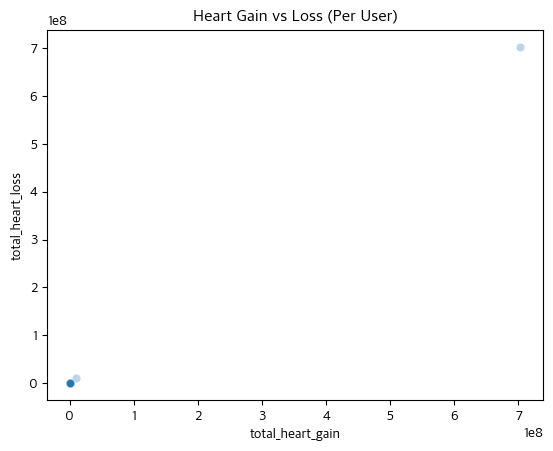

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=final_user_heart_summary_df,
    x='total_heart_gain',
    y='total_heart_loss',
    alpha=0.3
)
plt.title('Heart Gain vs Loss (Per User)')
plt.show()

In [ ]:
final_user_heart_summary_df.groupby('school_id')[['total_heart_gain', 'total_heart_loss']].describe()

total_heart_gain                                                     \
                     count           mean           std  min  25%  50%    75%   
school_id                                                                       
1.0                   23.0  443416.086957  2.081557e+06  0.0  0.0  0.0  262.0   
5.0                    4.0       0.000000  0.000000e+00  0.0  0.0  0.0    0.0   
6.0                    3.0       0.000000  0.000000e+00  0.0  0.0  0.0    0.0   
7.0                    8.0       9.625000  2.722361e+01  0.0  0.0  0.0    0.0   
8.0                    4.0       0.000000  0.000000e+00  0.0  0.0  0.0    0.0   
...                    ...            ...           ...  ...  ...  ...    ...   
5956.0                 7.0       0.000000  0.000000e+00  0.0  0.0  0.0    0.0   
5958.0                47.0      21.829787  6.192433e+01  0.0  0.0  0.0    0.0   
5960.0                12.0      58.333333  2.020726e+02  0.0  0.0  0.0    0.0   
5961.0                32.0     107.062500  3.348020e+02  0.0  0.0  0.0    3.5   
5963.0                10.0      20.000000  6.324555e+01  0.0  0.0  0.0    0.0   

                     total_heart_loss                                         \
                 max            count           mean           std  min  25%   
school_id                                                                      
1.0        9990376.0             23.0  443574.608696  2.081473e+06  0.0  0.0   
5.0              0.0              4.0       0.000000  0.000000e+00  0.0  0.0   
6.0              0.0              3.0       0.000000  0.000000e+00  0.0  0.0   
7.0             77.0              8.0     211.125000  5.971517e+02  0.0  0.0   
8.0              0.0              4.0       0.000000  0.000000e+00  0.0  0.0   
...              ...              ...            ...           ...  ...  ...   
5956.0           0.0              7.0       0.000000  0.000000e+00  0.0  0.0   
5958.0         279.0             47.0      54.127660  2.482822e+02  0.0  0.0   
5960.0         700.0             12.0      81.333333  2.103665e+02  0.0  0.0   
5961.0        1706.0             32.0     234.031250  6.096505e+02  0.0  0.0   
5963.0         200.0             10.0      20.000000  6.324555e+01  0.0  0.0   

                                   
           50%     75%        max  
school_id                          
1.0        0.0  451.50  9990125.0  
5.0        0.0    0.00        0.0  
6.0        0.0    0.00        0.0  
7.0        0.0    0.00     1689.0  
8.0        0.0    0.00        0.0  
...        ...     ...        ...  
5956.0     0.0    0.00        0.0  
5958.0     0.0    0.00     1599.0  
5960.0     0.0    0.00      700.0  
5961.0     0.0    7.75     2864.0  
5963.0     0.0    0.00      200.0  

[4115 rows x 16 columns]

In [ ]:
final_user_heart_summary_df.groupby('school_id')[['total_heart_gain', 'total_heart_loss']].mean().describe()

total_heart_gain  total_heart_loss
count      4.115000e+03      4.115000e+03
mean       5.895434e+03      5.895648e+03
std        3.654237e+05      3.654234e+05
min        0.000000e+00      0.000000e+00
25%        2.000000e+00      0.000000e+00
50%        2.925000e+01      4.434211e+01
75%        8.644091e+01      1.137707e+02
max        2.343730e+07      2.343728e+07

In [ ]:
final_user_heart_summary_df.groupby('school_id')[['total_heart_gain', 'total_heart_loss']].std().describe()

total_heart_gain  total_heart_loss
count      4.115000e+03      4.115000e+03
mean       3.195769e+04      3.197773e+04
std        2.001414e+06      2.001414e+06
min        0.000000e+00      0.000000e+00
25%        6.160249e+00      0.000000e+00
50%        1.000000e+02      1.545875e+02
75%        2.816613e+02      3.682387e+02
max        1.283711e+08      1.283711e+08

- school_id가 1인 학교의 total_heart_loss의 값이 매우 높음.
- 학교별 평균의 최댓값이 학교별 평균의 평균과 학교별 평균의 중앙값에 비해 최댓값이 극단적으로 높음
    - total_heart_gain의 학교별 평균 최댓값이 2.343730e+07, total_heart_loss의 학교별 평균 최댓값이 2.343728e+07
- 학교별 표준편차의 최댓값이 학교별 평균의 평균과 학교별 표준편차의 중앙값에 비해 최댓값이 극단적으로 높음
    - total_heart_gain의 학교별 평균 최댓값이 1.283711e+08, total_heart_loss의 학교별 평균 최댓값이 1.283711e+08

- hackle_df 를 만들었을 때, 논의 했었던 사항
    - hackle 데이터에 존재하는 school_id와 vote 데이터에 존재하는 school_id가 다름
        - hackle 데이터에는 'schoo_id' = 1 & 'schoo_id' == 5929 이 있고, vote 데이터에는 없음
        - hackle 데이터는 일부 기간의 데이터이고, vote 데이터는 전체 기간의 데이터
        - 'schoo_id' = 1 & 'schoo_id' == 5929 인 학교들은 앱 개발자들이 테스트 하기 위해 임의로 설정한 학교로 판단
            - 로그 데이터(hackle_df)와 유저별 하트 획득 및 사용량 데이터(changed_heart_balance_df)에서 'schoo_id' = 1 & 'schoo_id' == 5929 에 해당하는 로그 삭제 조치

### 이상치 점검

In [ ]:
# school_id == 1 데이터만 필터링
school_id_1_df = final_user_heart_summary_df[final_user_heart_summary_df['school_id'] == 1]

# 필터링된 데이터에 대해 describe()를 수행합니다.
# 'total_heart_gain'과 'total_heart_loss' 열에 대해서만 describe()를 보고 싶다면 다음과 같이 지정합니다.
print(school_id_1_df[['total_heart_gain', 'total_heart_loss']].describe())

       total_heart_gain  total_heart_loss
count      2.300000e+01      2.300000e+01
mean       4.434161e+05      4.435746e+05
std        2.081557e+06      2.081473e+06
min        0.000000e+00      0.000000e+00
25%        0.000000e+00      0.000000e+00
50%        0.000000e+00      0.000000e+00
75%        2.620000e+02      4.515000e+02
max        9.990376e+06      9.990125e+06


In [ ]:
# school_id == 5929 데이터만 필터링
school_id_5929_df = final_user_heart_summary_df[final_user_heart_summary_df['school_id'] == 5929]

# 필터링된 데이터에 대해 describe()를 수행합니다.
# 'total_heart_gain'과 'total_heart_loss' 열에 대해서만 describe()를 보고 싶다면 다음과 같이 지정합니다.
print(school_id_5929_df[['total_heart_gain', 'total_heart_loss']].describe())

       total_heart_gain  total_heart_loss
count               6.0               6.0
mean                0.0               0.0
std                 0.0               0.0
min                 0.0               0.0
25%                 0.0               0.0
50%                 0.0               0.0
75%                 0.0               0.0
max                 0.0               0.0


- 개발자가 임의로 설정한 학교라고 판단한 데이터 중, 최댓값을 발견하지 못함

In [ ]:
# 최댓값의 학교 찾기
# school_id별 total_heart_gain과 total_heart_loss의 평균(mean)을 계산
mean_by_school = final_user_heart_summary_df.groupby('school_id')[['total_heart_gain', 'total_heart_loss']].mean()

# total_heart_gain의 평균이 가장 높은 school_id
max_mean_gain_school_id = mean_by_school['total_heart_gain'].idxmax()
max_mean_gain_value = mean_by_school['total_heart_gain'].max()

# total_heart_loss의 평균이 가장 높은 school_id
max_mean_loss_school_id = mean_by_school['total_heart_loss'].idxmax()
max_mean_loss_value = mean_by_school['total_heart_loss'].max()

print(f"total_heart_gain의 평균이 가장 높은 school_id: {max_mean_gain_school_id} (평균값: {max_mean_gain_value})")
print(f"total_heart_loss의 평균이 가장 높은 school_id: {max_mean_loss_school_id} (평균값: {max_mean_loss_value})\n")


# school_id별 total_heart_gain과 total_heart_loss의 표준편차(std)를 계산
std_by_school = final_user_heart_summary_df.groupby('school_id')[['total_heart_gain', 'total_heart_loss']].std()

# total_heart_gain의 표준편차가 가장 높은 school_id
max_std_gain_school_id = std_by_school['total_heart_gain'].idxmax()
max_std_gain_value = std_by_school['total_heart_gain'].max()

# total_heart_loss의 표준편차가 가장 높은 school_id
max_std_loss_school_id = std_by_school['total_heart_loss'].idxmax()
max_std_loss_value = std_by_school['total_heart_loss'].max()

print(f"total_heart_gain의 표준편차가 가장 높은 school_id: {max_std_gain_school_id} (표준편차: {max_std_gain_value})")
print(f"total_heart_loss의 표준편차가 가장 높은 school_id: {max_std_loss_school_id} (표준편차: {max_std_loss_value})")

total_heart_gain의 평균이 가장 높은 school_id: 351.0 (평균값: 23437299.433333334)
total_heart_loss의 평균이 가장 높은 school_id: 351.0 (평균값: 23437280.633333333)

total_heart_gain의 표준편차가 가장 높은 school_id: 351.0 (표준편차: 128371141.66786219)
total_heart_loss의 표준편차가 가장 높은 school_id: 351.0 (표준편차: 128371145.21859874)


- 극단적인 최댓값을 가진 school_id = 351
- 다른 지표들에서는 극단적인 지표가 아닐 수 있으므로, 하트 획득 혹은 사용량이 극단적인 유저가 있는지 확인

In [ ]:
# 극단적인 최댓값을 가진 school_id = 351
# school_id 가 351인 유저들의 하트 사용량 확인
filtered_df_351 = final_user_heart_summary_df[final_user_heart_summary_df['school_id'] == 351]

# total_heart_gain 컬럼을 기준으로 내림차순 정렬
sorted_df_351 = filtered_df_351.sort_values(by=['total_heart_gain', 'total_heart_loss'], ascending=False)

# 결과 출력 (필요에 따라 상위 몇 개만 보거나 전체를 볼 수 있습니다)
sorted_df_351.head(5)

user_id  total_heart_gain  total_heart_loss  school_id
27413   967442       703117743.0       703117743.0      351.0
10306   898848             676.0             676.0      351.0
9950    897386             312.0               0.0      351.0
10203   898445             252.0               0.0      351.0
4650    867980               0.0               0.0      351.0

- user_id = 967442 인 경우, 하트 획득량 및 하트 사용량이 극단적으로 많은 것을 확인
- 내림차순 정렬 했기 때문에 5위 이후의 유저들의 하트 획득, 사용량은 0
- 967442 유저에 의해, school_id 별 하트 획득량 및 하트 사용량에 극단적인 영향을 줌
    - 로그 데이터(hackle_df)와 유저별 하트 획득 및 사용량 데이터(changed_heart_balance_df)에서 967442 유저 삭제 조치

### 이상치 삭제

#### 전처리 완료한 hackle 데이터(hackle_df)에서 이상치 삭제

In [ ]:
hackle_df.shape

(5108810, 16)

In [ ]:
# school_id 가 1 이거나 5929 인 row 삭제
hackle_df = hackle_df[~hackle_df['school_id'].isin([1, 5929])]
hackle_df.shape

(5104337, 16)

In [ ]:
# user_id가 967442 인 row 삭제
hackle_df = hackle_df[~hackle_df['user_id'].isin([967442])]
hackle_df.shape

(5104292, 16)

#### 유저별 하트 획득·사용 데이터에서의 이상치 삭제

In [ ]:
changed_heart_balance_df.shape

(132216, 7)

In [ ]:
# school_id 가 1 이거나 5929 인 row 삭제
changed_heart_balance_df = changed_heart_balance_df[~changed_heart_balance_df['school_id'].isin([1, 5929])]
changed_heart_balance_df.shape

(132117, 7)

In [ ]:
# user_id가 967442 인 row 삭제
changed_heart_balance_df = changed_heart_balance_df[~changed_heart_balance_df['user_id'].isin([967442])]
changed_heart_balance_df.shape

(132114, 7)

#### 이상치 제거 후 확인 사항

In [ ]:
# 고유 학교 수 4113개 (기존보다 2개 감소)
hackle_df['school_id'].nunique()

4113

In [ ]:
# 앱 유저 수 98789명 (기존보다 30개 감소)
hackle_df['user_id'].nunique()

98789

In [ ]:
hackle_df.head()

event_id      event_datetime  \
0  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc 2023-08-06 20:18:03   
1  00000d23-8055-4534-893b-bf17425ab41e 2023-08-06 12:46:17   
2  000015ae-60e0-495f-a356-9c1aaa18e841 2023-07-21 16:38:37   
3  000016af-25ea-464b-bb59-6f690e9d440b 2023-07-19 00:01:15   
4  0000183e-d7a2-4c47-aa1d-3467dbf41d4f 2023-07-25 19:32:04   

                         event_key                            session_id  \
0  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
1      click_bottom_navigation_lab  414540BA-1980-4371-BF37-5BFA71158C4D   
2                     view_lab_tap  94860349-d46f-4e98-8505-e96877376cee   
3                       launch_app  496C4656-1079-4284-826B-5D9A8F359ECF   
4               view_questions_tap          cPM87By9qdTxpG7miXyopisBpHU2   

  item_name page_name  friend_count  votes_count  heart_balance  question_id  \
0       NaN       NaN          26.0        174.0         4729.0          NaN   
1       NaN       NaN          45.0        148.0          141.0          NaN   
2       NaN       NaN          21.0        286.0          547.0          NaN   
3       NaN       NaN          70.0        485.0        13364.0          NaN   
4       NaN       NaN          75.0         34.0          626.0          NaN   

   user_id  class gender  grade  school_id  \
0  1545130    2.0      M    1.0     1141.0   
1  1475326    5.0      F    1.0     1204.0   
2  1537177    1.0      M    2.0     5888.0   
3  1556429    1.0      F    2.0      908.0   
4  1517211    6.0      M    2.0     4823.0   

                              device_id  
0  6bcea65d-9f40-46fc-888c-700fe707483f  
1  414540BA-1980-4371-BF37-5BFA71158C4D  
2  94860349-d46f-4e98-8505-e96877376cee  
3  496C4656-1079-4284-826B-5D9A8F359ECF  
4  8d86a4c2-82f1-4ee6-a552-030c724ec709

In [ ]:
# 변환할 컬럼 목록
cols_to_int = ['friend_count', 'votes_count', 'heart_balance',
               'user_id', 'class', 'grade', 'school_id']

# 안전한 정수 변환
for col in cols_to_int:
    hackle_df[col] = pd.to_numeric(hackle_df[col], errors='coerce').astype('Int64')

# 확인
print(hackle_df[cols_to_int].dtypes)

friend_count     Int64
votes_count      Int64
heart_balance    Int64
user_id          Int64
class            Int64
grade            Int64
school_id        Int64
dtype: object


In [ ]:
# hackle_df를 CSV 파일로 저장
output_path = "hackle_df_20250806.csv"
hackle_df.to_csv(output_path, index=False, encoding="utf-8-sig")

print(f"CSV 파일이 저장되었습니다: {output_path}")

CSV 파일이 저장되었습니다: hackle_df_20250806.csv


### 유저별·학교별 하트 획득·사용량 데이터 프레임 생성

In [ ]:
changed_heart_balance_df.head()

event_datetime                          event_key  heart_balance  \
3290096 2023-07-19 14:22:17                     $session_start        15439.0   
1856722 2023-07-29 19:12:10                         launch_app         2034.0   
4329097 2023-07-28 10:05:52  click_bottom_navigation_questions         1256.0   
4995109 2023-07-26 19:44:14                    complete_signup          300.0   
2421438 2023-07-21 21:21:07                     $session_start         3590.0   

         user_id  school_id  heart_balance_gain  heart_balance_loss  
3290096   960474        5.0                 0.0                 0.0  
1856722   963789        5.0                 0.0                 0.0  
4329097  1398041        5.0                 0.0                 0.0  
4995109  1579476        5.0                 0.0                 0.0  
2421438   888642        6.0                 0.0                 0.0

In [ ]:
# user_id 별 heart_balance_gain과 heart_balance_loss의 합계 계산
user_heart_summary = changed_heart_balance_df.groupby('user_id').agg(
    total_heart_gain=('heart_balance_gain', 'sum'),
    total_heart_loss=('heart_balance_loss', 'sum')
).reset_index() # user_id를 컬럼으로 다시 가져오기 위해 reset_index() 사용

#  각 user_id의 고유 정보 추출
user_info_columns = ['user_id', 'school_id']
unique_user_info = changed_heart_balance_df[user_info_columns].drop_duplicates(subset=['user_id'])

# 합계 데이터프레임과 유저 정보 데이터프레임을 user_id를 기준으로 병합 (merge)
final_user_heart_summary_df = pd.merge(user_heart_summary, unique_user_info, on='user_id', how='left')

In [ ]:
final_user_heart_summary_df.head()

user_id  total_heart_gain  total_heart_loss  school_id
0   833202               0.0               0.0      272.0
1   833203               0.0               0.0      272.0
2   833303               0.0               0.0      289.0
3   833525               0.0               0.0      281.0
4   833673               0.0               0.0      289.0

In [ ]:
# 결측치가 없다면 단순 상관계수 계산
correlation = final_user_heart_summary_df[['total_heart_gain', 'total_heart_loss']].corr()
print(correlation)

                  total_heart_gain  total_heart_loss
total_heart_gain          1.000000          0.749163
total_heart_loss          0.749163          1.000000


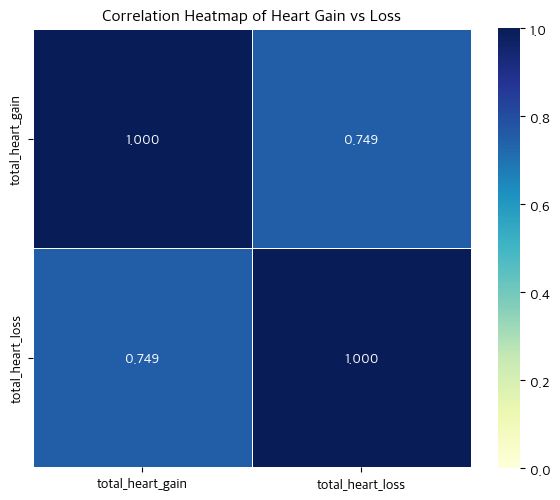

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# 상관계수 계산
correlation = final_user_heart_summary_df[['total_heart_gain', 'total_heart_loss']].corr()

# 히트맵 그리기
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, fmt=".3f", cmap="YlGnBu", vmin=0, vmax=1, square=True, linewidths=0.5, cbar=True)
plt.title("Correlation Heatmap of Heart Gain vs Loss")
plt.tight_layout()
plt.show()

In [ ]:
# 학교별 하트 획득량, 사용량 확인
final_user_heart_summary_df.groupby('school_id')[['total_heart_gain', 'total_heart_loss']].describe()

total_heart_gain                                                \
                     count        mean         std  min  25%  50%    75%   
school_id                                                                  
5.0                    4.0    0.000000    0.000000  0.0  0.0  0.0    0.0   
6.0                    3.0    0.000000    0.000000  0.0  0.0  0.0    0.0   
7.0                    8.0    9.625000   27.223611  0.0  0.0  0.0    0.0   
8.0                    4.0    0.000000    0.000000  0.0  0.0  0.0    0.0   
10.0                  14.0  303.428571  857.777604  0.0  0.0  0.0  190.5   
...                    ...         ...         ...  ...  ...  ...    ...   
5956.0                 7.0    0.000000    0.000000  0.0  0.0  0.0    0.0   
5958.0                47.0   21.829787   61.924329  0.0  0.0  0.0    0.0   
5960.0                12.0   58.333333  202.072594  0.0  0.0  0.0    0.0   
5961.0                32.0  107.062500  334.802006  0.0  0.0  0.0    3.5   
5963.0                10.0   20.000000   63.245553  0.0  0.0  0.0    0.0   

                  total_heart_loss                                         \
              max            count        mean         std  min  25%  50%   
school_id                                                                   
5.0           0.0              4.0    0.000000    0.000000  0.0  0.0  0.0   
6.0           0.0              3.0    0.000000    0.000000  0.0  0.0  0.0   
7.0          77.0              8.0  211.125000  597.151677  0.0  0.0  0.0   
8.0           0.0              4.0    0.000000    0.000000  0.0  0.0  0.0   
10.0       3238.0             14.0    0.000000    0.000000  0.0  0.0  0.0   
...           ...              ...         ...         ...  ...  ...  ...   
5956.0        0.0              7.0    0.000000    0.000000  0.0  0.0  0.0   
5958.0      279.0             47.0   54.127660  248.282152  0.0  0.0  0.0   
5960.0      700.0             12.0   81.333333  210.366491  0.0  0.0  0.0   
5961.0     1706.0             32.0  234.031250  609.650481  0.0  0.0  0.0   
5963.0      200.0             10.0   20.000000   63.245553  0.0  0.0  0.0   

                         
            75%     max  
school_id                
5.0        0.00     0.0  
6.0        0.00     0.0  
7.0        0.00  1689.0  
8.0        0.00     0.0  
10.0       0.00     0.0  
...         ...     ...  
5956.0     0.00     0.0  
5958.0     0.00  1599.0  
5960.0     0.00   700.0  
5961.0     7.75  2864.0  
5963.0     0.00   200.0  

[4113 rows x 16 columns]

In [ ]:
final_user_heart_summary_df.groupby('school_id')[['total_heart_gain', 'total_heart_loss']].mean().describe()

total_heart_gain  total_heart_loss
count       4113.000000       4113.000000
mean          92.156085         92.331839
std          235.048347        165.202920
min            0.000000          0.000000
25%            2.000000          0.000000
50%           29.250000         44.333333
75%           86.377778        113.666667
max         4493.384615       3173.884615

In [ ]:
# describe() 결과를 데이터프레임으로 생성
school_describe_df = final_user_heart_summary_df.groupby('school_id')[['total_heart_gain', 'total_heart_loss']].describe()

In [ ]:
# total_heart_gain의 평균이 0인 학교 ID의 개수
schools_with_zero_gain_mean = school_describe_df[school_describe_df['total_heart_gain']['mean'] == 0].shape[0]
print(f"total_heart_gain의 평균이 0인 학교 ID의 개수: {schools_with_zero_gain_mean}")

# total_heart_loss의 평균이 0인 학교 ID의 개수
schools_with_zero_loss_mean = school_describe_df[school_describe_df['total_heart_loss']['mean'] == 0].shape[0]
print(f"total_heart_loss의 평균이 0인 학교 ID의 개수: {schools_with_zero_loss_mean}")

total_heart_gain의 평균이 0인 학교 ID의 개수: 889
total_heart_loss의 평균이 0인 학교 ID의 개수: 1078


In [ ]:
final_user_heart_summary_df.groupby('school_id')[['total_heart_gain', 'total_heart_loss']].std().describe()

total_heart_gain  total_heart_loss
count       4113.000000       4113.000000
mean         256.104413        276.162795
std          560.690943        492.434680
min            0.000000          0.000000
25%            6.196773          0.000000
50%          100.000000        154.333333
75%          281.037522        367.886541
max        12278.511405      11697.396046

- 전처리 이전에 봤던 학교별 평균 하트 획득량 및 사용량의 최댓값에 극단값이 사라짐
- 하트 획득·사용량의 평균이 0인 학교 다수 발견

### 유저별·학교별 하트 획득·사용량 시각화

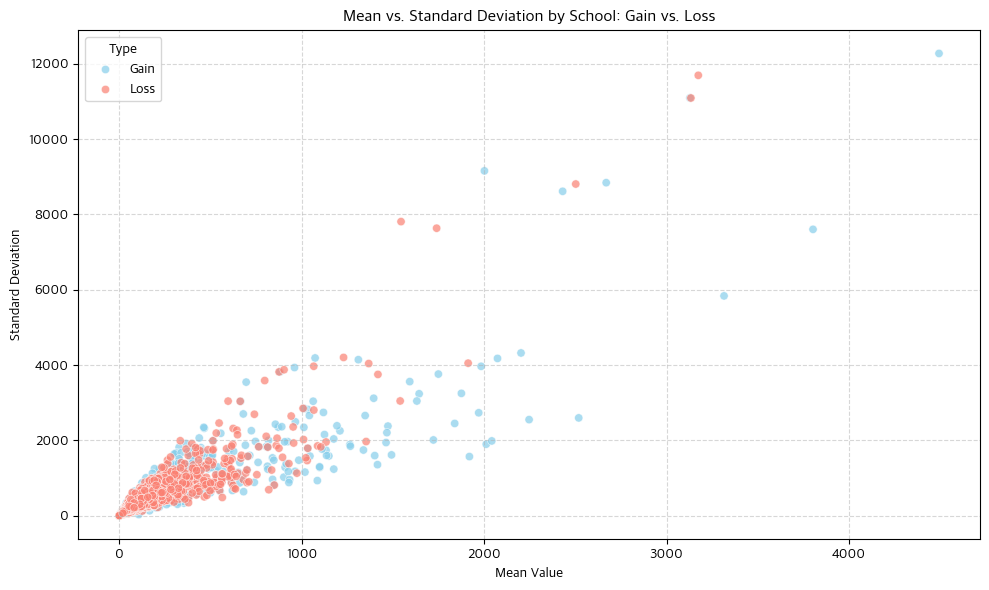

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 학교별 total_heart_gain의 평균과 표준편차 계산
school_gain_stats = final_user_heart_summary_df.groupby('school_id')['total_heart_gain'].agg(['mean', 'std']).reset_index()

# 학교별 total_heart_loss의 평균과 표준편차 계산
school_loss_stats = final_user_heart_summary_df.groupby('school_id')['total_heart_loss'].agg(['mean', 'std']).reset_index()

# Gain 데이터에 label 추가
school_gain_stats_labeled = school_gain_stats.copy()
school_gain_stats_labeled['type'] = 'Gain'
school_gain_stats_labeled.rename(columns={'mean': 'mean_value', 'std': 'std_value'}, inplace=True)

# Loss 데이터에 label 추가
school_loss_stats_labeled = school_loss_stats.copy()
school_loss_stats_labeled['type'] = 'Loss'
school_loss_stats_labeled.rename(columns={'mean': 'mean_value', 'std': 'std_value'}, inplace=True)

# 두 데이터프레임 결합
combined_stats = pd.concat([school_gain_stats_labeled, school_loss_stats_labeled], ignore_index=True)

# 시각화
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=combined_stats,
    x='mean_value',
    y='std_value',
    hue='type',
    palette={'Gain': 'skyblue', 'Loss': 'salmon'},
    alpha=0.7
)

plt.title('Mean vs. Standard Deviation by School: Gain vs. Loss')
plt.xlabel('Mean Value')
plt.ylabel('Standard Deviation')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend(title='Type')
plt.tight_layout()
plt.show()

- 좌측 하단에서 우측 상단으로 이어지는 뚜렷한 대각선 분포
    - 학교 내 평균 하트 획득/손실량이 높을수록 해당 학교 유저들 간의 heart_balance 변동성(표준편차) 또한 커진다
    - 평균 활동량이 높은 학교일수록, 그 학교 안에는 매우 활발하게 하트를 획득/사용하는 유저와 그렇지 않은 유저 간의 격차가 커진다.
    - 몇몇의 핵심 유저가, 학교의 활동성을 결정할 수 있다!
- 좌측 하단에 점들이 조밀하게 모여 있는 것
    - 대다수의 학교들이 평균 하트 획득/손실량이 낮고, 학교 내 유저들 간의 변동성도 낮다
- 그래프 우측 상단의 몇 개의 학교는 해당 그래프에서 이상치로 볼 수도 있음.
    - 이상치로 보이는 값들은, 이전 데이터에 비교하여 그렇게 극단적으로 판단할 수 없음
- 두 그래프의 유사성
    - 하트를 획득하는 활동과 하트를 사용하는 활동이 유사한 패턴

- 두 지표의 분포가 유사성을 보임
    - 두 지표 모두 클러스터 지표로 활용한다면, 과대적용 될 수 있음    
    - 어떤 지표가 학교 커뮤니티의 활성화 정도를 판단할 수 있는 지표가 될 수 있을까 ?
- 학교별 평균 하트 추가량 지표 vs 학교별 평균 하트 사용량 중 더 적합한 지표는 ?
    - 하트를 얻는 지표보다 사용하는 지표가 실제 앱에서 활동하였다는 것을 의미
        - 하트의 사용 경로 : 나를 투표한 사람들의 초성 정보 등..
    - 학교별 커뮤니티가 활발한 정도를 보려면, 하트 획득량보다 하트 사용량이 더 적합하다고 판단

### scatter plot의 우측 상단에 존재하는 학교들의 제거 여부 확인

- scatter_plot의 우측 상단에 보이는 몇 개의 학교들이 분석에 의도한 바와 다른 영향을 미칠 수 있을까?
    - 하트 사용량도 많고 표준편차도 큰 학교들
        - 하트 사용량도 많지만, 변동성도 큼
        - 해당 학교에서는 소수의 유저가 하트를 많이 사용하고, 많은 유저들이 하트를 사용하지 않는 경우 발생할 수 있음
- 학교별 하트 사용량의 평균에 대한 정보만 지표로 활용해도 분석에 효과적일까? 아니면 표준편차도 추가 지표로 고려해봐야할까?

In [ ]:
# 평균과 표준편차 Series를 계산
mean_total_heart_loss_per_school = final_user_heart_summary_df.groupby('school_id')['total_heart_loss'].mean()
std_total_heart_loss_per_school = final_user_heart_summary_df.groupby('school_id')['total_heart_loss'].std()

# 시각화의 가독성을 위해 0 값을 필터링합니다. 특히 로그 스케일에서는 0이 표현될 수 없습니다.
mean_filtered = mean_total_heart_loss_per_school[mean_total_heart_loss_per_school > 0]
std_filtered = std_total_heart_loss_per_school[std_total_heart_loss_per_school > 0]

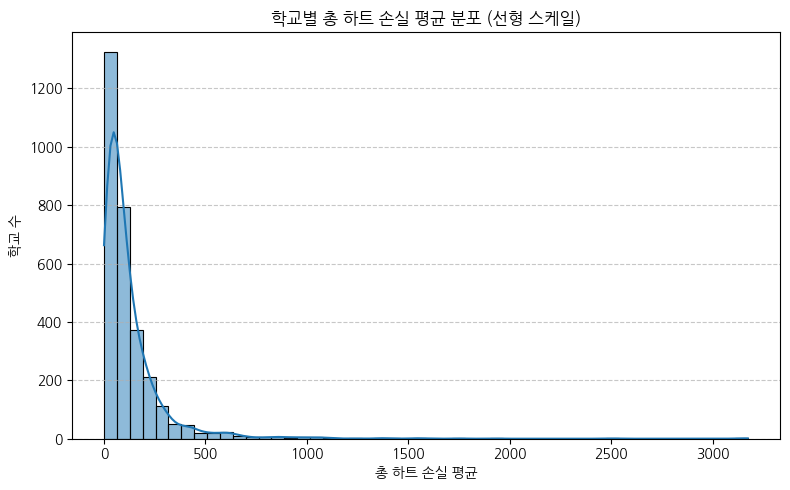

In [ ]:
# 평균 히스토그램
plt.figure(figsize=(8, 5))
sns.histplot(mean_filtered, bins=50, kde=True)
plt.title('학교별 총 하트 손실 평균 분포 (선형 스케일)')
plt.xlabel('총 하트 손실 평균')
plt.ylabel('학교 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

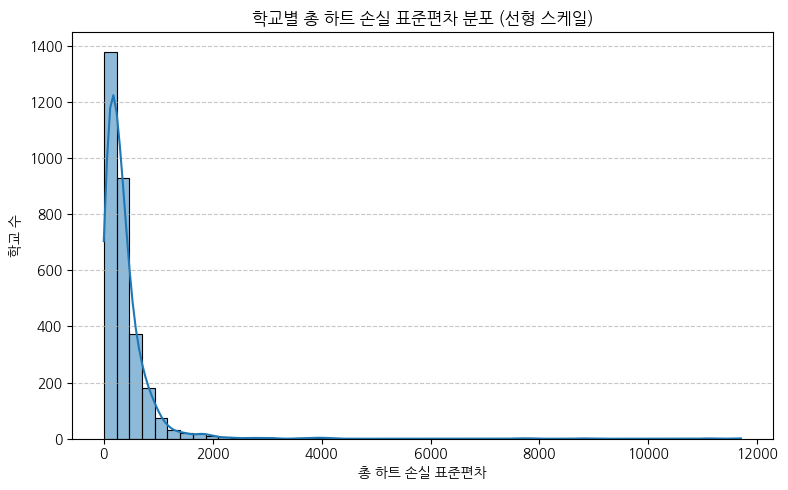

In [ ]:
# 표준편차 히스토그램 (선형 스케일)
plt.figure(figsize=(8, 5))
sns.histplot(std_filtered, bins=50, kde=True)
plt.title('학교별 총 하트 손실 표준편차 분포 (선형 스케일)')
plt.xlabel('총 하트 손실 표준편차')
plt.ylabel('학교 수')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

총 하트 손실량 평균과 표준편차 간의 상관관계 매트릭스:
           Loss_Mean  Loss_Std
Loss_Mean   1.000000  0.921753
Loss_Std    0.921753  1.000000


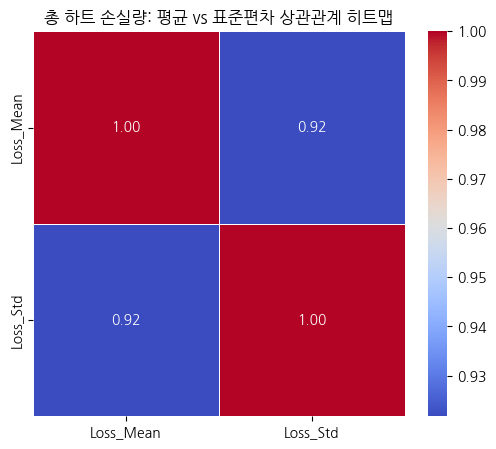

In [ ]:
# 평균과 표준편차의 상관관계를 확인하여, 실제
# total_heart_loss에 대한 평균과 표준편차 값 추출
loss_mean_per_school = school_describe_df['total_heart_loss']['mean']
loss_std_per_school = school_describe_df['total_heart_loss']['std']

# 상관관계 분석을 위한 데이터프레임 생성
# 'Loss_Mean'과 'Loss_Std' 컬럼만 포함합니다.
correlation_df_loss = pd.DataFrame({
    'Loss_Mean': loss_mean_per_school,
    'Loss_Std': loss_std_per_school
})

# NaN 값이 있는 행 제거 (상관관계 계산 시 오류 방지)
correlation_df_loss.dropna(inplace=True)

# 상관관계 매트릭스 계산
correlation_matrix_loss = correlation_df_loss.corr()

print("총 하트 손실량 평균과 표준편차 간의 상관관계 매트릭스:")
print(correlation_matrix_loss)

# 상관관계 매트릭스를 히트맵으로 시각화
plt.figure(figsize=(6, 5)) # 히트맵 크기 조정
sns.heatmap(correlation_matrix_loss, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('총 하트 손실량: 평균 vs 표준편차 상관관계 히트맵')
plt.show()

- 상관계수가 높은 것을 보아, 평균만으로도 충분히 의미 있는 분석 진행 가능함.
- 지표에서 학교별 하트 사용 개수가 0인 지표들이 25% 전후 인 것을 확인
    - 학교별 하트 사용량의 평균이 0인 학교 vs 학교별 하트 사용량의 평균이 0이 아닌 학교를 구분하는 컬럼 추가

### 클러스터 데이터 프레임 생성

In [ ]:
mean_total_heart_loss_per_school = final_user_heart_summary_df.groupby('school_id')['total_heart_loss'].mean()
mean_total_heart_loss_per_school

school_id
5.0         0.000000
6.0         0.000000
7.0       211.125000
8.0         0.000000
10.0        0.000000
             ...    
5956.0      0.000000
5958.0     54.127660
5960.0     81.333333
5961.0    234.031250
5963.0     20.000000
Name: total_heart_loss, Length: 4113, dtype: float64

In [ ]:
# school_id를 정수 인덱스 대신 일반 열로 만들고, 0부터 시작하는 인덱스 생성
cluster_df = mean_total_heart_loss_per_school.to_frame(name='heart_loss_mean').reset_index()

# school_id를 정수(Int64)로 변환
cluster_df['school_id'] = cluster_df['school_id'].astype('Int64')

# 확인
cluster_df.head()

school_id  heart_loss_mean
0          5            0.000
1          6            0.000
2          7          211.125
3          8            0.000
4         10            0.000

In [ ]:
# 'is_zero_heart_loss_mean'이라는 새로운 이진 변수 컬럼을 추가
# heart_loss_mean이 0이면 1, 0이 아니면 0으로 설정
cluster_df['is_zero_heart_loss_mean'] = np.where(
    cluster_df['heart_loss_mean'] == 0,
    1,            # heart_loss_mean이 0이면 1
    0             # heart_loss_mean이 0이 아니면 0
)

cluster_df.head()

school_id  heart_loss_mean  is_zero_heart_loss_mean
0          5            0.000                        1
1          6            0.000                        1
2          7          211.125                        0
3          8            0.000                        1
4         10            0.000                        1

## 학생수 & 성비 지표

### 데이터 불러오기

In [ ]:
# 유저 리스트 불러오기
user_properties = pd.read_csv('user_properties.csv', encoding='utf-8-sig')
user_properties['user_id'] = pd.to_numeric(user_properties['user_id'], errors='coerce').astype('Int64')

# events에 존재하는 user_id 목록 추출 (NaN 제외)
valid_user_ids = hackle_df['user_id'].dropna().unique()

# users에서 해당 user_id만 필터링
user_properties = user_properties[user_properties['user_id'].isin(valid_user_ids)]

print(user_properties.shape)
display(user_properties.info())
display(user_properties.head())

(98789, 5)
<class 'pandas.core.frame.DataFrame'>
Index: 98789 entries, 131072 to 230816
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   user_id    98789 non-null  Int64 
 1   class      98789 non-null  int64 
 2   gender     98789 non-null  object
 3   grade      98789 non-null  int64 
 4   school_id  98789 non-null  int64 
dtypes: Int64(1), int64(3), object(1)
memory usage: 4.6+ MB


None

user_id  class gender  grade  school_id
131072  1374882      4      F      2       1480
131073  1374884     10      F      3       4196
131074  1374889      5      F      3       4244
131075  1374890      5      F      2       4575
131076  1374895      1      M      3       5016

In [ ]:
# 학교 리스트 불러오기
accounts_school = pd.read_csv('accounts_school.csv', encoding='utf-8-sig')

# 1. 열 이름 'id'를 'school_id'로 변경
accounts_school = accounts_school.rename(columns={'id': 'school_id'})

# 2. users에 존재하는 school_id만 필터링
valid_school_ids = user_properties['school_id'].unique()
accounts_school = accounts_school[accounts_school['school_id'].isin(valid_school_ids)]

# 3. schools에서 student_count 제거
accounts_school = accounts_school.drop(columns=['student_count', 'school_type', 'address'])

# 4. users에서 school_id별 사용자 수 집계
user_counts = (
    user_properties.groupby('school_id')
    .size()
    .reset_index(name='student_count')
)

# 5. schools에 병합
accounts_school = accounts_school.merge(user_counts, on='school_id', how='left')

# 6. 결측치 처리 (만약 users에 없는 school_id가 schools에 존재한다면 0으로 처리)
accounts_school['student_count'] = accounts_school['student_count'].fillna(0).astype(int)

# 결과 확인
print(accounts_school.shape)
display(accounts_school.head())

(4113, 2)


school_id  student_count
0          5              4
1          6              3
2          7              8
3          8              4
4         10             14

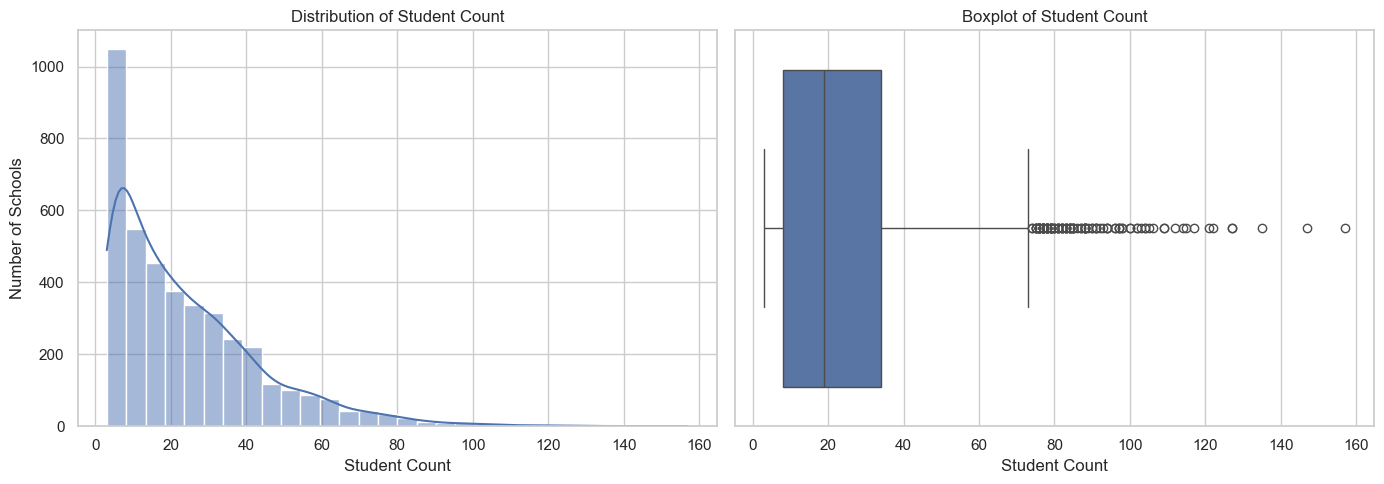

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 스타일 설정
sns.set(style='whitegrid')

# 그래프 크기 설정
plt.figure(figsize=(14, 5))

# 1. 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(accounts_school['student_count'], bins=30, kde=True)
plt.title('Distribution of Student Count')
plt.xlabel('Student Count')
plt.ylabel('Number of Schools')

# 2. 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=accounts_school['student_count'])
plt.title('Boxplot of Student Count')
plt.xlabel('Student Count')

plt.tight_layout()
plt.show()

### 학교별 성비 지표 생성

In [ ]:
# 1. 성별 비율 집계 (남학생 비율)
gender_ratio = (
    user_properties[user_properties['gender'].isin(['M', 'F'])]
    .groupby('school_id')['gender']
    .value_counts(normalize=True)
    .unstack(fill_value=0)
    .rename(columns={'M': 'male_ratio'})
    .reset_index()
)

# 2. gender_balance 계산 (성비 균형도 = 1 - |남성비율 - 0.5| * 2)
gender_ratio['gender_balance'] = 1 - abs(gender_ratio['male_ratio'] - 0.5) * 2

# 3. hackle_school에 병합
accounts_school = accounts_school.merge(
    gender_ratio[['school_id', 'gender_balance']],
    on='school_id',
    how='left'
)

# 결과 확인
display(accounts_school.info())
display(accounts_school.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   school_id       4113 non-null   int64  
 1   student_count   4113 non-null   int64  
 2   gender_balance  4113 non-null   float64
dtypes: float64(1), int64(2)
memory usage: 96.5 KB


None

school_id  student_count  gender_balance
0          5              4        0.500000
1          6              3        0.000000
2          7              8        0.250000
3          8              4        0.500000
4         10             14        0.285714

- 학교별 성비를 판단하기 위해 `gender_balance` 변수를 추가합니다. 성비가 각 학교를 구분하는 유의미한 지표가 될 것이라고 예상했기 떄문입니다.
    - 학교 구성원이 단일 성별로만 구성된 경우 (`gender_balance == 0`)
    - 학교 구성원이 남성과 여성 반반인 경우 (`gender_balance == 1`)

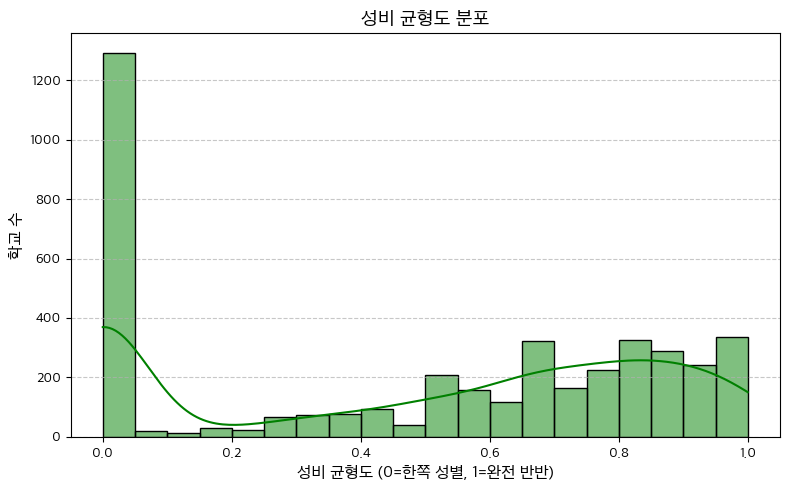

In [ ]:
plt.figure(figsize=(8, 5))
sns.histplot(accounts_school['gender_balance'], bins=20, kde=True, color='green')

plt.title('성비 균형도 분포', fontsize=14)
plt.xlabel('성비 균형도 (0=한쪽 성별, 1=완전 반반)', fontsize=12)
plt.ylabel('학교 수', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [ ]:
# 1. 구간 정의: 정확히 동일한 값 구간을 포함하도록 0.0~1.0을 명시적으로 나눔
bins = [0.0, 0.000001, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.00001]
labels = [
    "0.0 ~ 0.0", "0.0 ~ 0.1", "0.1 ~ 0.2", "0.2 ~ 0.3", "0.3 ~ 0.4",
    "0.4 ~ 0.5", "0.5 ~ 0.6", "0.6 ~ 0.7", "0.7 ~ 0.8",
    "0.8 ~ 0.9", "0.9 ~ 1.0", "1.0 ~ 1.0"
]

# 2. 구간 분류
accounts_school['gender_balance_bin'] = pd.cut(
    accounts_school['gender_balance'], bins=bins, labels=labels, right=False
)

# 3. 개수 및 비율 집계
bin_summary = (
    accounts_school['gender_balance_bin']
    .value_counts()
    .sort_index()
    .rename_axis('성비 균형도 구간')
    .reset_index(name='학교 수')
)

# 전체 대비 비율 계산
total = bin_summary['학교 수'].sum()
bin_summary['비율 (%)'] = (bin_summary['학교 수'] / total * 100).round(2)

# 결과 출력
display(bin_summary)

성비 균형도 구간  학교 수  비율 (%)
0   0.0 ~ 0.0  1281   31.15
1   0.0 ~ 0.1    31    0.75
2   0.1 ~ 0.2    42    1.02
3   0.2 ~ 0.3    89    2.16
4   0.3 ~ 0.4   149    3.62
5   0.4 ~ 0.5   133    3.23
6   0.5 ~ 0.6   343    8.34
7   0.6 ~ 0.7   451   10.97
8   0.7 ~ 0.8   404    9.82
9   0.8 ~ 0.9   614   14.93
10  0.9 ~ 1.0   379    9.21
11  1.0 ~ 1.0   197    4.79

- `gender_balance`가 0인 샘플이 많습니다. (31.15%)
    - K-means 등 거리 기반 클러스터링에서는 이 점들에 군집 중심이 끌려가서 왜곡될 수 있습니다.
- `is_monogender`라는 구조적 차이를 명확히 구분하는 축을 함께 제공하면, 군집 구조의 해석 가능성과 안정성이 개선됩니다.

In [ ]:
# is_monogender 열 추가 (gender_balance == 0이면 1, 아니면 0)
accounts_school['is_monogender'] = (accounts_school['gender_balance'] == 0).astype(int)

# 결과 확인
accounts_school.head()

school_id  student_count  gender_balance gender_balance_bin  is_monogender
0          5              4        0.500000          0.5 ~ 0.6              0
1          6              3        0.000000          0.0 ~ 0.0              1
2          7              8        0.250000          0.2 ~ 0.3              0
3          8              4        0.500000          0.5 ~ 0.6              0
4         10             14        0.285714          0.2 ~ 0.3              0

In [ ]:
# 필요 없는 열(`gender_balance_bin` 제거)
accounts_school = accounts_school.drop(columns=['gender_balance_bin'], axis=1)
accounts_school.head()

school_id  student_count  gender_balance  is_monogender
0          5              4        0.500000              0
1          6              3        0.000000              1
2          7              8        0.250000              0
3          8              4        0.500000              0
4         10             14        0.285714              0

In [ ]:
# accounts_school에서 중복 school_id 제거 (방어적 처리)
accounts_school_unique = accounts_school.drop_duplicates(subset=['school_id'])

# cluster_df에 accounts_school 열들 병합 (left join)
merged_df = cluster_df.merge(
    accounts_school_unique,
    on='school_id',
    how='left',
    validate='one_to_one'  # school_id가 중복되면 에러 발생 → 데이터 품질 보장
)

# school_id가 매치되지 않아 생긴 NaN 확인
missing_count = merged_df['student_count'].isna().sum()
print(f"매칭되지 않은 school_id 개수: {missing_count}")

# NaN 값이 있으면 0이나 기본값으로 처리 (필요 시)
merged_df['student_count'] = merged_df['student_count'].fillna(0).astype('Int64')
merged_df['gender_balance'] = merged_df['gender_balance'].fillna(0)
merged_df['is_monogender'] = merged_df['is_monogender'].fillna(0).astype('Int64')

# 결과 확인
print(merged_df.shape)
display(merged_df.head())

매칭되지 않은 school_id 개수: 0
(4113, 6)


school_id  heart_loss_mean  is_zero_heart_loss_mean  student_count  \
0          5            0.000                        1              4   
1          6            0.000                        1              3   
2          7          211.125                        0              8   
3          8            0.000                        1              4   
4         10            0.000                        1             14   

   gender_balance  is_monogender  
0        0.500000              0  
1        0.000000              1  
2        0.250000              0  
3        0.500000              0  
4        0.285714              0

### 지표 추가

In [ ]:
# 병합 결과를 cluster_df에 덮어씌우기
cluster_df = merged_df.copy()
cluster_df.head()

school_id  heart_loss_mean  is_zero_heart_loss_mean  student_count  \
0          5            0.000                        1              4   
1          6            0.000                        1              3   
2          7          211.125                        0              8   
3          8            0.000                        1              4   
4         10            0.000                        1             14   

   gender_balance  is_monogender  
0        0.500000              0  
1        0.000000              1  
2        0.250000              0  
3        0.500000              0  
4        0.285714              0

In [ ]:
# cluster_df를 CSV 파일로 저장
output_path = 'cluster_df_byungchan.csv'

# index=False → 인덱스는 저장하지 않음
cluster_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"CSV 파일이 저장되었습니다: {output_path}")

CSV 파일이 저장되었습니다: cluster_df_byungchan.csv


## 메인 이벤트 지표

In [ ]:
# CSV 파일 경로
input_path = 'cluster_df_byungchan.csv'

# CSV 파일 불러오기
try:
    cluster_df = pd.read_csv(input_path, encoding='utf-8-sig')

    # school_id를 정수형으로 변환 (결측 허용)
    if 'school_id' in cluster_df.columns:
        cluster_df['school_id'] = pd.to_numeric(cluster_df['school_id'], errors='coerce').astype('Int64')

    # 기본 정보 출력
    print("파일 불러오기 성공 ✅")
    print(cluster_df.info())
    display(cluster_df.head())

except FileNotFoundError:
    print(f"⚠️ 파일을 찾을 수 없습니다: {input_path}")
except pd.errors.EmptyDataError:
    print(f"⚠️ 파일이 비어 있습니다: {input_path}")
except Exception as e:
    print(f"⚠️ 알 수 없는 오류 발생: {e}")

파일 불러오기 성공 ✅
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school_id                4113 non-null   Int64  
 1   heart_loss_mean          4113 non-null   float64
 2   is_zero_heart_loss_mean  4113 non-null   int64  
 3   student_count            4113 non-null   int64  
 4   gender_balance           4113 non-null   float64
 5   is_monogender            4113 non-null   int64  
dtypes: Int64(1), float64(2), int64(3)
memory usage: 196.9 KB
None


school_id  heart_loss_mean  is_zero_heart_loss_mean  student_count  \
0          5            0.000                        1              4   
1          6            0.000                        1              3   
2          7          211.125                        0              8   
3          8            0.000                        1              4   
4         10            0.000                        1             14   

   gender_balance  is_monogender  
0        0.500000              0  
1        0.000000              1  
2        0.250000              0  
3        0.500000              0  
4        0.285714              0

### 데이터 불러오기

In [ ]:
hackle = pd.read_csv('hackle_df.csv')

In [ ]:
# 1. 'event_datetime' 컬럼을 날짜/시간 타입으로 변환
hackle['event_datetime'] = pd.to_datetime(hackle['event_datetime'], errors='coerce')

# 정수형으로 변환
hackle['user_id'] = hackle['user_id'].astype('int64')
hackle['school_id'] = hackle['school_id'].astype('int64')
hackle['class'] = hackle['class'].astype('int64')
hackle['grade'] = hackle['grade'].astype('int64')

In [ ]:
# 삭제할 school_id 목록
schools_to_remove = [1, 5929]
# 삭제할 user_id 목록
users_to_remove = [967442]

# school_id가 1 또는 5929인 로우 삭제
hackle = hackle[~hackle['school_id'].isin(schools_to_remove)]

# user_id가 967442인 로우 삭제 (위에서 필터링된 hackle에서 다시 필터링)
hackle = hackle[~hackle['user_id'].isin(users_to_remove)]

### 메인 이벤트 정의

In [ ]:
# 후보 이벤트

# 직접적인 질문 이벤트 (최종 메인 이벤트)
main_event_keys_core = [
    'click_bottom_navigation_questions', # 질문 탭 진입
    'click_question_ask',                # 질문 생성 시작 (홈 화면)
    'click_question_open',               # 받은 질문 열람
    'click_question_start',              # 홈 화면에서 '질문 시작' 클릭
    'complete_question',                 # 질문 완료 (답변)
    'skip_question',                     # 질문 스킵 (질문 탐색 과정의 일부)
    'click_question_share',              # 받은 질문 공유
    'view_questions_tap'                 # 질문 화면 진입 (질문 콘텐츠 소비)
]

# 간접적인 질문 이벤트
social_question_related_keys = [
    'click_friend_invite',             # 질문 대기상태에서 친구 초대하고 바로 받기
    'click_invite_friend',             # ask에서 친구 초대하기
    'click_profile_ask',               # 친구 프로필에서 '친구에게 글 남길까?' 클릭
    'click_random_ask_normal',         # 타임라인에서 일반적인 ask 클릭 (질문 콘텐츠 소비)
    'click_random_ask_shuffle',        # 타임라인에서 랜덤 질문 셔플 (질문 콘텐츠 탐색)
    'click_random_ask_other',          # 타임라인에서 다른 친구에게 글 남기기 클릭 (질문에 대한 댓글)
    'click_copy_profile_link_ask'      # ask에서 내 프로필 링크 복사하기
]

- 질문과 관련된 모든 이벤트를 찾고서 분류를 함
- 그중 질문에 대해 직접적인 이벤트만 메인 이벤트로 정의
- 타임라인 관련 이벤트는 직접적인 질문 이벤트가 아님으로 팀원과의 협의를 통해 정의내림
- 최종적으로 main_event_keys_core를 메인 이벤트로 사용함

### 메인 이벤트 발생 횟수(학교별)

In [ ]:
# 학교별 고유 활동 유저 수 계산
# user_id와 school_id는 NaN이 없으므로 직접 nunique() 사용
school_active_users = hackle.groupby('school_id')['user_id'].nunique().reset_index(name='active_users_in_hackle_period')

# 'main_event_keys_core'에 해당하는 이벤트만 필터링
hackle_main_core_filtered_new = hackle[hackle['event_key'].isin(main_event_keys_core)].copy()

# 학교별 '메인 이벤트' 총 이벤트 수 집계
school_total_main_events_new = hackle_main_core_filtered_new.groupby('school_id').size().reset_index(name='total_main_events_candidate')

# 학교별 1인당 메인 이벤트 수 계산
main_events_metrics_candidate = pd.merge(
    school_total_main_events_new,
    school_active_users,
    on='school_id',
    how='left'
)
main_events_metrics_candidate['main_events_per_user_candidate'] = main_events_metrics_candidate['total_main_events_candidate'] / main_events_metrics_candidate['active_users_in_hackle_period']

# NaN 및 무한대 값 처리 (0으로 나누는 경우 등)
main_events_metrics_candidate.fillna(0, inplace=True)
main_events_metrics_candidate.replace([float('inf'), -float('inf')], 0, inplace=True)

print("\n[3.5] 학교별 '메인 이벤트 후보군' (1인당) 지표 통계 요약:")
display(main_events_metrics_candidate['main_events_per_user_candidate'].describe())


[3.5] 학교별 '메인 이벤트 후보군' (1인당) 지표 통계 요약:


count    4111.000000
mean       14.473085
std        30.604148
min         0.200000
25%         6.392622
50%         8.967742
75%        13.166667
max       564.193548
Name: main_events_per_user_candidate, dtype: float64

In [ ]:
main_events_metrics_candidate.head()

school_id  total_main_events_candidate  active_users_in_hackle_period  \
0          5                           21                              4   
1          6                            1                              3   
2          7                           65                              8   
3          8                           21                              4   
4         10                          507                             14   

   main_events_per_user_candidate  
0                        5.250000  
1                        0.333333  
2                        8.125000  
3                        5.250000  
4                       36.214286

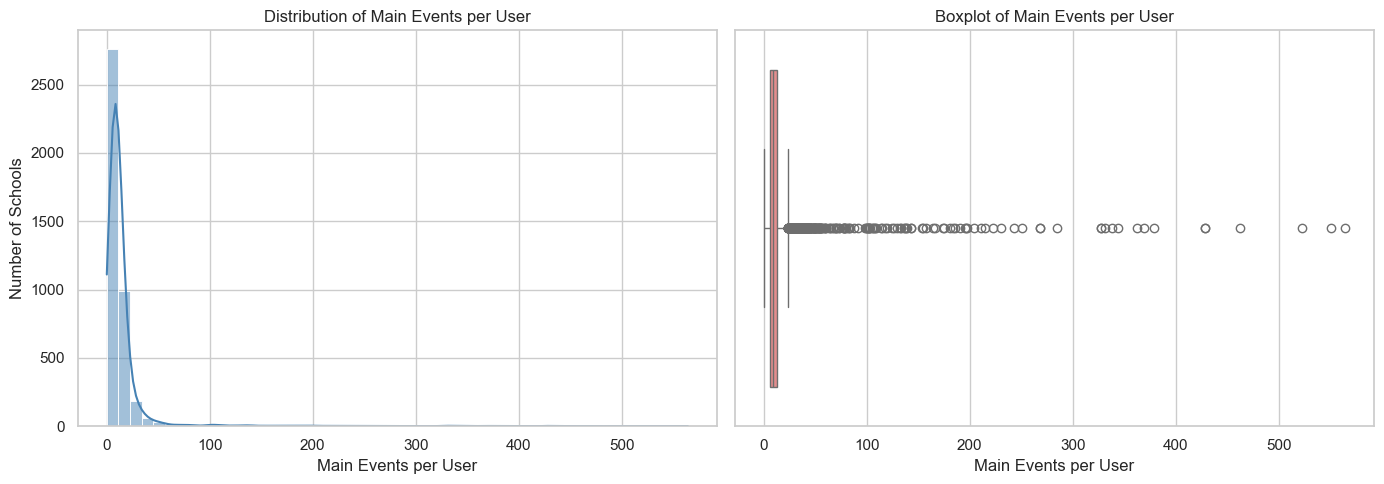

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 5))

# 히스토그램 + KDE
plt.subplot(1, 2, 1)
sns.histplot(
    data=main_events_metrics_candidate,
    x='main_events_per_user_candidate',
    bins=50,
    kde=True,
    color='steelblue'
)
plt.title('Distribution of Main Events per User')
plt.xlabel('Main Events per User')
plt.ylabel('Number of Schools')

# 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(
    data=main_events_metrics_candidate,
    x='main_events_per_user_candidate',
    color='lightcoral'
)
plt.title('Boxplot of Main Events per User')
plt.xlabel('Main Events per User')

plt.tight_layout()
plt.show()

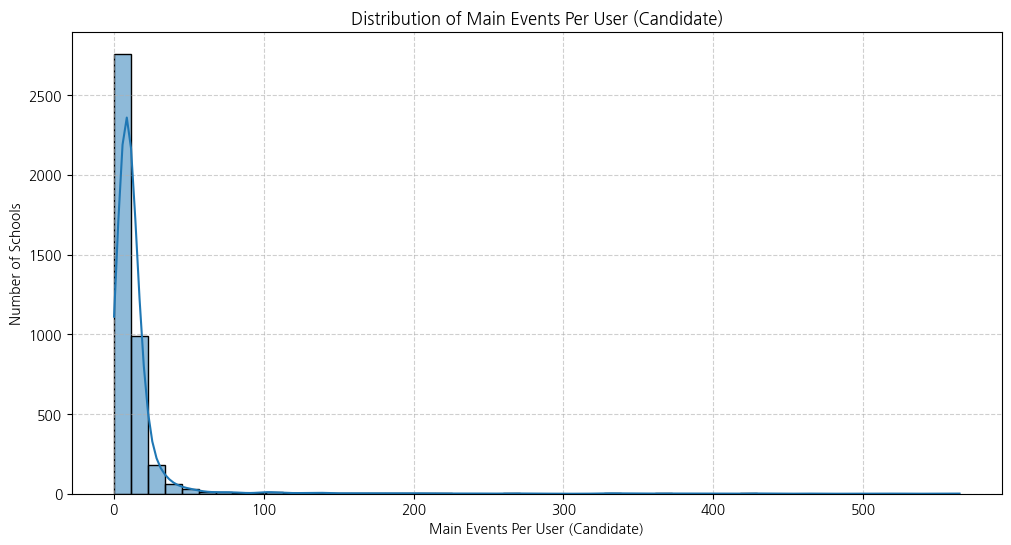

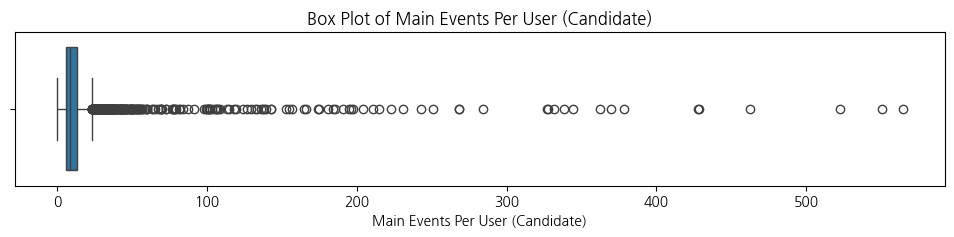

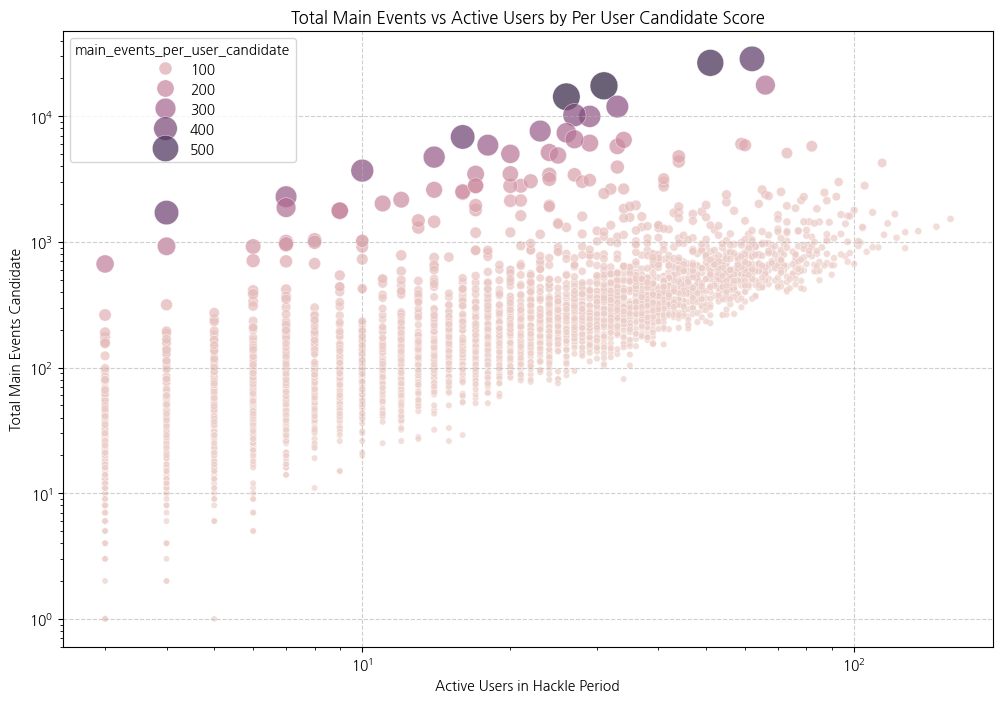

In [ ]:
# 히스토그램: 데이터 분포 확인
plt.figure(figsize=(12, 6))
sns.histplot(main_events_metrics_candidate['main_events_per_user_candidate'], bins=50, kde=True)
plt.title('Distribution of Main Events Per User (Candidate)')
plt.xlabel('Main Events Per User (Candidate)')
plt.ylabel('Number of Schools')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# 상자 수염 그림 (Box Plot): 이상치 및 사분위수 확인
# 1.5 * IQR 기준의 이상치는 점으로 표시됩니다.
plt.figure(figsize=(12, 2))
sns.boxplot(x=main_events_metrics_candidate['main_events_per_user_candidate'])
plt.title('Box Plot of Main Events Per User (Candidate)')
plt.xlabel('Main Events Per User (Candidate)')
plt.show()

plt.figure(figsize=(12, 8))
sns.scatterplot(
    data=main_events_metrics_candidate,
    x='active_users_in_hackle_period', # x축: 활동 유저 수
    y='total_main_events_candidate',   # y축: 총 메인 이벤트 수
    hue='main_events_per_user_candidate', # 색상: 1인당 메인 이벤트 수
    size='main_events_per_user_candidate', # 크기: 1인당 메인 이벤트 수
    sizes=(20, 400), # 점의 최소/최대 크기
    alpha=0.7, # 투명도
)

plt.title('Total Main Events vs Active Users by Per User Candidate Score')
plt.xlabel('Active Users in Hackle Period')
plt.ylabel('Total Main Events Candidate')
plt.xscale('log') # X축 (활동 유저 수)은 범위가 넓으므로 로그 스케일 적용
plt.yscale('log') # Y축 (총 이벤트 수)도 범위가 넓으므로 로그 스케일 적용
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

- 박스플롯에서 75% 이상인 부분에 이상치가 길게 분포되어있었음
- 스캐터플롯을 확인했을 때 학교별 인당 메인이벤트 수가 100이 넘는 학교가 얼마 없어보였기 때문에 확인을 해보려 함

In [ ]:
# 1인당 메인 이벤트 참여 수가 100 이상인 학교 필터링
schools_100_plus = main_events_metrics_candidate[
    main_events_metrics_candidate['main_events_per_user_candidate'] >= 100
]

print(f"1인당 메인 이벤트 참여 수가 100 이상인 학교 수: {len(schools_100_plus)}개")

print("\n상위 10개 학교 목록:")
display(schools_100_plus.sort_values(by='main_events_per_user_candidate', ascending=False).head(10))

1인당 메인 이벤트 참여 수가 100 이상인 학교 수: 65개

상위 10개 학교 목록:


school_id  total_main_events_candidate  active_users_in_hackle_period  \
149         215                        17490                             31   
2473       3592                        14305                             26   
3350       4867                        26628                             51   
28           47                        28672                             62   
2472       3591                         6849                             16   
3464       5051                         1712                              4   
2735       4030                        10224                             27   
3564       5163                         3696                             10   
293         418                        11948                             33   
434         636                         9985                             29   

      main_events_per_user_candidate  
149                       564.193548  
2473                      550.192308  
3350                      522.117647  
28                        462.451613  
2472                      428.062500  
3464                      428.000000  
2735                      378.666667  
3564                      369.600000  
293                       362.060606  
434                       344.310345

- 학교당 1인 평균 메인 이벤트 수가 100이 넘는 학교가 65학교가 있었다
- 가장 많은 이벤트 수를 기록한 school_id = 215, 3592, 4867 학교를 자세히 보기로 함

#### 극단값 학교 분석 (215, 3592, 4867)

In [ ]:
# 분석할 고활성 학교 ID 리스트 (모두 75% 기준으로 분석)
TARGET_SCHOOL_IDS_UNIFORM = [215, 3592, 4867]

# 고활성 유저 필터링 기준 (75% 퍼센트)
HIGH_ACTIVITY_THRESHOLD_PERCENTILE = 0.75

for school_id in TARGET_SCHOOL_IDS_UNIFORM:

    # 1. 특정 학교의 전체 이벤트 데이터 필터링
    school_events = hackle[hackle['school_id'] == school_id].copy()

    print(f"\n★★학교 {school_id}의 메인 이벤트 발생 횟수 분석 시작★★")

    # 2. 메인 이벤트에 해당하는 이벤트만 추가 필터링
    school_main_events = school_events[school_events['event_key'].isin(main_event_keys_core)].copy()

    print(f"\n[학교 {school_id}의 메인 이벤트별 전체 발생 횟수]:")
    school_total_event_counts = school_main_events['event_key'].value_counts()
    display(school_total_event_counts)

    # 3. 사용자별 메인 이벤트 발생 횟수 집계
    user_event_counts = school_main_events.groupby('user_id').size().reset_index(name='event_count')

    print(f"\n[1] 학교 {school_id}의 모든 사용자별 메인 이벤트 발생 횟수 통계 요약 (중앙값 포함):")
    print(user_event_counts['event_count'].describe())

    # 4. 고활성 사용자 필터링 (통일된 75% 기준 적용)
    print(f"\n[2] 학교 {school_id} - 사용자별 메인 이벤트 발생 횟수의 {HIGH_ACTIVITY_THRESHOLD_PERCENTILE*100:.0f}% 이상 유저 분석:")

    threshold_value = user_event_counts['event_count'].quantile(HIGH_ACTIVITY_THRESHOLD_PERCENTILE)
    print(f"사용자 이벤트 횟수 {HIGH_ACTIVITY_THRESHOLD_PERCENTILE*100:.0f}% 기준점: {threshold_value:.2f}회 이상")

    high_activity_users = user_event_counts[
        user_event_counts['event_count'] >= threshold_value
    ]['user_id']

    print(f"\n해당 기준에 참여한 사용자 수: {len(high_activity_users)}명")
    if len(high_activity_users) > 0:
        print(f"해당 사용자 user_id 목록 (상위 10개): {high_activity_users.head(10).tolist()}")

        high_activity_user_events = school_main_events[
            school_main_events['user_id'].isin(high_activity_users)
        ]

        event_distribution_by_high_user = high_activity_user_events.groupby(['user_id', 'event_key']).size().unstack(fill_value=0)
        event_distribution_by_high_user = event_distribution_by_high_user.reindex(columns=main_event_keys_core, fill_value=0)

        event_distribution_by_high_user['total_event_count'] = event_distribution_by_high_user.sum(axis=1)
        event_distribution_by_high_user = event_distribution_by_high_user.sort_values(
            by='total_event_count', ascending=False
        )

        print(f"\n해당 기준의 메인 이벤트 참여 사용자들의 event_key별 발생 횟수 (총 이벤트 기준 정렬):")
        display(event_distribution_by_high_user)

        print()
        print()
        print()
        print()
    else:
        print("해당 기준의 이벤트에 참여한 사용자가 없습니다. 조건을 낮춰보세요.")


★★학교 215의 메인 이벤트 발생 횟수 분석 시작★★

[학교 215의 메인 이벤트별 전체 발생 횟수]:


event_key
click_question_open                  5806
skip_question                        3122
click_question_share                 2937
click_bottom_navigation_questions    2226
click_question_start                 1272
complete_question                    1061
view_questions_tap                   1031
click_question_ask                     35
Name: count, dtype: int64


[1] 학교 215의 모든 사용자별 메인 이벤트 발생 횟수 통계 요약 (중앙값 포함):
count      31.000000
mean      564.193548
std       481.122813
min        28.000000
25%       212.000000
50%       371.000000
75%       894.500000
max      1913.000000
Name: event_count, dtype: float64

[2] 학교 215 - 사용자별 메인 이벤트 발생 횟수의 75% 이상 유저 분석:
사용자 이벤트 횟수 75% 기준점: 894.50회 이상

해당 기준에 참여한 사용자 수: 8명
해당 사용자 user_id 목록 (상위 10개): [1545640, 1557003, 1570036, 1578515, 1578898, 1578970, 1578981, 1579301]

해당 기준의 메인 이벤트 참여 사용자들의 event_key별 발생 횟수 (총 이벤트 기준 정렬):


event_key  click_bottom_navigation_questions  click_question_ask  \
user_id                                                            
1557003                                  330                   0   
1578898                                  149                   1   
1579301                                  291                   0   
1545640                                  344                   7   
1578981                                  120                   2   
1578515                                   74                   1   
1578970                                   56                   2   
1570036                                   77                   5   

event_key  click_question_open  click_question_start  complete_question  \
user_id                                                                   
1557003                    669                   119                113   
1578898                    266                   104                 92   
1579301                    340                    60                 53   
1545640                    312                    93                 54   
1578981                    264                   121                 86   
1578515                    459                    40                 29   
1578970                    291                    75                 72   
1570036                    411                    10                  8   

event_key  skip_question  click_question_share  view_questions_tap  \
user_id                                                              
1557003              210                   272                 200   
1578898              610                    86                  39   
1579301               45                   389                 162   
1545640              302                    62                 165   
1578981              342                   101                  64   
1578515               59                   382                  41   
1578970               89                   356                  39   
1570036               18                   397                  38   

event_key  total_event_count  
user_id                       
1557003                 1913  
1578898                 1347  
1579301                 1340  
1545640                 1339  
1578981                 1100  
1578515                 1085  
1578970                  980  
1570036                  964






★★학교 3592의 메인 이벤트 발생 횟수 분석 시작★★

[학교 3592의 메인 이벤트별 전체 발생 횟수]:


event_key
click_question_open                  4216
click_bottom_navigation_questions    3463
skip_question                        2560
view_questions_tap                   1573
click_question_start                 1125
complete_question                     786
click_question_share                  506
click_question_ask                     76
Name: count, dtype: int64


[1] 학교 3592의 모든 사용자별 메인 이벤트 발생 횟수 통계 요약 (중앙값 포함):
count      26.000000
mean      550.192308
std       578.668473
min        34.000000
25%       118.250000
50%       395.500000
75%       655.000000
max      2005.000000
Name: event_count, dtype: float64

[2] 학교 3592 - 사용자별 메인 이벤트 발생 횟수의 75% 이상 유저 분석:
사용자 이벤트 횟수 75% 기준점: 655.00회 이상

해당 기준에 참여한 사용자 수: 7명
해당 사용자 user_id 목록 (상위 10개): [1508727, 1509275, 1509358, 1518908, 1570178, 1578614, 1579358]

해당 기준의 메인 이벤트 참여 사용자들의 event_key별 발생 횟수 (총 이벤트 기준 정렬):


event_key  click_bottom_navigation_questions  click_question_ask  \
user_id                                                            
1518908                                 1168                   6   
1509275                                  556                   3   
1578614                                  362                  10   
1509358                                  157                  10   
1579358                                  233                   4   
1570178                                   78                   8   
1508727                                  106                   2   

event_key  click_question_open  click_question_start  complete_question  \
user_id                                                                   
1518908                    364                    49                 42   
1509275                    618                    96                 80   
1578614                    584                   145                 99   
1509358                    224                   210                107   
1579358                    210                    96                 33   
1570178                    157                    78                 74   
1508727                    311                    36                 30   

event_key  skip_question  click_question_share  view_questions_tap  \
user_id                                                              
1518908               27                     3                 346   
1509275               75                   133                 362   
1578614              297                    57                 153   
1509358              359                     6                 124   
1579358              228                     0                 161   
1570178              532                     0                  28   
1508727              147                     5                  45   

event_key  total_event_count  
user_id                       
1518908                 2005  
1509275                 1923  
1578614                 1707  
1509358                 1197  
1579358                  965  
1570178                  955  
1508727                  682






★★학교 4867의 메인 이벤트 발생 횟수 분석 시작★★

[학교 4867의 메인 이벤트별 전체 발생 횟수]:


event_key
click_question_open                  11203
skip_question                         4308
click_question_share                  3213
click_bottom_navigation_questions     2761
click_question_start                  2366
complete_question                     2034
view_questions_tap                     613
click_question_ask                     130
Name: count, dtype: int64


[1] 학교 4867의 모든 사용자별 메인 이벤트 발생 횟수 통계 요약 (중앙값 포함):
count      51.000000
mean      522.117647
std       363.662516
min         2.000000
25%       297.000000
50%       441.000000
75%       703.500000
max      1859.000000
Name: event_count, dtype: float64

[2] 학교 4867 - 사용자별 메인 이벤트 발생 횟수의 75% 이상 유저 분석:
사용자 이벤트 횟수 75% 기준점: 703.50회 이상

해당 기준에 참여한 사용자 수: 13명
해당 사용자 user_id 목록 (상위 10개): [1450946, 1452172, 1452248, 1452502, 1454470, 1471343, 1471428, 1578593, 1578609, 1578633]

해당 기준의 메인 이벤트 참여 사용자들의 event_key별 발생 횟수 (총 이벤트 기준 정렬):


event_key  click_bottom_navigation_questions  click_question_ask  \
user_id                                                            
1578593                                  212                   1   
1452172                                   35                   8   
1454470                                   91                   8   
1471343                                  167                   2   
1578900                                   73                   5   
1578609                                  250                   5   
1452248                                   28                   0   
1452502                                   32                   0   
1450946                                   80                   1   
1579002                                   43                   7   
1579344                                   78                   3   
1471428                                  187                   0   
1578633                                   36                   0   

event_key  click_question_open  click_question_start  complete_question  \
user_id                                                                   
1578593                    565                   124                116   
1452172                    641                   151                146   
1454470                    444                    52                 48   
1471343                    405                    66                 61   
1578900                    229                   227                210   
1578609                    188                   143                124   
1452248                    396                    66                 59   
1452502                    290                    42                 40   
1450946                    286                    62                 60   
1579002                    306                    84                 67   
1579344                    199                    63                 56   
1471428                    365                    22                 11   
1578633                    258                    78                 77   

event_key  skip_question  click_question_share  view_questions_tap  \
user_id                                                              
1578593              376                   409                  56   
1452172              369                     0                  11   
1454470              180                   426                  17   
1471343              496                     0                  16   
1578900               12                   230                   7   
1578609               24                   107                 112   
1452248              313                    40                   7   
1452502              154                   268                   2   
1450946               22                   261                  11   
1579002              187                    40                  13   
1579344              255                    23                  53   
1471428               90                     0                  48   
1578633              144                    90                  27   

event_key  total_event_count  
user_id                       
1578593                 1859  
1452172                 1361  
1454470                 1266  
1471343                 1213  
1578900                  993  
1578609                  953  
1452248                  909  
1452502                  828  
1450946                  783  
1579002                  747  
1579344                  730  
1471428                  723  
1578633                  710

- 메인 이벤트 발생횟수 top3 학교를 분석함
- 다른 팀원의 분석 과정에서 학교 내 일정 유저가 극단적인 이벤트 발생횟수를 보이는 967442유저를 발견하였기 때문에
- 그러한 유저가 메인 이벤트에도 존재하는지 확인 하기 위해 top3 학교의 유저별 이벤트 수를 체크해보려 함
- 현재 top3 학교는 이벤트 발생 횟수가 많은 학교이기 떄문에 학교내에서도 사분위수 75% 이상의 이벤트 발생횟수 유저를 확인함
- 각 학교마다 7~13명정도 있지만 이상치라고 보이는 유저는 없고 그저 여러 이벤트를 자주 많이 사용하는 헤비 유저라고 판단됨
- 메인 이벤트 발생횟수가 극단값이었던 top3 학교도 이상치는 아니었음을 확인했기 때문에
- 메인 이벤트 발생 횟수 지표는 모든 학교를 사용하는 것으로 논의함
- 혹여나 중앙값에 해당하는 학교와 크게 다른점이 있는지 확인해보기 위해 중앙값 3개의 학교를 분석함

#### 중앙값 학교 분석

In [ ]:
# 1. 지표의 중앙값(median) 확인
median_score = main_events_metrics_candidate['main_events_per_user_candidate'].median()
print(f"지표 'main_events_per_user_candidate'의 중앙값: {median_score:.2f}")

# 2. 각 학교의 지표 값과 중앙값의 차이(절대값) 계산
main_events_metrics_candidate['diff_from_median'] = np.abs(main_events_metrics_candidate['main_events_per_user_candidate'] - median_score)

# 3. 차이가 가장 작은 순서대로 정렬하여 상위 N개 학교 선택
# 여기서는 3개 학교를 선택
schools_near_median = main_events_metrics_candidate.sort_values(by='diff_from_median').head(3)

print("\n중앙값에 가장 가까운 학교 3곳:")
print(schools_near_median[['school_id', 'main_events_per_user_candidate', 'diff_from_median']])

# 선택된 학교의 school_id들을 리스트로 저장
selected_school_ids_for_median_analysis = schools_near_median['school_id'].tolist()
print(f"\n분석할 school_id 목록: {selected_school_ids_for_median_analysis}")

지표 'main_events_per_user_candidate'의 중앙값: 8.97

중앙값에 가장 가까운 학교 3곳:
      school_id  main_events_per_user_candidate  diff_from_median
107         141                        8.967742          0.000000
3824       5492                        8.968750          0.001008
2232       3265                        8.965517          0.002225

분석할 school_id 목록: [141, 5492, 3265]


In [ ]:
# 위 극단값 학교를 분석한 코드와 동일한 코드 사용

# 분석할 고활성 학교 ID 리스트 (모두 75% 기준으로 분석)
TARGET_SCHOOL_IDS_UNIFORM = [141, 5492, 3265]

# 고활성 유저 필터링 기준 (75% 퍼센트)
HIGH_ACTIVITY_THRESHOLD_PERCENTILE = 0.75

for school_id in TARGET_SCHOOL_IDS_UNIFORM:

    # 1. 특정 학교의 전체 이벤트 데이터 필터링
    school_events = hackle[hackle['school_id'] == school_id].copy()

    print(f"\n★★학교 {school_id}의 메인 이벤트 발생 횟수 분석 시작★★")

    # 2. 메인 이벤트에 해당하는 이벤트만 추가 필터링
    school_main_events = school_events[school_events['event_key'].isin(main_event_keys_core)].copy()

    print(f"\n[학교 {school_id}의 메인 이벤트별 전체 발생 횟수]:")
    school_total_event_counts = school_main_events['event_key'].value_counts()
    display(school_total_event_counts)

    # 3. 사용자별 메인 이벤트 발생 횟수 집계
    user_event_counts = school_main_events.groupby('user_id').size().reset_index(name='event_count')

    print(f"\n[1] 학교 {school_id}의 모든 사용자별 메인 이벤트 발생 횟수 통계 요약 (중앙값 포함):")
    print(user_event_counts['event_count'].describe())

    # 4. 고활성 사용자 필터링 (통일된 75% 기준 적용)
    print(f"\n[2] 학교 {school_id} - 사용자별 메인 이벤트 발생 횟수의 {HIGH_ACTIVITY_THRESHOLD_PERCENTILE*100:.0f}% 이상 유저 분석:")

    threshold_value = user_event_counts['event_count'].quantile(HIGH_ACTIVITY_THRESHOLD_PERCENTILE)
    print(f"사용자 이벤트 횟수 {HIGH_ACTIVITY_THRESHOLD_PERCENTILE*100:.0f}% 기준점: {threshold_value:.2f}회 이상")

    high_activity_users = user_event_counts[
        user_event_counts['event_count'] >= threshold_value
    ]['user_id']

    print(f"\n해당 기준에 참여한 사용자 수: {len(high_activity_users)}명")
    if len(high_activity_users) > 0:
        print(f"해당 사용자 user_id 목록 (상위 10개): {high_activity_users.head(10).tolist()}")

        high_activity_user_events = school_main_events[
            school_main_events['user_id'].isin(high_activity_users)
        ]

        event_distribution_by_high_user = high_activity_user_events.groupby(['user_id', 'event_key']).size().unstack(fill_value=0)
        event_distribution_by_high_user = event_distribution_by_high_user.reindex(columns=main_event_keys_core, fill_value=0)

        event_distribution_by_high_user['total_event_count'] = event_distribution_by_high_user.sum(axis=1)
        event_distribution_by_high_user = event_distribution_by_high_user.sort_values(
            by='total_event_count', ascending=False
        )

        print(f"\n해당 기준의 메인 이벤트 참여 사용자들의 event_key별 발생 횟수 (총 이벤트 기준 정렬):")
        display(event_distribution_by_high_user)

        print()
        print()
        print()
        print()
    else:
        print("해당 기준의 이벤트에 참여한 사용자가 없습니다. 조건을 낮춰보세요.")


★★학교 141의 메인 이벤트 발생 횟수 분석 시작★★

[학교 141의 메인 이벤트별 전체 발생 횟수]:


event_key
click_question_open                  124
click_bottom_navigation_questions     66
view_questions_tap                    39
click_question_start                  12
click_question_share                  11
complete_question                     10
skip_question                          9
click_question_ask                     7
Name: count, dtype: int64


[1] 학교 141의 모든 사용자별 메인 이벤트 발생 횟수 통계 요약 (중앙값 포함):
count    25.000000
mean     11.120000
std      16.462888
min       1.000000
25%       3.000000
50%       6.000000
75%      10.000000
max      66.000000
Name: event_count, dtype: float64

[2] 학교 141 - 사용자별 메인 이벤트 발생 횟수의 75% 이상 유저 분석:
사용자 이벤트 횟수 75% 기준점: 10.00회 이상

해당 기준에 참여한 사용자 수: 7명
해당 사용자 user_id 목록 (상위 10개): [892094, 892394, 892886, 893041, 895438, 905700, 966835]

해당 기준의 메인 이벤트 참여 사용자들의 event_key별 발생 횟수 (총 이벤트 기준 정렬):


event_key  click_bottom_navigation_questions  click_question_ask  \
user_id                                                            
893041                                    14                   1   
895438                                     5                   0   
892886                                    10                   1   
905700                                     2                   0   
966835                                     3                   0   
892394                                     1                   0   
892094                                     4                   2   

event_key  click_question_open  click_question_start  complete_question  \
user_id                                                                   
893041                      30                     2                  1   
895438                      44                     0                  0   
892886                      10                     2                  2   
905700                      10                     0                  0   
966835                       2                     0                  0   
892394                       2                     2                  2   
892094                       3                     0                  0   

event_key  skip_question  click_question_share  view_questions_tap  \
user_id                                                              
893041                 3                     1                  14   
895438                 0                     2                   4   
892886                 1                     4                   6   
905700                 0                     0                   0   
966835                 0                     1                   6   
892394                 3                     0                   1   
892094                 0                     0                   1   

event_key  total_event_count  
user_id                       
893041                    66  
895438                    55  
892886                    36  
905700                    12  
966835                    12  
892394                    11  
892094                    10






★★학교 5492의 메인 이벤트 발생 횟수 분석 시작★★

[학교 5492의 메인 이벤트별 전체 발생 횟수]:


event_key
click_bottom_navigation_questions    97
click_question_open                  76
skip_question                        35
view_questions_tap                   34
click_question_start                 18
click_question_ask                   14
complete_question                    13
Name: count, dtype: int64


[1] 학교 5492의 모든 사용자별 메인 이벤트 발생 횟수 통계 요약 (중앙값 포함):
count    27.000000
mean     10.629630
std      10.008259
min       1.000000
25%       3.000000
50%       8.000000
75%      13.500000
max      39.000000
Name: event_count, dtype: float64

[2] 학교 5492 - 사용자별 메인 이벤트 발생 횟수의 75% 이상 유저 분석:
사용자 이벤트 횟수 75% 기준점: 13.50회 이상

해당 기준에 참여한 사용자 수: 7명
해당 사용자 user_id 목록 (상위 10개): [931422, 954395, 955777, 956082, 959567, 1388870, 1395389]

해당 기준의 메인 이벤트 참여 사용자들의 event_key별 발생 횟수 (총 이벤트 기준 정렬):


event_key  click_bottom_navigation_questions  click_question_ask  \
user_id                                                            
1395389                                   15                   1   
1388870                                    3                   2   
959567                                    13                   1   
954395                                     4                   0   
956082                                     3                   1   
931422                                    10                   0   
955777                                    11                   1   

event_key  click_question_open  click_question_start  complete_question  \
user_id                                                                   
1395389                      5                     1                  1   
1388870                     24                     1                  1   
959567                       9                     1                  1   
954395                       0                     2                  1   
956082                       0                     3                  2   
931422                       3                     0                  0   
955777                       0                     0                  0   

event_key  skip_question  click_question_share  view_questions_tap  \
user_id                                                              
1395389                3                     0                  13   
1388870                2                     0                   0   
959567                 7                     0                   0   
954395                 9                     0                   1   
956082                 5                     0                   3   
931422                 0                     0                   2   
955777                 0                     0                   3   

event_key  total_event_count  
user_id                       
1395389                   39  
1388870                   33  
959567                    32  
954395                    17  
956082                    17  
931422                    15  
955777                    15






★★학교 3265의 메인 이벤트 발생 횟수 분석 시작★★

[학교 3265의 메인 이벤트별 전체 발생 횟수]:


event_key
click_question_open                  83
click_question_start                 60
click_bottom_navigation_questions    45
complete_question                    40
view_questions_tap                   13
click_question_ask                   10
skip_question                         9
Name: count, dtype: int64


[1] 학교 3265의 모든 사용자별 메인 이벤트 발생 횟수 통계 요약 (중앙값 포함):
count     24.000000
mean      10.833333
std       20.457095
min        1.000000
25%        3.000000
50%        5.000000
75%        9.250000
max      102.000000
Name: event_count, dtype: float64

[2] 학교 3265 - 사용자별 메인 이벤트 발생 횟수의 75% 이상 유저 분석:
사용자 이벤트 횟수 75% 기준점: 9.25회 이상

해당 기준에 참여한 사용자 수: 6명
해당 사용자 user_id 목록 (상위 10개): [962350, 968358, 971921, 995330, 999666, 1518335]

해당 기준의 메인 이벤트 참여 사용자들의 event_key별 발생 횟수 (총 이벤트 기준 정렬):


event_key  click_bottom_navigation_questions  click_question_ask  \
user_id                                                            
1518335                                    7                   4   
968358                                     2                   0   
962350                                     6                   0   
999666                                     2                   0   
971921                                     3                   0   
995330                                     1                   0   

event_key  click_question_open  click_question_start  complete_question  \
user_id                                                                   
1518335                     17                    43                 28   
968358                      15                     7                  5   
962350                       7                     1                  0   
999666                       8                     0                  0   
971921                       4                     1                  1   
995330                       6                     0                  0   

event_key  skip_question  click_question_share  view_questions_tap  \
user_id                                                              
1518335                0                     0                   3   
968358                 0                     0                   0   
962350                 5                     0                   2   
999666                 0                     0                   1   
971921                 1                     0                   0   
995330                 0                     0                   3   

event_key  total_event_count  
user_id                       
1518335                  102  
968358                    29  
962350                    21  
999666                    11  
971921                    10  
995330                    10

- 학교의 이벤트 발생 횟수나 유저의 이벤트 발생 횟수에서도 극단값의 학교와 큰 차이는 찾지못함
- 다만 중앙값에 가까운 학교에서 오히려 매우 활발하게 활동하는 유저 1~3명 정도가 각 학교마다 확인이 된다
- 이부분은 클러스터링 이후 클러스터 분석에서 활용할 예정

### 지표 추가

In [ ]:
# 최종 지표를 `cluster_df`에 추가
# 'school_id' 컬럼을 기준으로 merge(병합)
cluster_df = pd.merge(
    cluster_df,
    main_events_metrics_candidate[['school_id', 'main_events_per_user_candidate']],
    on='school_id',
    how='left' # cluster_df에 있는 모든 school_id를 유지하면서 데이터를 병합
)

# 추가된 지표 컬럼 이름 지정 ('mainevent_peruser')
cluster_df.rename(columns={'main_events_per_user_candidate': 'mainevent_peruser'}, inplace=True)

# 'MainEvent_PerUser' 결측치 처리
cluster_df['mainevent_peruser'].fillna(0, inplace=True)

C:\Users\jklas\AppData\Local\Temp\ipykernel_35148\3018002028.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cluster_df['mainevent_peruser'].fillna(0, inplace=True)


In [ ]:
cluster_df.head()

school_id  heart_loss_mean  is_zero_heart_loss_mean  student_count  \
0          5            0.000                        1              4   
1          6            0.000                        1              3   
2          7          211.125                        0              8   
3          8            0.000                        1              4   
4         10            0.000                        1             14   

   gender_balance  is_monogender  mainevent_peruser  
0        0.500000              0           5.250000  
1        0.000000              1           0.333333  
2        0.250000              0           8.125000  
3        0.500000              0           5.250000  
4        0.285714              0          36.214286

In [ ]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school_id                4113 non-null   Int64  
 1   heart_loss_mean          4113 non-null   float64
 2   is_zero_heart_loss_mean  4113 non-null   int64  
 3   student_count            4113 non-null   int64  
 4   gender_balance           4113 non-null   float64
 5   is_monogender            4113 non-null   int64  
 6   mainevent_peruser        4113 non-null   float64
dtypes: Int64(1), float64(3), int64(3)
memory usage: 229.1 KB


In [ ]:
# cluster_df를 CSV 파일로 저장
output_path = 'cluster_df_hyunsu.csv'

# index=False → 인덱스는 저장하지 않음
cluster_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"CSV 파일이 저장되었습니다: {output_path}")

CSV 파일이 저장되었습니다: cluster_df_hyunsu.csv


## 체류시간

### 데이터 불러오기

In [ ]:
# CSV 파일 경로
input_path = 'cluster_df_hyunsu.csv'  # 경로를 수정 후 실행해주세요

# CSV 파일 불러오기
try:
    cluster_df = pd.read_csv(input_path, encoding='utf-8-sig')

    # school_id를 정수형으로 변환 (결측 허용)
    if 'school_id' in cluster_df.columns:
        cluster_df['school_id'] = pd.to_numeric(cluster_df['school_id'], errors='coerce').astype('Int64')

    # 기본 정보 출력
    print("파일 불러오기 성공 ✅")
    print(cluster_df.info())
    display(cluster_df.head())

except FileNotFoundError:
    print(f"⚠️ 파일을 찾을 수 없습니다: {input_path}")
except pd.errors.EmptyDataError:
    print(f"⚠️ 파일이 비어 있습니다: {input_path}")
except Exception as e:
    print(f"⚠️ 알 수 없는 오류 발생: {e}")

파일 불러오기 성공 ✅
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school_id                4113 non-null   Int64  
 1   heart_loss_mean          4113 non-null   float64
 2   is_zero_heart_loss_mean  4113 non-null   int64  
 3   student_count            4113 non-null   int64  
 4   gender_balance           4113 non-null   float64
 5   is_monogender            4113 non-null   int64  
 6   mainevent_peruser        4113 non-null   float64
dtypes: Int64(1), float64(3), int64(3)
memory usage: 229.1 KB
None


school_id  heart_loss_mean  is_zero_heart_loss_mean  student_count  \
0          5            0.000                        1              4   
1          6            0.000                        1              3   
2          7          211.125                        0              8   
3          8            0.000                        1              4   
4         10            0.000                        1             14   

   gender_balance  is_monogender  mainevent_peruser  
0        0.500000              0           5.250000  
1        0.000000              1           0.333333  
2        0.250000              0           8.125000  
3        0.500000              0           5.250000  
4        0.285714              0          36.214286

In [ ]:
hackle_df = pd.read_csv('hackle_df.csv')

In [ ]:
# school_id 가 1, 5929인 row 삭제
# user_id 가 967442 인 row 삭제

hackle_df = hackle_df[
    ~hackle_df['school_id'].isin([1, 5929]) &
    (hackle_df['user_id'] != 967442)]

- 유저의 총 체류시간을 구한 뒤, 학교별 체류시간 중앙값을 계산한다
	- 유저의 총 체류시간을 계산하는 이유 : 플랫폼을 얼마나 오래 접속하는지에 대한 확인을 위함
		- 플랫폼에 오래 접속한다는 것은 그만큼 학교 내 컨텐츠가 많이 활성화되어 있어서 볼거리가 많다는 의미로 해석 가능함

### 체류시간 지표 생성

In [ ]:
# 유저, 시간대별 컬럼 정리
user_event_time_df = hackle_df.sort_values(by = ['user_id', 'event_datetime'])

In [ ]:
# 데이터타입 변경
user_event_time_df['event_datetime'] = pd.to_datetime(user_event_time_df['event_datetime'])

# 유저별 시간 차 계산
user_event_time_df['time_diff'] = user_event_time_df.groupby('user_id')['event_datetime'].diff()
user_event_time_df.head()

event_id      event_datetime  \
508393   19752411-1b22-43bc-98b8-fae6131ff0d6 2023-07-18 05:56:44   
4639485  e87c1bb0-27f0-4d10-92df-60d2b902d871 2023-07-18 05:56:44   
1422950  4739640c-e243-4595-a100-a4ea0955afa2 2023-07-18 05:57:18   
76079    03cd0758-2d14-4d72-b71f-7f05eabc3537 2023-07-18 16:43:06   
507672   196c4721-3161-432f-bc12-a5be9c3a633b 2023-07-18 19:57:13   

              event_key                    session_id item_name page_name  \
508393       launch_app  d3PU5u3G3JM0v7wnCwbKgdALdMu1       NaN       NaN   
4639485  $session_start  d3PU5u3G3JM0v7wnCwbKgdALdMu1       NaN       NaN   
1422950    view_lab_tap  d3PU5u3G3JM0v7wnCwbKgdALdMu1       NaN       NaN   
76079      $session_end  d3PU5u3G3JM0v7wnCwbKgdALdMu1       NaN       NaN   
507672       launch_app  d3PU5u3G3JM0v7wnCwbKgdALdMu1       NaN       NaN   

         friend_count  votes_count  heart_balance  question_id  user_id  \
508393          104.0        474.0          236.0          NaN   833202   
4639485         104.0        474.0          236.0          NaN   833202   
1422950         104.0        474.0          236.0          NaN   833202   
76079           104.0        474.0          236.0          NaN   833202   
507672          104.0        474.0          236.0          NaN   833202   

         class gender  grade  school_id                             device_id  \
508393     5.0      F    1.0      272.0  389A3E2B-567C-432B-9DC4-A1C658523A4B   
4639485    5.0      F    1.0      272.0  389A3E2B-567C-432B-9DC4-A1C658523A4B   
1422950    5.0      F    1.0      272.0  389A3E2B-567C-432B-9DC4-A1C658523A4B   
76079      5.0      F    1.0      272.0  389A3E2B-567C-432B-9DC4-A1C658523A4B   
507672     5.0      F    1.0      272.0  389A3E2B-567C-432B-9DC4-A1C658523A4B   

              time_diff  
508393              NaT  
4639485 0 days 00:00:00  
1422950 0 days 00:00:34  
76079   0 days 10:45:48  
507672  0 days 03:14:07

In [ ]:
# 시간차가 30분 이상이면 새로운 세션 시작으로 표시
session_threshold = pd.Timedelta(minutes=30)
user_event_time_df['new_session'] = (user_event_time_df['time_diff'] > session_threshold) | user_event_time_df['time_diff'].isna()

# 세션id 부여
user_event_time_df['user_session_id'] = user_event_time_df.groupby('user_id')['new_session'].cumsum()

In [ ]:
user_session_df = user_event_time_df[['event_id', 'event_datetime', 'event_key', 'session_id', 'user_id', 'school_id', 'time_diff', 'new_session', 'user_session_id']]
user_session_df.head(3)

event_id      event_datetime  \
508393   19752411-1b22-43bc-98b8-fae6131ff0d6 2023-07-18 05:56:44   
4639485  e87c1bb0-27f0-4d10-92df-60d2b902d871 2023-07-18 05:56:44   
1422950  4739640c-e243-4595-a100-a4ea0955afa2 2023-07-18 05:57:18   

              event_key                    session_id  user_id  school_id  \
508393       launch_app  d3PU5u3G3JM0v7wnCwbKgdALdMu1   833202      272.0   
4639485  $session_start  d3PU5u3G3JM0v7wnCwbKgdALdMu1   833202      272.0   
1422950    view_lab_tap  d3PU5u3G3JM0v7wnCwbKgdALdMu1   833202      272.0   

              time_diff  new_session  user_session_id  
508393              NaT         True                1  
4639485 0 days 00:00:00        False                1  
1422950 0 days 00:00:34        False                1

In [ ]:
# 세션별 체류시간
session_duration_df = user_session_df.groupby(['user_id', 'user_session_id']).agg(
  session_start = ('event_datetime', 'min'),
  session_end = ('event_datetime', 'max'),
  event_count = ('event_datetime', 'count')
).reset_index()

session_duration_df['session_duration_sec'] = (
  session_duration_df['session_end'] - session_duration_df['session_start']
).dt.total_seconds()

session_duration_df.head()

user_id  user_session_id       session_start         session_end  \
0   833202                1 2023-07-18 05:56:44 2023-07-18 05:57:18   
1   833202                2 2023-07-18 16:43:06 2023-07-18 16:43:06   
2   833202                3 2023-07-18 19:57:13 2023-07-18 19:57:18   
3   833202                4 2023-07-18 23:17:04 2023-07-18 23:17:59   
4   833202                5 2023-07-21 09:34:54 2023-07-21 09:35:05   

   event_count  session_duration_sec  
0            3                  34.0  
1            1                   0.0  
2            3                   5.0  
3            5                  55.0  
4            6                  11.0

In [ ]:
# 유저별 체류시간 총합
user_total_duration_df = session_duration_df.groupby('user_id')['session_duration_sec'].sum().reset_index()
user_total_duration_df.columns = ['user_id', 'total_duration_sec']
user_total_duration_df.head(3)

user_id  total_duration_sec
0   833202              3181.0
1   833203               759.0
2   833303               340.0

In [ ]:
user_total_duration_df = pd.merge(user_total_duration_df, user_session_df, on='user_id', how='left')
user_total_duration_df.head()

user_id  total_duration_sec                              event_id  \
0   833202              3181.0  19752411-1b22-43bc-98b8-fae6131ff0d6   
1   833202              3181.0  e87c1bb0-27f0-4d10-92df-60d2b902d871   
2   833202              3181.0  4739640c-e243-4595-a100-a4ea0955afa2   
3   833202              3181.0  03cd0758-2d14-4d72-b71f-7f05eabc3537   
4   833202              3181.0  196c4721-3161-432f-bc12-a5be9c3a633b   

       event_datetime       event_key                    session_id  \
0 2023-07-18 05:56:44      launch_app  d3PU5u3G3JM0v7wnCwbKgdALdMu1   
1 2023-07-18 05:56:44  $session_start  d3PU5u3G3JM0v7wnCwbKgdALdMu1   
2 2023-07-18 05:57:18    view_lab_tap  d3PU5u3G3JM0v7wnCwbKgdALdMu1   
3 2023-07-18 16:43:06    $session_end  d3PU5u3G3JM0v7wnCwbKgdALdMu1   
4 2023-07-18 19:57:13      launch_app  d3PU5u3G3JM0v7wnCwbKgdALdMu1   

   school_id       time_diff  new_session  user_session_id  
0      272.0             NaT         True                1  
1      272.0 0 days 00:00:00        False                1  
2      272.0 0 days 00:00:34        False                1  
3      272.0 0 days 10:45:48         True                2  
4      272.0 0 days 03:14:07         True                3

In [ ]:
# 학교별 체류시간 중앙값
school_duration_df = user_total_duration_df.groupby('school_id')['total_duration_sec'].agg('median').reset_index()
school_duration_df.columns = ['school_id', 'med_duration_sec']
school_duration_df

school_id  med_duration_sec
0           5.0             996.0
1           6.0              91.0
2           7.0             242.0
3           8.0             665.0
4          10.0           13586.0
...         ...               ...
4108     5956.0             229.0
4109     5958.0            1214.0
4110     5960.0            3965.0
4111     5961.0            1983.0
4112     5963.0             365.0

[4113 rows x 2 columns]

### 이상치 점검

In [ ]:
# 학교별 평균 체류시간과 분산
school_duration_stats = user_total_duration_df.groupby('school_id')['total_duration_sec'].agg(
    count='count',
    mean='mean',
    std='std',
    min='min',
    q1=lambda x: x.quantile(0.25),
    median='median',
    q3=lambda x: x.quantile(0.75),
    max='max',
    iqr=lambda x: x.quantile(0.75) - x.quantile(0.25)
).reset_index()

school_duration_stats

school_id  count          mean          std   min      q1   median  \
0           5.0    168    693.809524   406.140900  19.0   337.0    996.0   
1           6.0     27     60.777778    34.439840  22.0    24.0     91.0   
2           7.0    234    636.427350   791.469626   1.0    82.0    242.0   
3           8.0     77    415.740260   314.144218   0.0    19.0    665.0   
4          10.0   1883  11694.860329  8027.503843  15.0  1096.0  13586.0   
...         ...    ...           ...          ...   ...     ...      ...   
4108     5956.0    213    365.150235   369.853612  11.0   171.0    229.0   
4109     5958.0   2126   2852.325964  3253.256529   0.0   209.0   1214.0   
4110     5960.0    522   2299.302682  1853.520752   0.0   331.0   3965.0   
4111     5961.0   3161   2095.304967  1466.594086   2.0   958.0   1983.0   
4112     5963.0    361    866.681440   781.310787   0.0   140.0    365.0   

           q3      max      iqr  
0       996.0    996.0    659.0  
1        91.0     91.0     67.0  
2      1865.0   1865.0   1783.0  
3       665.0    665.0    646.0  
4     19496.0  19496.0  18400.0  
...       ...      ...      ...  
4108    286.0   1172.0    115.0  
4109   7836.0   7836.0   7627.0  
4110   3965.0   3965.0   3634.0  
4111   2307.0   4636.0   1349.0  
4112   1826.0   1826.0   1686.0  

[4113 rows x 10 columns]

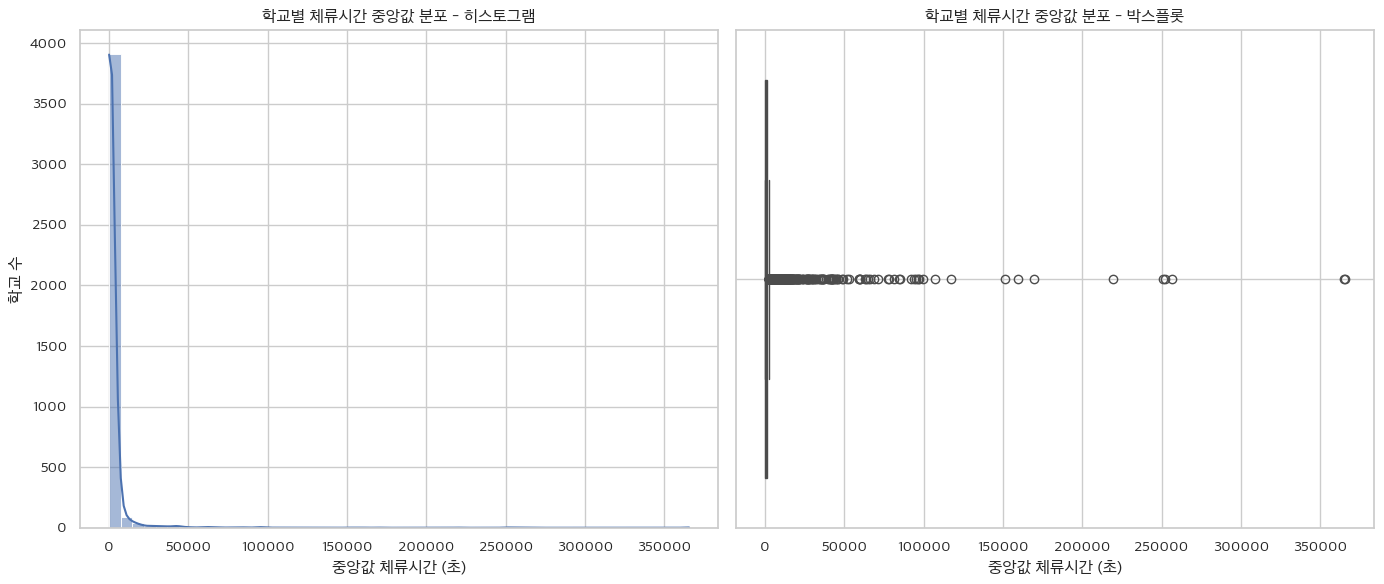

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))

# 1. 히스토그램 (왼쪽)
plt.subplot(1, 2, 1)
sns.histplot(school_duration_stats['median'], bins=50, kde=True)
plt.title('학교별 체류시간 중앙값 분포 - 히스토그램')
plt.xlabel('중앙값 체류시간 (초)')
plt.ylabel('학교 수')
plt.grid(True)

# 2. 박스플롯 (오른쪽)
plt.subplot(1, 2, 2)
sns.boxplot(x=school_duration_stats['median'], orient='h')
plt.title('학교별 체류시간 중앙값 분포 - 박스플롯')
plt.xlabel('중앙값 체류시간 (초)')
plt.grid(True)

plt.tight_layout()
plt.show()

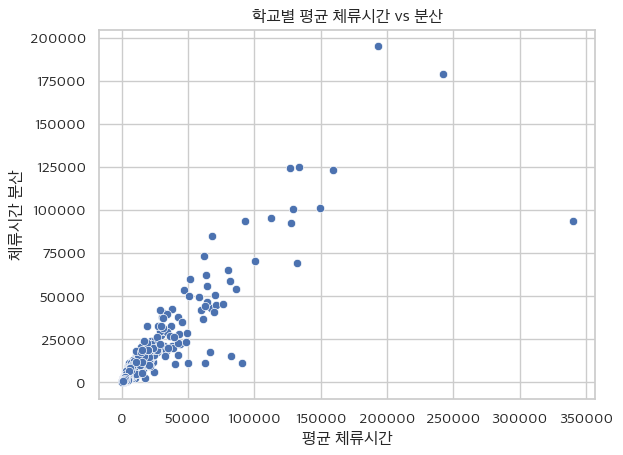

In [ ]:
sns.scatterplot(data=school_duration_stats, x='mean', y='std')
plt.title("학교별 평균 체류시간 vs 분산")
plt.xlabel("평균 체류시간")
plt.ylabel("체류시간 분산")
plt.show()

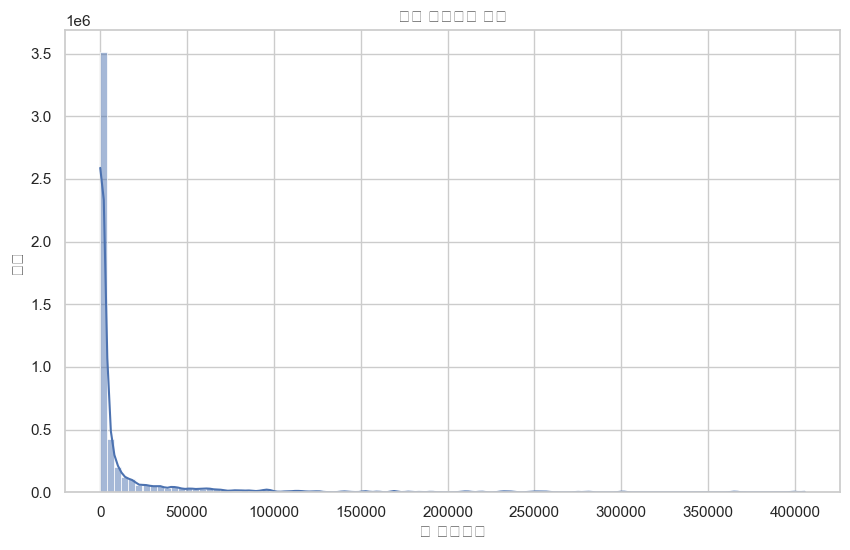

In [ ]:
# 유저의 체류시간 분포
plt.figure(figsize=(10, 6))
sns.histplot(user_total_duration_df['total_duration_sec'], bins=100, kde=True)
plt.title('유저 체류시간 분포')
plt.xlabel('총 체류시간')
plt.ylabel('빈도')
plt.show()

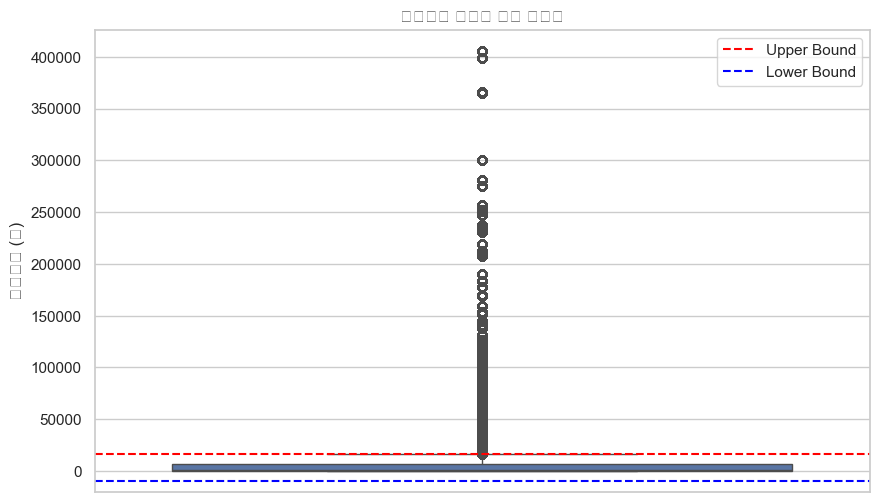

In [ ]:
# IQR 기준 유저 체류시간 시각화
q1 = user_total_duration_df['total_duration_sec'].quantile(0.25)
q3 = user_total_duration_df['total_duration_sec'].quantile(0.75)
iqr = q3 - q1
upper_bound = q3 + 1.5 * iqr
lower_bound = q1 - 1.5 * iqr

plt.figure(figsize=(10, 6))
sns.boxplot(data=user_total_duration_df, y='total_duration_sec')
plt.axhline(upper_bound, color='red', linestyle='--', label='Upper Bound')
plt.axhline(lower_bound, color='blue', linestyle='--', label='Lower Bound')
plt.legend()
plt.title('체류시간 이상치 기준 시각화')
plt.ylabel('체류시간 (초)')
plt.show()

- sns처럼 일부 유저의 활발한 활동이 서비스의 핵심을 차지하는 구조에서는, upper bound에 있는 유저들을 이상치로 잘라내는 것은 오히려 위험할 수 있다
- 이상치인지 여부 판단 방법
	- 이상치 값들이 차지하는 비율을 살펴본 후, 1% 정도로 적은 비중이라면 분리 분석 고려한다
	- 이상치 값들의 이벤트 로그 살펴본 후, 비정상적 활동로그를 보이는지 확인한다

In [ ]:
# 이상치 값 비중 확인
user_total_duration_df['is_outlier'] = user_total_duration_df['total_duration_sec'] > upper_bound
user_total_duration_df['is_outlier'].value_counts()

is_outlier
False    4261862
True      842430
Name: count, dtype: int64

- 약 14%가 upper bound 이상의 값 > 적지 않은 비중을 차지하기에 삭제하지 않는다 > 단 outlier 태그를 해두고, 추후 심화분석에 활용한다

In [ ]:
# 80000초 이상인 값 2개 확인
duration_outlier = user_total_duration_df[user_total_duration_df['total_duration_sec'] > 80000]
duration_outlier.head(20)

user_id  total_duration_sec                              event_id  \
666512   928691            219403.0  43ffe51a-26d9-4cb1-8daa-ede902c3f4fa   
666513   928691            219403.0  fee6fc44-73bb-4969-a88e-b0df410cea9f   
666514   928691            219403.0  42e68d93-0f85-4483-a4c7-2d98e74cda77   
666515   928691            219403.0  b74ab3d8-4ccd-4f3e-8964-c7115bdc8438   
666516   928691            219403.0  1e668990-80b8-4159-9266-1a89607ce8cb   
666517   928691            219403.0  2241cb09-8fa4-42a6-932d-53c30ca3a5fd   
666518   928691            219403.0  6a70c233-83cc-47e5-a9dd-be040f309df8   
666519   928691            219403.0  70e66992-07bf-4474-aef8-8a51e22e91de   
666520   928691            219403.0  489c8382-5d0c-4ee2-b2b0-5b8020ddf96e   
666521   928691            219403.0  d33bce52-acb2-4fcc-b81e-c449ec523ff3   
666522   928691            219403.0  2105c1ac-069d-4720-820f-9e055f2cc7bb   
666523   928691            219403.0  fda35a29-0b32-494e-bca1-d77f6e6f4d3d   
666524   928691            219403.0  6db406d2-e220-4bbb-8e26-e5ded7644b55   
666525   928691            219403.0  f17d61e6-6155-4105-b653-de55cc1379d5   
666526   928691            219403.0  4614a87e-ff37-4fc2-b876-8ab5dcbdc907   
666527   928691            219403.0  f54189d7-b4b5-4d9a-9f4b-48c6f3ab5aba   
666528   928691            219403.0  8501727d-06a4-425e-bfbd-0ede0622f305   
666529   928691            219403.0  af6d2860-724f-4ff8-9547-47f9824f758f   
666530   928691            219403.0  9779eb40-6094-4d75-bd71-035fde2dc0f2   
666531   928691            219403.0  90e813e1-d6fd-4921-92a0-0cbdee9eedae   

            event_datetime                          event_key  \
666512 2023-07-18 00:01:25                         launch_app   
666513 2023-07-18 00:01:30   click_bottom_navigation_timeline   
666514 2023-07-18 00:01:44  click_bottom_navigation_questions   
666515 2023-07-18 00:01:47                click_question_open   
666516 2023-07-18 00:02:00                       $session_end   
666517 2023-07-18 00:53:58                     $session_start   
666518 2023-07-18 00:53:58                         launch_app   
666519 2023-07-18 00:56:05               click_question_start   
666520 2023-07-18 00:56:08                      skip_question   
666521 2023-07-18 00:56:10                      skip_question   
666522 2023-07-18 00:56:19                      skip_question   
666523 2023-07-18 00:56:21                      skip_question   
666524 2023-07-18 00:56:24                      skip_question   
666525 2023-07-18 00:56:26                      skip_question   
666526 2023-07-18 00:56:28                      skip_question   
666527 2023-07-18 00:56:31                      skip_question   
666528 2023-07-18 00:56:48                         launch_app   
666529 2023-07-18 00:56:59                       $session_end   
666530 2023-07-18 01:58:13                     $session_start   
666531 2023-07-18 01:58:14                click_question_open   

                          session_id  school_id       time_diff  new_session  \
666512  hyqkKSirE2gukxxGhWPY7mySoiy2     2421.0             NaT         True   
666513  hyqkKSirE2gukxxGhWPY7mySoiy2     2421.0 0 days 00:00:05        False   
666514  hyqkKSirE2gukxxGhWPY7mySoiy2     2421.0 0 days 00:00:14        False   
666515  hyqkKSirE2gukxxGhWPY7mySoiy2     2421.0 0 days 00:00:03        False   
666516  hyqkKSirE2gukxxGhWPY7mySoiy2     2421.0 0 days 00:00:13        False   
666517  hyqkKSirE2gukxxGhWPY7mySoiy2     2421.0 0 days 00:51:58         True   
666518  hyqkKSirE2gukxxGhWPY7mySoiy2     2421.0 0 days 00:00:00        False   
666519  hyqkKSirE2gukxxGhWPY7mySoiy2     2421.0 0 days 00:02:07        False   
666520  hyqkKSirE2gukxxGhWPY7mySoiy2     2421.0 0 days 00:00:03        False   
666521  hyqkKSirE2gukxxGhWPY7mySoiy2     2421.0 0 days 00:00:02        False   
666522  hyqkKSirE2gukxxGhWPY7mySoiy2     2421.0 0 days 00:00:09        False   
666523  hyqkKSirE2gukxxGhWPY7mySoiy2     2421.0 0 days 00:00:02 

- 매일 꾸준히 서비스를 이용한 유저, 헤비유저로 판단하여 이상치로 삭제하지 않는다

### 세션 종료 기준 점검

- session_start, session_end 를 기준으로 시스템에서 설정된 세션 종료 시간 확인

In [ ]:
# 세션 시작과 종료만 필터링
session_df = hackle_df[hackle_df['event_key'].isin(['$session_start', '$session_end'])]

# 시간 순서대로 정렬
session_df = session_df.sort_values(by=['user_id', 'event_datetime'])

# 세션별로 id 부여
session_df['session_flag'] = session_df['event_key'] == '$session_start'
session_df['user_session_id'] = session_df.groupby('user_id')['session_flag'].cumsum()

In [ ]:
# 세션 시작-종료 reshape
session_pivot = session_df.pivot_table(
    index=['user_id', 'user_session_id'],
    columns='event_key',
    values='event_datetime',
    aggfunc='first'
).reset_index()

# 컬럼 정리
session_pivot.columns.name = None
session_pivot = session_pivot.rename(columns={
  '$session_start': 'session_start',
  '$session_end' : 'session_end'
})

session_pivot

user_id  user_session_id          session_end        session_start
0        833202                1  2023-07-18 16:43:06  2023-07-18 05:56:44
1        833202                2  2023-07-18 19:57:18  2023-07-18 19:57:13
2        833202                3  2023-07-18 23:17:59  2023-07-18 23:17:04
3        833202                4  2023-07-21 09:35:05  2023-07-21 09:34:54
4        833202                5  2023-07-22 08:46:41  2023-07-22 08:46:35
...         ...              ...                  ...                  ...
470446  1579930                2  2023-08-10 21:53:04  2023-08-10 21:49:57
470447  1579931                1  2023-08-10 21:55:06  2023-08-10 21:53:36
470448  1579931                2                  NaN  2023-08-10 21:55:10
470449  1579932                1  2023-08-10 23:37:12  2023-08-10 23:36:11
470450  1579932                2                  NaN  2023-08-10 23:37:15

[470451 rows x 4 columns]

In [ ]:
session_pivot['session_start'] = pd.to_datetime(session_pivot['session_start'])
session_pivot['session_end'] = pd.to_datetime(session_pivot['session_end'])

# 체류시간 계산
session_pivot['session_duration_sec'] = (session_pivot['session_end'] - session_pivot['session_start']).dt.total_seconds()
session_pivot.head(20)

user_id  user_session_id         session_end       session_start  \
0    833202                1 2023-07-18 16:43:06 2023-07-18 05:56:44   
1    833202                2 2023-07-18 19:57:18 2023-07-18 19:57:13   
2    833202                3 2023-07-18 23:17:59 2023-07-18 23:17:04   
3    833202                4 2023-07-21 09:35:05 2023-07-21 09:34:54   
4    833202                5 2023-07-22 08:46:41 2023-07-22 08:46:35   
5    833202                6 2023-07-23 08:46:43 2023-07-23 08:46:39   
6    833202                7 2023-07-24 08:52:05 2023-07-24 08:23:54   
7    833202                8 2023-07-25 07:30:34 2023-07-25 07:30:18   
8    833202                9 2023-07-25 08:58:31 2023-07-25 08:53:05   
9    833202               10 2023-07-26 02:33:51 2023-07-26 02:33:21   
10   833202               11 2023-07-26 21:21:08 2023-07-26 21:21:03   
11   833202               12 2023-07-27 09:23:49 2023-07-27 09:23:17   
12   833202               13 2023-07-27 12:54:18 2023-07-27 12:54:06   
13   833202               14 2023-07-28 03:53:51 2023-07-28 03:53:45   
14   833202               15 2023-07-28 23:58:24 2023-07-28 23:58:19   
15   833202               16                 NaT 2023-07-29 05:40:45   
16   833202               17 2023-07-30 23:34:03 2023-07-30 23:33:10   
17   833202               18 2023-07-31 07:05:48 2023-07-31 07:05:04   
18   833202               19 2023-07-31 20:58:24 2023-07-31 20:53:55   
19   833202               20 2023-08-01 03:20:39 2023-08-01 03:20:26   

    session_duration_sec  
0                38782.0  
1                    5.0  
2                   55.0  
3                   11.0  
4                    6.0  
5                    4.0  
6                 1691.0  
7                   16.0  
8                  326.0  
9                   30.0  
10                   5.0  
11                  32.0  
12                  12.0  
13                   6.0  
14                   5.0  
15                   NaN  
16                  53.0  
17                  44.0  
18                 269.0  
19                  13.0

In [ ]:
# session_end와 그 다음 session_start 사이의 시차를 계산

# 다음 세션의 시작 구하기
session_pivot = session_pivot.sort_values(by=['user_id', 'session_start'])
session_pivot['next_session_start'] = session_pivot.groupby('user_id')['session_start'].shift(-1)

# 시차 계산 : 다음 세션의 시작 - 현재 세션의 종료
session_pivot['gap_to_next_sec'] = (session_pivot['next_session_start'] - session_pivot['session_end']).dt.total_seconds()
session_pivot.head(20)

user_id  user_session_id         session_end       session_start  \
0    833202                1 2023-07-18 16:43:06 2023-07-18 05:56:44   
1    833202                2 2023-07-18 19:57:18 2023-07-18 19:57:13   
2    833202                3 2023-07-18 23:17:59 2023-07-18 23:17:04   
3    833202                4 2023-07-21 09:35:05 2023-07-21 09:34:54   
4    833202                5 2023-07-22 08:46:41 2023-07-22 08:46:35   
5    833202                6 2023-07-23 08:46:43 2023-07-23 08:46:39   
6    833202                7 2023-07-24 08:52:05 2023-07-24 08:23:54   
7    833202                8 2023-07-25 07:30:34 2023-07-25 07:30:18   
8    833202                9 2023-07-25 08:58:31 2023-07-25 08:53:05   
9    833202               10 2023-07-26 02:33:51 2023-07-26 02:33:21   
10   833202               11 2023-07-26 21:21:08 2023-07-26 21:21:03   
11   833202               12 2023-07-27 09:23:49 2023-07-27 09:23:17   
12   833202               13 2023-07-27 12:54:18 2023-07-27 12:54:06   
13   833202               14 2023-07-28 03:53:51 2023-07-28 03:53:45   
14   833202               15 2023-07-28 23:58:24 2023-07-28 23:58:19   
15   833202               16                 NaT 2023-07-29 05:40:45   
16   833202               17 2023-07-30 23:34:03 2023-07-30 23:33:10   
17   833202               18 2023-07-31 07:05:48 2023-07-31 07:05:04   
18   833202               19 2023-07-31 20:58:24 2023-07-31 20:53:55   
19   833202               20 2023-08-01 03:20:39 2023-08-01 03:20:26   

    session_duration_sec  next_session_start  gap_to_next_sec  
0                38782.0 2023-07-18 19:57:13          11647.0  
1                    5.0 2023-07-18 23:17:04          11986.0  
2                   55.0 2023-07-21 09:34:54         209815.0  
3                   11.0 2023-07-22 08:46:35          83490.0  
4                    6.0 2023-07-23 08:46:39          86398.0  
5                    4.0 2023-07-24 08:23:54          85031.0  
6                 1691.0 2023-07-25 07:30:18          81493.0  
7                   16.0 2023-07-25 08:53:05           4951.0  
8                  326.0 2023-07-26 02:33:21          63290.0  
9                   30.0 2023-07-26 21:21:03          67632.0  
10                   5.0 2023-07-27 09:23:17          43329.0  
11                  32.0 2023-07-27 12:54:06          12617.0  
12                  12.0 2023-07-28 03:53:45          53967.0  
13                   6.0 2023-07-28 23:58:19          72268.0  
14                   5.0 2023-07-29 05:40:45          20541.0  
15                   NaN 2023-07-30 23:33:10              NaN  
16                  53.0 2023-07-31 07:05:04          27061.0  
17                  44.0 2023-07-31 20:53:55          49687.0  
18                 269.0 2023-08-01 03:20:26          22922.0  
19                  13.0 2023-08-02 06:46:19          98740.0

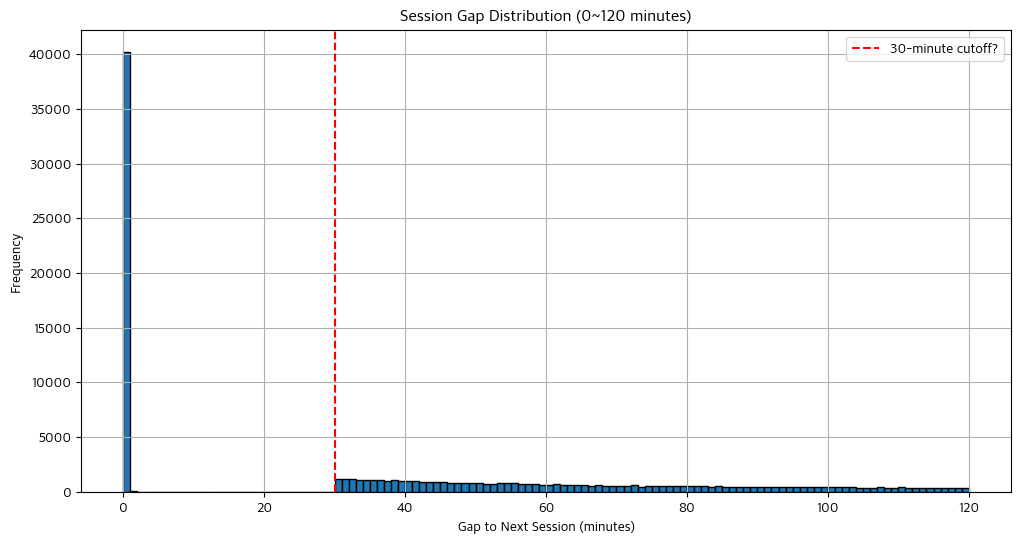

In [ ]:
# 1분 단위 gap 분포 시각화 (0~120분)

# gap을 분 단위로 변환
gap_min = session_pivot['gap_to_next_sec'] / 60

# 0~120분 사이의 gap만 필터링 (초기 분포 확인용)
gap_filtered = gap_min[(gap_min >= 0) & (gap_min <= 120)]

# 히스토그램 그리기
plt.figure(figsize=(12, 6))
plt.hist(gap_filtered, bins=120, edgecolor='black')
plt.axvline(30, color='red', linestyle='--', label='30-minute cutoff?')
plt.title('Session Gap Distribution (0~120 minutes)')
plt.xlabel('Gap to Next Session (minutes)')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

- 1분~29분 사이의 gap이 거의 없다
	- 사람의 자유로운 행동으로는 절대 발생하지 않는 분포
- 30분 이하 gap은 아예 계산되지 않음(같은 세션으로 묶어버림), 30분 초과 gap만 다음 세션과의 간격으로 기록됨
=> 세션 분류 기준 30분으로 설정하는 것은 적절하다

### 지표 추가

In [ ]:
school_duration_df.head(2)

school_id  med_duration_sec
0        5.0             996.0
1        6.0              91.0

In [ ]:
cluster_df.head(2)

school_id  heart_loss_mean  is_zero_heart_loss_mean  student_count  \
0          5              0.0                        1              4   
1          6              0.0                        1              3   

   gender_balance  is_monogender  mainevent_peruser  
0             0.5              0           5.250000  
1             0.0              1           0.333333

In [ ]:
# 최종 지표를 `cluster_df`에 추가
# 'school_id' 컬럼을 기준으로 merge(병합)
cluster_df = pd.merge(
    cluster_df,
    school_duration_df,
    on='school_id',
    how='left' # cluster_df에 있는 모든 school_id를 유지하면서 데이터를 병합
)

# 'med_duration_sec' 결측치 처리
cluster_df['med_duration_sec'].fillna(0, inplace=True)

/var/folders/vl/2r6vhhnn5752x0_47ht0yz7m0000gn/T/ipykernel_31386/1320333179.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cluster_df['med_duration_sec'].fillna(0, inplace=True)


In [ ]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school_id                4113 non-null   Int64  
 1   heart_loss_mean          4113 non-null   float64
 2   is_zero_heart_loss_mean  4113 non-null   int64  
 3   student_count            4113 non-null   int64  
 4   gender_balance           4113 non-null   float64
 5   is_monogender            4113 non-null   int64  
 6   mainevent_peruser        4113 non-null   float64
 7   med_duration_sec         4113 non-null   float64
dtypes: Int64(1), float64(4), int64(3)
memory usage: 261.2 KB


In [ ]:
# cluster_df를 CSV 파일로 저장
output_path = 'cluster_df_myungbin.csv'

# index=False → 인덱스는 저장하지 않음
cluster_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"CSV 파일이 저장되었습니다: {output_path}")

CSV 파일이 저장되었습니다: cluster_df_myungbin.csv


## 네트워크 밀도

In [ ]:
# CSV 파일 경로
input_path = 'cluster_df_myungbin.csv'

# CSV 파일 불러오기
try:
    cluster_df = pd.read_csv(input_path, encoding='utf-8-sig')

    # school_id를 정수형으로 변환 (결측 허용)
    if 'school_id' in cluster_df.columns:
        cluster_df['school_id'] = pd.to_numeric(cluster_df['school_id'], errors='coerce').astype('Int64')

    # 기본 정보 출력
    print("파일 불러오기 성공 ✅")
    print(cluster_df.info())
    display(cluster_df.head())

except FileNotFoundError:
    print(f"⚠️ 파일을 찾을 수 없습니다: {input_path}")
except pd.errors.EmptyDataError:
    print(f"⚠️ 파일이 비어 있습니다: {input_path}")
except Exception as e:
    print(f"⚠️ 알 수 없는 오류 발생: {e}")

파일 불러오기 성공 ✅
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school_id                4113 non-null   Int64  
 1   heart_loss_mean          4113 non-null   float64
 2   is_zero_heart_loss_mean  4113 non-null   int64  
 3   student_count            4113 non-null   int64  
 4   gender_balance           4113 non-null   float64
 5   is_monogender            4113 non-null   int64  
 6   mainevent_peruser        4113 non-null   float64
 7   med_duration_sec         4113 non-null   float64
dtypes: Int64(1), float64(4), int64(3)
memory usage: 261.2 KB
None


school_id  heart_loss_mean  is_zero_heart_loss_mean  student_count  \
0          5            0.000                        1              4   
1          6            0.000                        1              3   
2          7          211.125                        0              8   
3          8            0.000                        1              4   
4         10            0.000                        1             14   

   gender_balance  is_monogender  mainevent_peruser  med_duration_sec  
0        0.500000              0           5.250000             996.0  
1        0.000000              1           0.333333              91.0  
2        0.250000              0           8.125000             242.0  
3        0.500000              0           5.250000             665.0  
4        0.285714              0          36.214286           13586.0

- 학교 내 유저들이 얼마나 서로 친구를 맺었는지
- 밀도 = 실제 친구 연결 수(쌍) / 가능한 최대 연결 수
- 가능한 최대 연결 수 = (학교 내 유저 수)(학교 내 유저 수 - 1) / 2

1. hackle_df 사용해서 학교별 유저 리스트 추출
2. accounts_friendrequest 테이블 활용해서 친구 쌍 확인 (~2023.08.10)
3. 각 학교마다 network_density 계산

In [ ]:
accounts_friendrequest = pd.read_csv('accounts_friendrequest.csv')

In [ ]:
# 1. school_id별 유저셋 추출 (from - hackle_df)
school_users = hackle_df.groupby('school_id')['user_id'].apply(set).reset_index()
school_users

school_id                                            user_id
0           5.0                 {1398041, 960474, 1579476, 963789}
1           6.0                         {888642, 1407044, 1506375}
2           7.0  {1536998, 1376012, 1517516, 982351, 1393232, 1...
3           8.0               {1519896, 1566027, 1564356, 1396198}
4          10.0  {1566785, 1377605, 1562406, 1386039, 1438665, ...
...         ...                                                ...
4108     5956.0  {1437894, 1382057, 1492236, 1479309, 1543765, ...
4109     5958.0  {1503361, 1492741, 1541645, 1468558, 1493393, ...
4110     5960.0  {1393732, 1378469, 1381833, 1376875, 1523692, ...
4111     5961.0  {1431811, 1546629, 1450248, 1422857, 1422984, ...
4112     5963.0  {1553089, 1556004, 1557636, 1461030, 1556016, ...

[4113 rows x 2 columns]

In [ ]:
# 2. 친구 쌍 (from votes - accounts_friendrequest)
# 친구 요청이 수락된 경우만 사용 ('status == A')
accepted_df = accounts_friendrequest[accounts_friendrequest['status'] == 'A']

# 방향성 제거: 친구 쌍을 정렬된 튜플로 저장
friend_pairs = set(
    tuple(sorted([row.send_user_id, row.receive_user_id]))
    for row in accepted_df.itertuples()
)

In [ ]:
# 3. 학교별 네트워크 밀도 계산
from itertools import combinations

records = []

for row in school_users.itertuples():
    sid = row.school_id
    users = row.user_id  # 이건 set

    if len(users) < 2:
        continue

    possible_pairs = set(combinations(users, 2))
    actual_pairs = possible_pairs & friend_pairs

    records.append({
        'school_id': sid,
        'user_count': len(users),
        'actual_friend_pairs': len(actual_pairs),
        'max_possible_pairs': len(possible_pairs),
        'network_density': len(actual_pairs) / len(possible_pairs) if len(possible_pairs) > 0 else 0
    })

In [ ]:
# 밀도 데이터프레임
school_density_from_hackle = pd.DataFrame(records)
school_density_from_hackle

school_id  user_count  actual_friend_pairs  max_possible_pairs  \
0           5.0           4                    0                   6   
1           6.0           3                    0                   3   
2           7.0           8                    1                  28   
3           8.0           4                    0                   6   
4          10.0          14                   10                  91   
...         ...         ...                  ...                 ...   
4108     5956.0           7                    3                  21   
4109     5958.0          49                  135                1176   
4110     5960.0          12                   12                  66   
4111     5961.0          33                   68                 528   
4112     5963.0          10                   14                  45   

      network_density  
0            0.000000  
1            0.000000  
2            0.035714  
3            0.000000  
4            0.109890  
...               ...  
4108         0.142857  
4109         0.114796  
4110         0.181818  
4111         0.128788  
4112         0.311111  

[4113 rows x 5 columns]

In [ ]:
school_density_from_hackle.describe()

school_id   user_count  actual_friend_pairs  max_possible_pairs  \
count  4113.000000  4113.000000          4113.000000         4113.000000   
mean   3016.156820    24.018721            54.062485          474.308777   
std    1708.324357    19.895566            88.671533          831.122292   
min       5.000000     3.000000             0.000000            3.000000   
25%    1569.000000     8.000000             3.000000           28.000000   
50%    3048.000000    19.000000            19.000000          171.000000   
75%    4529.000000    34.000000            67.000000          561.000000   
max    5963.000000   157.000000           992.000000        12246.000000   

       network_density  
count      4113.000000  
mean          0.135642  
std           0.114182  
min           0.000000  
25%           0.062389  
50%           0.109155  
75%           0.181287  
max           1.000000

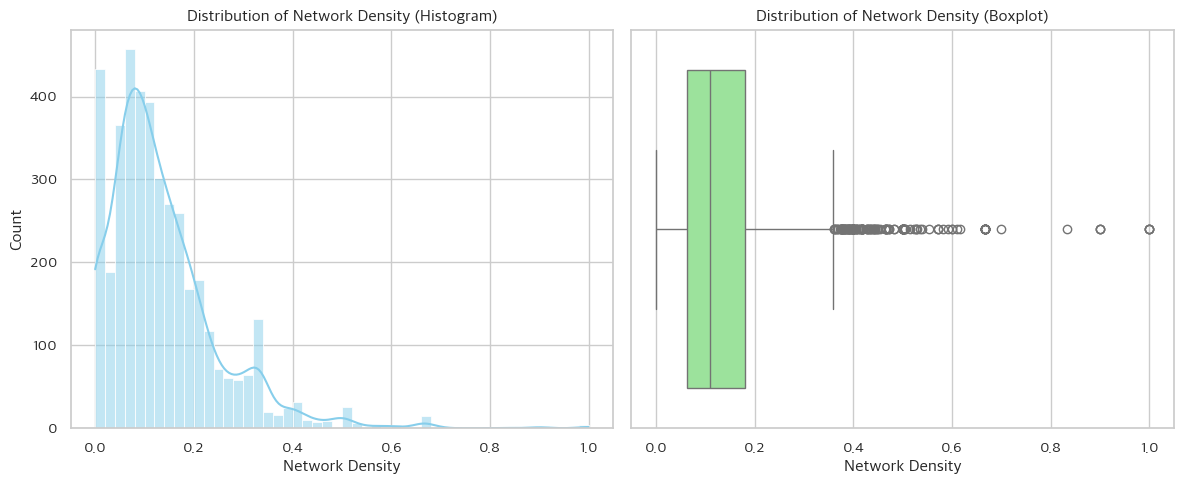

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# 시각화 설정
plt.figure(figsize=(12, 5))

# 좌측: 히스토그램
plt.subplot(1, 2, 1)
sns.histplot(school_density_from_hackle['network_density'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Network Density (Histogram)')
plt.xlabel('Network Density')
plt.ylabel('Count')

# 우측: 박스플롯
plt.subplot(1, 2, 2)
sns.boxplot(x=school_density_from_hackle['network_density'], color='lightgreen')
plt.title('Distribution of Network Density (Boxplot)')
plt.xlabel('Network Density')

plt.tight_layout()
plt.show()

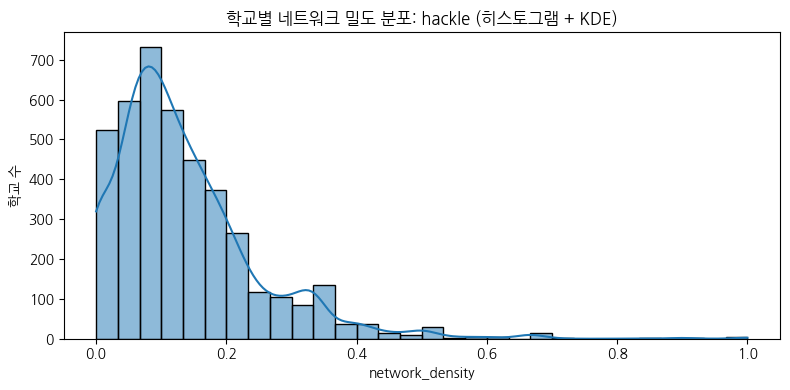

In [ ]:
plt.figure(figsize=(8, 4))
sns.histplot(school_density_from_hackle['network_density'], bins=30, kde=True)
plt.title("학교별 네트워크 밀도 분포: hackle (히스토그램 + KDE)")
plt.xlabel("network_density")
plt.ylabel("학교 수")
plt.tight_layout()
plt.show()

- 전반적으로 밀도가 낮은 편
- 밀도 분포 자체가 왼쪽
    - 대부분의 학교는 유저 간 친구 연결이 매우 적고, 일부 학교만 높은 밀도를 봉미
- 친구 관계는 형성되어 있으나 실제 활동이 없거나 적은 유저가 많은 학교가 존재할 수 있음
network_density가 높은 일부 학교는 유저 수가 적은 경우일 수 있으므로, 인위적으로 높은 밀도를 가진 경우를 주의해야 함

### 이상치

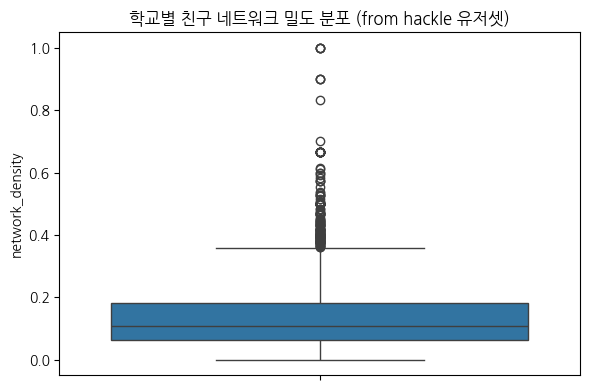

In [ ]:
plt.figure(figsize=(6, 4))
sns.boxplot(y=school_density_from_hackle['network_density'])
plt.title("학교별 친구 네트워크 밀도 분포 (from hackle 유저셋)")
plt.ylabel("network_density")
plt.tight_layout()
plt.show()

In [ ]:
Q1 = school_density_from_hackle['network_density'].quantile(0.25)
Q3 = school_density_from_hackle['network_density'].quantile(0.75)
IQR = Q3 - Q1
threshold = Q3 + 1.5 * IQR

hackle_density_outliers = school_density_from_hackle[
    school_density_from_hackle['network_density'] > threshold
]
hackle_density_outliers[['user_count', 'actual_friend_pairs', 'network_density']].describe()

user_count  actual_friend_pairs  network_density
count  167.000000           167.000000       167.000000
mean    12.892216            54.622754         0.489163
std     10.205733            93.762171         0.135175
min      3.000000             2.000000         0.361111
25%      5.000000             5.000000         0.400000
50%      9.000000            16.000000         0.441667
75%     19.500000            77.000000         0.505013
max     62.000000           766.000000         1.000000

- IQR 방식 기준: Q3 + 1.5*IQR 이상은 이상치로 분류
- 상위 이상치 그룹 수: 167개
    - 유저 수가 적은데도 친구 밀도가 높음
    - 구조적 착시일 수 있음 (작은 집단일수록 모든 유저가 친구 맺으면 밀도 = 1)
    - 활동이 과도하게 집중된 소규모 그룹 가능성

- 이상치 제거는 하지 않음
- 대신 학교 규모 관련 컬럼을 추가하여 분석 시 필터링 기준으로 활용
- 분포 왜곡 방지. 의미 있는 경우 탐지 대상으로 유지

In [ ]:
# school_id, network_density 컬럼만 추출
network_density_df = school_density_from_hackle[['school_id', 'network_density']]

### 지표 추가

In [ ]:
network_density_df.head(2)

school_id  network_density
0        5.0              0.0
1        6.0              0.0

In [ ]:
cluster_df.head(2)

school_id  heart_loss_mean  is_zero_heart_loss_mean  student_count  \
0          5              0.0                        1              4   
1          6              0.0                        1              3   

   gender_balance  is_monogender  mainevent_peruser  med_duration_sec  
0             0.5              0           5.250000             996.0  
1             0.0              1           0.333333              91.0

In [ ]:
# 최종 지표를 `cluster_df`에 추가
# 'school_id' 컬럼을 기준으로 merge(병합)
cluster_df = pd.merge(
    cluster_df,
    network_density_df,
    on='school_id',
    how='left' # cluster_df에 있는 모든 school_id를 유지하면서 데이터를 병합
)

# 'med_duration_sec' 결측치 처리
cluster_df['med_duration_sec'].fillna(0, inplace=True)

C:\Users\Home\AppData\Local\Temp\ipykernel_24124\2767020516.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cluster_df['med_duration_sec'].fillna(0, inplace=True)


In [ ]:
cluster_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school_id                4113 non-null   Int64  
 1   heart_loss_mean          4113 non-null   float64
 2   is_zero_heart_loss_mean  4113 non-null   int64  
 3   student_count            4113 non-null   int64  
 4   gender_balance           4113 non-null   float64
 5   is_monogender            4113 non-null   int64  
 6   mainevent_peruser        4113 non-null   float64
 7   med_duration_sec         4113 non-null   float64
 8   network_density          4113 non-null   float64
dtypes: Int64(1), float64(5), int64(3)
memory usage: 293.3 KB


In [ ]:
# cluster_df를 CSV 파일로 저장
output_path = 'cluster_df_jisu.csv'

# index=False → 인덱스는 저장하지 않음
cluster_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"CSV 파일이 저장되었습니다: {output_path}")

CSV 파일이 저장되었습니다: cluster_df_jisu.csv


# 3. 클러스터링

## 데이터 불러오기

In [ ]:
# CSV 파일 경로
input_path = 'cluster_df_jisu.csv'

# CSV 파일 불러오기
try:
    cluster_df = pd.read_csv(input_path, encoding='utf-8-sig')

    # 변환 대상 컬럼 목록
    int_columns = ['school_id', 'med_duration_sec']

    for col in int_columns:
        if col in cluster_df.columns:
            cluster_df[col] = (
                pd.to_numeric(cluster_df[col], errors='coerce')
                .round()  # 소수점 반올림 (필요에 따라 floor/ceil 가능)
                .astype('Int64')  # NaN 허용 정수형
            )

    # 기본 정보 출력
    print("파일 불러오기 성공 ✅")
    print(cluster_df.info())
    display(cluster_df.head())

except FileNotFoundError:
    print(f"⚠️ 파일을 찾을 수 없습니다: {input_path}")
except pd.errors.EmptyDataError:
    print(f"⚠️ 파일이 비어 있습니다: {input_path}")
except Exception as e:
    print(f"⚠️ 알 수 없는 오류 발생: {e}")

파일 불러오기 성공 ✅
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4113 entries, 0 to 4112
Data columns (total 9 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   school_id                4113 non-null   Int64  
 1   heart_loss_mean          4113 non-null   float64
 2   is_zero_heart_loss_mean  4113 non-null   int64  
 3   student_count            4113 non-null   int64  
 4   gender_balance           4113 non-null   float64
 5   is_monogender            4113 non-null   int64  
 6   mainevent_peruser        4113 non-null   float64
 7   med_duration_sec         4113 non-null   Int64  
 8   network_density          4113 non-null   float64
dtypes: Int64(2), float64(4), int64(3)
memory usage: 297.4 KB
None


school_id  heart_loss_mean  is_zero_heart_loss_mean  student_count  \
0          5            0.000                        1              4   
1          6            0.000                        1              3   
2          7          211.125                        0              8   
3          8            0.000                        1              4   
4         10            0.000                        1             14   

   gender_balance  is_monogender  mainevent_peruser  med_duration_sec  \
0        0.500000              0           5.250000               996   
1        0.000000              1           0.333333                91   
2        0.250000              0           8.125000               242   
3        0.500000              0           5.250000               665   
4        0.285714              0          36.214286             13586   

   network_density  
0         0.000000  
1         0.000000  
2         0.035714  
3         0.000000  
4         0.109890

## `school_id` 보관

In [ ]:
# school_id를 따로 보관
school_ids = cluster_df['school_id']

# 분석용 feature DataFrame 생성 (school_id 제외)
features_df = cluster_df.drop(columns=['school_id'])

# 결과 확인
print("school_id shape:", school_ids.shape)
print("features_df shape:", features_df.shape)
features_df.head()

school_id shape: (4113,)
features_df shape: (4113, 8)


heart_loss_mean  is_zero_heart_loss_mean  student_count  gender_balance  \
0            0.000                        1              4        0.500000   
1            0.000                        1              3        0.000000   
2          211.125                        0              8        0.250000   
3            0.000                        1              4        0.500000   
4            0.000                        1             14        0.285714   

   is_monogender  mainevent_peruser  med_duration_sec  network_density  
0              0           5.250000               996         0.000000  
1              1           0.333333                91         0.000000  
2              0           8.125000               242         0.035714  
3              0           5.250000               665         0.000000  
4              0          36.214286             13586         0.109890

## 피처 엔지니어링

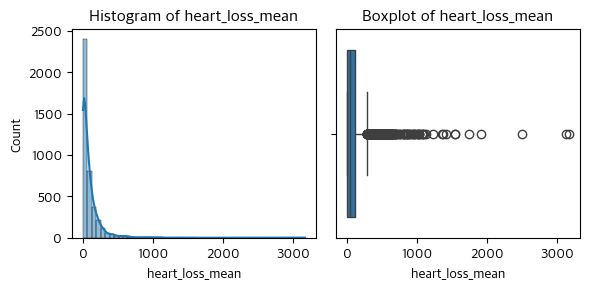

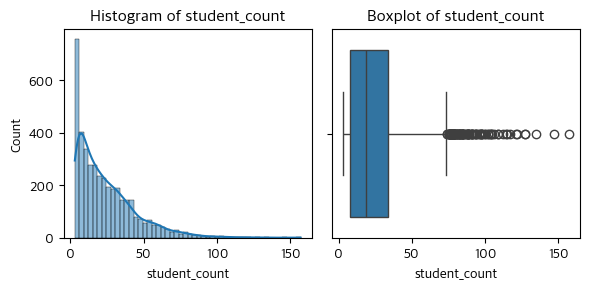

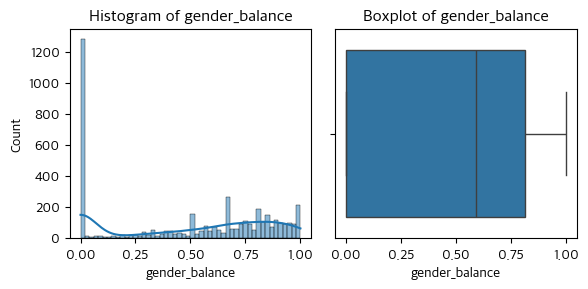

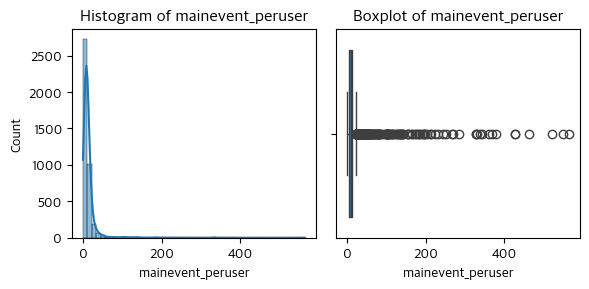

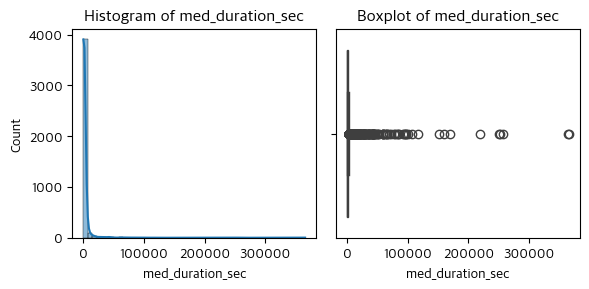

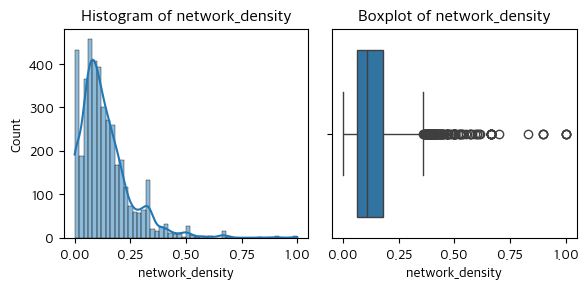

In [ ]:
# 연속형 변수만 선택
continuous_vars = [
    'heart_loss_mean',
    'student_count',
    'gender_balance',
    'mainevent_peruser',
    'med_duration_sec',
    'network_density'
]

# 시각화
for col in continuous_vars:
    plt.figure(figsize=(6, 3))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(cluster_df[col], bins=50, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=cluster_df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

In [ ]:
from scipy.stats import skew, kurtosis

# 왜도와 첨도 계산
stats_summary = pd.DataFrame({
    'Variable': continuous_vars,
    'Skewness': [skew(cluster_df[var]) for var in continuous_vars],
    'Kurtosis': [kurtosis(cluster_df[var]) for var in continuous_vars]
})

# 보기 좋게 정렬
stats_summary = stats_summary.set_index('Variable')
display(stats_summary)

Skewness    Kurtosis
Variable                                
heart_loss_mean     6.770902   84.541757
student_count       1.495365    2.976369
gender_balance     -0.231466   -1.539343
mainevent_peruser  10.195361  130.558064
med_duration_sec   15.949945  326.466876
network_density     1.945132    7.018431

### 📊 연속형 변수 종합 평가 (히스토그램 + 박스플롯 + 왜도/첨도 기반)

1. `heart_loss_mean`
    - **분포**: 극단적으로 오른쪽 꼬리, 0값 다수.
    - **지표**: Skewness=6.77, Kurtosis=84.54 → 심각한 비대칭과 긴 꼬리.
    - **평가**: 로그 변환 필수.

2. `student_count`
    - **분포**: 오른쪽 꼬리, 일부 대규모 학교에서 극단값.
    - **지표**: Skewness=1.49, Kurtosis=2.98 → 비교적 안정적.
    - **평가**: 로그 변환 불필요.

3. `gender_balance`
    - **분포**: 0과 1에 몰림, 중간값도 일정 비율 존재.
    - **지표**: Skewness=-0.23, Kurtosis=-1.54 → 대체로 대칭적.
    - **평가**: 로그 변환 불필요.

4. `mainevent_peruser`
    - **분포**: 대부분 낮은 값, 상위 꼬리에 극단값 다수.
    - **지표**: Skewness=10.20, Kurtosis=130.56 → 매우 긴 오른쪽 꼬리.
    - **평가**: 로그 변환 필수.

5. `med_duration_sec`
    - **분포**: 대부분 짧은 값, 소수의 매우 긴 지속 시간 존재.
    - **지표**: Skewness=15.95, Kurtosis=326.47 → 극도로 긴 오른쪽 꼬리.
    - **평가**: 로그 변환 필수.

6. `network_density`
    - **분포**: 0~0.3에 밀집, 일부 고밀도 값.
    - **지표**: Skewness=1.95, Kurtosis=7.02 → 기준에 따르면 허용 가능한 수준.
    - **평가**: 로그 변환 불필요.

---

- 결론
    - **로그 변환 필수**: `heart_loss_mean`, `mainevent_peruser`, `med_duration_sec`
    - **로그 변환 불필요**: `student_count`, `gender_balance`, `network_density`

In [ ]:
# 로그 변환 대상 변수
log_vars = ['heart_loss_mean', 'mainevent_peruser', 'med_duration_sec']

# 원본 보존을 위해 새로운 DataFrame 생성
features_df_log = features_df.copy()

# 로그 변환 적용
for col in log_vars:
    features_df_log[col] = np.log1p(features_df_log[col])

# 변환 결과 확인 (앞부분 5행)
features_df_log[log_vars].head()

heart_loss_mean  mainevent_peruser  med_duration_sec
0         0.000000           1.832581          6.904751
1         0.000000           0.287682          4.521789
2         5.357176           2.211018          5.493061
3         0.000000           1.832581           6.50129
4         0.000000           3.616693          9.516869

In [ ]:
# 전후 비교용 DataFrame 생성
log_comparison = pd.DataFrame({
    'Variable': log_vars,
    'Skewness_before': [skew(features_df[var]) for var in log_vars],
    'Kurtosis_before': [kurtosis(features_df[var]) for var in log_vars],
    'Skewness_after': [skew(features_df_log[var]) for var in log_vars],
    'Kurtosis_after': [kurtosis(features_df_log[var]) for var in log_vars]
})

log_comparison.set_index('Variable', inplace=True)
log_comparison

Skewness_before  Kurtosis_before  Skewness_after  \
Variable                                                              
heart_loss_mean           6.770902        84.541757       -0.466328   
mainevent_peruser        10.195361       130.558064        1.452833   
med_duration_sec         15.949945       326.466876        0.990155   

                   Kurtosis_after  
Variable                           
heart_loss_mean         -1.155260  
mainevent_peruser        5.479590  
med_duration_sec         2.063117

### 로그 변환 전후 비교 평가

1. `heart_loss_mean`
    - **전**: Skewness=6.77, Kurtosis=84.54 → 극단적 오른쪽 치우침과 긴 꼬리.
    - **후**: Skewness=-0.47, Kurtosis=-1.16 → 거의 대칭적이며 꼬리도 짧아짐.
    - **평가**: 로그 변환으로 분포가 정상 수준에 가까워짐.

2. `mainevent_peruser`
    - **전**: Skewness=10.20, Kurtosis=130.56 → 극도로 긴 오른쪽 꼬리.
    - **후**: Skewness=1.45, Kurtosis=5.48 → 오른쪽 꼬리 현저히 감소, 첨도도 안정적 범위에 근접.
    - **평가**: 로그 변환으로 큰 개선 효과. 여전히 약간의 오른쪽 꼬리와 두꺼운 꼬리 존재.

3. `med_duration_sec`
    - **전**: Skewness=15.95, Kurtosis=326.47 → 극단적 비대칭과 매우 긴 꼬리.
    - **후**: Skewness=0.99, Kurtosis=2.06 → 거의 대칭적이며 꼬리도 정규분포 수준에 근접.
    - **평가**: 로그 변환으로 극적인 개선.

- 요약
    - **정규성에 가까움**: `heart_loss_mean`, `med_duration_sec`
    - **개선됐으나 일부 꼬리 남음**: `mainevent_peruser`
    - 로그 변환 효과는 전반적으로 매우 긍정적이며, 대부분의 극단적 왜도와 첨도가 해소됨.

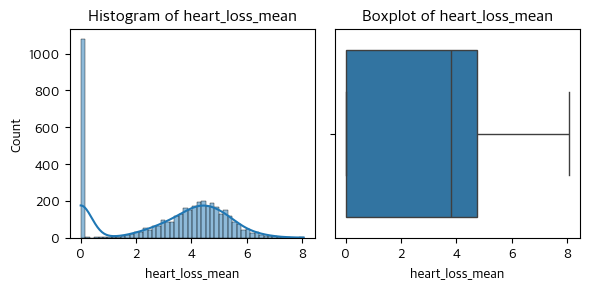

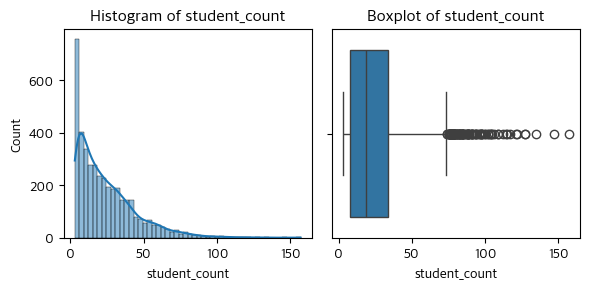

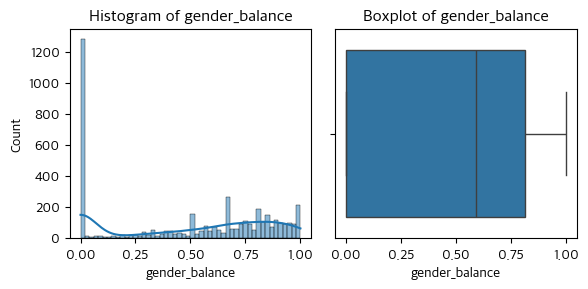

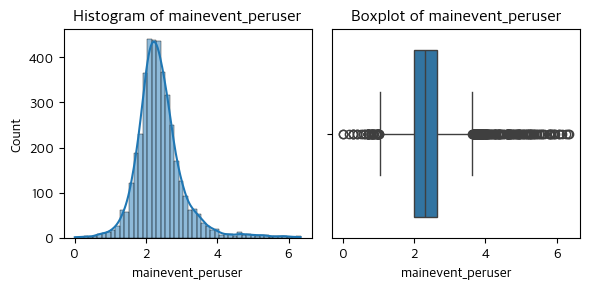

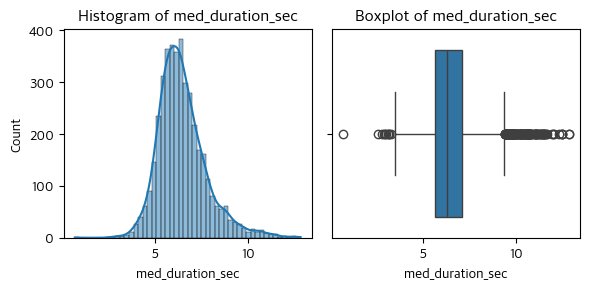

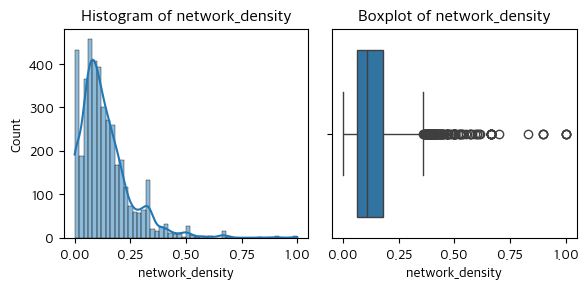

In [ ]:
# 연속형 변수만 선택
continuous_vars = [
    'heart_loss_mean',
    'student_count',
    'gender_balance',
    'mainevent_peruser',
    'med_duration_sec',
    'network_density'
]

# 시각화
for col in continuous_vars:
    plt.figure(figsize=(6, 3))

    # 히스토그램
    plt.subplot(1, 2, 1)
    sns.histplot(features_df_log[col], bins=50, kde=True)
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')

    # 박스플롯
    plt.subplot(1, 2, 2)
    sns.boxplot(x=features_df_log[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

    plt.tight_layout()
    plt.show()

### 로그 변환 이후 윈저화 여부 1차 검토 (히스토그램 + 박스플롯 기반)

- (제외) `heart_loss_mean`
    - **관찰**: 히스토그램과 박스플롯 모두 안정적. 이상치 점 없음.
    - **판단**: 윈저화 검토 불필요.

1. `student_count`
    - **관찰**: 긴 오른쪽 꼬리. 박스플롯에서 상위 이상치 점 다수.
    - **판단**: 검토 후보로 포함.

- (제외) `gender_balance`
    - **관찰**: 0=완전 불균형, 1=완전 균형. 박스플롯에서도 이상치 없음.
    - **판단**: 윈저화 검토 불필요.

2. `mainevent_peruser`
    - **관찰**: 상하위 꼬리에 점 존재.
    - **판단**: 검토 후보로 포함.

3. `med_duration_sec`
    - **관찰**: 대체로 안정적이나 상위 꼬리에 이상치 다수.
    - **판단**: 검토 후보로 포함.

4. `network_density`
    - **관찰**: 오른쪽 꼬리, 상위 꼬리에 이상치 점 확인.
    - **도메인 맥락**: 소규모 학교에서 과도하게 높은 값 발생 → 클러스터링 왜곡 가능성.
    - **판단**: 검토 후보로 포함.

- 요약
    - **윈저화 후보**: `student_count`, `mainevent_peruser`, `med_duration_sec`, `network_density`
    - **제외**: `heart_loss_mean`, `gender_balance`
    - 👉 이후 IQR 기반 이상치 비율, Q95/Q99 대비 최대값 등 수치 검증으로 최종 여부 확정 예정.

In [ ]:
# 검토 대상 변수
vars_to_check = ['student_count', 'mainevent_peruser', 'med_duration_sec', 'network_density']

# 결과 저장용 리스트
results = []

for var in vars_to_check:
    data = features_df_log[var]

    # 분위수 계산
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # 이상치 비율
    lower_outliers = (data < lower_bound).sum()
    upper_outliers = (data > upper_bound).sum()
    total_outliers = lower_outliers + upper_outliers
    total_count = len(data)

    # 상위/하위 분위수
    Q95 = data.quantile(0.95)
    Q99 = data.quantile(0.99)
    min_val = data.min()
    max_val = data.max()

    results.append({
        'Variable': var,
        'Q1': Q1, 'Q3': Q3, 'IQR': IQR,
        'Lower_Bound': lower_bound, 'Upper_Bound': upper_bound,
        'Lower_Outliers(%)': round(lower_outliers / total_count * 100, 2),
        'Upper_Outliers(%)': round(upper_outliers / total_count * 100, 2),
        'Total_Outliers(%)': round(total_outliers / total_count * 100, 2),
        'Q95': Q95, 'Q99': Q99,
        'Min': min_val, 'Max': max_val,
        'Max/Q95': round(max_val / Q95, 2) if Q95 > 0 else np.nan,
        'Max/Q99': round(max_val / Q99, 2) if Q99 > 0 else np.nan,
        'Min/Q1': round(min_val / Q1, 2) if Q1 > 0 else np.nan
    })

# 결과를 DataFrame으로 정리
winsor_check_df = pd.DataFrame(results)
winsor_check_df

Variable        Q1         Q3        IQR  Lower_Bound  \
0      student_count  8.000000  34.000000  26.000000   -31.000000   
1  mainevent_peruser  1.999977   2.650892   0.650914     1.023606   
2   med_duration_sec  5.609472   7.100852   1.491380     3.372402   
3    network_density  0.062389   0.181287   0.118898    -0.115958   

   Upper_Bound  Lower_Outliers(%)  Upper_Outliers(%)  Total_Outliers(%)  \
0    73.000000               0.00               2.65               2.65   
1     3.627263               1.09               3.96               5.06   
2     9.337922               0.24               3.38               3.62   
3     0.359633               0.00               4.06               4.06   

         Q95        Q99       Min         Max  Max/Q95  Max/Q99  Min/Q1  
0  63.000000  88.000000  3.000000  157.000000     2.49     1.78    0.38  
1   3.513170   4.935828  0.000000    6.337168     1.80     1.28    0.00  
2   8.880668  10.669418  0.693147   12.809440     1.44     1.20    0.12  
3   0.333333   0.505203  0.000000    1.000000     3.00     1.98    0.00

### 📊 IQR 기반 윈저화 검토 결과 해석

1. **student_count**
    - **이상치 비율**: 상위 2.65%, 총 2.65% (하위 없음)
    - **극단값 괴리**: Max/Q95=2.49, Max/Q99=1.78 → 상위 꼬리에서 큰 괴리
    - **평가**: 소수 대규모 학교가 분포 스케일을 왜곡할 가능성.  
    → **상위 윈저화 검토 필요**

2. **mainevent_peruser**
    - **이상치 비율**: 상위 3.96%, 하위 1.09%, 총 5.06%
    - **극단값 괴리**: Max/Q95=1.80, Max/Q99=1.28 → 상위는 중간 정도 괴리  
    Min/Q1=0.00 → 하위 극단값도 확인됨
    - **평가**: 상·하위 모두에서 이상치 존재.  
    특히 하위 값(0 근처)이 실제 데이터 의미(활동 거의 없음)일지 검증 필요.  
    → **상·하위 윈저화 검토 필요**

3. **med_duration_sec**
    - **이상치 비율**: 상위 3.38%, 하위 0.24%, 총 3.62%
    - **극단값 괴리**: Max/Q95=1.44, Max/Q99=1.20 → 상위 괴리 크지 않음  
    Min/Q1=0.12 → 일부 매우 작은 값 존재
    - **평가**: 상위 꼬리 영향은 완화됐으나 여전히 일정 비율 존재.  
    하위 극단값도 소수 존재 → 데이터 오류 가능성 점검 필요.  
    → **상·하위 윈저화 검토 필요**

4. **network_density**
    - **이상치 비율**: 상위 4.06%, 총 4.06% (하위 없음)
    - **극단값 괴리**: Max/Q95=3.00, Max/Q99=1.98 → 상위 극단값 괴리 상당  
    - **평가**: 구조적으로 소규모 학교에서 값이 과도하게 커짐.  
    도메인 맥락상 클러스터링 왜곡 가능성 높음.  
    → **상위 윈저화 검토 필요**

- **종합 결론**
    - **상위 윈저화 후보**: student_count, network_density  
    - **상·하위 윈저화 후보**: mainevent_peruser, med_duration_sec  
    - → 이후 단계에서 적정 컷오프(예: Q99 또는 Q95)와 실제 값의 도메인 타당성을 추가 검토하여 최종 확정 필요

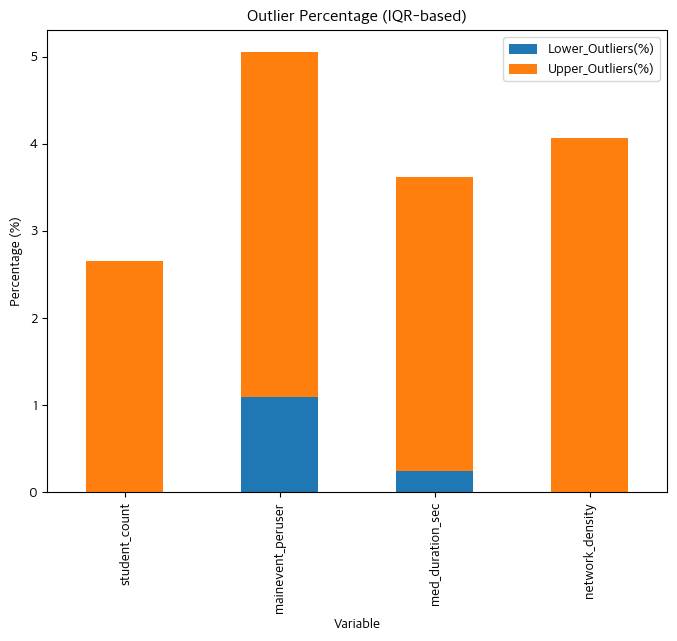

In [ ]:
outlier_rates = winsor_check_df.set_index('Variable')[['Lower_Outliers(%)','Upper_Outliers(%)']]

outlier_rates.plot(kind='bar', stacked=True, figsize=(8,6))
plt.title('Outlier Percentage (IQR-based)')
plt.ylabel('Percentage (%)')
plt.show()

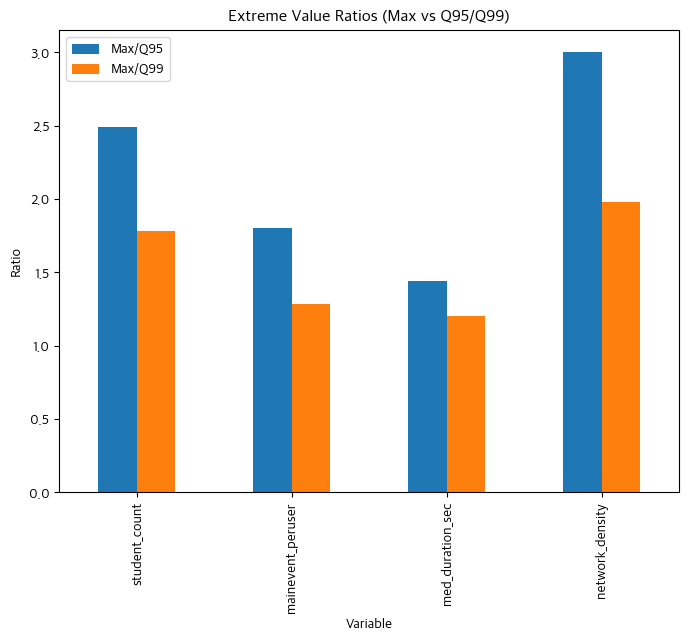

In [ ]:
ratios = winsor_check_df.set_index('Variable')[['Max/Q95','Max/Q99']]

ratios.plot(kind='bar', figsize=(8,6))
plt.title('Extreme Value Ratios (Max vs Q95/Q99)')
plt.ylabel('Ratio')
plt.show()

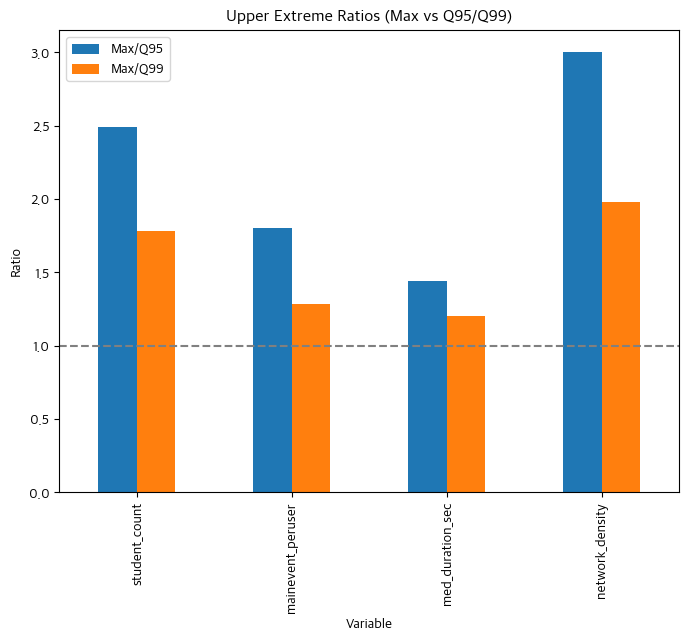

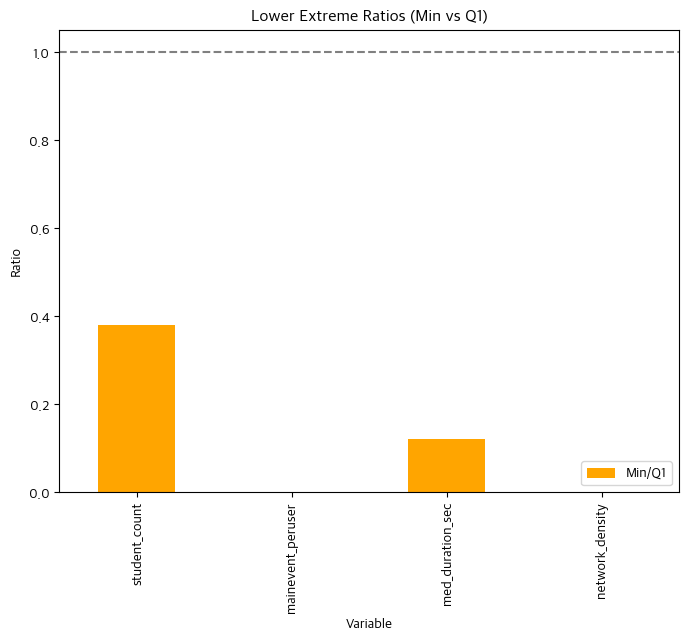

In [ ]:
# 상위 괴리 지표
upper_ratios = winsor_check_df.set_index('Variable')[['Max/Q95','Max/Q99']]

# 하위 괴리 지표
lower_ratios = winsor_check_df.set_index('Variable')[['Min/Q1']]

# 상위 괴리 시각화
upper_ratios.plot(kind='bar', figsize=(8,6))
plt.title('Upper Extreme Ratios (Max vs Q95/Q99)')
plt.ylabel('Ratio')
plt.axhline(1, color='gray', linestyle='--')  # 기준선
plt.show()

# 하위 괴리 시각화
lower_ratios.plot(kind='bar', color='orange', figsize=(8,6))
plt.title('Lower Extreme Ratios (Min vs Q1)')
plt.ylabel('Ratio')
plt.axhline(1, color='gray', linestyle='--')  # 기준선
plt.show()

### 📊 윈저화 여부 검토 결과 (시각화 기반)

1. **IQR 기반 이상치 비율**
  - **student_count**: 상위 이상치 약 2.6% → 대규모 학교 소수 존재
  - **mainevent_peruser**: 상·하위 이상치 합계 약 5% → 양방향으로 극단값 분포
  - **med_duration_sec**: 총 3.6% → 특히 상위 꼬리에서 극단값
  - **network_density**: 상위 약 4% → 소규모 학교의 과도한 밀도값
- **mainevent_peruser**와 **med_duration_sec**는 상하위 모두 검토 필요,  
**student_count**와 **network_density**는 상위 중심 검토 필요.

2. **상위 극단값 괴리 (Max vs Q95/Q99)**
  - **student_count**: Max/Q95=2.5 → 상위 꼬리 상당히 긺
  - **network_density**: Max/Q95=3.0, Max/Q99≈2.0 → 상위 꼬리 매우 심각
  - **mainevent_peruser, med_duration_sec**: Max/Q99가 1.2~1.3 수준 → 극단적 상위값 영향은 제한적
- 상위 꼬리 영향은 **student_count, network_density**에서 특히 두드러짐.

3. **하위 극단값 괴리 (Min vs Q1)**
  - **mainevent_peruser**: Min/Q1=0.00 → 일부 학교에서 활동값 0 확인
  - **med_duration_sec**: Min/Q1≈0.12 → 비정상적으로 짧은 활동 시간 소수 존재
  - **student_count, network_density**: Min/Q1 값 상대적으로 높음 → 하위 극단값 영향 제한적
- 하위 꼬리는 **mainevent_peruser**와 **med_duration_sec**에서만 의미 있음.

- **종합 결론**
  - **상위 윈저화 후보**
    - `student_count`: 극소수 대규모 학교가 전체 분포 왜곡
    - `network_density`: 소규모 학교 구조적 특성으로 과도한 값 발생

  - **상·하위 윈저화 후보**
    - `mainevent_peruser`: 0 근처 값 포함, 상·하위 모두 검토 필요
    - `med_duration_sec`: 일부 비정상적으로 짧거나 긴 값 존재

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# 사용할 변수들
variables = ['student_count', 'mainevent_peruser', 'med_duration_sec', 'network_density']
quantiles = [0.95, 0.97, 0.99, 1.00]  # 1.00 추가 (컷팅 없음)

# 결과 저장 리스트
results = []

for var in variables:
    data = cluster_df[var].astype(float).copy()  # Int64 → float 변환 보장

    for uq in quantiles:  # Upper Quantile
        for lq in quantiles:  # Lower Quantile
            # 컷팅 없음 처리
            if uq == 1.00 and lq == 1.00:
                upper_cut = data.max()
                lower_cut = data.min()
                combo_label = "No Cut"
            else:
                upper_cut = data.quantile(uq)
                lower_cut = data.quantile(1 - lq)
                combo_label = f'UQ{int(uq*100)} + LQ{int(lq*100)}'

            # Winsorization (numpy 기반 → Series로 복원)
            winsorized = np.clip(data.to_numpy(), lower_cut, upper_cut)
            winsorized = pd.Series(winsorized, index=data.index)

            # 손실률 계산
            upper_loss = (data > upper_cut).mean() * 100
            lower_loss = (data < lower_cut).mean() * 100
            total_loss = upper_loss + lower_loss

            # 왜도, 첨도 계산
            skew_after = skew(winsorized, nan_policy='omit')
            kurt_after = kurtosis(winsorized, nan_policy='omit')

            results.append({
                'Variable': var,
                'Combo': combo_label,
                'Upper_Cut': round(upper_cut, 3),
                'Lower_Cut': round(lower_cut, 3),
                'Upper_Loss(%)': round(upper_loss, 2),
                'Lower_Loss(%)': round(lower_loss, 2),
                'Total_Loss(%)': round(total_loss, 2),
                'Skew_After': round(skew_after, 3),
                'Kurt_After': round(kurt_after, 3)
            })

# DataFrame 생성
winsor_combo_df = pd.DataFrame(results)
winsor_combo_df = winsor_combo_df.sort_values(by=['Variable', 'Total_Loss(%)']).reset_index(drop=True)

winsor_combo_df

Variable         Combo  Upper_Cut  Lower_Cut  Upper_Loss(%)  \
0   mainevent_peruser        No Cut    564.194      0.000           0.00   
1   mainevent_peruser  UQ100 + LQ99    564.194      1.667           0.00   
2   mainevent_peruser  UQ99 + LQ100    138.189      0.000           1.02   
3   mainevent_peruser   UQ99 + LQ99    138.189      1.667           1.02   
4   mainevent_peruser  UQ97 + LQ100     45.470      0.000           3.01   
..                ...           ...        ...        ...            ...   
59      student_count  UQ97 + LQ100     72.000      3.000           2.94   
60      student_count   UQ95 + LQ95     63.000      3.000           4.94   
61      student_count   UQ95 + LQ97     63.000      3.000           4.94   
62      student_count   UQ95 + LQ99     63.000      3.000           4.94   
63      student_count  UQ95 + LQ100     63.000      3.000           4.94   

    Lower_Loss(%)  Total_Loss(%)  Skew_After  Kurt_After  
0            0.00           0.00      10.195     130.558  
1            0.88           0.88      10.198     130.597  
2            0.00           1.02       5.314      32.171  
3            0.88           1.90       5.317      32.197  
4            0.00           3.01       2.272       5.409  
..            ...            ...         ...         ...  
59           0.00           2.94       1.006       0.237  
60           0.00           4.94       0.840      -0.294  
61           0.00           4.94       0.840      -0.294  
62           0.00           4.94       0.840      -0.294  
63           0.00           4.94       0.840      -0.294  

[64 rows x 9 columns]

In [ ]:
import numpy as np
import pandas as pd
from scipy.stats import skew, kurtosis

# 사용할 변수들
variables = ['student_count', 'mainevent_peruser', 'med_duration_sec', 'network_density']
quantiles = [0.95, 0.97, 0.99, 1.00]  # 1.00 추가 (컷팅 없음)

# 결과 저장 리스트
results = []

for var in variables:
    data = cluster_df[var].astype(float).copy()  # Int64 → float 변환 보장

    for uq in quantiles:  # Upper Quantile
        for lq in quantiles:  # Lower Quantile
            # 컷팅 없음 처리
            if uq == 1.00 and lq == 1.00:
                upper_cut = data.max()
                lower_cut = data.min()
                combo_label = "No Cut"
            else:
                upper_cut = data.quantile(uq)
                lower_cut = data.quantile(1 - lq)
                combo_label = f'UQ{int(uq*100)} + LQ{int(lq*100)}'

            # Winsorization (numpy 기반 → Series로 복원)
            winsorized = np.clip(data.to_numpy(), lower_cut, upper_cut)
            winsorized = pd.Series(winsorized, index=data.index)

            # 손실률 계산
            upper_loss = (data > upper_cut).mean() * 100
            lower_loss = (data < lower_cut).mean() * 100
            total_loss = upper_loss + lower_loss

            # 왜도, 첨도 계산
            skew_after = skew(winsorized, nan_policy='omit')
            kurt_after = kurtosis(winsorized, nan_policy='omit')

            results.append({
                'Variable': var,
                'Combo': combo_label,
                'Upper_Cut': round(upper_cut, 3),
                'Lower_Cut': round(lower_cut, 3),
                'Upper_Loss(%)': round(upper_loss, 2),
                'Lower_Loss(%)': round(lower_loss, 2),
                'Total_Loss(%)': round(total_loss, 2),
                'Skew_After': round(skew_after, 3),
                'Kurt_After': round(kurt_after, 3)
            })

# DataFrame 생성
winsor_combo_df = pd.DataFrame(results)
winsor_combo_df = winsor_combo_df.sort_values(by=['Variable', 'Total_Loss(%)']).reset_index(drop=True)

winsor_combo_df

Variable         Combo  Upper_Cut  Lower_Cut  Upper_Loss(%)  \
0   mainevent_peruser        No Cut    564.194      0.000           0.00   
1   mainevent_peruser  UQ100 + LQ99    564.194      1.667           0.00   
2   mainevent_peruser  UQ99 + LQ100    138.189      0.000           1.02   
3   mainevent_peruser   UQ99 + LQ99    138.189      1.667           1.02   
4   mainevent_peruser  UQ97 + LQ100     45.470      0.000           3.01   
..                ...           ...        ...        ...            ...   
59      student_count  UQ97 + LQ100     72.000      3.000           2.94   
60      student_count   UQ95 + LQ95     63.000      3.000           4.94   
61      student_count   UQ95 + LQ97     63.000      3.000           4.94   
62      student_count   UQ95 + LQ99     63.000      3.000           4.94   
63      student_count  UQ95 + LQ100     63.000      3.000           4.94   

    Lower_Loss(%)  Total_Loss(%)  Skew_After  Kurt_After  
0            0.00           0.00      10.195     130.558  
1            0.88           0.88      10.198     130.597  
2            0.00           1.02       5.314      32.171  
3            0.88           1.90       5.317      32.197  
4            0.00           3.01       2.272       5.409  
..            ...            ...         ...         ...  
59           0.00           2.94       1.006       0.237  
60           0.00           4.94       0.840      -0.294  
61           0.00           4.94       0.840      -0.294  
62           0.00           4.94       0.840      -0.294  
63           0.00           4.94       0.840      -0.294  

[64 rows x 9 columns]

### 윈저화 조합 선정 시 가중치 기준 (분산 기반 클러스터링 가정)

분산 기반 클러스터링(K-means, Ward linkage 등)은  
**유클리드 거리 기반**으로 군집을 형성하기 때문에,  
변수 분포의 **정규성(대칭성 + 꼬리 안정성)**이  
클러스터링 품질에 직접적인 영향을 줍니다.  

따라서 다음과 같은 우선순위로 가중치를 설정하는 것이 논리적입니다.

---

1. **가중치 항목 및 비중**

| 평가 지표          | 설명                                                                 | 중요도 | 가중치 |
|-------------------|----------------------------------------------------------------------|--------|--------|
| **왜도(Skewness)** | 분포의 비대칭성을 의미. 높은 왜도는 중심에서 멀리 떨어진 값이 많음을 뜻함.   | 매우 높음 | **50** |
| **첨도(Kurtosis)** | 분포 꼬리의 두께를 의미. 높은 첨도는 극단값의 영향력이 크다는 뜻.           | 높음    | **30** |
| **손실률(Loss %)** | 윈저화로 잘려나가는 데이터 비율. 과도할 경우 데이터 손실과 편향 유발.       | 보통    | **20** |

2. **설정 논리**
    - **왜도 (가중치 50)**
        - **분산 기반 클러스터링은 평균값을 중심으로 데이터 거리를 측정**  
        - 따라서 분포가 치우쳐 있으면 클러스터 중심이 왜곡되고,  
        거리 기반 분리 효율이 떨어짐  
        - 정규분포에 가까운 대칭성을 만드는 것이 핵심 → 가장 높은 비중 부여  
    - **첨도 (가중치 30)**
        - **꼬리가 두꺼우면 극단값의 영향력이 과도해짐**  
        - Agglomerative Clustering(Ward linkage)에서는  
        작은 군집이 극단값 때문에 잘못 묶이는 문제가 생김  
        - 첨도를 낮춰 꼬리 분포를 안정화 → 두 번째로 중요한 요소  
    - **손실률 (가중치 20)**
        - **데이터 손실 자체는 중요한 고려 요소지만 절대적이지 않음**  
        - 클러스터링에서 표본 수가 충분히 큰 경우,  
        손실률이 다소 높더라도 정규성이 개선된다면 이득이 큼  
        - 다만 손실률이 10% 이상 넘어가면 해석 신뢰성이 떨어질 수 있어  
        보조 지표로 관리  

3. **결론**
    - **가중치 비율: Skewness 50%, Kurtosis 30%, Loss 20%**
    - 이 기준에 따라 각 변수별로 Q95/Q97/Q99/Q100 조합을 평가하면:  
    - 손실률이 조금 더 높더라도 왜도와 첨도 개선 효과가 큰 조합이 우선  
    - 단, 총 손실률이 **10% 이상**이면 위험 경고 수준으로 간주  

-  요약
    > 분산 기반 클러스터링에서는  
    > 정규성 확보(왜도·첨도 개선)가  
    > 데이터 손실 최소화보다 우선한다.  
    > 따라서 가중치는 **Skewness > Kurtosis > Loss** 순서로 부여하며,  
    > 구체적으로 **50 : 30 : 20** 비율을 적용한다.

In [ ]:
# 가중치 설정
weights = {
    "Skew_After": 0.5,
    "Kurt_After": 0.3,
    "Total_Loss(%)": 0.2
}

# 점수 계산 함수
def calculate_score(row, weights):
    # 값이 작을수록 좋으므로 음수 부호 붙여 점수화
    score = (
        -weights["Skew_After"] * row["Skew_After"] +
        -weights["Kurt_After"] * row["Kurt_After"] +
        -weights["Total_Loss(%)"] * row["Total_Loss(%)"]
    )
    return score

# 점수 컬럼 추가
winsor_combo_df["Score"] = winsor_combo_df.apply(lambda row: calculate_score(row, weights), axis=1)

# 변수별 최적 조합 선택
best_combos = winsor_combo_df.loc[winsor_combo_df.groupby("Variable")["Score"].idxmax()]

# 결과 확인
best_combos[["Variable", "Combo", "Total_Loss(%)", "Skew_After", "Kurt_After", "Score"]]

Variable         Combo  Total_Loss(%)  Skew_After  Kurt_After  \
8   mainevent_peruser  UQ95 + LQ100           5.01       1.591       2.103   
24   med_duration_sec  UQ95 + LQ100           5.01       2.419       4.949   
40    network_density   UQ97 + LQ95           2.75       0.957       0.417   
52      student_count   UQ99 + LQ95           0.97       1.214       1.107   

     Score  
8  -2.4284  
24 -3.6962  
40 -1.1536  
52 -1.1331

### 최종 윈저화 조합 및 선정 근거

이번 분석에서는 상·하위 커트 조합(UQ95/97/99 × LQ95/97/99/100)을 비교하여  
왜도(Skewness), 첨도(Kurtosis) 개선 효과와 데이터 손실률(Total Loss %)을 균형 있게 고려했습니다.  
그 결과, 아래와 같은 혼합 적용 방안이 최적 조합으로 선정되었습니다.

1. mainevent_peruser → **UQ95 + LQ100**
- **이유**
  - 상위 꼬리에서 극단값이 집중되어 있었으나, 하위 극단값은 분포 왜곡에 크게 기여하지 않음.
  - 하위를 잘라낼 경우 손실률이 급증했으나 개선 효과는 크지 않았음.
  - 따라서 **상위만 컷팅**하여 데이터 손실률을 최소화하면서 분포 안정성 확보.

2. med_duration_sec → **UQ95 + LQ100**
- **이유**
  - mainevent_peruser와 유사하게, 상위 꼬리에서 주된 이상치 발생.
  - 하위 극단값은 실제 데이터 분포에서 의미 있는 케이스로 보이며, 컷팅 시 손실 대비 개선 효과가 미미.
  - 결과적으로 **상위만 컷팅(UQ95)**하는 것이 가장 효율적.

3. network_density → **UQ97 + LQ95**
- **이유**
  - 상위 극단값과 하위 0 근처 값 모두 분포 왜곡에 기여.
  - 특히 학생 수가 적은 학교에서 발생하는 과도한 network_density 값(상위),  
    연결 밀도가 거의 0인 경우(하위) 둘 다 클러스터링 왜곡 가능성이 있음.
  - 따라서 상위는 UQ97, 하위는 LQ95로 **양방향 컷팅** 필요.

4. student_count → **UQ99 + LQ95**
- **이유**
  - 대부분의 학교는 정상 범위에 속하나, 일부 극단적으로 적거나 많은 학생 수가 분포를 왜곡.
  - 상위 꼬리는 비교적 드물지만 컷팅 필요, 하위 값도 0~1명 수준의 학교가 분포에 큰 영향을 줌.
  - 손실률은 1% 미만으로 매우 낮으면서도 분포 안정성에 기여.

- **결론**
    - **상위 꼬리만 컷팅**: mainevent_peruser, med_duration_sec  
    - **상·하위 모두 컷팅**: network_density, student_count  

In [ ]:
features_df_log

heart_loss_mean  is_zero_heart_loss_mean  student_count  gender_balance  \
0            0.000000                        1              4        0.500000   
1            0.000000                        1              3        0.000000   
2            5.357176                        0              8        0.250000   
3            0.000000                        1              4        0.500000   
4            0.000000                        1             14        0.285714   
...               ...                      ...            ...             ...   
4108         0.000000                        1              7        0.285714   
4109         4.009652                        0             49        0.408163   
4110         4.410776                        0             12        0.500000   
4111         5.459718                        0             33        0.666667   
4112         3.044522                        0             10        0.600000   

      is_monogender  mainevent_peruser  med_duration_sec  network_density  
0                 0           1.832581          6.904751         0.000000  
1                 1           0.287682          4.521789         0.000000  
2                 0           2.211018          5.493061         0.035714  
3                 0           1.832581           6.50129         0.000000  
4                 0           3.616693          9.516869         0.109890  
...             ...                ...               ...              ...  
4108              0           2.316770          5.438079         0.142857  
4109              0           2.613964          7.102499         0.114796  
4110              0           2.351375          8.285513         0.181818  
4111              0           3.420207           7.59287         0.128788  
4112              0           2.041220          5.902633         0.311111  

[4113 rows x 8 columns]

In [ ]:
# 복사본 생성
winsorized_df = features_df_log.copy()

# 각 변수별 최적 컷 적용
cuts = {
    'mainevent_peruser': {'upper': cluster_df['mainevent_peruser'].quantile(0.95), 'lower': cluster_df['mainevent_peruser'].quantile(0.00)},  # LQ100 → 하위컷 없음
    'med_duration_sec': {'upper': cluster_df['med_duration_sec'].quantile(0.95), 'lower': cluster_df['med_duration_sec'].quantile(0.00)},      # 동일
    'network_density': {'upper': cluster_df['network_density'].quantile(0.97), 'lower': cluster_df['network_density'].quantile(0.05)},        # UQ97 + LQ95
    'student_count': {'upper': cluster_df['student_count'].quantile(0.99), 'lower': cluster_df['student_count'].quantile(0.05)}               # UQ99 + LQ95
}

# Winsorization 적용
for var, cut in cuts.items():
    lower_cut = cut['lower']
    upper_cut = cut['upper']

    # numpy 기반으로 clip 후 Series 복원
    clipped = np.clip(winsorized_df[var].astype(float).to_numpy(), lower_cut, upper_cut)
    winsorized_df[var] = pd.Series(clipped, index=winsorized_df.index)

# 결과 확인
winsorized_df[ list(cuts.keys()) ].describe()

mainevent_peruser  med_duration_sec  network_density  student_count
count        4113.000000       4113.000000      4113.000000    4113.000000
mean            2.379740          6.458456         0.131844      23.847070
std             0.666250          1.301139         0.099792      19.194484
min             0.000000          1.000000         0.000000       3.000000
25%             1.999977          5.609472         0.062389       8.000000
50%             2.299131          6.276643         0.109155      19.000000
75%             2.650892          7.100852         0.181287      34.000000
max             6.337168         12.809440         0.400000      88.000000

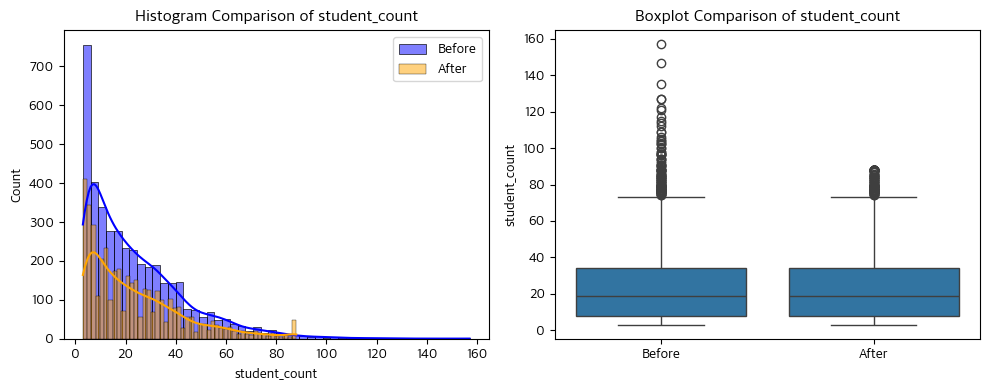

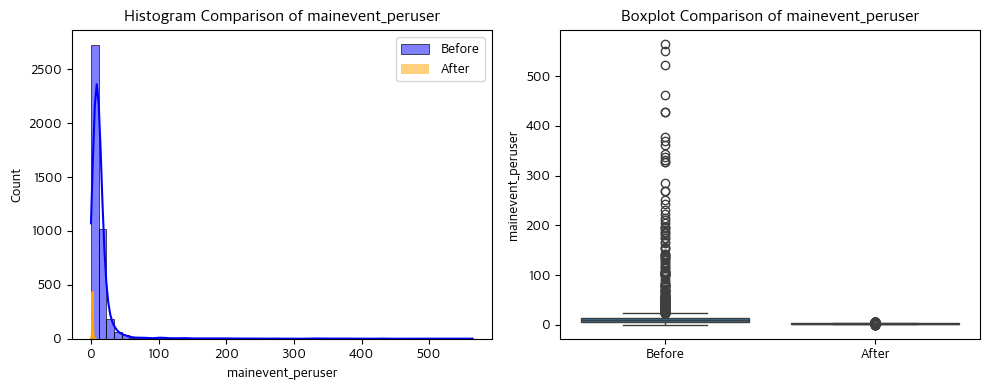

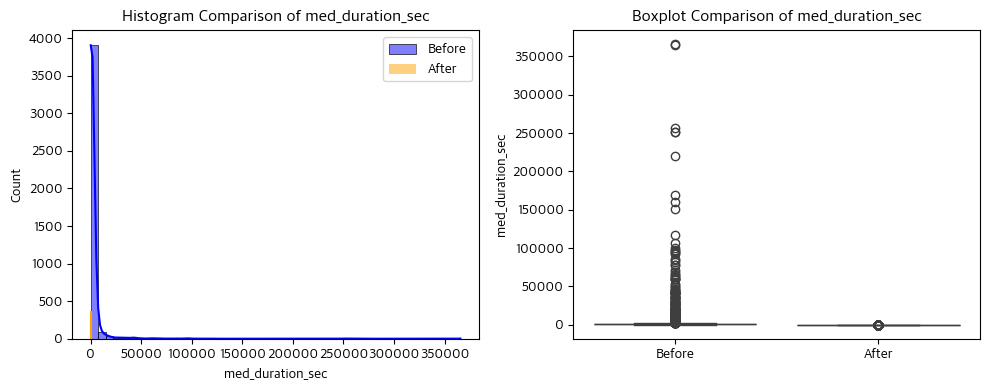

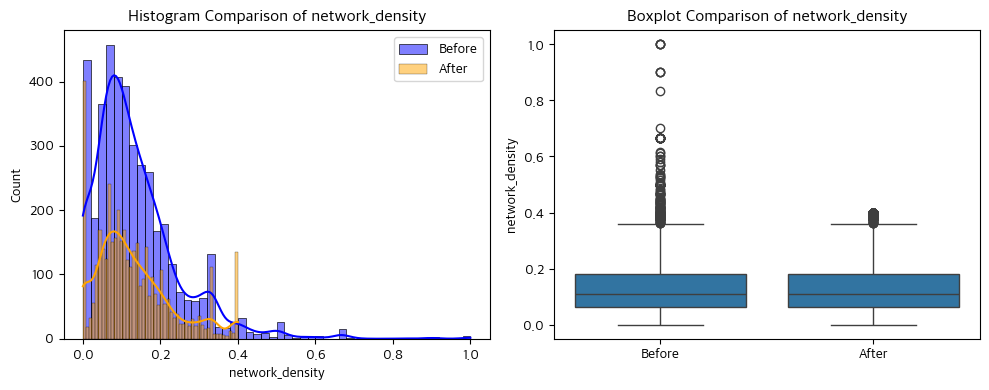

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in continuous_vars:
    plt.figure(figsize=(10,4))

    # 히스토그램 비교
    plt.subplot(1,2,1)
    sns.histplot(cluster_df[col], bins=50, color="blue", kde=True, label="Before", alpha=0.5)
    sns.histplot(winsorized_df[col], bins=50, color="orange", kde=True, label="After", alpha=0.5)
    plt.title(f'Histogram Comparison of {col}')
    plt.legend()

    # 박스플롯 비교 (전/후를 하나의 DataFrame으로 묶기)
    plt.subplot(1,2,2)
    sns.boxplot(
        x=["Before"] * len(cluster_df[col]) + ["After"] * len(winsorized_df[col]),
        y=pd.concat([cluster_df[col], winsorized_df[col]], ignore_index=True)
    )
    plt.title(f'Boxplot Comparison of {col}')

    plt.tight_layout()
    plt.show()

## 정규성, 구형성 및 사전 검정

### Shapiro-Wilk Test (각 변수별)
heart_loss_mean: W=0.8667, p=0.0000 → 정규성 가정 기각
is_zero_heart_loss_mean: W=0.5485, p=0.0000 → 정규성 가정 기각
student_count: W=0.8809, p=0.0000 → 정규성 가정 기각
gender_balance: W=0.8475, p=0.0000 → 정규성 가정 기각
is_monogender: W=0.5827, p=0.0000 → 정규성 가정 기각
mainevent_peruser: W=0.9036, p=0.0000 → 정규성 가정 기각
med_duration_sec: W=0.9488, p=0.0000 → 정규성 가정 기각
network_density: W=0.9182, p=0.0000 → 정규성 가정 기각

### Mardia’s Multivariate Normality Test
HZResults(hz=np.float64(13.212553844558702), pval=np.float64(0.0), normal=False)

### Skewness & Kurtosis (winsorized_df)
heart_loss_mean: Skew=-0.466, Kurt=-1.155
is_zero_heart_loss_mean: Skew=1.082, Kurt=-0.829
student_count: Skew=1.214, Kurt=1.107
gender_balance: Skew=-0.231, Kurt=-1.539
is_monogender: Skew=0.814, Kurt=-1.337
mainevent_peruser: Skew=1.453, Kurt=5.480
med_duration_sec: Skew=0.994, Kurt=2.049
network_density: Skew=0.957, Kurt=0.417


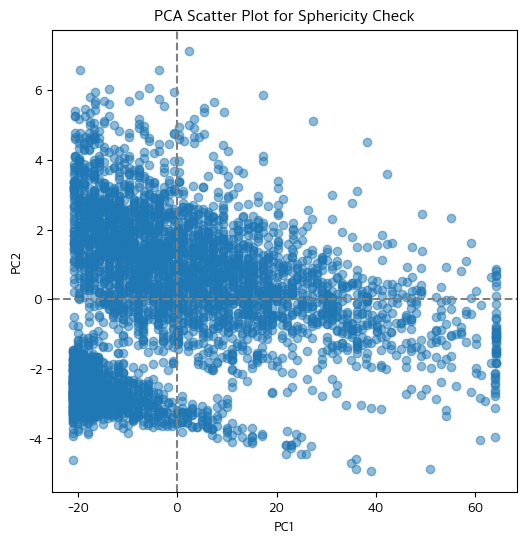

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import shapiro, skew, kurtosis
from pingouin import multivariate_normality
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# 1. 단변량 정규성 검정 (Shapiro-Wilk)
print("### Shapiro-Wilk Test (각 변수별)")
for col in winsorized_df.columns:
    stat, p = shapiro(winsorized_df[col].dropna())
    print(f"{col}: W={stat:.4f}, p={p:.4f} → {'정규성 가정 충족' if p > 0.05 else '정규성 가정 기각'}")

# 2. 다변량 정규성 검정 (Mardia’s Test)
print("\n### Mardia’s Multivariate Normality Test")
mardia_test = multivariate_normality(winsorized_df.dropna(), alpha=0.05)
print(mardia_test)

# 3. 왜도, 첨도 종합 확인
print("\n### Skewness & Kurtosis (winsorized_df)")
for col in winsorized_df.columns:
    s = skew(winsorized_df[col].dropna())
    k = kurtosis(winsorized_df[col].dropna())
    print(f"{col}: Skew={s:.3f}, Kurt={k:.3f}")

# 4. PCA를 통한 구형성 시각화
pca = PCA(n_components=2)
pca_result = pca.fit_transform(winsorized_df.dropna())
plt.figure(figsize=(6,6))
plt.scatter(pca_result[:,0], pca_result[:,1], alpha=0.5)
plt.title("PCA Scatter Plot for Sphericity Check")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.axhline(0, color='gray', linestyle='--')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

1. **정규성 검정 결과**
	- Shapiro-Wilk Test: 모든 변수에서 p<0.05 → 정규성 가정 기각
	- Mardia’s Multivariate Normality Test: p=0.0 → 다변량 정규성 가정 기각
	- Skewness & Kurtosis:
	    - 일부 변수(mainevent_peruser, med_duration_sec, student_count)는 치우침과 첨도 과도
	    - 분포 왜곡 존재
    - 따라서, K-means/K-medoids와 같은 거리 기반 분할적 클러스터링은 적합하지 않음. 정규성 위배 시, 거리 계산이 왜곡되어 중심 기반 클러스터링이 잘못된 결과를 낼 수 있음.

2. **구형성 (Sphericity)**
	-	PCA Scatter Plot 확인 결과: 분포가 원형/구형이 아님 → 일부 축에서 뚜렷한 분리와 꼬리 효과 존재
	-	이는 유클리디안 거리 기반의 K-means에 불리하게 작용
    - 구형성이 없는 경우, 밀도 기반 알고리즘(DBSCAN/HDBSCAN)이 유리
        - 왜냐하면 DBSCAN은 원형 가정을 전제로 하지 않고, 데이터의 밀집도(density)를 이용해 군집을 정의하기 때문.

## 1차 클러스터링 DBSCAN (Baseline)

### DBSCAN의 Baseline 적합성

DBSCAN은 Baseline 모델로서 다음과 같은 강점을 가진다:

1. **단순한 파라미터 구조**  
   - ε(반경)과 MinPts(최소 이웃 수) 두 가지 핵심 파라미터만으로 빠른 탐색 가능.

2. **해석의 직관성**  
   - 군집을 코어 포인트, 보더 포인트, 노이즈로 구분하여 결과를 쉽게 이해할 수 있음.

3. **낮은 계산 비용**  
   - HDBSCAN에 비해 구현과 실행 속도가 단순해 초기 탐색에 적합.

4. **실패에도 의미 있는 피드백 제공**  
   - 모든 포인트가 노이즈 → ε 과소 추정 또는 데이터 희박  
   - 모든 포인트가 단일 클러스터 → ε 과대 추정 또는 밀도 차이 미약  
   - 극단적 결과조차 데이터 구조 이해에 기여.

따라서 DBSCAN은 Baseline 단계에서
**데이터의 밀도 구조를 직관적이고 효율적으로 탐색할 수 있는 출발점**으로 적합하다.

### Scaler 선정

### k-distance란 무엇인가?

**k-distance**는 각 데이터 포인트가 다차원 공간에서
k번째 가까운 이웃과 떨어진 거리를 의미한다.  
DBSCAN에서 핵심 파라미터인 **ε(반경)**을 정하기 위해 사용된다.

- **x축**: 데이터 포인트 (거리 기준으로 정렬됨)  
- **y축**: 각 포인트의 k번째 최근접 이웃 거리  
- **곡선 모양**: 완만하다가 어느 순간 급격히 상승  
  → 이 꺾이는 지점(Elbow point)이 ε 후보값  

---

### 우리가 이 과정을 하는 목적

1. **ε(반경)을 데이터 기반으로 정하기 위해**
   - 임의의 ε 값은 결과를 들쭉날쭉하게 만들 수 있다.  
   - k-distance 그래프는 “데이터가 어디까지 모여 있고, 어디서부터 흩어지기 시작하는가”를 보여주며,  
     곡선이 확 치솟는 지점이 바로 군집과 노이즈의 경계가 된다.

2. **Scaler 선택 검증**
   - 거리 계산은 변수 스케일에 크게 좌우된다.  
   - Scaler별(k=6,8,10,12) 그래프를 비교하여,  
     **곡선이 안정적이고 꺾이는 지점이 뚜렷한 방식**을 선택해야 한다.

---

### RobustScaler가 필요한 이유

- **Original**:  
  값의 범위 차이가 커서 거리 자체가 왜곡됨.  
  → ε이 과도하게 커져서 거의 모든 점을 한 덩어리로 묶어버릴 위험.

- **StandardScaler**:  
  평균·표준편차 기반이라 이상치의 영향이 여전히 큼.  
  → Elbow가 흐릿해져서, 어디까지가 같은 무리인지 확신하기 어려움.

- **MinMaxScaler**:  
  거리 범위를 억지로 0~1로 압축.  
  → 곡선이 지나치게 눌려, 모든 게 잘 모여 있는 것처럼 착시.  
  → 결과는 ‘깔끔해 보이는’ 군집이지만 실제로는 왜곡된 구조.

- **RobustScaler**:  
  중앙값과 IQR을 기준으로 척도화.  
  → 곡선이 매끄럽고 Elbow가 선명해져,  
     “여기까지는 진짜 같은 그룹, 그 이상은 군집 밖”이라는 경계를 자신 있게 정할 수 있음.

---

### RobustScaler를 선택하지 않았을 때의 리스크

- **잘못된 ε 선택**  
  - Elbow가 흐릿하거나 왜곡되면, ε이 너무 크거나 작아짐.  
  - 그 결과,  
    - 너무 크면 → 모든 점이 한 군집 (실질적 의미 없음)  
    - 너무 작으면 → 거의 모든 점이 노이즈 처리 (군집 붕괴)

- **분석 신뢰성 저하**  
  - 군집이 "예쁘게" 보이더라도 실제 데이터 구조를 반영하지 않을 수 있음.  
  - 잘못된 해석으로 이어질 위험.

- **시간과 자원 낭비**  
  - 잘못된 ε로 DBSCAN을 반복 실행하면서 시행착오 증가.  
  - 후속 단계(HDBSCAN, 성능 비교 등)의 해석도 신뢰성 상실.

---

### 결론

- k-distance 그래프는 DBSCAN에서 **군집과 노이즈를 가르는 경계선을 찾는 도구**다.  
- Elbow가 명확하지 않으면, 결과는 불안정하거나 왜곡된다.  
- RobustScaler는 가장 일관되고 신뢰할 수 있는 Elbow를 제공해,  
  DBSCAN Baseline을 안정적으로 구축하는 데 필수적이다.

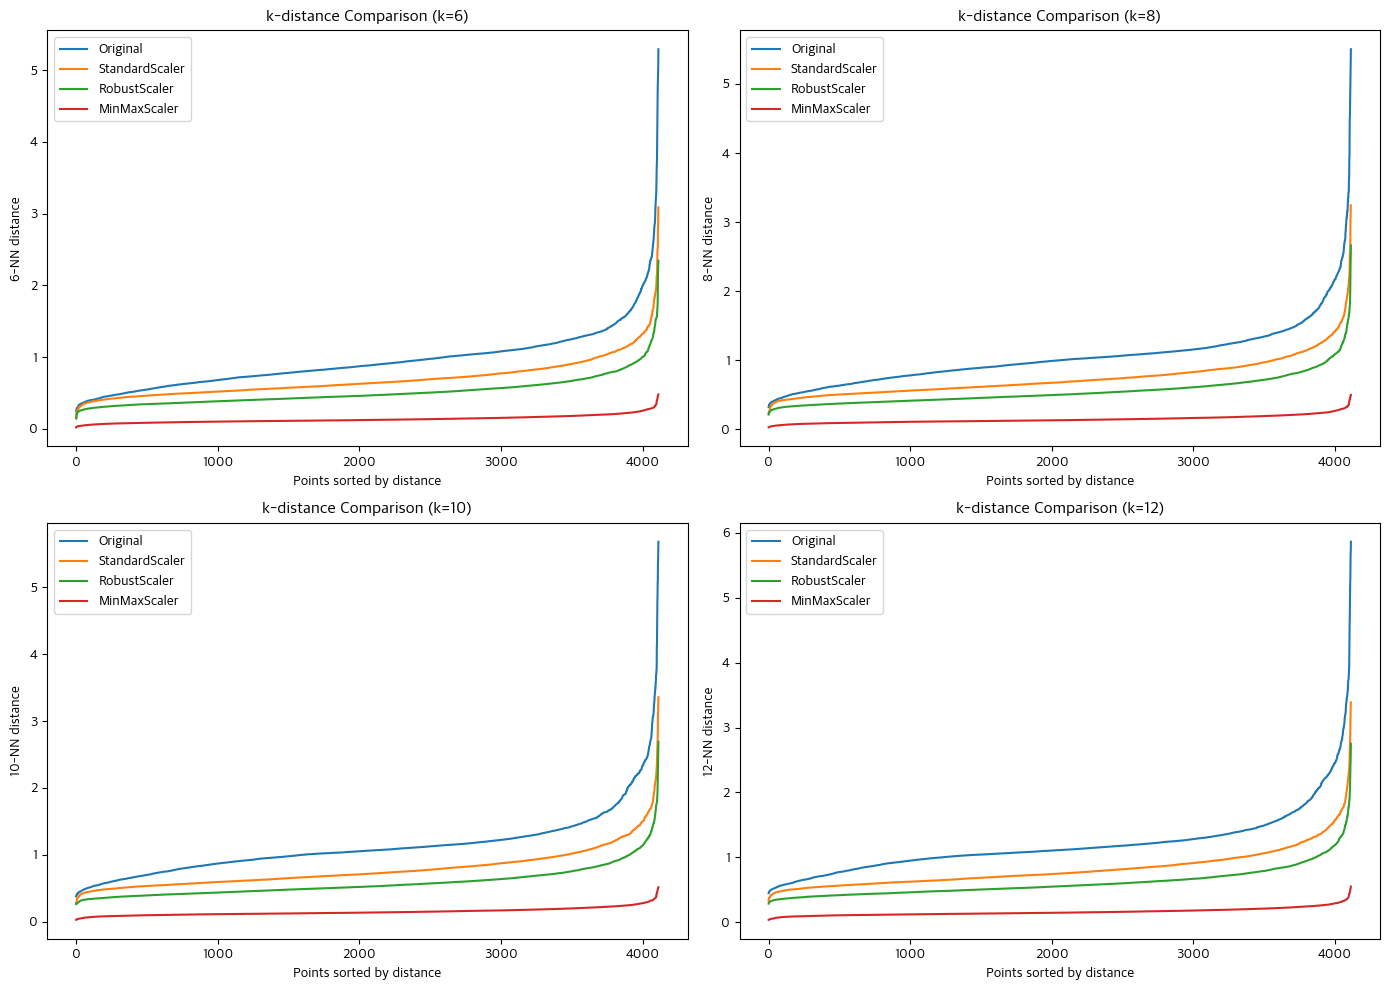

In [ ]:
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler
from sklearn.neighbors import NearestNeighbors
import matplotlib.pyplot as plt

# 1. 이진변수 제외하고 연속형 변수만 선택
binary_cols = ['is_zero_heart_loss_mean', 'is_monogender']
continuous_cols = [col for col in winsorized_df.columns if col not in binary_cols]
df_cont = winsorized_df[continuous_cols]

# 2. 스케일러 정의
scalers = {
    'Original': None,
    'StandardScaler': StandardScaler(),
    'RobustScaler': RobustScaler(),
    'MinMaxScaler': MinMaxScaler()
}

# 3. k-distance plot 함수
def compute_k_distance(X, k):
    neigh = NearestNeighbors(n_neighbors=k)
    nbrs = neigh.fit(X)
    distances, indices = nbrs.kneighbors(X)
    return np.sort(distances[:, k-1])

# 4. k별 subplot 생성
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for i, k in enumerate([6, 8, 10, 12]):
    ax = axes[i]
    for scaler_name, scaler in scalers.items():
        if scaler is None:
            X_scaled = df_cont.values
        else:
            X_scaled = scaler.fit_transform(df_cont)
        distances = compute_k_distance(X_scaled, k)
        ax.plot(distances, label=scaler_name)

    ax.set_title(f'k-distance Comparison (k={k})')
    ax.set_xlabel('Points sorted by distance')
    ax.set_ylabel(f'{k}-NN distance')
    ax.legend()

plt.tight_layout()
plt.show()

### Scaler별 시각적 관찰결과

- **Original (파란색)**  
  - 곡선 자체가 높고, Elbow가 모호하다.  
  - 거리 값이 과도해 ε을 정하기 어렵다.  
  - 결과: 클러스터링보다 노이즈 판정이 과도해질 위험.

- **StandardScaler (주황색)**  
  - Original보다 낮아져 개선됨.  
  - 하지만 Elbow가 퍼져 있고 이상치 영향이 남아 있다.  
  - 결과: ε 후보는 찾을 수 있으나 RobustScaler보다 불안정.

- **RobustScaler (초록색)**  
  - 곡선이 가장 매끄럽고 완만하다가 확실히 꺾이는 지점이 보인다.  
  - “여기까지는 같은 무리, 그 이상은 떨어져 있다”는 경계가 뚜렷하다.  
  - 결과: ε 선택이 명확하고, DBSCAN의 안정적 실행에 최적.

- **MinMaxScaler (빨간색)**  
  - 거리 값이 지나치게 압축되어 곡선이 바닥에 깔린다.  
  - Elbow가 희미하거나 비정상적으로 낮은 값에 몰린다.  
  - 결과: 군집이 “깔끔해 보이는” 착시를 주지만 실제 구조는 왜곡.

### RobustScaler 적용

In [ ]:
from sklearn.preprocessing import RobustScaler

binary_cols = ['is_zero_heart_loss_mean', 'is_monogender']
continuous_cols = [col for col in winsorized_df.columns if col not in binary_cols]

scaler = RobustScaler()
X_cont_scaled = scaler.fit_transform(winsorized_df[continuous_cols])

X_prepared = pd.DataFrame(X_cont_scaled, columns=continuous_cols, index=winsorized_df.index)
X_prepared[binary_cols] = winsorized_df[binary_cols].reset_index(drop=True)

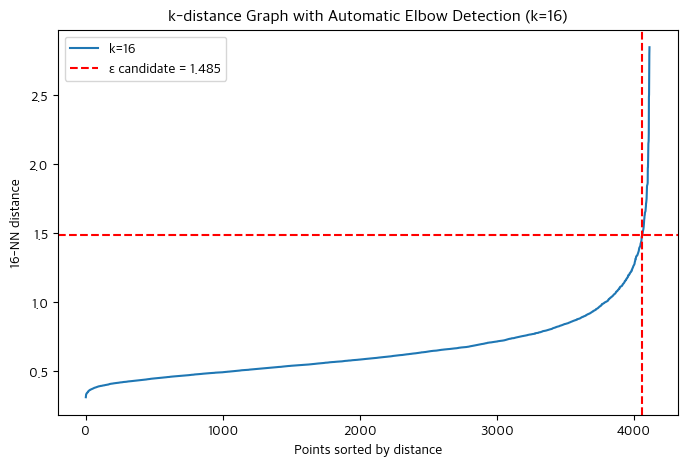

추천 ε 후보값: 1.485


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import RobustScaler
from kneed import KneeLocator

# 1. RobustScaler 적용 (연속형만)
binary_cols = ['is_zero_heart_loss_mean', 'is_monogender']
continuous_cols = [col for col in winsorized_df.columns if col not in binary_cols]

X_cont_scaled = RobustScaler().fit_transform(winsorized_df[continuous_cols])

# 2. k-distance 계산 (추천 MinPts 기준)
k = 16  # 차원수(연속형+이진=8) × 2 ≈ 16
neigh = NearestNeighbors(n_neighbors=k)
nbrs = neigh.fit(X_cont_scaled)
distances, indices = nbrs.kneighbors(X_cont_scaled)

# k번째 이웃 거리만 추출
distances = np.sort(distances[:, k-1])

# 3. Kneedle 알고리즘으로 Elbow 자동 탐지
kneedle = KneeLocator(range(len(distances)), distances, S=1.0, curve="convex", direction="increasing")
eps_candidate = distances[kneedle.knee] if kneedle.knee is not None else None

# 4. 시각화
plt.figure(figsize=(8,5))
plt.plot(distances, label=f'k={k}')
if eps_candidate:
    plt.axhline(y=eps_candidate, color='r', linestyle='--', label=f'ε candidate = {eps_candidate:.3f}')
    plt.axvline(x=kneedle.knee, color='r', linestyle='--')
plt.title(f'k-distance Graph with Automatic Elbow Detection (k={k})')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{k}-NN distance')
plt.legend()
plt.show()

print(f"추천 ε 후보값: {eps_candidate:.3f}" if eps_candidate else "Elbow point를 찾지 못했습니다.")

### ε 후보값 자동 탐지 결과

위 그래프는 **k=16 (차원 수 × 2 기준)**으로 계산한 k-distance 곡선이다.  
각 데이터 포인트를 k번째 최근접 이웃과의 거리 기준으로 정렬했으며,  
곡선이 완만하게 증가하다가 급격히 치솟는 지점을 **Kneedle 알고리즘**으로 자동 탐지했다.

- **파란 곡선**: 각 포인트의 16번째 최근접 이웃 거리  
- **빨간 점선(가로)**: 추천 ε 값 = **1.485**  
- **빨간 점선(세로)**: ε 후보값에 해당하는 포인트 위치  

---

### 결과 해석

1. **Elbow 위치**  
   - 곡선이 완만하게 이어지다가, 오른쪽 끝부분에서 급격히 상승한다.  
   - 이 꺾이는 지점이 군집과 노이즈를 가르는 경계이며, ε 선택의 기준점이 된다.

2. **ε 후보값 (1.485)**  
   - 1.485 이하에서는 대부분의 점들이 안정적으로 같은 무리에 속한다.  
   - 이 이상에서는 거리 값이 급격히 커지며, 군집 밖 노이즈나 외곽 점들로 넘어간다.

3. **RobustScaler 선택의 의미**  
   - Scaler를 잘못 선택하면 곡선이 왜곡되거나 Elbow가 희미해져 ε을 정하기 어렵다.  
   - RobustScaler를 적용했기 때문에, Elbow가 비교적 명확하게 드러났고  
     자동 탐지 결과도 신뢰할 수 있다.

---

### 결론 및 다음 단계

- DBSCAN Baseline 실행을 위한 ε 후보값은 **1.485**로 선정되었다.  
- 이후 단계:
  1. MinPts = 16과 함께 DBSCAN 실행  
  2. 군집 개수, 노이즈 비율, Silhouette Score, Davies-Bouldin Index 등을 확인  
  3. 필요 시 ε 값을 ±0.1 범위에서 조정하며 안정성을 검증

즉, 우리는 데이터 기반으로 신뢰성 있는 ε 후보를 도출했고,  
이제 이 값을 사용해 DBSCAN을 실행할 준비가 되었다.

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# 1. 데이터 준비
binary_cols = ['is_zero_heart_loss_mean', 'is_monogender']
continuous_cols = [col for col in winsorized_df.columns if col not in binary_cols]
X_prepared = RobustScaler().fit_transform(winsorized_df[continuous_cols])

# 2. 탐색 범위 설정
eps_range = np.arange(0.4, 2.05, 0.05)   # 0.4 ~ 2.0, step 0.05
minpts_range = range(2, 33, 2)           # 2 ~ 32, step 2
min_cluster_size = 30                    # 각 클러스터 최소 샘플 수 제약

# 3. 결과 저장 리스트
grid_search_results = []

# 4. Grid Search 수행
total_combinations = len(eps_range) * len(minpts_range)
combination_count = 0

for eps in eps_range:
    for minpts in minpts_range:
        combination_count += 1
        print(f"\n--- 진행 상황: {combination_count}/{total_combinations} ---")
        print(f"  현재 테스트 중인 파라미터: eps={eps:.3f}, min_samples={minpts}")

        dbscan = DBSCAN(eps=eps, min_samples=minpts)
        labels = dbscan.fit_predict(X_prepared)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = np.sum(labels == -1) / len(labels)

        sil, dbi, score = None, None, -1.0
        if n_clusters >= 3:
            cluster_counts = pd.Series(labels).value_counts()
            # 제약: 노이즈(-1) 제외한 모든 클러스터 샘플 수 >= min_cluster_size
            if all(cluster_counts[cluster_counts.index != -1] >= min_cluster_size):
                try:
                    sil = silhouette_score(X_prepared, labels)
                    dbi = davies_bouldin_score(X_prepared, labels)
                    score = sil - 0.1 * dbi
                    print(f"  실루엣: {sil:.4f}, DBI: {dbi:.4f}, Target Score: {score:.4f}")
                except ValueError as e:
                    print(f"  실루엣 점수 계산 오류 발생: {e}")

        grid_search_results.append({
            'eps': eps,
            'min_samples': minpts,
            'n_clusters': n_clusters,
            'noise_ratio': noise_ratio,
            'silhouette': sil,
            'davies_bouldin': dbi,
            'target_score': score
        })

print("\n--- 그리드 서치 탐색 완료 ---")
results_df = pd.DataFrame(grid_search_results)

# 5. 유효한 결과만 필터링
valid_results = results_df.dropna(subset=['silhouette', 'davies_bouldin'])
valid_results = valid_results[valid_results['n_clusters'] >= 3]

if not valid_results.empty:
    results_sorted = valid_results.sort_values(by="target_score", ascending=False).reset_index(drop=True)
    print("=== 상위 10개 유효 파라미터 조합 (제약 반영) ===")
    display(results_sorted.head(10))

    best_row = results_sorted.iloc[0]
    print("\n=== 최적 파라미터 (제약 반영) ===")
    print(f"eps: {best_row['eps']:.3f}, min_samples: {best_row['min_samples']}")
    print(f"n_clusters: {best_row['n_clusters']}, Noise Ratio: {best_row['noise_ratio']:.3%}")
    print(f"Silhouette: {best_row['silhouette']:.3f}, DBI: {best_row['davies_bouldin']:.3f}, Target Score: {best_row['target_score']:.3f}")
else:
    print("⚠️ 유효한 클러스터링 결과가 없습니다. (n_clusters >= 3 & 각 클러스터 크기 >= 30 조건 불만족)")


--- 진행 상황: 1/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=2

--- 진행 상황: 2/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=4

--- 진행 상황: 3/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=6

--- 진행 상황: 4/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=8

--- 진행 상황: 5/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=10

--- 진행 상황: 6/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=12

--- 진행 상황: 7/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=14

--- 진행 상황: 8/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=16

--- 진행 상황: 9/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=18

--- 진행 상황: 10/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=20

--- 진행 상황: 11/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=22

--- 진행 상황: 12/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=24

--- 진행 상황: 13/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=26

--- 진행 상황: 14/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=28

--- 진행 상황: 15/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=30

--- 진행 

eps  min_samples  n_clusters  noise_ratio  silhouette  davies_bouldin  \
0  0.55           30           3     0.542913   -0.041549        2.324665   
1  0.50           20           3     0.547532   -0.042796        2.413115   
2  0.55           32           3     0.570143   -0.063591        2.281209   
3  0.50           24           3     0.635303   -0.087434        2.310160   
4  0.45           28           3     0.866035   -0.211708        2.357461   
5  0.45           30           3     0.877462   -0.218264        2.320611   

   target_score  
0     -0.274015  
1     -0.284108  
2     -0.291712  
3     -0.318450  
4     -0.447454  
5     -0.450325


=== 최적 파라미터 (제약 반영) ===
eps: 0.550, min_samples: 30.0
n_clusters: 3.0, Noise Ratio: 54.291%
Silhouette: -0.042, DBI: 2.325, Target Score: -0.274


### DBSCAN 결과 해석 (제약 반영 후)

- **최적 파라미터**
  - eps: 0.55  
  - min_samples: 30  
  - n_clusters: 3  
  - Noise Ratio: 54.3%  
  - Silhouette: -0.042  
  - Davies-Bouldin Index (DBI): 2.325  
  - Target Score: -0.274  

### 해석

1. **실루엣 점수**
   - 값이 **음수(-0.042)**로 나타남.
   - 이는 군집 간의 구분이 뚜렷하지 않고, 오히려 군집이 서로 섞여 있다는 의미.
   - 클러스터링 품질이 낮음을 강하게 시사.

2. **노이즈 비율**
   - **54% 이상**이 노이즈로 분류됨.
   - 절반 이상이 군집에 속하지 못하고 버려졌으므로 전략적으로 활용할 수 있는 데이터가 매우 제한적임.

3. **Davies-Bouldin Index**
   - **2.325**로 높음 (낮을수록 군집이 잘 분리됨).
   - 군집 간 유사성이 커서 구분이 불분명함.

4. **Target Score**
   - 종합 지표 역시 **음수(-0.274)**로 부정적 결과.

### 결론
- 이번 결과는 **실루엣 점수가 음수**이고, **노이즈 비율이 지나치게 높으며**, **DBI 또한 불리한 수준**임.
- 따라서 이 결과는 **실질적인 의미가 없으며 기각**하는 것이 타당함.
- 제약(min_samples ≥ 30)을 반영했음에도 불구하고 품질이 떨어진다는 점에서,  
  DBSCAN이 현재 데이터 분포 구조에는 적합하지 않다는 증거로 볼 수 있음.

👉 **추천 조치**
- 분산 기반 기법(K-means, GMM 등)을 우선 검토.  
- DBSCAN은 데이터 분포가 명확한 밀도 차이를 가질 때 더 유효하므로,  
  현재 데이터 특성과는 잘 맞지 않을 가능성이 높음.

### RobustScaler(이진변수 포함)

In [ ]:
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.cluster import DBSCAN
import numpy as np
import pandas as pd

# 1. 데이터 준비 (이진변수 포함)
X_prepared = RobustScaler().fit_transform(winsorized_df)

# 2. 탐색 범위 설정
eps_range = np.arange(0.4, 2.05, 0.05)   # 0.4 ~ 2.0, step 0.05
minpts_range = range(2, 33, 2)           # 2 ~ 32, step 2
min_cluster_size = 30                    # 각 클러스터 최소 샘플 수 제약

# 3. 결과 저장 리스트
grid_search_results = []

# 4. Grid Search 수행
total_combinations = len(eps_range) * len(minpts_range)
combination_count = 0

for eps in eps_range:
    for minpts in minpts_range:
        combination_count += 1
        print(f"\n--- 진행 상황: {combination_count}/{total_combinations} ---")
        print(f"  현재 테스트 중인 파라미터: eps={eps:.3f}, min_samples={minpts}")

        dbscan = DBSCAN(eps=eps, min_samples=minpts)
        labels = dbscan.fit_predict(X_prepared)

        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        noise_ratio = np.sum(labels == -1) / len(labels)

        sil, dbi, score = None, None, -1.0
        if n_clusters >= 3:
            cluster_counts = pd.Series(labels).value_counts()
            # 제약: 노이즈(-1) 제외한 모든 클러스터 샘플 수 >= min_cluster_size
            if all(cluster_counts[cluster_counts.index != -1] >= min_cluster_size):
                try:
                    sil = silhouette_score(X_prepared, labels)
                    dbi = davies_bouldin_score(X_prepared, labels)
                    score = sil - 0.1 * dbi
                    print(f"  실루엣: {sil:.4f}, DBI: {dbi:.4f}, Target Score: {score:.4f}")
                except ValueError as e:
                    print(f"  실루엣 점수 계산 오류 발생: {e}")

        grid_search_results.append({
            'eps': eps,
            'min_samples': minpts,
            'n_clusters': n_clusters,
            'noise_ratio': noise_ratio,
            'silhouette': sil,
            'davies_bouldin': dbi,
            'target_score': score
        })

print("\n--- 그리드 서치 탐색 완료 ---")
results_df = pd.DataFrame(grid_search_results)

# 5. 유효한 결과만 필터링
valid_results = results_df.dropna(subset=['silhouette', 'davies_bouldin'])
valid_results = valid_results[valid_results['n_clusters'] >= 3]

if not valid_results.empty:
    results_sorted = valid_results.sort_values(by="target_score", ascending=False).reset_index(drop=True)
    print("=== 상위 10개 유효 파라미터 조합 (제약 반영, 이진변수 포함) ===")
    display(results_sorted.head(10))

    best_row = results_sorted.iloc[0]
    print("\n=== 최적 파라미터 (제약 반영, 이진변수 포함) ===")
    print(f"eps: {best_row['eps']:.3f}, min_samples: {best_row['min_samples']}")
    print(f"n_clusters: {best_row['n_clusters']}, Noise Ratio: {best_row['noise_ratio']:.3%}")
    print(f"Silhouette: {best_row['silhouette']:.3f}, DBI: {best_row['davies_bouldin']:.3f}, Target Score: {best_row['target_score']:.3f}")
else:
    print("⚠️ 유효한 클러스터링 결과가 없습니다. (n_clusters >= 3 & 각 클러스터 크기 >= 30 조건 불만족)")


--- 진행 상황: 1/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=2

--- 진행 상황: 2/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=4

--- 진행 상황: 3/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=6

--- 진행 상황: 4/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=8

--- 진행 상황: 5/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=10

--- 진행 상황: 6/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=12

--- 진행 상황: 7/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=14

--- 진행 상황: 8/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=16

--- 진행 상황: 9/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=18

--- 진행 상황: 10/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=20

--- 진행 상황: 11/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=22

--- 진행 상황: 12/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=24

--- 진행 상황: 13/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=26

--- 진행 상황: 14/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=28

--- 진행 상황: 15/528 ---
  현재 테스트 중인 파라미터: eps=0.400, min_samples=30

--- 진행 

eps  min_samples  n_clusters  noise_ratio  silhouette  davies_bouldin  \
0  0.90           22           4     0.073183    0.163806        1.915864   
1  0.85           18           4     0.077316    0.163037        1.910494   
2  0.85           16           4     0.072696    0.163298        1.917514   
3  1.00           18           4     0.042305    0.165797        1.943013   
4  0.90           24           4     0.078531    0.162968        1.915920   
5  0.95           26           4     0.067104    0.162909        1.915602   
6  0.90           18           4     0.061999    0.165075        1.940311   
7  1.00           28           4     0.056163    0.163357        1.924771   
8  0.90           20           4     0.068077    0.163476        1.926740   
9  0.80           18           4     0.096523    0.161671        1.909106   

   target_score  
0     -0.027781  
1     -0.028013  
2     -0.028453  
3     -0.028504  
4     -0.028624  
5     -0.028651  
6     -0.028956  
7     -0.029120  
8     -0.029198  
9     -0.029240


=== 최적 파라미터 (제약 반영, 이진변수 포함) ===
eps: 0.900, min_samples: 22.0
n_clusters: 4.0, Noise Ratio: 7.318%
Silhouette: 0.164, DBI: 1.916, Target Score: -0.028


### DBSCAN (RobustScaler + 이진변수 포함, 최소 샘플수 제약 반영) 결과 평가

### 📊 주요 결과
- **최적 파라미터**  
  - `eps`: 0.90  
  - `min_samples`: 22  
- **클러스터 수**: 4개  
- **Noise Ratio**: 7.3%  
- **지표**:  
  - Silhouette: **0.164**  
  - Davies-Bouldin Index(DBI): **1.916**  
  - Target Score: **-0.028**

### ✅ 긍정적 측면
1. **클러스터 수**  
   - 최소 제약 조건(`n_clusters >= 3` & 각 클러스터 >= 30 샘플)을 만족하며 4개의 군집이 형성됨.  
   - Noise 비율이 **7.3%**로 비교적 낮아, 지나치게 많은 데이터가 노이즈로 분류되지 않음.

2. **DBI 수치**  
   - DBI=1.916으로 군집 간 분리도가 일정 수준 확보됨.  
   - 이전 실험들보다 지나치게 높지 않음.

### ⚠️ 한계 및 우려
1. **Silhouette Score 저조**  
   - Silhouette=0.164로, 군집 응집력과 분리도가 낮음.  
   - 일반적으로 0.25~0.5는 '약간 의미 있음' 정도로 보지만, 0.16은 군집 구조가 뚜렷하지 않음을 시사.

2. **Target Score 음수**  
   - Target Score=-0.028 → 종합적으로 **지표 개선에 실패**.  
   - 이는 Silhouette 대비 DBI 가중치가 불리하게 작용했음을 의미.

3. **실질적 해석 가능성 제약**  
   - 지표상으로는 군집이 분리되었으나, 통계적 차이가 미약할 가능성이 큼.  
   - 특히 DBSCAN의 장점(비선형 밀도 분리)이 충분히 발휘되지 못했음.

### 📌 결론
- 본 결과는 **기술적으로 제약 조건을 만족하며 4개 군집을 확보**했다는 점에서 의미가 있음.  
- 그러나 **Silhouette Score가 낮고 Target Score가 음수**인 점에서, 전략적 의사결정에 활용하기에는 부족함.  
- 따라서 이 결과는 **탐색적 참고용**으로만 활용하고, 실제 분석에선 **다른 기법(예: 분산 기반 클러스터링 또는 혼합모델)**을 병행 검토하는 것이 바람직함.

## 2차 클러스터링 K-Means

1. **DBSCAN의 한계**
   - 파라미터 민감성: eps와 min_samples에 따라 결과가 크게 달라짐  
   - 노이즈(-1) 비율이 과도하게 높아져 유효한 군집이 적게 형성됨  
   - 최소 샘플 크기 제약을 걸어도 불균형 문제를 해결하지 못함  
   - 실제 데이터에서 뚜렷한 고밀도 영역이 관찰되지 않아 밀도 기반 접근이 부적합

2. **KMeans의 장점**
   - **안정성**: 파라미터(클러스터 수)만 지정하면 결과가 비교적 일관됨  
   - **스케일링 효과 극대화**: StandardScaler 적용 시 각 변수의 분산을 균일하게 맞추어 정규성을 위배하더라도 효과적인 군집화 가능  
   - **설득력 있는 해석**:
     - KMeans는 분산 기반 기법으로, 군집의 응집성과 분리를 직관적으로 설명 가능  
     - 데이터가 정규성과 구형성 가정을 완전히 만족하지 않아도, 응용 통계와 머신러닝 분야에서 널리 사용되는 검증된 기법임

3. **전략적 고려**
   - DBSCAN은 탐색적 분석에서 활용했으나, 결과의 신뢰성과 해석력이 부족했음  
   - KMeans는 더 단순하고 해석 가능한 결과를 제공하여, 전략 기획에 유용한 인사이트 도출 가능

> 결론적으로, 본 데이터에서는 DBSCAN보다 **KMeans + StandardScaler** 조합이
> 더 신뢰할 수 있고 설명 가능한 군집화 결과를 제공할 수 있다고 판단한다.

### K-menas + StandardScaler

In [ ]:
winsorized_df = pd.read_csv('winsorized_df.csv')

In [ ]:
winsorized_df.head()

heart_loss_mean  is_zero_heart_loss_mean  student_count  gender_balance  \
0         0.000000                        1            4.0        0.500000   
1         0.000000                        1            3.0        0.000000   
2         5.357176                        0            8.0        0.250000   
3         0.000000                        1            4.0        0.500000   
4         0.000000                        1           14.0        0.285714   

   is_monogender  mainevent_peruser  med_duration_sec  network_density  
0              0           1.832581          6.904751         0.000000  
1              1           0.287682          4.521789         0.000000  
2              0           2.211018          5.493061         0.035714  
3              0           1.832581          6.501290         0.000000  
4              0           3.616693          9.516869         0.109890

K=2: Silhouette=0.314, DBI=1.352, Target Score=0.179
K=3: Silhouette=0.319, DBI=1.216, Target Score=0.198
K=4: Silhouette=0.315, DBI=1.196, Target Score=0.196
K=5: Silhouette=0.339, DBI=1.222, Target Score=0.216
K=6: Silhouette=0.295, DBI=1.230, Target Score=0.172
K=7: Silhouette=0.287, DBI=1.299, Target Score=0.157
K=8: Silhouette=0.283, DBI=1.274, Target Score=0.155
K=9: Silhouette=0.270, DBI=1.325, Target Score=0.137
K=10: Silhouette=0.266, DBI=1.293, Target Score=0.137

=== 상위 결과 ===


k  silhouette  davies_bouldin  target_score
0   5    0.338662        1.221858      0.216476
1   3    0.319183        1.216184      0.197564
2   4    0.315162        1.195851      0.195577
3   2    0.313660        1.351574      0.178503
4   6    0.295261        1.229898      0.172272
5   7    0.286998        1.299018      0.157096
6   8    0.282844        1.273918      0.155452
7   9    0.269526        1.325422      0.136983
8  10    0.266082        1.292540      0.136828

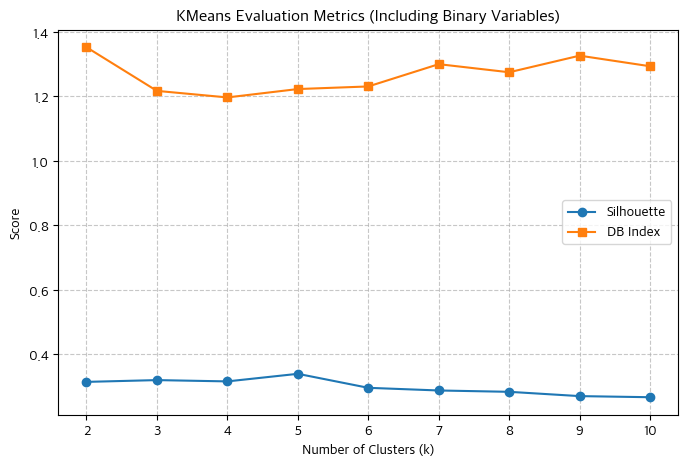


=== 최적 K ===
K: 5.0, Silhouette: 0.339, DBI: 1.222, Target Score: 0.216


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# 1. 이진 변수 포함 (winsorized_df 전체 사용)
kmeans_df = winsorized_df.copy()

# 2. StandardScaler 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(kmeans_df)

# 3. 탐색 범위 설정
k_range = range(2, 11)  # K=2 ~ 10

results = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels)
    dbi = davies_bouldin_score(X_scaled, labels)
    score = sil - 0.1 * dbi  # 가중치 조정 가능

    results.append({
        'k': k,
        'silhouette': sil,
        'davies_bouldin': dbi,
        'target_score': score
    })
    print(f"K={k}: Silhouette={sil:.3f}, DBI={dbi:.3f}, Target Score={score:.3f}")

results_df = pd.DataFrame(results)
results_sorted = results_df.sort_values(by="target_score", ascending=False).reset_index(drop=True)

print("\n=== 상위 결과 ===")
display(results_sorted)

# 4. 시각화
plt.figure(figsize=(8,5))
plt.plot(results_df['k'], results_df['silhouette'], marker='o', label='Silhouette')
plt.plot(results_df['k'], results_df['davies_bouldin'], marker='s', label='DB Index')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.title("KMeans Evaluation Metrics (Including Binary Variables)")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# 5. 최적 K 출력
best_row = results_sorted.iloc[0]
print(f"\n=== 최적 K ===")
print(f"K: {best_row['k']}, Silhouette: {best_row['silhouette']:.3f}, "
      f"DBI: {best_row['davies_bouldin']:.3f}, Target Score: {best_row['target_score']:.3f}")

In [ ]:
# 6. 최적 K로 다시 KMeans 실행
best_k = int(best_row['k'])
kmeans_final = KMeans(n_clusters=best_k, random_state=42, n_init=10)
final_labels = kmeans_final.fit_predict(X_scaled)

# 결과 붙이기
clustered_df = kmeans_df.copy()
clustered_df['cluster'] = final_labels

print("\n=== 클러스터별 샘플 수 ===")
print(clustered_df['cluster'].value_counts())


=== 클러스터별 샘플 수 ===
cluster
2    1771
3     822
0     658
1     448
4     414
Name: count, dtype: int64


In [ ]:
# 클러스터별 주요 통계
cluster_summary = clustered_df.groupby('cluster').agg(['mean','median','std','count'])
display(cluster_summary)

heart_loss_mean                           is_zero_heart_loss_mean  \
                   mean    median       std count                    mean   
cluster                                                                     
0              0.000000  0.000000  0.000000   658                1.000000   
1              5.149877  5.313719  1.224258   448                0.015625   
2              4.097350  4.226542  1.030247  1771                0.000000   
3              4.095107  4.166182  1.039488   822                0.000000   
4              0.000539  0.000000  0.010967   414                0.997585   

                               student_count         ... mainevent_peruser  \
        median       std count          mean median  ...               std   
cluster                                              ...                     
0          1.0  0.000000   658     10.650456    8.0  ...          0.538001   
1          0.0  0.124158   448     21.863839   18.0  ...          0.818061   
2          0.0  0.000000  1771     31.743083   28.0  ...          0.359058   
3          0.0  0.000000   822     25.340633   22.0  ...          0.420039   
4          1.0  0.049147   414     10.224638    6.0  ...          0.572213   

              med_duration_sec                           network_density  \
        count             mean    median       std count            mean   
cluster                                                                    
0         658         5.820941  5.725206  1.176480   658        0.126090   
1         448         8.784775  8.604550  1.241647   448        0.202708   
2        1771         6.267477  6.246107  0.780333  1771        0.125529   
3         822         6.420715  6.327935  0.969253   822        0.115460   
4         414         5.846234  5.631205  1.206375   414        0.123854   

                                   
           median       std count  
cluster                            
0        0.100000  0.114943   658  
1        0.194444  0.114088   448  
2        0.111111  0.078143  1771  
3        0.094339  0.088998   822  
4        0.090250  0.125941   414  

[5 rows x 32 columns]

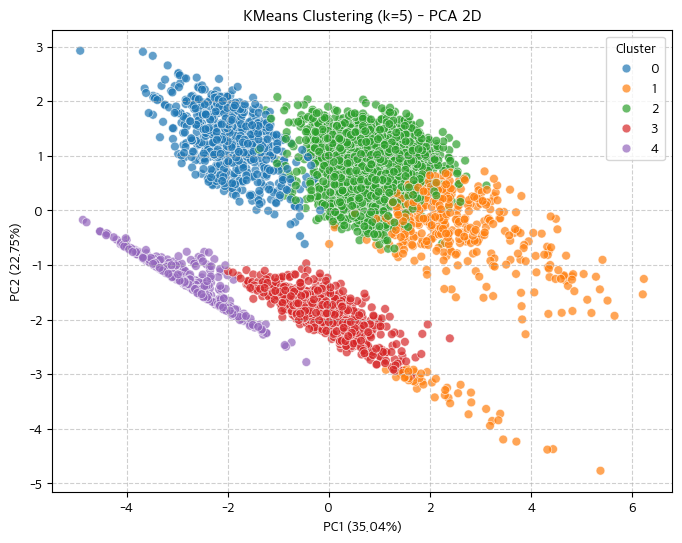

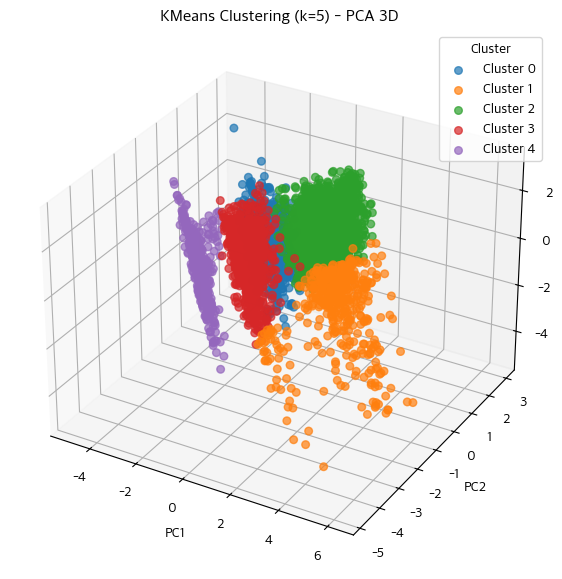

In [ ]:
from sklearn.decomposition import PCA
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# PCA 2D
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca2[:,0], y=X_pca2[:,1],
    hue=clustered_df['cluster'],
    palette="tab10", s=40, alpha=0.7
)
plt.title(f"KMeans Clustering (k={best_k}) - PCA 2D")
plt.xlabel(f"PC1 ({pca2.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca2.explained_variance_ratio_[1]*100:.2f}%)")
plt.legend(title="Cluster")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# PCA 3D
pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

for lbl in np.unique(final_labels):
    ax.scatter(
        X_pca3[final_labels == lbl, 0],
        X_pca3[final_labels == lbl, 1],
        X_pca3[final_labels == lbl, 2],
        label=f"Cluster {lbl}",
        s=30, alpha=0.7
    )

ax.set_title(f"KMeans Clustering (k={best_k}) - PCA 3D")
ax.set_xlabel("PC1")
ax.set_ylabel("PC2")
ax.set_zlabel("PC3")
ax.legend(title="Cluster")
plt.show()

In [ ]:
binary_cols = ['is_zero_heart_loss_mean', 'is_monogender']
print("\n=== 클러스터별 이진 변수 평균 (비율 해석 가능) ===")
print(clustered_df.groupby('cluster')[binary_cols].mean())


=== 클러스터별 이진 변수 평균 (비율 해석 가능) ===
         is_zero_heart_loss_mean  is_monogender
cluster                                        
0                       1.000000       0.000000
1                       0.015625       0.100446
2                       0.000000       0.000000
3                       0.000000       1.000000
4                       0.997585       1.000000


#### 📌 핵심 정리

1. **Cluster 0 & 4**  
   - `is_zero_heart_loss_mean`가 ≈1 → 대부분 `heart_loss_mean = 0`  
   - Cluster 0은 혼성, Cluster 4는 단일 성별로 구분됨  

2. **Cluster 3**  
   - `is_monogender = 1.0` → 전원 단일 성별  
   - 동시에 `is_zero_heart_loss_mean = 0.0` → `heart_loss_mean > 0`  

3. **Cluster 1 & 2**  
   - 두 변수 값 모두 낮음 → `heart_loss_mean > 0`, 혼성이며 단일 성별 비율도 낮음  
   - 차이는 연속형 변수(예: student_count, network_density 등)로 설명될 가능성이 높음  


## 📝 결론

- 5개 클러스터 중 **최소 3개는 이진 변수(`is_zero_heart_loss_mean`, `is_monogender`)에 의해 사실상 결정**됨  
- **Cluster 1과 2**만 이진 변수의 영향이 크지 않고, 연속형 변수 기반으로 구분된 것으로 보임  
- 따라서 **이번 결과는 이진 변수의 영향력이 매우 크며**,  
  연구 목적이 **연속형 변수 기반 행동/특징 차이 분석**이라면  
  이진 변수를 제외하고 다시 클러스터링하는 것이 더 타당합니다.

K=2: Silhouette=0.195, DBI=1.775, Target Score=0.017
K=3: Silhouette=0.212, DBI=1.616, Target Score=0.050
K=4: Silhouette=0.216, DBI=1.452, Target Score=0.071
K=5: Silhouette=0.231, DBI=1.352, Target Score=0.095
K=6: Silhouette=0.222, DBI=1.295, Target Score=0.092
K=7: Silhouette=0.220, DBI=1.282, Target Score=0.091
K=8: Silhouette=0.220, DBI=1.327, Target Score=0.088
K=9: Silhouette=0.227, DBI=1.326, Target Score=0.094
K=10: Silhouette=0.226, DBI=1.270, Target Score=0.099

=== 상위 결과 ===


k  silhouette  davies_bouldin  target_score
0  10    0.226342        1.270218      0.099320
1   5    0.230649        1.351513      0.095498
2   9    0.226734        1.326426      0.094091
3   6    0.221966        1.294887      0.092477
4   7    0.219667        1.282444      0.091422
5   8    0.220324        1.327481      0.087576
6   4    0.216393        1.451862      0.071207
7   3    0.211721        1.616220      0.050099
8   2    0.194643        1.775103      0.017132

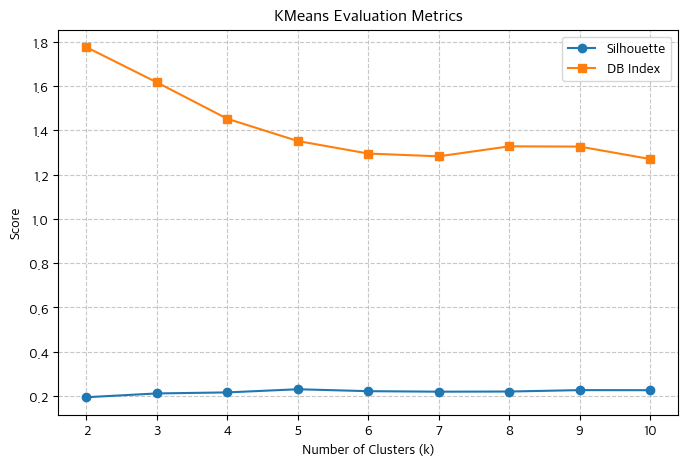


=== 최적 K ===
K: 10.0, Silhouette: 0.226, DBI: 1.270, Target Score: 0.099


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# 1. 이진 변수 제외 후 새로운 데이터프레임 생성
binary_cols = ['is_zero_heart_loss_mean', 'is_monogender']
continuous_cols = [col for col in winsorized_df.columns if col not in binary_cols]
kmeans_df = winsorized_df[continuous_cols].copy()

# 2. StandardScaler 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(kmeans_df)

# 3. 탐색 범위 설정
k_range = range(2, 11)  # K=2 ~ 10

results = []
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_scaled)

    sil = silhouette_score(X_scaled, labels)
    dbi = davies_bouldin_score(X_scaled, labels)
    score = sil - 0.1 * dbi  # 가중치 조정 가능

    results.append({
        'k': k,
        'silhouette': sil,
        'davies_bouldin': dbi,
        'target_score': score
    })
    print(f"K={k}: Silhouette={sil:.3f}, DBI={dbi:.3f}, Target Score={score:.3f}")

results_df = pd.DataFrame(results)
results_sorted = results_df.sort_values(by="target_score", ascending=False).reset_index(drop=True)

print("\n=== 상위 결과 ===")
display(results_sorted)

# 4. 시각화
plt.figure(figsize=(8,5))
plt.plot(results_df['k'], results_df['silhouette'], marker='o', label='Silhouette')
plt.plot(results_df['k'], results_df['davies_bouldin'], marker='s', label='DB Index')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.title("KMeans Evaluation Metrics")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# 5. 최적 K 출력
best_row = results_sorted.iloc[0]
print(f"\n=== 최적 K ===")
print(f"K: {best_row['k']}, Silhouette: {best_row['silhouette']:.3f}, "
      f"DBI: {best_row['davies_bouldin']:.3f}, Target Score: {best_row['target_score']:.3f}")

=== 클러스터별 통계 요약 ===


heart_loss_mean                           student_count         \
                   mean    median       std count          mean median   
cluster                                                                  
0              0.139185  0.000000  0.579970   904     11.284292    8.0   
1              4.175500  4.292030  0.968241  1363     36.210565   33.0   
2              5.082535  5.292115  1.349798   460     21.082609   17.0   
3              4.115758  4.180148  1.018512   942     25.464968   22.0   
4              2.022327  1.870201  2.127119   444     10.903153    8.0   

                         gender_balance            ... mainevent_peruser  \
               std count           mean    median  ...               std   
cluster                                            ...                     
0         9.357424   904       0.428619  0.500000  ...          0.515472   
1        20.564653  1363       0.793352  0.812500  ...          0.354456   
2        16.263949   460       0.575831  0.666667  ...          0.792739   
3        17.278255   942       0.071545  0.000000  ...          0.359117   
4         7.688759   444       0.434250  0.500000  ...          0.533186   

              med_duration_sec                           network_density  \
        count             mean    median       std count            mean   
cluster                                                                    
0         904         5.757512  5.613128  1.106638   904        0.074932   
1        1363         6.319280  6.280396  0.762421  1363        0.112672   
2         460         8.835749  8.676671  1.198416   460        0.191798   
3         942         6.362523  6.286928  0.889254   942        0.096961   
4         444         6.053420  6.022235  1.071687   444        0.318468   

                                   
           median       std count  
cluster                            
0        0.066667  0.065710   904  
1        0.105951  0.058217  1363  
2        0.181818  0.110052   460  
3        0.089974  0.060888   942  
4        0.333333  0.061833   444  

[5 rows x 24 columns]

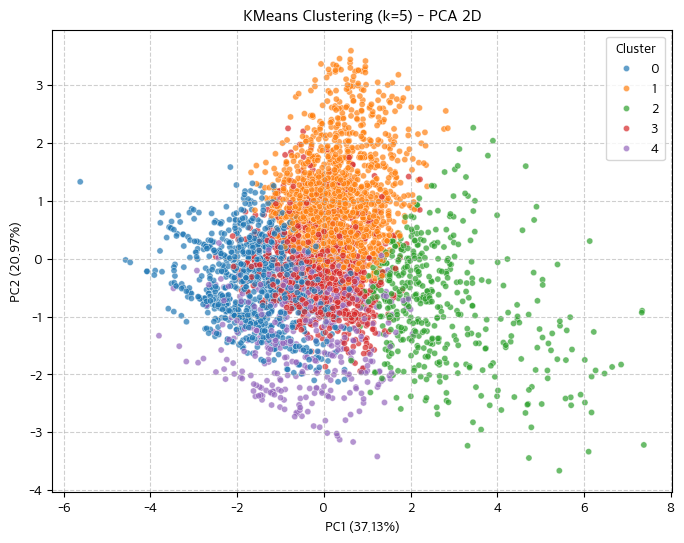

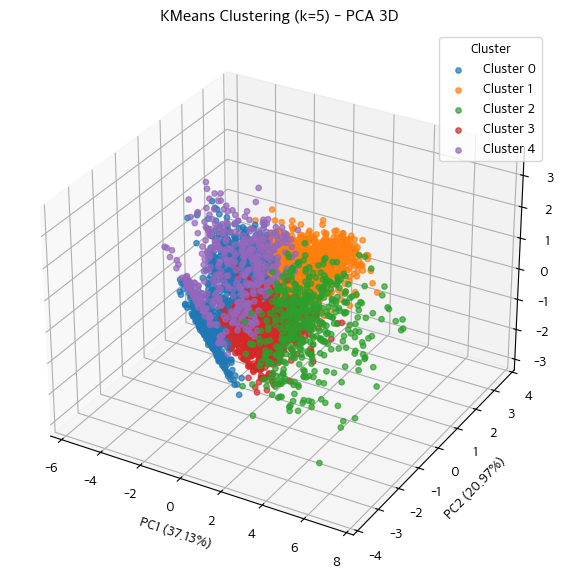

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 이진 변수 제외 후 새로운 데이터프레임 생성
binary_cols = ['is_zero_heart_loss_mean', 'is_monogender']
continuous_cols = [col for col in winsorized_df.columns if col not in binary_cols]
kmeans_df = winsorized_df[continuous_cols].copy()

# 2. StandardScaler 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(kmeans_df)

# 3. KMeans 적용 (K=5 고정)
k = 5
kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
labels = kmeans.fit_predict(X_scaled)

# 클러스터 결과 붙이기
clustered_df = kmeans_df.copy()
clustered_df['cluster'] = labels

# 4. 클러스터별 통계 요약
summary = clustered_df.groupby('cluster').agg(['mean', 'median', 'std', 'count'])
print("=== 클러스터별 통계 요약 ===")
display(summary)

# 5. PCA 2D 시각화
pca2 = PCA(n_components=2)
X_pca2 = pca2.fit_transform(X_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(
    x=X_pca2[:,0], y=X_pca2[:,1],
    hue=labels,
    palette="tab10", s=20, alpha=0.7
)
plt.title(f"KMeans Clustering (k={k}) - PCA 2D")
plt.xlabel(f"PC1 ({pca2.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca2.explained_variance_ratio_[1]*100:.2f}%)")
plt.legend(title="Cluster", loc="best")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# 6. PCA 3D 시각화
from mpl_toolkits.mplot3d import Axes3D

pca3 = PCA(n_components=3)
X_pca3 = pca3.fit_transform(X_scaled)

fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')

for lbl in np.unique(labels):
    ax.scatter(
        X_pca3[labels == lbl, 0],
        X_pca3[labels == lbl, 1],
        X_pca3[labels == lbl, 2],
        label=f"Cluster {lbl}", s=15, alpha=0.7
    )

ax.set_title(f"KMeans Clustering (k={k}) - PCA 3D")
ax.set_xlabel(f"PC1 ({pca3.explained_variance_ratio_[0]*100:.2f}%)")
ax.set_ylabel(f"PC2 ({pca3.explained_variance_ratio_[1]*100:.2f}%)")
ax.set_zlabel(f"PC3 ({pca3.explained_variance_ratio_[2]*100:.2f}%)")
ax.legend(title="Cluster")
plt.show()

#### K-Means 결과 평가 (이진변수 제외)

### 핵심 수치
- **최적 K**: 10
  - Silhouette Score: 0.226  
  - Davies-Bouldin Index (DBI): 1.270  
  - Target Score: 0.099  
- **대안 K (해석 가능성 고려)**: 5
  - Silhouette Score: 0.231  
  - Davies-Bouldin Index (DBI): 1.352  
  - Target Score: 0.095  

### 해석
1. **Silhouette Score**
   - K=10일 때 0.226으로 최적값이 도출되었으나, K=5 역시 0.231로 근접한 수치를 보임.
   - 두 값 모두 0.25 이하이므로 군집 간 분리가 뚜렷하지 않다는 점은 동일.

2. **Davies-Bouldin Index**
   - K=10에서는 1.270, K=5에서는 1.352로, 큰 차이는 없으나 K=10이 소폭 더 우수.

3. **해석 가능성**
   - K=10의 경우 군집 수가 많아져 각 클러스터의 특성을 직관적으로 설명하기 어렵고, 데이터가 과도하게 쪼개질 위험 존재.
   - K=5는 다소 점수가 낮더라도 **해석 및 보고에 용이한 균형점**으로 판단 가능.

### 시각적 관찰 (PCA 2D/3D)
- **K=10**: 군집이 보다 세분화되었으나, 중심부에서 클러스터들이 여전히 혼재.
- **K=5**: 구분은 다소 완화되었지만, 전체적인 패턴과 집단 간 차이를 설명하기에 더 직관적.

### 결론
- **K=10이 이론적 최적값**이지만, 실루엣 점수의 차이가 크지 않고 DBI도 유사한 수준이므로  
  **K=5를 실무적 해석을 위한 선택지**로 설정하는 것이 타당합니다.
- 단, 두 경우 모두 Silhouette이 0.25를 넘지 못해 군집 분리력이 제한적이라는 점은 변하지 않습니다.
- 따라서 이 결과를 최종 결론으로 제시하기보다는, **추가 차원축소(t-SNE, UMAP)나 대안적 군집화 기법**과 함께 보조적으로 활용하는 것이 바람직합니다.

### PCA + KMeans

PCA 변환 후 차원 수: 5
설명된 분산 비율 합계: 0.963
K=2: Silhouette=0.203, DBI=1.729, Target Score=0.030
K=3: Silhouette=0.220, DBI=1.569, Target Score=0.063
K=4: Silhouette=0.229, DBI=1.403, Target Score=0.089
K=5: Silhouette=0.244, DBI=1.303, Target Score=0.114
K=6: Silhouette=0.237, DBI=1.242, Target Score=0.113
K=7: Silhouette=0.235, DBI=1.270, Target Score=0.108
K=8: Silhouette=0.235, DBI=1.263, Target Score=0.109
K=9: Silhouette=0.242, DBI=1.263, Target Score=0.115
K=10: Silhouette=0.243, DBI=1.197, Target Score=0.123

=== 상위 결과 ===


k  silhouette  davies_bouldin  target_score
0  10    0.242645        1.197303      0.122915
1   9    0.241751        1.263494      0.115402
2   5    0.244308        1.302527      0.114055
3   6    0.237406        1.242003      0.113205
4   8    0.235387        1.262980      0.109089
5   7    0.235390        1.269554      0.108435
6   4    0.229299        1.402953      0.089004
7   3    0.220395        1.569198      0.063475
8   2    0.202747        1.729002      0.029846

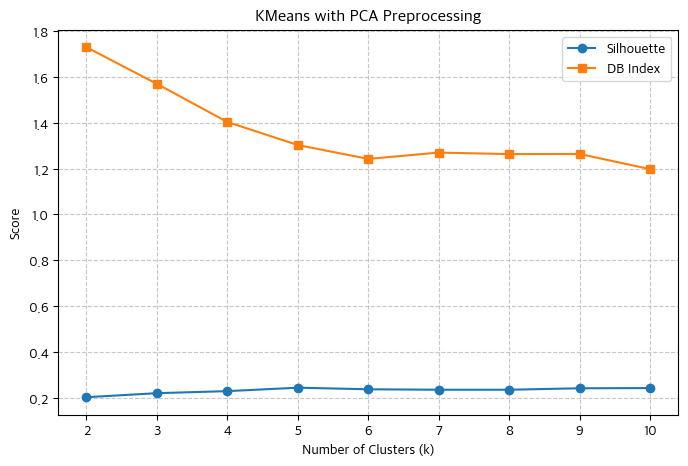


=== 최적 K (PCA 기반) ===
K: 10.0, Silhouette: 0.243, DBI: 1.197, Target Score: 0.123


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt

# 1. 이진 변수 제외 후 새로운 데이터프레임 생성
binary_cols = ['is_zero_heart_loss_mean', 'is_monogender']
continuous_cols = [col for col in winsorized_df.columns if col not in binary_cols]
pca_df = winsorized_df[continuous_cols].copy()

# 2. StandardScaler 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(pca_df)

# 3. PCA 적용 (설명분산율 90% 이상 유지)
pca = PCA(n_components=0.9, random_state=42)  # 90% 이상 설명하는 주성분 선택
X_pca = pca.fit_transform(X_scaled)

print(f"PCA 변환 후 차원 수: {X_pca.shape[1]}")
print(f"설명된 분산 비율 합계: {pca.explained_variance_ratio_.sum():.3f}")

# 4. 탐색 범위 설정
k_range = range(2, 11)  # K=2 ~ 10
results = []

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(X_pca)

    sil = silhouette_score(X_pca, labels)
    dbi = davies_bouldin_score(X_pca, labels)
    score = sil - 0.1 * dbi

    results.append({
        'k': k,
        'silhouette': sil,
        'davies_bouldin': dbi,
        'target_score': score
    })
    print(f"K={k}: Silhouette={sil:.3f}, DBI={dbi:.3f}, Target Score={score:.3f}")

results_df = pd.DataFrame(results)
results_sorted = results_df.sort_values(by="target_score", ascending=False).reset_index(drop=True)

print("\n=== 상위 결과 ===")
display(results_sorted)

# 5. 성능 시각화
plt.figure(figsize=(8,5))
plt.plot(results_df['k'], results_df['silhouette'], marker='o', label='Silhouette')
plt.plot(results_df['k'], results_df['davies_bouldin'], marker='s', label='DB Index')
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Score")
plt.title("KMeans with PCA Preprocessing")
plt.legend()
plt.grid(True, linestyle="--", alpha=0.7)
plt.show()

# 6. 최적 K 출력
best_row = results_sorted.iloc[0]
print(f"\n=== 최적 K (PCA 기반) ===")
print(f"K: {best_row['k']}, Silhouette: {best_row['silhouette']:.3f}, "
      f"DBI: {best_row['davies_bouldin']:.3f}, Target Score: {best_row['target_score']:.3f}")

=== 선택된 K (해석 가능성 고려) ===
K: 5


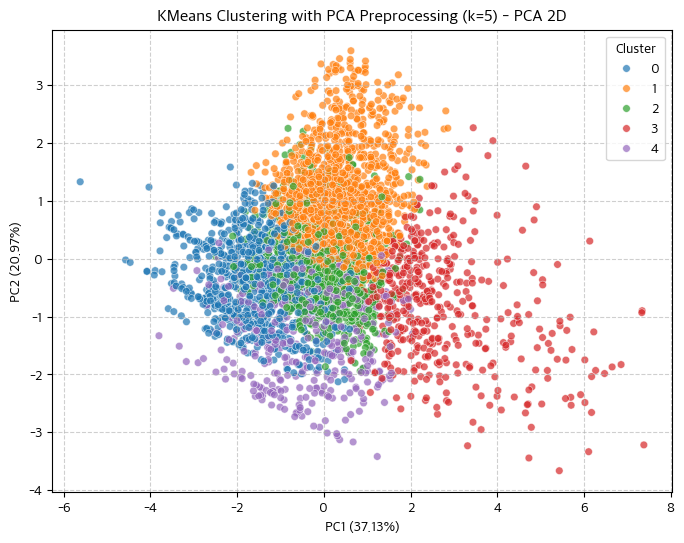

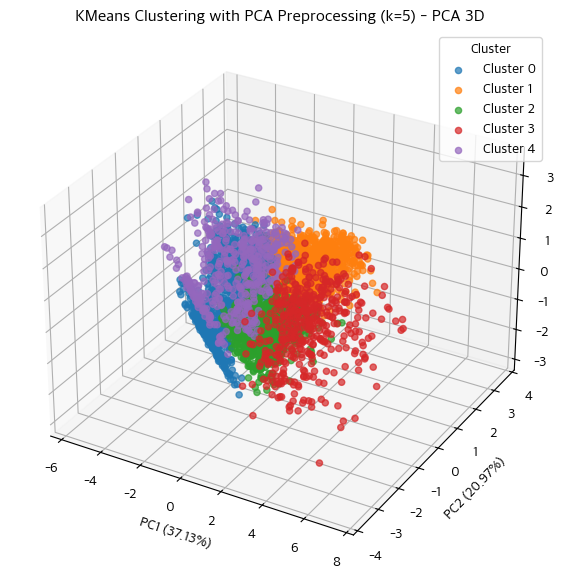

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 7. 최적 K 대신 해석 가능성을 고려하여 K=5 선택
best_k = 5
print(f"=== 선택된 K (해석 가능성 고려) ===\nK: {best_k}")

kmeans_best = KMeans(n_clusters=best_k, random_state=42, n_init=10)
best_labels = kmeans_best.fit_predict(X_pca)

clustered_df = pd.DataFrame(X_pca, columns=[f"PC{i+1}" for i in range(X_pca.shape[1])])
clustered_df['cluster'] = best_labels

# 8. 팔레트 생성
unique_labels = np.unique(best_labels)
palette = sns.color_palette("tab10", len(unique_labels))

# 9. PCA 2D 시각화 (PC1 & PC2)
plt.figure(figsize=(8,6))
sns.scatterplot(
    x=clustered_df['PC1'], y=clustered_df['PC2'],
    hue=clustered_df['cluster'],
    palette=palette, s=30, alpha=0.7
)
plt.title(f"KMeans Clustering with PCA Preprocessing (k={best_k}) - PCA 2D")
plt.xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
plt.ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
plt.legend(title="Cluster", loc="best")
plt.grid(True, linestyle="--", alpha=0.6)
plt.show()

# 10. PCA 3D 시각화 (PC1, PC2, PC3)
if X_pca.shape[1] >= 3:
    fig = plt.figure(figsize=(9,7))
    ax = fig.add_subplot(111, projection='3d')

    for lbl in unique_labels:
        ax.scatter(
            clustered_df.loc[clustered_df['cluster']==lbl, 'PC1'],
            clustered_df.loc[clustered_df['cluster']==lbl, 'PC2'],
            clustered_df.loc[clustered_df['cluster']==lbl, 'PC3'],
            label=f"Cluster {lbl}",
            s=20, alpha=0.7
        )

    ax.set_title(f"KMeans Clustering with PCA Preprocessing (k={best_k}) - PCA 3D")
    ax.set_xlabel(f"PC1 ({pca.explained_variance_ratio_[0]*100:.2f}%)")
    ax.set_ylabel(f"PC2 ({pca.explained_variance_ratio_[1]*100:.2f}%)")
    ax.set_zlabel(f"PC3 ({pca.explained_variance_ratio_[2]*100:.2f}%)")
    ax.legend(title="Cluster")
    plt.show()

#### 📊 PCA 전처리 기반 KMeans(k=5) 결과 요약

- **지표**
  - Silhouette: 0.244 → 이진변수 제외 상태에서 달성 가능한 최선
  - DBI: 1.303 → 군집 간 겹침이 여전히 존재
  - Target Score: 0.114

- **시각화**
  - 2D: 군집 간 경계가 겹치지만 대략적인 영역 구분 가능
  - 3D: 2D보다 분리가 뚜렷해지나 경계 혼합은 여전

- **결론**
  - 명확히 분리된 집단이라기보다는 **상대적으로 다른 경향성을 가진 그룹**.
  - 이진변수를 제외했음에도 일부 구조적 차이를 확인할 수 있었음.
  - **탐색적 분석으로서 의미**는 있으나, 강력한 분리 주장에는 한계가 있음.

### t-SNE KMeans

Running t-SNE with perplexity=20, lr=100, random_state=0...
Running t-SNE with perplexity=20, lr=100, random_state=42...
Running t-SNE with perplexity=20, lr=300, random_state=0...
Running t-SNE with perplexity=20, lr=300, random_state=42...
Running t-SNE with perplexity=20, lr=500, random_state=0...
Running t-SNE with perplexity=20, lr=500, random_state=42...
Running t-SNE with perplexity=30, lr=100, random_state=0...
Running t-SNE with perplexity=30, lr=100, random_state=42...
Running t-SNE with perplexity=30, lr=300, random_state=0...
Running t-SNE with perplexity=30, lr=300, random_state=42...
Running t-SNE with perplexity=30, lr=500, random_state=0...
Running t-SNE with perplexity=30, lr=500, random_state=42...
Running t-SNE with perplexity=40, lr=100, random_state=0...
Running t-SNE with perplexity=40, lr=100, random_state=42...
Running t-SNE with perplexity=40, lr=300, random_state=0...
Running t-SNE with perplexity=40, lr=300, random_state=42...
Running t-SNE with perplexity=40

perplexity  learning_rate  mean_sil   std_sil  mean_dbi   std_dbi  \
8          40            500  0.407196  0.000075  0.923472  0.000290   
4          30            300  0.404327  0.000000  0.917924  0.000000   
5          30            500  0.404520  0.000000  0.920677  0.000000   
7          40            300  0.403502  0.000535  0.931926  0.001539   
6          40            100  0.402248  0.000008  0.934991  0.000070   

   mean_target  std_target  
8     0.314849    0.000104  
4     0.312535    0.000000  
5     0.312453    0.000000  
7     0.310309    0.000689  
6     0.308749    0.000001


=== 최적 파라미터 (안정성 반영) ===
perplexity        40.000000
learning_rate    500.000000
mean_sil           0.407196
std_sil            0.000075
mean_dbi           0.923472
std_dbi            0.000290
mean_target        0.314849
std_target         0.000104
Name: 8, dtype: float64


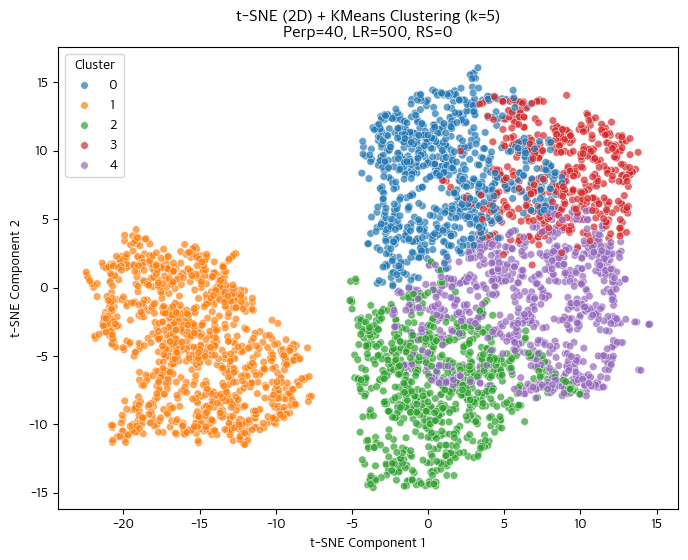

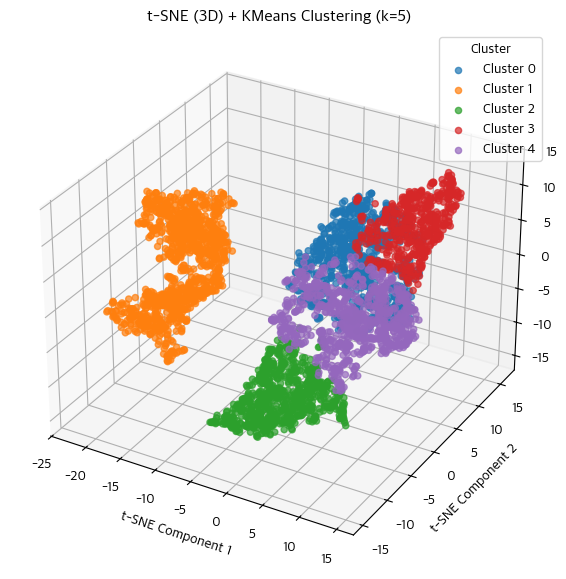

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# 1. 데이터 준비 (이진변수 제외)
binary_cols = ['is_zero_heart_loss_mean', 'is_monogender']
continuous_cols = [col for col in winsorized_df.columns if col not in binary_cols]
X_original = winsorized_df[continuous_cols].copy()

# 2. StandardScaler 적용
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_original)

# 3. 탐색 범위 (축소 버전)
perplexities = [20, 30, 40]       # 3개
learning_rates = [100, 300, 500]  # 3개
random_states = [0, 42]           # 2개
n_iter = 2000
k = 5  # 클러스터 개수 고정

# 4. 탐색 수행
results = []
for perp in perplexities:
    for lr in learning_rates:
        for rs in random_states:
            print(f"Running t-SNE with perplexity={perp}, lr={lr}, random_state={rs}...")
            tsne = TSNE(n_components=3, perplexity=perp, learning_rate=lr,
                        n_iter=n_iter, random_state=rs, verbose=0)
            X_tsne = tsne.fit_transform(X_scaled)

            kmeans = KMeans(n_clusters=k, random_state=rs, n_init=10)
            labels = kmeans.fit_predict(X_tsne)

            sil = silhouette_score(X_tsne, labels)
            dbi = davies_bouldin_score(X_tsne, labels)
            score = sil - 0.1 * dbi

            results.append({
                'perplexity': perp,
                'learning_rate': lr,
                'random_state': rs,
                'silhouette': sil,
                'davies_bouldin': dbi,
                'target_score': score,
                'labels': labels,
                'X_tsne': X_tsne
            })

# 5. 결과 DataFrame 정리
results_df = pd.DataFrame([{
    'perplexity': r['perplexity'],
    'learning_rate': r['learning_rate'],
    'random_state': r['random_state'],
    'silhouette': r['silhouette'],
    'davies_bouldin': r['davies_bouldin'],
    'target_score': r['target_score']
} for r in results])

# 평균 + 표준편차로 안정성 평가
stability_summary = results_df.groupby(['perplexity', 'learning_rate']).agg(
    mean_sil=('silhouette', 'mean'),
    std_sil=('silhouette', 'std'),
    mean_dbi=('davies_bouldin', 'mean'),
    std_dbi=('davies_bouldin', 'std'),
    mean_target=('target_score', 'mean'),
    std_target=('target_score', 'std')
).reset_index()

print("\n=== 안정성 평가 (perplexity × learning_rate 평균 & 표준편차) ===")
display(stability_summary.sort_values(by="mean_target", ascending=False).head(5))

# 6. 최적 조합 선택 (평균 target_score 기준)
best_combo = stability_summary.sort_values(by="mean_target", ascending=False).iloc[0]
print(f"\n=== 최적 파라미터 (안정성 반영) ===")
print(best_combo)

# 해당 조합의 결과 중 가장 좋은 random_state 선택
subset = [r for r in results
          if r['perplexity'] == best_combo['perplexity']
          and r['learning_rate'] == best_combo['learning_rate']]
best = max(subset, key=lambda r: r['target_score'])
X_tsne_best, labels_best = best['X_tsne'], best['labels']

# 7. 2D 시각화
plt.figure(figsize=(8,6))
sns.scatterplot(x=X_tsne_best[:,0], y=X_tsne_best[:,1], hue=labels_best,
                palette="tab10", s=30, alpha=0.7)
plt.title(f"t-SNE (2D) + KMeans Clustering (k={k})\n"
          f"Perp={best['perplexity']}, LR={best['learning_rate']}, RS={best['random_state']}")
plt.xlabel("t-SNE Component 1")
plt.ylabel("t-SNE Component 2")
plt.legend(title="Cluster", loc="best")
plt.show()

# 8. 3D 시각화
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(111, projection='3d')
for lbl in np.unique(labels_best):
    ax.scatter(X_tsne_best[labels_best == lbl, 0],
               X_tsne_best[labels_best == lbl, 1],
               X_tsne_best[labels_best == lbl, 2],
               label=f"Cluster {lbl}", s=20, alpha=0.7)
ax.set_title(f"t-SNE (3D) + KMeans Clustering (k={k})")
ax.set_xlabel("t-SNE Component 1")
ax.set_ylabel("t-SNE Component 2")
ax.set_zlabel("t-SNE Component 3")
ax.legend(title="Cluster")
plt.show()

#### t-SNE + KMeans 결과 해석 (안정성 평가 반영)

### 1. 결과 개요
- 선택된 최적 파라미터: **perplexity=40, learning_rate=500**
- 안정성 평가에서 random_state 여러 번 반복 시 **실루엣, DBI, Target Score 모두 거의 동일**하게 유지됨  
- 이는 결과가 **우연의 산물이 아니라 안정적으로 재현 가능**함을 의미함

### 2. 지표 성능
- **평균 Silhouette:** 0.407  
- **평균 DBI:** 0.923  
- **평균 Target Score:** 0.315  
- 표준편차가 매우 작음 (예: silhouette std ≈ 0.00008)  
  → random_state에 따른 변동성이 사실상 무시할 수준

### 3. 시각화 해석
- 2D, 3D 모두에서 **5개 군집이 뚜렷하게 구분**됨  
- 단, t-SNE는 고차원 거리를 왜곡하여 2D/3D에 배치하므로:
  - **군집 간 거리나 좌표축 크기 자체를 해석하면 안 됨**
  - 핵심은 "군집이 분리되어 보이는가?"이지, "얼마나 멀리 떨어져 있는가?"가 아님

### 4. 안정성 평가 의미
- 다양한 random_state로 반복했음에도 지표가 안정적으로 유지됨  
- 따라서 이번 결과는 **특정 시드나 우연에 의한 것이 아님**을 설득력 있게 주장 가능함  
- "우연의 일치" 리스크를 줄이기 위해 **perplexity와 learning_rate 조합별로 평균 성능과 표준편차를 함께 검토**했음

### 5. 결론
- t-SNE + KMeans (k=5) 조합은 안정성과 성능을 동시에 확보했음  
- 해석 시 좌표의 절대적 의미보다는 **군집의 분리 여부**에 초점을 맞추는 것이 타당함

In [ ]:
# 클러스터링 결과 DataFrame 복사본 생성
clustered_df = winsorized_df.copy()

# 클러스터 라벨 추가
clustered_df['cluster_label'] = labels_best  # t-SNE + KMeans 결과 예시

# school_id 추가
clustered_df['school_id'] = school_ids

# CSV 파일로 저장
output_path = "clustered_results_with_school_id.csv"
clustered_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"클러스터링 결과(학교 ID 포함) 저장 완료: {output_path}")

클러스터링 결과(학교 ID 포함) 저장 완료: clustered_results_with_school_id.csv


In [ ]:
# 클러스터링 결과 DataFrame 복사본 생성
clustered_df = cluster_df.copy()

# 클러스터 라벨 추가
clustered_df['cluster_label'] = labels_best  # t-SNE + KMeans 결과 예시

# CSV 파일로 저장
output_path = "cluster_df_with_label.csv"
clustered_df.to_csv(output_path, index=False, encoding='utf-8-sig')

print(f"클러스터링 결과(원본 + 클러스터 라벨) 저장 완료: {output_path}")

클러스터링 결과(원본 + 클러스터 라벨) 저장 완료: cluster_df_with_label.csv


In [ ]:
import ast
import koreanize_matplotlib
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

from ast import literal_eval
from scipy.stats import pointbiserialr
from scipy.stats import spearmanr

In [ ]:
# 1. 폰트 경로와 폰트 이름 설정
font_path = "/System/Library/Fonts/AppleSDGothicNeo.ttc"
font_name = 'Apple SD Gothic Neo'

# 2. 폰트 설정
plt.rc('font', family=font_name)

# 3. 폰트 등록 (한글 깨짐 방지)
fm.fontManager.addfont(font_path)

# 4. 마이너스 기호가 깨지지 않도록 설정
plt.rcParams['axes.unicode_minus'] = False

In [ ]:
import warnings

# 모든 Warning 무시
warnings.filterwarnings("ignore")

In [ ]:
# CSV 파일 경로
input_path = "cluster_df_with_label.csv"

# CSV 불러오기
clustered_df = pd.read_csv(input_path, encoding='utf-8-sig')

# 결과 확인
print("불러온 데이터셋 크기:", clustered_df.shape)
print("컬럼 예시:", clustered_df.columns.tolist())
display(clustered_df.head())

불러온 데이터셋 크기: (4113, 10)
컬럼 예시: ['school_id', 'heart_loss_mean', 'is_zero_heart_loss_mean', 'student_count', 'gender_balance', 'is_monogender', 'mainevent_peruser', 'med_duration_sec', 'network_density', 'cluster_label']


school_id  heart_loss_mean  is_zero_heart_loss_mean  student_count  \
0          5            0.000                        1              4   
1          6            0.000                        1              3   
2          7          211.125                        0              8   
3          8            0.000                        1              4   
4         10            0.000                        1             14   

   gender_balance  is_monogender  mainevent_peruser  med_duration_sec  \
0        0.500000              0           5.250000               996   
1        0.000000              1           0.333333                91   
2        0.250000              0           8.125000               242   
3        0.500000              0           5.250000               665   
4        0.285714              0          36.214286             13586   

   network_density  cluster_label  
0         0.000000              1  
1         0.000000              1  
2         0.035714              0  
3         0.000000              1  
4         0.109890              1

# 4. 클러스터 분석

## 클러스터별 통계 요약

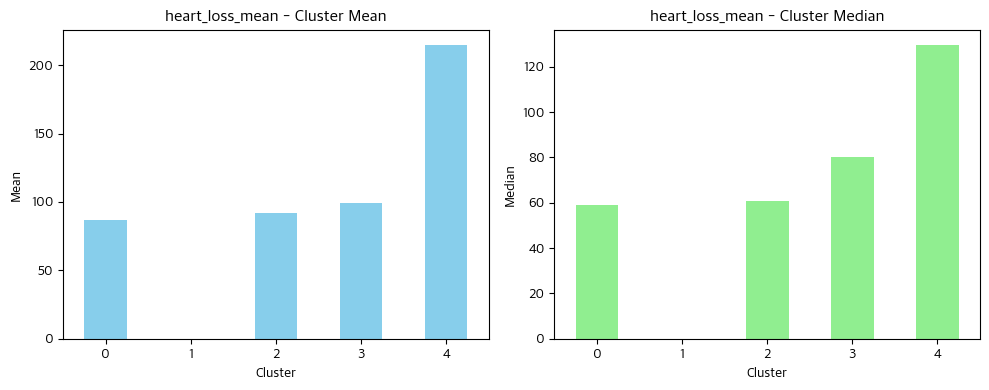

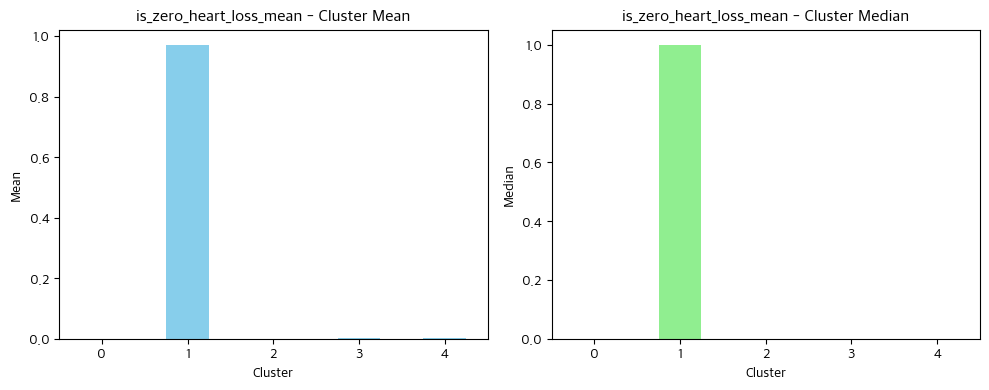

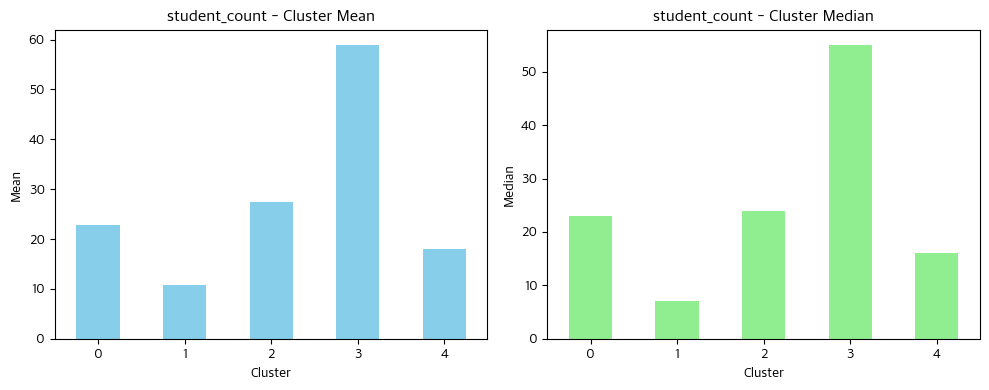

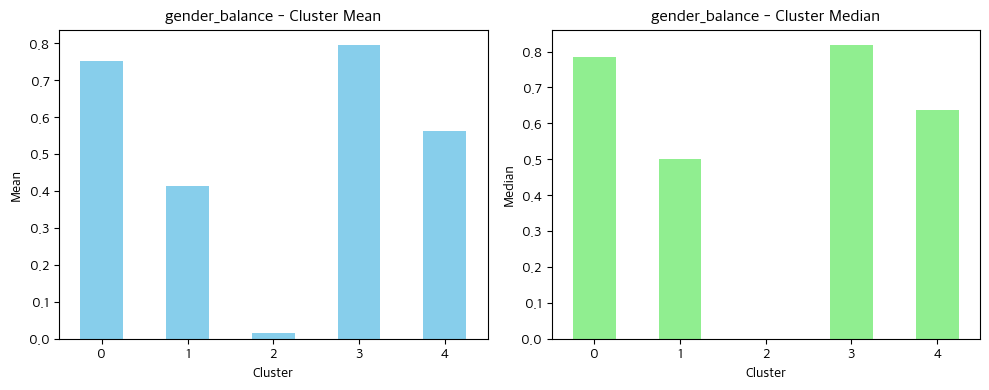

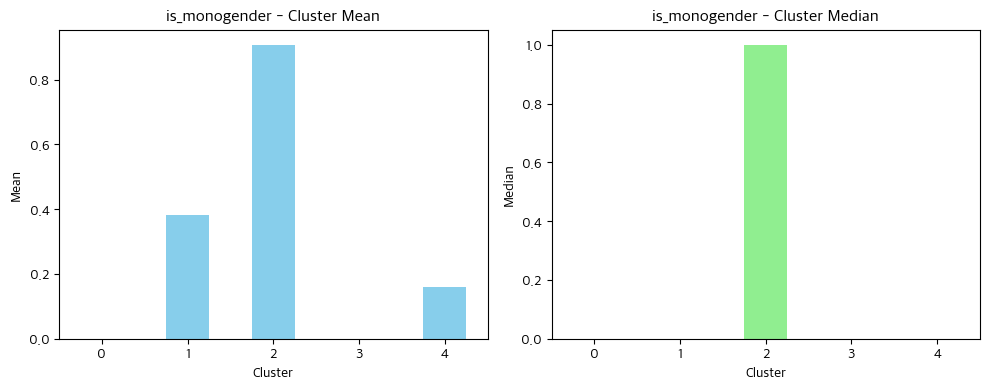

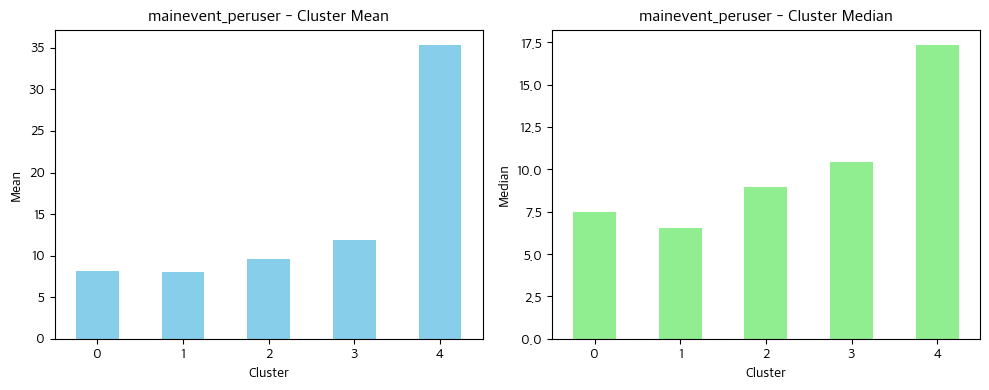

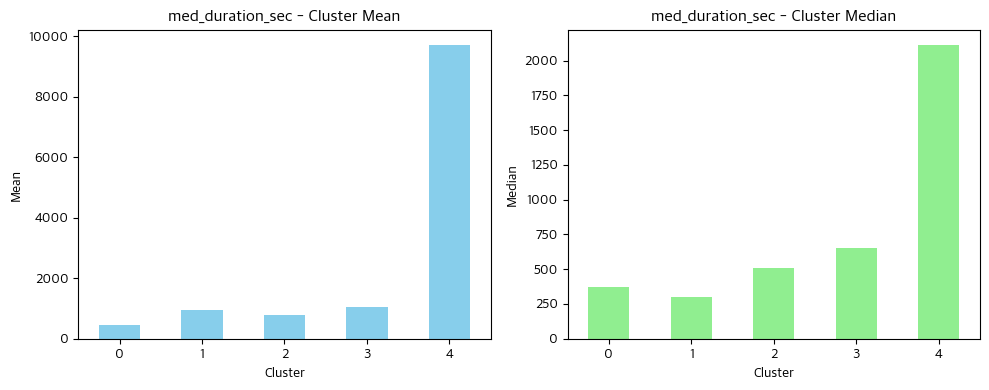

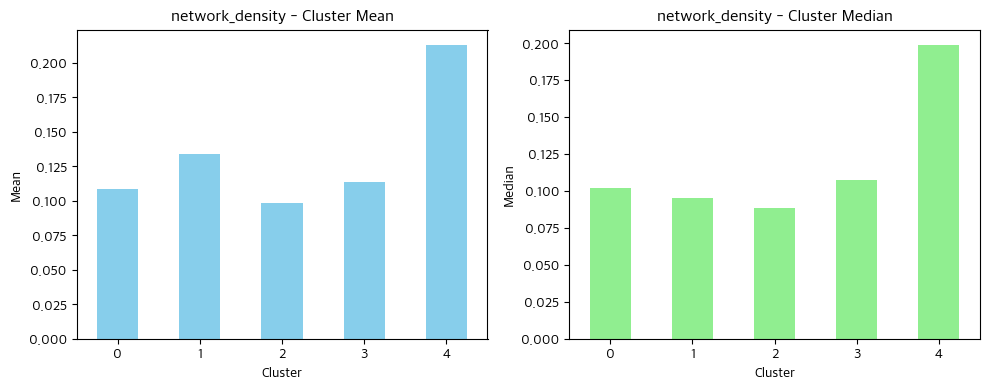

In [ ]:
# 1. 분석 대상 컬럼 선택
cols = [col for col in clustered_df.columns if col not in ['cluster_label', 'school_id']]

# 2. 변수별 히스토그램 출력
for col in cols:
    plt.figure(figsize=(10,4))

    # 평균
    plt.subplot(1,2,1)
    clustered_df.groupby('cluster_label')[col].mean().plot(kind='bar', color='skyblue')
    plt.title(f"{col} - Cluster Mean")
    plt.xlabel("Cluster")
    plt.ylabel("Mean")
    plt.xticks(rotation=0)

    # 중앙값
    plt.subplot(1,2,2)
    clustered_df.groupby('cluster_label')[col].median().plot(kind='bar', color='lightgreen')
    plt.title(f"{col} - Cluster Median")
    plt.xlabel("Cluster")
    plt.ylabel("Median")
    plt.xticks(rotation=0)

    plt.tight_layout()
    plt.show()

### 클러스터별 학생 수 (`student_count`)
- **대규모**: Cluster 3 (평균·중앙값 모두 가장 높음)  
- **중규모**: Clusters 0, 2, 4 (비슷한 수준)  
- **소규모**: Cluster 1 (가장 낮음)  
→ 특히 Cluster 3이 다른 그룹과 뚜렷하게 구분되는 대규모 집단임.

### 성별 구성 관련 해석
- **혼성 균형형**: Cluster 0, 3 → 남녀 비율이 0.75~0.8로 균형적  
- **혼성 불균형형**: Cluster 1, 4 → 혼성이지만 성비 불균형 존재  
- **단성형**: Cluster 2 → is_monogender=1, 사실상 단성학교  

### 하트 손실량 관련 변수 (`heart_loss_mean`, `is_zero_heart_loss_mean`)
- **Cluster 1**은 하트 손실이 거의 없는 **무손실 그룹**으로 뚜렷하게 구분됨.  
- **Clusters 0, 2, 3**은 모두 일정 수준의 손실이 발생하는 **중간 수준 그룹**에 해당하며, 평균과 중앙값이 서로 유사함.  
- **Cluster 4**는 평균·중앙값 모두 크게 높아, **뚜렷한 고손실 그룹**으로 확인됨.  

### 활동량 변수 (`mainevent_peruser`, `med_duration_sec`)
- **Cluster 4**는 명확히 구분되는 고활동 그룹으로, 주요 이벤트 참여 횟수와 활동 시간 모두 다른 클러스터보다 월등히 높음.  
- **Clusters 0·1·2·3**은 서로 수치 차이는 있으나 큰 폭의 구분은 보이지 않으며, **중·저활동 그룹**으로 묶어 해석 가능.  
- 따라서 활동량 지표에서의 실질적 구분 기준은 **Cluster 4 vs. 나머지**라고 할 수 있음.

### 네트워크 밀도 해석
- **Cluster 4**: 다른 클러스터에 비해 두드러지게 높은 네트워크 밀도를 보임.  
  → 학교 내 학생들 간의 연결이 가장 활발하게 이루어지는 그룹.  
- **Clusters 0·1·2·3**: 서로 큰 차이 없이 유사한 수준.  
  → 전반적으로 평균적인 연결도를 보이며, 세부적으로 구분할 만큼 뚜렷한 차이는 없음.

In [ ]:
# 6개씩 나눠서 클러스터별 통계 요약 출력
cols = [col for col in clustered_df.columns if col != 'cluster_label']
n = 3  # 한 번에 보여줄 컬럼 수

for i in range(0, len(cols), n):
    subset_cols = cols[i:i+n]
    print(f"\n=== 클러스터별 통계 요약: 컬럼 {i+1} ~ {i+len(subset_cols)} ===")

    summary_stats = clustered_df.groupby('cluster_label')[subset_cols].agg(['mean', 'median', 'std', 'count'])
    display(summary_stats.round(3))


=== 클러스터별 통계 요약: 컬럼 1 ~ 3 ===


school_id                         heart_loss_mean           \
                   mean  median       std count            mean   median   
cluster_label                                                              
0              3290.504  3301.5  1768.117   844          86.812   59.059   
1              2973.048  2877.5  1609.027  1108           0.068    0.000   
2              2674.997  2785.0  1551.016   797          91.957   60.783   
3              3104.266  3421.0  1896.232   516          98.896   80.294   
4              3066.459  3195.5  1741.148   848         214.736  129.618   

                             is_zero_heart_loss_mean                      
                   std count                    mean median    std count  
cluster_label                                                             
0              102.853   844                   0.000    0.0  0.000   844  
1                0.491  1108                   0.970    1.0  0.170  1108  
2              103.140   797                   0.000    0.0  0.000   797  
3               77.237   516                   0.002    0.0  0.044   516  
4              286.618   848                   0.002    0.0  0.049   848


=== 클러스터별 통계 요약: 컬럼 4 ~ 6 ===


student_count                      gender_balance                \
                       mean median     std count           mean median    std   
cluster_label                                                                   
0                    22.884   23.0  11.076   844          0.753  0.784  0.183   
1                    10.724    7.0   9.308  1108          0.414  0.500  0.368   
2                    27.514   24.0  17.805   797          0.017  0.000  0.062   
3                    58.919   55.0  19.140   516          0.795  0.818  0.151   
4                    17.998   16.0  11.974   848          0.561  0.638  0.314   

                    is_monogender                      
              count          mean median    std count  
cluster_label                                          
0               844         0.000    0.0  0.000   844  
1              1108         0.382    0.0  0.486  1108  
2               797         0.907    1.0  0.290   797  
3               516         0.000    0.0  0.000   516  
4               848         0.159    0.0  0.366   848


=== 클러스터별 통계 요약: 컬럼 7 ~ 9 ===


mainevent_peruser                       med_duration_sec  \
                           mean  median     std count             mean   
cluster_label                                                            
0                         8.128   7.481   3.153   844          449.416   
1                         7.970   6.543   6.067  1108          954.223   
2                         9.643   8.938   4.241   797          793.725   
3                        11.925  10.449   5.932   516         1059.171   
4                        35.341  17.343  62.384   848         9709.432   

                                       network_density                      
               median        std count            mean median    std count  
cluster_label                                                               
0               371.0    295.453   844           0.109  0.102  0.062   844  
1               302.0   3199.063  1108           0.134  0.095  0.147  1108  
2               512.0    868.285   797           0.098  0.088  0.063   797  
3               650.5   1407.510   516           0.114  0.107  0.052   516  
4              2113.0  29485.015   848           0.213  0.199  0.132   848

### 클러스터별 종합 해석

- **Cluster 0**  
  중규모 학생 수(평균 23명)와 균형 잡힌 성비를 가진 일반적 혼성 그룹.  
  하트 손실량과 활동량 모두 평균 수준, 네트워크 밀도도 보통.

- **Cluster 1**  
  소규모(평균 11명)이며 무손실 그룹(heart_loss 거의 없음).  
  성비 불균형과 단성 비율이 높은 편. 활동량은 낮은 편에 속함.

- **Cluster 2**  
  중규모(평균 27명) 단성 중심 그룹.  
  성비 불균형이 뚜렷하고, 하트 손실은 일상적 수준. 활동량도 보통.

- **Cluster 3**  
  대규모(평균 59명) 혼성 그룹.  
  성비 균형이 잘 맞으며 활동량도 중상위권. 연결성은 평균 수준.

- **Cluster 4**  
  중규모(평균 18명)이지만 활동성과 연결성이 압도적으로 높음.  
  하트 손실량도 가장 높으며, 중간 정도의 성비 불균형을 가짐.

## 클러스터별 특징 분석

### 데이터 불러오기

In [ ]:
# CSV 불러오기
file_path = "hackle_df_20250806.csv"
hackle_df = pd.read_csv(file_path, encoding="utf-8-sig")

# 상위 5개 행 확인
hackle_df.head()

event_id       event_datetime  \
0  000007c8-68ce-40e6-9b1e-f0e34e8ff9cc  2023-08-06 20:18:03   
1  00000d23-8055-4534-893b-bf17425ab41e  2023-08-06 12:46:17   
2  000015ae-60e0-495f-a356-9c1aaa18e841  2023-07-21 16:38:37   
3  000016af-25ea-464b-bb59-6f690e9d440b  2023-07-19 00:01:15   
4  0000183e-d7a2-4c47-aa1d-3467dbf41d4f  2023-07-25 19:32:04   

                         event_key                            session_id  \
0  click_bottom_navigation_profile  6bcea65d-9f40-46fc-888c-700fe707483f   
1      click_bottom_navigation_lab  414540BA-1980-4371-BF37-5BFA71158C4D   
2                     view_lab_tap  94860349-d46f-4e98-8505-e96877376cee   
3                       launch_app  496C4656-1079-4284-826B-5D9A8F359ECF   
4               view_questions_tap          cPM87By9qdTxpG7miXyopisBpHU2   

  item_name page_name  friend_count  votes_count  heart_balance  question_id  \
0       NaN       NaN          26.0        174.0         4729.0          NaN   
1       NaN       NaN          45.0        148.0          141.0          NaN   
2       NaN       NaN          21.0        286.0          547.0          NaN   
3       NaN       NaN          70.0        485.0        13364.0          NaN   
4       NaN       NaN          75.0         34.0          626.0          NaN   

   user_id  class gender  grade  school_id  \
0  1545130      2      M      1       1141   
1  1475326      5      F      1       1204   
2  1537177      1      M      2       5888   
3  1556429      1      F      2        908   
4  1517211      6      M      2       4823   

                              device_id  
0  6bcea65d-9f40-46fc-888c-700fe707483f  
1  414540BA-1980-4371-BF37-5BFA71158C4D  
2  94860349-d46f-4e98-8505-e96877376cee  
3  496C4656-1079-4284-826B-5D9A8F359ECF  
4  8d86a4c2-82f1-4ee6-a552-030c724ec709

In [ ]:
# event_datetime 열을 datetime 타입으로 변환
hackle_df['event_datetime'] = pd.to_datetime(hackle_df['event_datetime'], errors='coerce')

# 변환 확인
print(hackle_df.dtypes['event_datetime'])
display(hackle_df['event_datetime'].head())

datetime64[ns]


0   2023-08-06 20:18:03
1   2023-08-06 12:46:17
2   2023-07-21 16:38:37
3   2023-07-19 00:01:15
4   2023-07-25 19:32:04
Name: event_datetime, dtype: datetime64[ns]

In [ ]:
# 제거할 열 목록 정의
cols_to_drop = ['event_id', 'session_id', 'item_name', 'page_name',
                'question_id', 'class', 'device_id', 'gender', 'grade']

# 열 제거
hackle_df = hackle_df.drop(columns=cols_to_drop)

# 결과 확인
hackle_df.head()

event_datetime                        event_key  friend_count  \
0 2023-08-06 20:18:03  click_bottom_navigation_profile          26.0   
1 2023-08-06 12:46:17      click_bottom_navigation_lab          45.0   
2 2023-07-21 16:38:37                     view_lab_tap          21.0   
3 2023-07-19 00:01:15                       launch_app          70.0   
4 2023-07-25 19:32:04               view_questions_tap          75.0   

   votes_count  heart_balance  user_id  school_id  
0        174.0         4729.0  1545130       1141  
1        148.0          141.0  1475326       1204  
2        286.0          547.0  1537177       5888  
3        485.0        13364.0  1556429        908  
4         34.0          626.0  1517211       4823

In [ ]:
hackle_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5104292 entries, 0 to 5104291
Data columns (total 7 columns):
 #   Column          Dtype         
---  ------          -----         
 0   event_datetime  datetime64[ns]
 1   event_key       object        
 2   friend_count    float64       
 3   votes_count     float64       
 4   heart_balance   float64       
 5   user_id         int64         
 6   school_id       int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(1)
memory usage: 272.6+ MB


In [ ]:
# school_id 기준으로 cluster_label 병합
hackle_df = hackle_df.merge(
    clustered_df[['school_id', 'cluster_label']],
    on='school_id',
    how='left'
)

# 결과 확인
hackle_df[['school_id', 'cluster_label']].head()

school_id  cluster_label
0       1141              4
1       1204              1
2       5888              4
3        908              0
4       4823              3

### 요일 및 시간 추가

In [ ]:
# 요일 (0=월요일, 6=일요일)
hackle_df['day'] = hackle_df['event_datetime'].dt.dayofweek

# 시각 (0~23시)
hackle_df['hour'] = hackle_df['event_datetime'].dt.hour

# 결과 확인
hackle_df[['event_datetime', 'day', 'hour']].head()

event_datetime  day  hour
0 2023-08-06 20:18:03    6    20
1 2023-08-06 12:46:17    6    12
2 2023-07-21 16:38:37    4    16
3 2023-07-19 00:01:15    2     0
4 2023-07-25 19:32:04    1    19

In [ ]:
# 1. 클러스터 & 시간대별 이벤트 총계
cluster_hour_counts = (
    hackle_df
    .groupby(['cluster_label', 'hour'])
    .size()
    .reset_index(name='count')
)

# 2. 클러스터별 전체 이벤트 수 계산
cluster_totals = (
    hackle_df
    .groupby('cluster_label')
    .size()
    .reset_index(name='total_count')
)

# 3. 병합 후 비율 계산
cluster_hour_counts = cluster_hour_counts.merge(cluster_totals, on='cluster_label')
cluster_hour_counts['ratio'] = cluster_hour_counts['count'] / cluster_hour_counts['total_count']

# 결과 확인
cluster_hour_counts.head()

cluster_label  hour  count  total_count     ratio
0              0     0  43383       634207  0.068405
1              0     1  36996       634207  0.058334
2              0     2  23076       634207  0.036386
3              0     3  13297       634207  0.020966
4              0     4   7767       634207  0.012247

### 클러스터별-시간대별 이벤트 발생 비율 비교

#### 모든 클러스터 비교

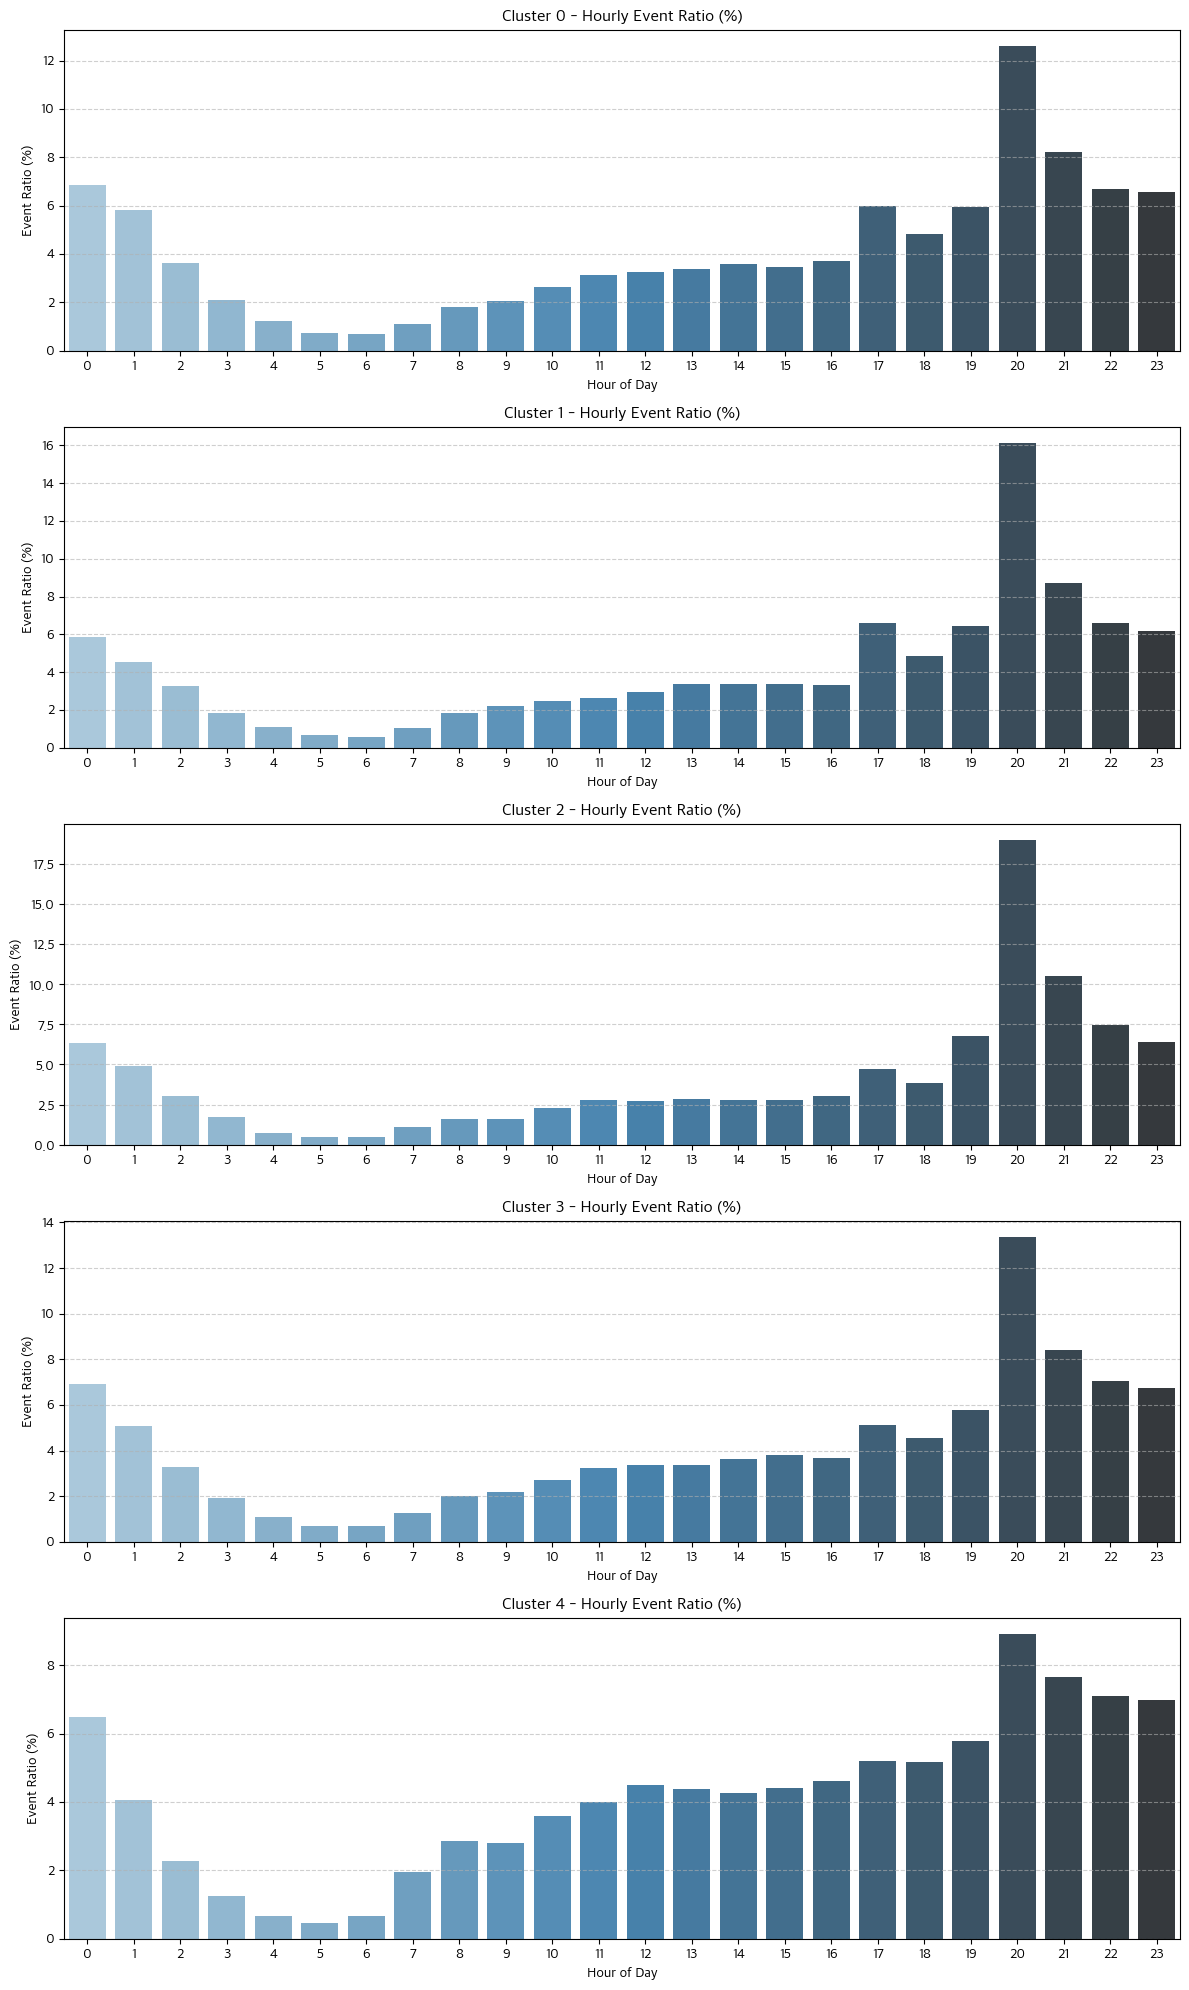

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# ratio를 백분율로 변환
cluster_hour_counts['ratio_percent'] = cluster_hour_counts['ratio'] * 100

# 클러스터 목록
clusters = sorted(cluster_hour_counts['cluster_label'].unique())

# subplot 생성 (sharex 제거)
fig, axes = plt.subplots(len(clusters), 1, figsize=(12, 4 * len(clusters)))

if len(clusters) == 1:  # 클러스터가 1개일 경우 처리
    axes = [axes]

for idx, cluster in enumerate(clusters):
    cluster_data = cluster_hour_counts[cluster_hour_counts['cluster_label'] == cluster]

    sns.barplot(
        x='hour',
        y='ratio_percent',
        data=cluster_data,
        palette="Blues_d",
        ax=axes[idx]
    )

    axes[idx].set_title(f"Cluster {cluster} - Hourly Event Ratio (%)")
    axes[idx].set_xlabel("Hour of Day")
    axes[idx].set_ylabel("Event Ratio (%)")
    axes[idx].set_xticks(range(0, 24))  # 모든 subplot에 0~23시 표시
    axes[idx].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

- Cluster 0~3은 피크시간대(20시)가 유독 높은 비율을 차지하고 있지만,
- Cluster 4는 활동시간(7시~0시) 전체에 더 고르게 퍼져 있다.

#### 클러스터 4 vs 나머지 비교

In [ ]:
# 1. 복사본 생성 후 is_cluster_4 열 추가
df_temp = hackle_df.copy()
df_temp['is_cluster_4'] = (df_temp['cluster_label'] == 4).astype(int)

# 2. is_cluster_4 그룹 기준으로 시간대별 이벤트 발생 건수 집계
cluster_hour_counts = (
    df_temp
    .groupby(['is_cluster_4', 'hour'])
    .size()
    .reset_index(name='count')
)

# 3. 각 그룹별 전체 이벤트 수 계산
cluster_totals = (
    df_temp
    .groupby('is_cluster_4')
    .size()
    .reset_index(name='total_count')
)

# 4. 병합 후 비율 계산
cluster_hour_counts = cluster_hour_counts.merge(cluster_totals, on='is_cluster_4')
cluster_hour_counts['ratio'] = cluster_hour_counts['count'] / cluster_hour_counts['total_count']

# 5. 결과 확인
cluster_hour_counts.head()

is_cluster_4  hour   count  total_count     ratio
0             0     0  217912      3292786  0.066179
1             0     1  168560      3292786  0.051191
2             0     2  108536      3292786  0.032962
3             0     3   62465      3292786  0.018970
4             0     4   33443      3292786  0.010156

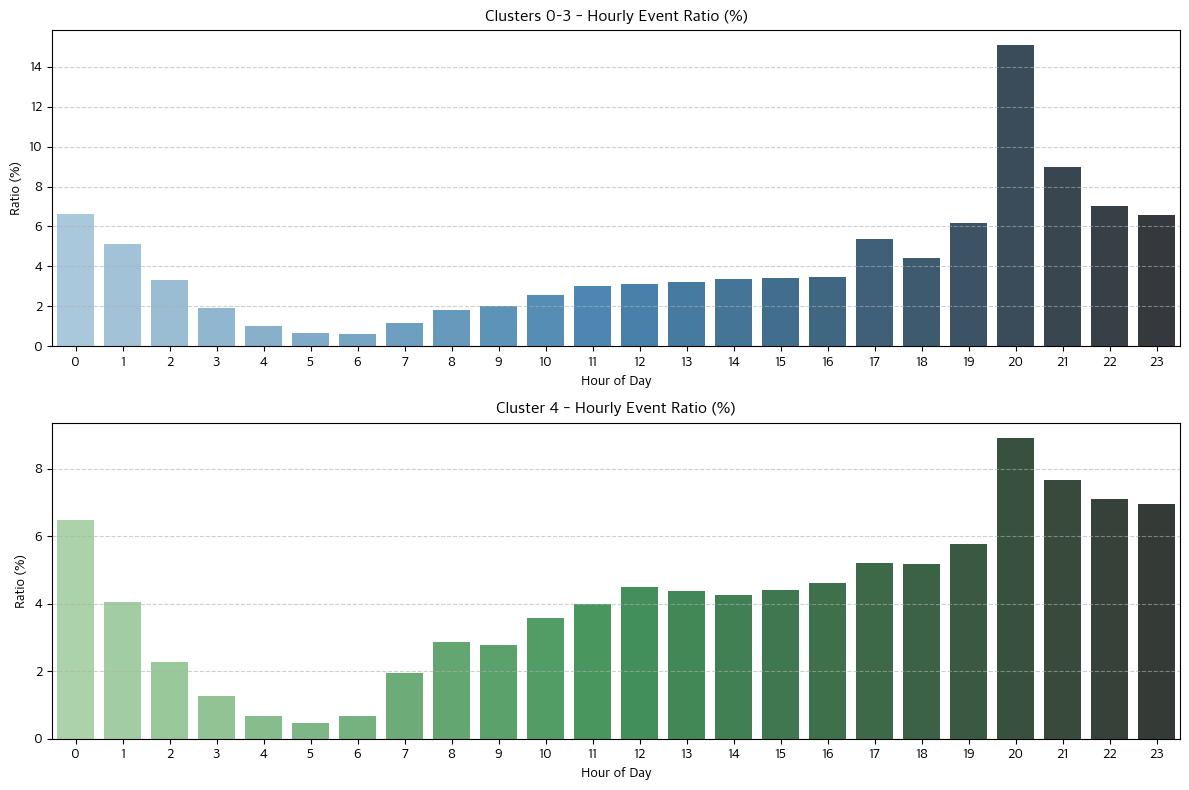

In [ ]:
# ratio를 백분율로 변환
cluster_hour_counts['ratio_pct'] = cluster_hour_counts['ratio'] * 100

# is_cluster_4 기준으로 클러스터 나누기
groups = sorted(cluster_hour_counts['is_cluster_4'].unique())

# subplot 생성 (한 줄에 하나씩)
fig, axes = plt.subplots(len(groups), 1, figsize=(12, 4 * len(groups)), sharex=False)

if len(groups) == 1:  # 그룹이 1개라면 axes를 리스트로 변환
    axes = [axes]

for idx, group in enumerate(groups):
    group_data = cluster_hour_counts[cluster_hour_counts['is_cluster_4'] == group]

    sns.barplot(
        x=group_data['hour'],
        y=group_data['ratio_pct'],
        ax=axes[idx],
        palette="Blues_d" if group == 0 else "Greens_d"
    )
    axes[idx].set_title(f"{'Cluster 4' if group == 1 else 'Clusters 0–3'} - Hourly Event Ratio (%)")
    axes[idx].set_xlabel("Hour of Day")
    axes[idx].set_ylabel("Ratio (%)")
    axes[idx].grid(axis='y', linestyle='--', alpha=0.6)

    # x축 라벨 강제 표시 (0~23)
    axes[idx].set_xticks(np.arange(0, 24, 1))
    axes[idx].set_xticklabels(np.arange(0, 24, 1))

plt.tight_layout()
plt.show()

#### 시간대별 활동 분포의 통계적 평가 (Chi-square & CV)

In [ ]:
from scipy.stats import chisquare
import numpy as np

# 결과 저장용 리스트
results = []

for flag in sorted(cluster_hour_counts['is_cluster_4'].unique()):
    subset = cluster_hour_counts[cluster_hour_counts['is_cluster_4'] == flag]
    counts = subset['count'].values

    # 1. Chi-square 적합도 검정 (균등분포 대비)
    expected = [sum(counts)/len(counts)] * len(counts)
    chi2, p_value = chisquare(counts, f_exp=expected)

    # 2. 변동계수(CV)
    cv = np.std(counts) / np.mean(counts)

    results.append({
        'is_cluster_4': flag,
        'chi2': chi2,
        'p_value': p_value,
        'cv': cv
    })

# 결과를 DataFrame으로 정리
results_df = pd.DataFrame(results)

print("=== Chi-square & CV 분석 결과 ===")
display(results_df)

=== Chi-square & CV 분석 결과 ===


is_cluster_4          chi2  p_value        cv
0             0  1.863866e+06      0.0  0.752360
1             1  5.248823e+05      0.0  0.538283

=== Chi-square & CV (부트스트랩 CI 포함) 분석 결과 ===


is_cluster_4          chi2  p_value        cv  cv_ci_low  cv_ci_high
0             0  1.863866e+06      0.0  0.752360   0.471263    0.972335
1             1  5.248823e+05      0.0  0.538283   0.370108    0.704220

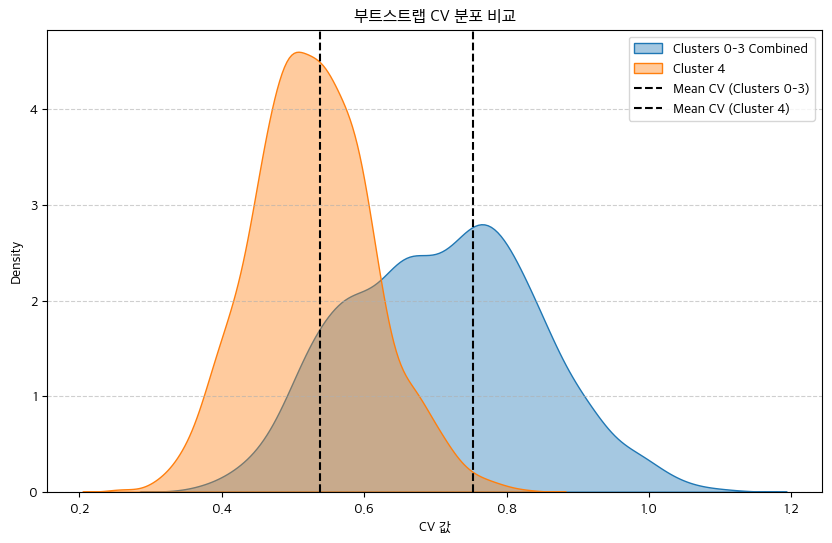

In [ ]:
from scipy.stats import chisquare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 부트스트랩 함수 정의
def bootstrap_cv(data, n_bootstrap=1000, random_state=42):
    np.random.seed(random_state)
    cvs = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        cvs.append(np.std(sample) / np.mean(sample))
    return cvs  # 전체 분포 반환

# 결과 저장용 리스트
results = []
bootstrap_results = {}

for flag in sorted(cluster_hour_counts['is_cluster_4'].unique()):
    subset = cluster_hour_counts[cluster_hour_counts['is_cluster_4'] == flag]
    counts = subset['count'].values

    # 1. Chi-square 적합도 검정 (균등분포 대비)
    expected = [sum(counts)/len(counts)] * len(counts)
    chi2, p_value = chisquare(counts, f_exp=expected)

    # 2. 변동계수(CV)
    cv = np.std(counts) / np.mean(counts)

    # 3. CV에 대한 95% 신뢰구간 (부트스트랩)
    boot_cvs = bootstrap_cv(counts, n_bootstrap=2000)
    ci_low, ci_high = np.percentile(boot_cvs, [2.5, 97.5])

    results.append({
        'is_cluster_4': flag,
        'chi2': chi2,
        'p_value': p_value,
        'cv': cv,
        'cv_ci_low': ci_low,
        'cv_ci_high': ci_high
    })
    bootstrap_results[flag] = boot_cvs

# 결과를 DataFrame으로 정리
results_df = pd.DataFrame(results)

print("=== Chi-square & CV (부트스트랩 CI 포함) 분석 결과 ===")
display(results_df)

# ====== 시각화 ======
plt.figure(figsize=(10,6))
for flag, cvs in bootstrap_results.items():
    sns.kdeplot(cvs, label=f"{'Cluster 4' if flag==1 else 'Clusters 0–3 Combined'}", fill=True, alpha=0.4)

# 결과 DataFrame에서 평균 CV 표시
for idx, row in results_df.iterrows():
    plt.axvline(row['cv'], linestyle='--', color='black',
                label=f"Mean CV ({'Cluster 4' if row['is_cluster_4']==1 else 'Clusters 0–3'})")

plt.title("부트스트랩 CV 분포 비교")
plt.xlabel("CV 값")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Chi-square & CV (부트스트랩 CI 포함) 결과 해석

1. **Chi-square 검정**
   - 두 그룹 모두 `p < 0.001`로, 요일별 분포가 **균등분포와 유의하게 다름**이 확인됨.  
   - 즉, 활동이 특정 시간대/요일에 집중되는 경향이 존재함.

2. **변동계수(CV)**
   - Clusters 0–3 Combined: **CV ≈ 0.75**  
   - Cluster 4: **CV ≈ 0.54**  
   - Cluster 4가 더 낮아, **활동 패턴이 더 균일**함을 의미.

3. **부트스트랩 CI**
   - Clusters 0–3: 95% CI [0.47, 0.97]  
   - Cluster 4: 95% CI [0.37, 0.70]  
   - 두 구간이 일부 겹치지만, 평균값 차이가 뚜렷하고, 전체 분포 모양 또한 구별됨.

4. **KDE 분포 겹침의 의미**
   - KDE 곡선이 겹친다는 것은 **두 그룹의 CV 값 분포 중 일부가 유사**하다는 뜻임.  
   - 그러나 Cluster 4는 분포가 더 왼쪽(낮은 CV)에 집중되어, **보다 평탄한(균등한) 활동 분포**를 보임.  
   - 겹침은 “일부 학교는 비슷한 변동성을 가진다”는 것을 시사하지만, 중심 경향 및 분포 폭 차이로 인해 **Cluster 4의 안정성이 상대적으로 높다는 결론은 여전히 유지**됨.

**결론:**  
시각적 결과와 통계적 지표가 일치하며, Cluster 4는 활동이 **시간대 전반에 고르게 분포**하는 특성이 뚜렷하다.  
겹침이 있다는 점은 절대적 단절이 아님을 보여주지만, 평균 CV 및 Chi-square 결과를 고려할 때 **Cluster 4의 균일성이 통계적으로 설득력 있게 뒷받침**된다.

### 클러스터별-요일별 이벤트 발생 비율 비교

In [ ]:
# cluster_label, school_id, day별 count 데이터프레임 생성
cluster_school_day_df = (
    hackle_df
    .groupby(['cluster_label', 'school_id', 'day'])
    .size()
    .reset_index(name='count')
)

cluster_school_day_df.head()

cluster_label  school_id  day  count
0              0          7    0      9
1              0          7    1      3
2              0          7    2     51
3              0          7    3      4
4              0          7    4     36

#### 모든 클러스터 비교

In [ ]:
# 1. 클러스터별, 요일별 이벤트 발생 건수 집계
cluster_day_counts = (
    hackle_df
    .groupby(['cluster_label', 'day'])
    .size()
    .reset_index(name='count')
)

# 2. 클러스터별 전체 이벤트 수 계산
cluster_totals = (
    hackle_df
    .groupby('cluster_label')
    .size()
    .reset_index(name='total_count')
)

# 3. 병합 후 비율 계산
cluster_day_counts = cluster_day_counts.merge(cluster_totals, on='cluster_label')
cluster_day_counts['ratio'] = cluster_day_counts['count'] / cluster_day_counts['total_count']

# 결과 확인
cluster_day_counts.head()

cluster_label  day  count  total_count     ratio
0              0    0  73476       634207  0.115855
1              0    1  84656       634207  0.133483
2              0    2  79061       634207  0.124661
3              0    3  81432       634207  0.128400
4              0    4  89460       634207  0.141058

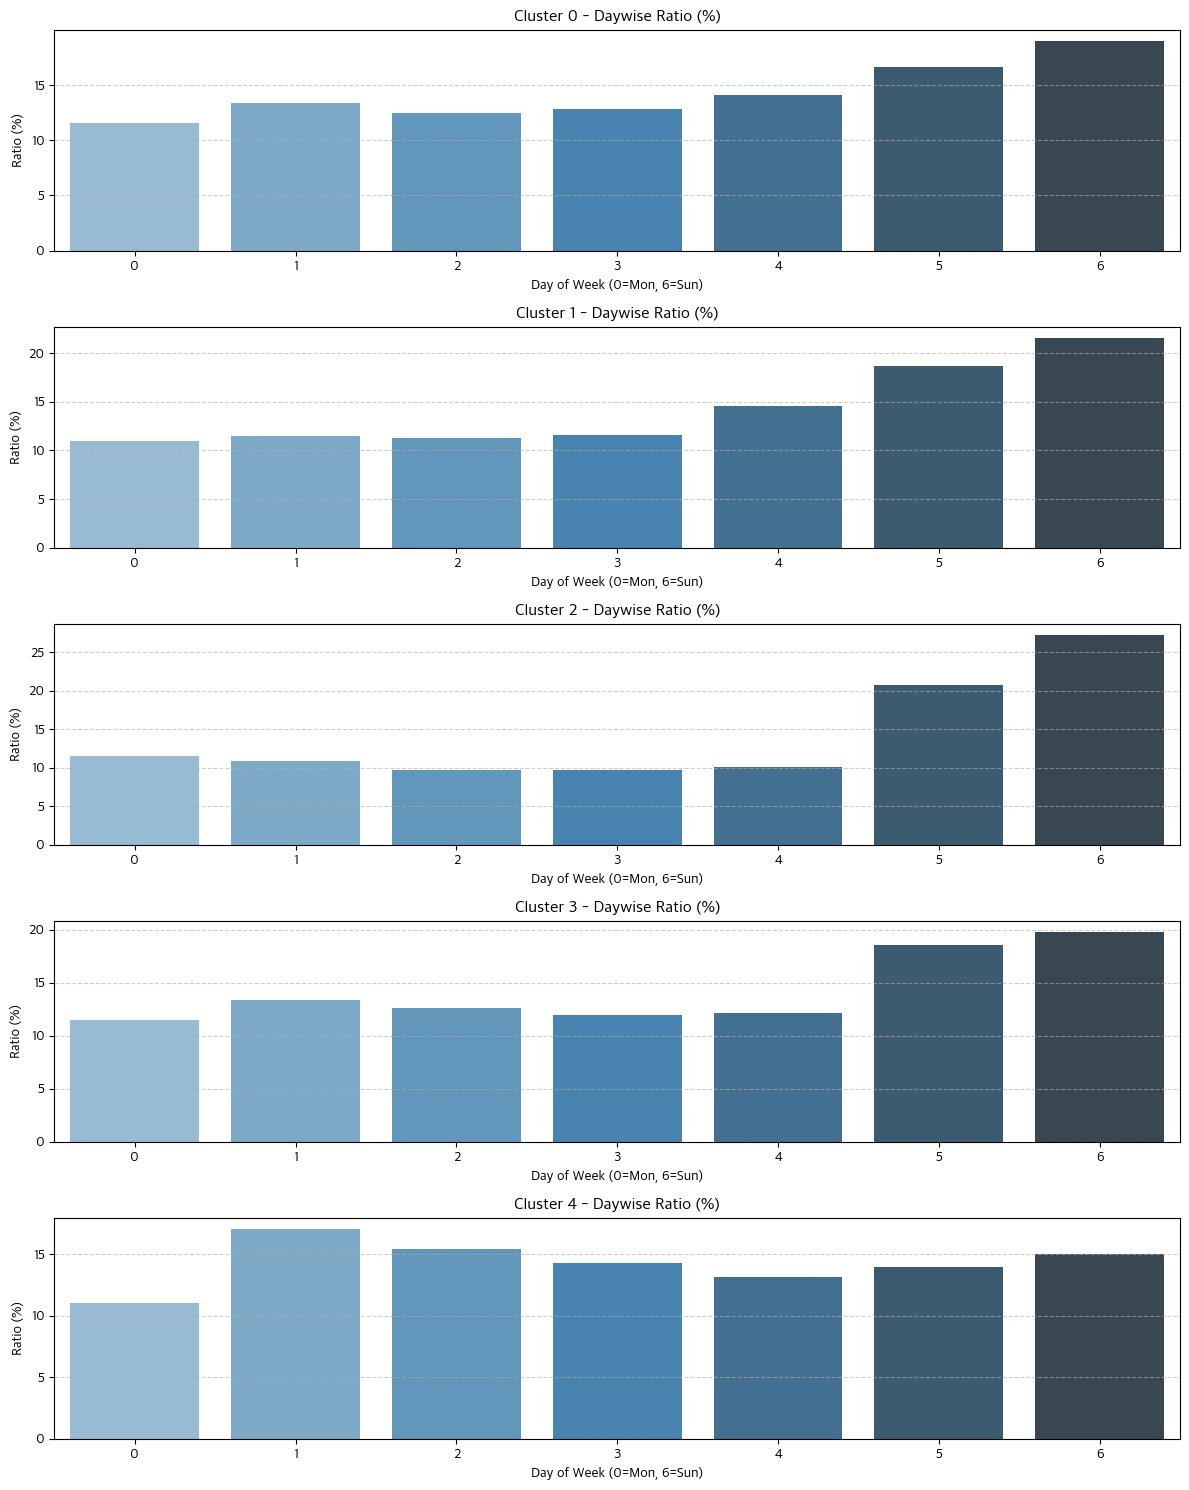

In [ ]:
# 클러스터 목록
clusters = sorted(cluster_day_counts['cluster_label'].unique())

# subplot 생성 (sharex=False로 라벨 공유 방지)
fig, axes = plt.subplots(len(clusters), 1, figsize=(12, 3 * len(clusters)), sharex=False)

if len(clusters) == 1:
    axes = [axes]  # 단일 클러스터일 경우 리스트로 변환

for idx, cluster in enumerate(clusters):
    cluster_data = cluster_day_counts[cluster_day_counts['cluster_label'] == cluster]

    sns.barplot(
        x=cluster_data['day'],
        y=cluster_data['ratio'] * 100,  # 백분율 표시
        ax=axes[idx],
        palette="Blues_d"
    )
    axes[idx].set_title(f"Cluster {cluster} - Daywise Ratio (%)")
    axes[idx].set_xlabel("Day of Week (0=Mon, 6=Sun)")
    axes[idx].set_ylabel("Ratio (%)")
    axes[idx].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

- Cluster 0~3은 주말 사용이 유독 높은 비율을 차지하고 있지만,
- Cluster 4는 일주일 전체에 더 고르게 퍼져 있으며, 화요일과 수요일 사용 비율은 주말보다도 더 높다.

#### 클러스터 4 vs 나머지 비교

In [ ]:
# 1. is_cluster_4 열 생성 (원본 hackle_df는 건드리지 않음)
hackle_with_flag = hackle_df.copy()
hackle_with_flag['is_cluster_4'] = (hackle_with_flag['cluster_label'] == 4).astype(int)

# 2. is_cluster_4 & 요일별 이벤트 발생 건수 집계
cluster_day_counts = (
    hackle_with_flag
    .groupby(['is_cluster_4', 'day'])
    .size()
    .reset_index(name='count')
)

# 3. is_cluster_4 그룹별 전체 이벤트 수 계산
cluster_totals = (
    hackle_with_flag
    .groupby('is_cluster_4')
    .size()
    .reset_index(name='total_count')
)

# 4. 병합 후 비율 계산
cluster_day_counts = cluster_day_counts.merge(cluster_totals, on='is_cluster_4')
cluster_day_counts['ratio'] = cluster_day_counts['count'] / cluster_day_counts['total_count']

# 결과 확인
cluster_day_counts.head()

is_cluster_4  day   count  total_count     ratio
0             0    0  377469      3292786  0.114635
1             0    1  410050      3292786  0.124530
2             0    2  384111      3292786  0.116652
3             0    3  378041      3292786  0.114809
4             0    4  403905      3292786  0.122664

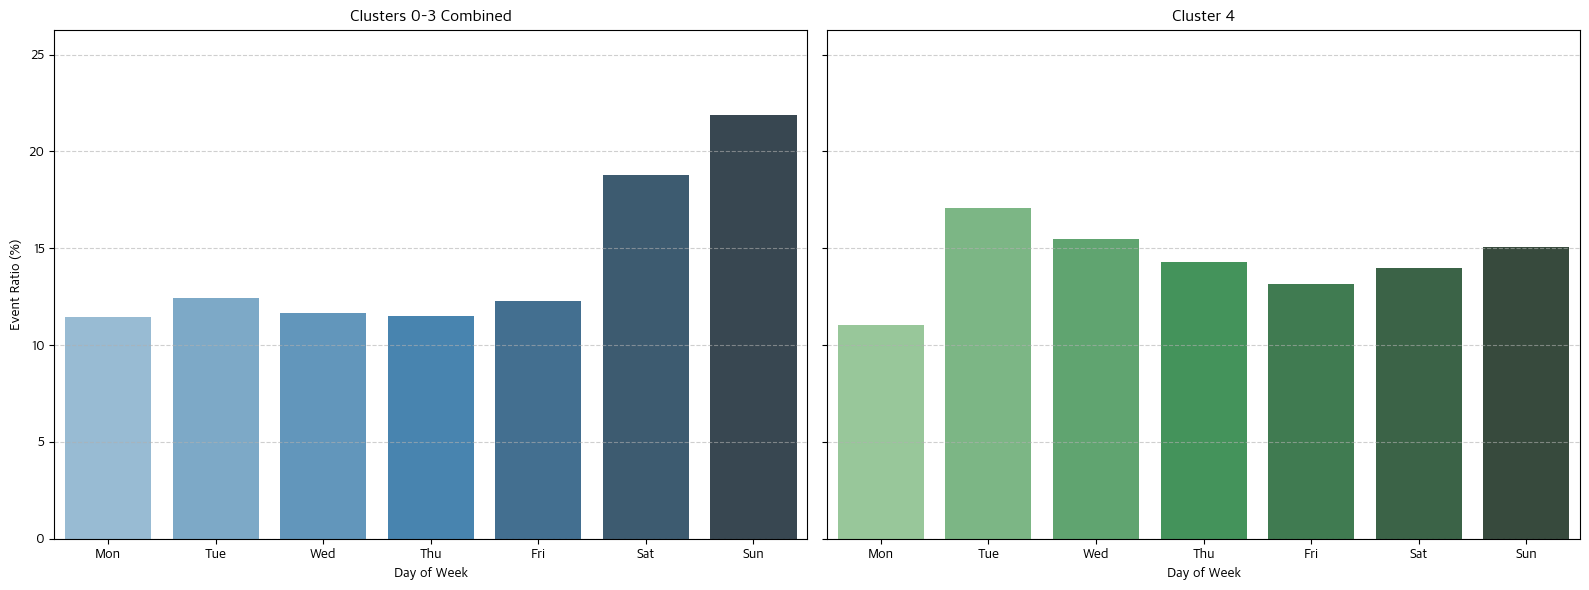

In [ ]:
# 요일 매핑 (0=월, 6=일)
day_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
cluster_day_counts['day_label'] = cluster_day_counts['day'].map(lambda x: day_labels[x])

# 백분율 변환
cluster_day_counts['ratio_percent'] = cluster_day_counts['ratio'] * 100

# 시각화
fig, axes = plt.subplots(1, 2, figsize=(16, 6), sharey=True)

for idx, flag in enumerate(sorted(cluster_day_counts['is_cluster_4'].unique())):
    subset = cluster_day_counts[cluster_day_counts['is_cluster_4'] == flag]
    palette = "Greens_d" if flag == 1 else "Blues_d"

    sns.barplot(
        data=subset,
        x='day_label', y='ratio_percent',
        ax=axes[idx], palette=palette
    )
    axes[idx].set_title(f"{'Cluster 4' if flag==1 else 'Clusters 0–3 Combined'}")
    axes[idx].set_xlabel("Day of Week")
    axes[idx].set_ylabel("Event Ratio (%)")
    axes[idx].set_ylim(0, cluster_day_counts['ratio_percent'].max() * 1.2)  # 여유 공간 추가
    axes[idx].grid(axis='y', linestyle='--', alpha=0.6)

plt.tight_layout()
plt.show()

#### 요일별 활동 분포의 통계적 평가 (Chi-square & CV)

=== Chi-square & CV (요일별, 부트스트랩 CI 포함) 분석 결과 ===


is_cluster_4           chi2  p_value        cv  cv_ci_low  cv_ci_high
0             0  249107.490674      0.0  0.275050   0.029085    0.315067
1             1   27479.779010      0.0  0.123165   0.044785    0.169396

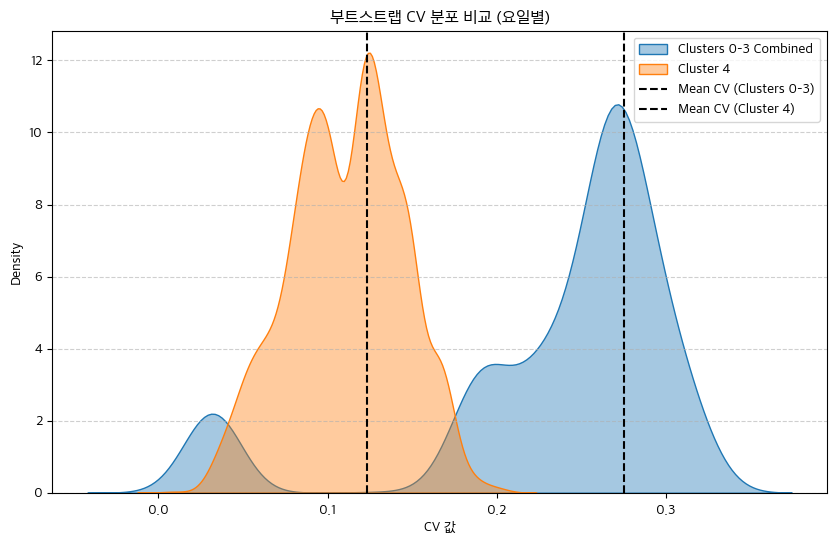

In [ ]:
from scipy.stats import chisquare
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 부트스트랩 함수 정의
def bootstrap_cv(data, n_bootstrap=2000, random_state=42):
    np.random.seed(random_state)
    cvs = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(data, size=len(data), replace=True)
        cvs.append(np.std(sample) / np.mean(sample))
    return cvs  # 전체 분포 반환

# 결과 저장용 리스트
results = []
bootstrap_results = {}

for flag in sorted(cluster_day_counts['is_cluster_4'].unique()):
    subset = cluster_day_counts[cluster_day_counts['is_cluster_4'] == flag]
    counts = subset['count'].values

    # 1. Chi-square 적합도 검정 (균등분포 대비)
    expected = [sum(counts)/len(counts)] * len(counts)
    chi2, p_value = chisquare(counts, f_exp=expected)

    # 2. 변동계수(CV)
    cv = np.std(counts) / np.mean(counts)

    # 3. CV에 대한 95% 신뢰구간 (부트스트랩)
    boot_cvs = bootstrap_cv(counts, n_bootstrap=2000)
    ci_low, ci_high = np.percentile(boot_cvs, [2.5, 97.5])

    results.append({
        'is_cluster_4': flag,
        'chi2': chi2,
        'p_value': p_value,
        'cv': cv,
        'cv_ci_low': ci_low,
        'cv_ci_high': ci_high
    })
    bootstrap_results[flag] = boot_cvs

# 결과를 DataFrame으로 정리
results_df = pd.DataFrame(results)

print("=== Chi-square & CV (요일별, 부트스트랩 CI 포함) 분석 결과 ===")
display(results_df)

# ====== 시각화 ======
plt.figure(figsize=(10,6))
for flag, cvs in bootstrap_results.items():
    sns.kdeplot(cvs,
                label=f"{'Cluster 4' if flag==1 else 'Clusters 0–3 Combined'}",
                fill=True, alpha=0.4)

# 결과 DataFrame에서 평균 CV 표시
for idx, row in results_df.iterrows():
    plt.axvline(row['cv'], linestyle='--', color='black',
                label=f"Mean CV ({'Cluster 4' if row['is_cluster_4']==1 else 'Clusters 0–3'})")

plt.title("부트스트랩 CV 분포 비교 (요일별)")
plt.xlabel("CV 값")
plt.ylabel("Density")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### Chi-square & CV (부트스트랩 CI 포함, 요일별) 결과 해석

1. **Chi-square 검정**
   - 두 그룹 모두 `p < 0.001`로, 요일별 활동 분포가 **균등분포와 유의하게 다름**이 확인됨.  
   - 즉, 특정 요일에 더 많은 활동이 집중되는 경향이 있음.

2. **변동계수(CV)**
   - Clusters 0–3 Combined: **CV ≈ 0.28**  
   - Cluster 4: **CV ≈ 0.12**  
   - Cluster 4의 CV가 더 낮아, **요일별 활동이 상대적으로 고르게 분포**함을 의미.

3. **부트스트랩 CI**
   - Clusters 0–3: 95% CI [0.03, 0.32]  
   - Cluster 4: 95% CI [0.04, 0.17]  
   - 신뢰구간이 일부 겹치지만, 중심값 차이가 분명하여 **Cluster 4의 안정성이 통계적으로 지지됨**.

4. **KDE 분포 겹침의 의미**
   - KDE 곡선이 일부 겹친다는 것은 **일부 학교는 유사한 변동성을 가진다**는 것을 의미.  
   - 그러나 Cluster 4의 분포는 전반적으로 왼쪽(낮은 CV)에 치우쳐 있어, **요일별 활동 패턴이 더 평탄**함이 드러남.  
   - 겹침은 “완전히 다른 세계”가 아님을 보여주지만, 전반적 추세 차이를 약화시키지는 않음.

**결론:**  
Cluster 4는 다른 그룹에 비해 **요일 전반에 걸쳐 균등하게 활동하는 경향**이 뚜렷하다.  
이는 시각적 결과(KDE)와 통계적 지표(Chi-square, CV, CI)가 일관되게 뒷받침한다.

### 변동계수(CV)와 활동량, 하트 사용량 지표 등과의 상관관계는 어떻게 될까?

#### 데이터프레임 생성

In [ ]:
hackle_df.head()

event_datetime                        event_key  friend_count  \
0 2023-08-06 20:18:03  click_bottom_navigation_profile          26.0   
1 2023-08-06 12:46:17      click_bottom_navigation_lab          45.0   
2 2023-07-21 16:38:37                     view_lab_tap          21.0   
3 2023-07-19 00:01:15                       launch_app          70.0   
4 2023-07-25 19:32:04               view_questions_tap          75.0   

   votes_count  heart_balance  user_id  school_id  cluster_label  day  hour  
0        174.0         4729.0  1545130       1141              4    6    20  
1        148.0          141.0  1475326       1204              1    6    12  
2        286.0          547.0  1537177       5888              4    4    16  
3        485.0        13364.0  1556429        908              0    2     0  
4         34.0          626.0  1517211       4823              3    1    19

In [ ]:
# 1. 학교별·시간대별 데이터프레임 생성
school_hour_counts = (
    hackle_df
    .groupby(['school_id', 'hour'])
    .size()
    .reset_index(name='count')
)

# 각 학교별 전체 이벤트 수 계산
school_totals_hour = (
    hackle_df
    .groupby('school_id')
    .size()
    .reset_index(name='total_count')
)

# 비율 계산
school_hour_counts = school_hour_counts.merge(school_totals_hour, on='school_id')
school_hour_counts['ratio'] = school_hour_counts['count'] / school_hour_counts['total_count']

# 필요한 컬럼만 선택
school_hour_counts = school_hour_counts[['school_id', 'hour', 'count', 'ratio']]


# 2. 학교별·요일별 데이터프레임 생성
school_day_counts = (
    hackle_df
    .groupby(['school_id', 'day'])
    .size()
    .reset_index(name='count')
)

# 각 학교별 전체 이벤트 수 계산
school_totals_day = (
    hackle_df
    .groupby('school_id')
    .size()
    .reset_index(name='total_count')
)

# 비율 계산
school_day_counts = school_day_counts.merge(school_totals_day, on='school_id')
school_day_counts['ratio'] = school_day_counts['count'] / school_day_counts['total_count']

# 필요한 컬럼만 선택
school_day_counts = school_day_counts[['school_id', 'day', 'count', 'ratio']]


# 결과 확인
print("=== 학교별 시간대별 데이터프레임 ===")
display(school_hour_counts.head())

print("=== 학교별 요일별 데이터프레임 ===")
display(school_day_counts.head())

=== 학교별 시간대별 데이터프레임 ===


school_id  hour  count     ratio
0          5    10      7  0.041667
1          5    14     14  0.083333
2          5    15      6  0.035714
3          5    17     18  0.107143
4          5    19    123  0.732143

=== 학교별 요일별 데이터프레임 ===


school_id  day  count     ratio
0          5    1      3  0.017857
1          5    2    126  0.750000
2          5    3      3  0.017857
3          5    4      9  0.053571
4          5    5     12  0.071429

In [ ]:
# ===== 학교별 CV 계산 =====

# 1. 학교별 시간대별 ratio → CV 계산
hour_cv = (
    school_hour_counts
    .groupby('school_id')['ratio']
    .apply(lambda x: np.std(x) / np.mean(x) if np.mean(x) != 0 else np.nan)
    .reset_index(name='hour_cv')
)

# 2. 학교별 요일별 ratio → CV 계산
day_cv = (
    school_day_counts
    .groupby('school_id')['ratio']
    .apply(lambda x: np.std(x) / np.mean(x) if np.mean(x) != 0 else np.nan)
    .reset_index(name='day_cv')
)

# 3. 병합하여 최종 데이터프레임 생성
school_cv_df = pd.merge(hour_cv, day_cv, on='school_id')

# 결과 확인
print("=== 학교별 시간대/요일 CV 데이터프레임 ===")
display(school_cv_df.head())

=== 학교별 시간대/요일 CV 데이터프레임 ===


school_id   hour_cv    day_cv
0          5  1.336916  1.573051
1          6  0.586777  0.586777
2          7  0.724684  1.066768
3          8  1.358866  1.353643
4         10  0.820598  0.237470

In [ ]:
clustered_df.head()

school_id  heart_loss_mean  is_zero_heart_loss_mean  student_count  \
0          5            0.000                        1              4   
1          6            0.000                        1              3   
2          7          211.125                        0              8   
3          8            0.000                        1              4   
4         10            0.000                        1             14   

   gender_balance  is_monogender  mainevent_peruser  med_duration_sec  \
0        0.500000              0           5.250000               996   
1        0.000000              1           0.333333                91   
2        0.250000              0           8.125000               242   
3        0.500000              0           5.250000               665   
4        0.285714              0          36.214286             13586   

   network_density  cluster_label  
0         0.000000              1  
1         0.000000              1  
2         0.035714              0  
3         0.000000              1  
4         0.109890              1

In [ ]:
# clustered_df 복사
clustered_with_cv = clustered_df.copy()

# school_id 기준으로 school_cv_df 병합
clustered_with_cv = clustered_with_cv.merge(school_cv_df, on='school_id', how='left')

# 결과 확인
print("=== 클러스터별 + CV 정보 포함 데이터프레임 ===")
display(clustered_with_cv.head())

=== 클러스터별 + CV 정보 포함 데이터프레임 ===


school_id  heart_loss_mean  is_zero_heart_loss_mean  student_count  \
0          5            0.000                        1              4   
1          6            0.000                        1              3   
2          7          211.125                        0              8   
3          8            0.000                        1              4   
4         10            0.000                        1             14   

   gender_balance  is_monogender  mainevent_peruser  med_duration_sec  \
0        0.500000              0           5.250000               996   
1        0.000000              1           0.333333                91   
2        0.250000              0           8.125000               242   
3        0.500000              0           5.250000               665   
4        0.285714              0          36.214286             13586   

   network_density  cluster_label   hour_cv    day_cv  
0         0.000000              1  1.336916  1.573051  
1         0.000000              1  0.586777  0.586777  
2         0.035714              0  0.724684  1.066768  
3         0.000000              1  1.358866  1.353643  
4         0.109890              1  0.820598  0.237470

#### CV와 변수들간의 상관계수 분석

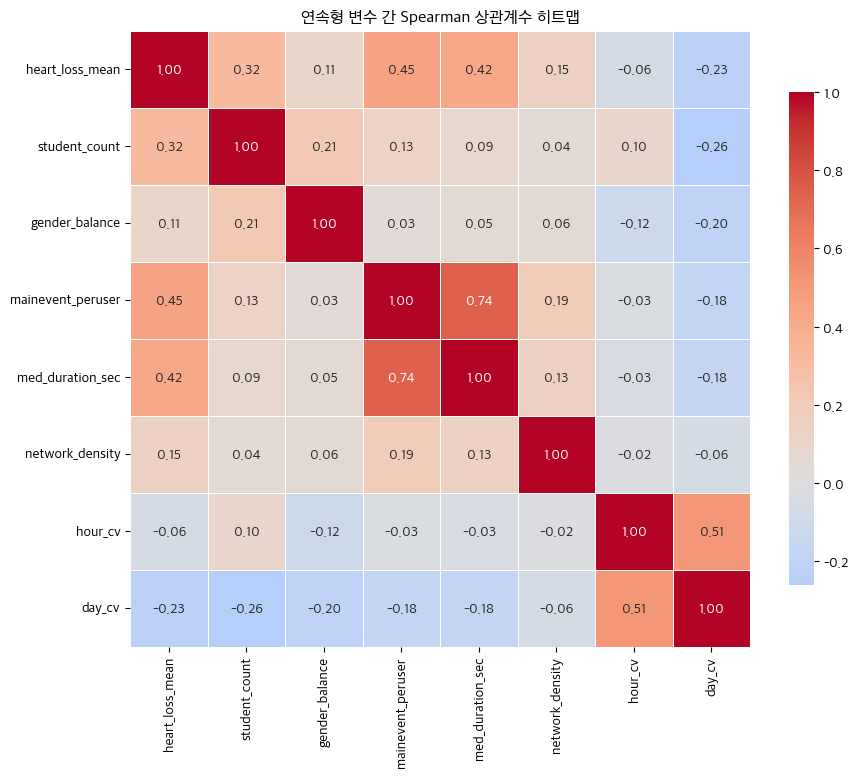

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# school_clustered_df에서 school_id, cluster_label 제외한 연속형 변수 선택
continuous_cols = clustered_with_cv.select_dtypes(include=['float64', 'int64']).columns
# 제외할 열
exclude_cols = ['school_id', 'cluster_label',
                'is_zero_heart_loss_mean', 'is_monogender']
continuous_cols = [col for col in continuous_cols if col not in exclude_cols]

# Spearman 상관계수 계산
spearman_corr = clustered_with_cv[continuous_cols].corr(method='spearman')

# 히트맵 시각화
plt.figure(figsize=(10,8))
sns.heatmap(spearman_corr, annot=True, cmap='coolwarm', center=0, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .8})
plt.title("연속형 변수 간 Spearman 상관계수 히트맵")
plt.show()

#### 상관계수 히트맵 결과 해석 및 향후 방향

- **시도한 목적**
    - 학교별 **요일/시간대 활동 분산 정도(CV)** 와 **활동량(로그 수, 클릭 수, 하트 수 등)** 사이의 상관관계를 파악하고자 함

- **결과: 상관관계 불명확**
    - Spearman 상관계수 기준으로 **일관되고 강한 상관관계 없음**
    - 히트맵에서도 **뚜렷한 양(+) 또는 음(–)의 상관 패턴 부재**

- **원인 해석**
- **생태학적 오류 가능성**: 집단 수준(CV)과 개인 행동 지표의 직접 연결은 논리적 비약
- **CV 자체의 요약 한계**: 시간대/요일별 분산 정도는 구조적 특성을 반영하나, 개인의 총 활동량과는 연결고리가 약할 수 있음
- **노이즈 또는 은폐 변수**: 네트워크 크기, 앱 노출 전략, 푸시 빈도 등 미통제 요인이 영향 가능

- **향후 방향 제안**
    - **클러스터 기반의 전략 실험 제안**
        - 예: Cluster 4의 패턴을 참고하여, 비피크타임 유도 전략(A/B 테스트) 설계